Reading dataset

In [1]:
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

path = './Dataset/'

line_counter = 0
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        line_counter += len(lines) - 1

all_data = np.zeros((line_counter, 483), dtype='float32')
line_counter = 0

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        fG = open(f)
        data = fG.read()
        fG.close()
        lines = data.split('\n')
        for line in lines:
            if line == "":
                break
            values = [x for x in line[0:len(line)-1].split(' ')[:]]
            for i, value in enumerate(values):
                if i == 0:
                    all_data[line_counter, i] = value
                else:
                    key = value.split(':')[0]
                    temp = value.split(':')[1]
                    all_data[line_counter, int(key)+1] = temp
            line_counter += 1

In [2]:
np.shape(all_data) # we don't have understood why shape doesn't correspond to UCI dataset description (we have checked the parsing phase and seems to be all right)

(107856, 483)

save labels in external data both in their natural form for make experiments with regression models and arounded for make experiments with classification models

In [3]:
label_regression = all_data[:,0]
label_regression

array([0.07407407, 0.68421054, 0.8148148 , ..., 0.71929824, 0.40350878,
       0.40350878], dtype=float32)

In [4]:
label_classification = np.around(label_regression, decimals=0).astype(int)
label_classification

array([0, 1, 1, ..., 1, 0, 0])

In [5]:
np.savetxt("./Labels/label_regression.csv", label_regression, delimiter=';')
np.savetxt("./Labels/label_classification.csv", label_classification, delimiter=';')

In [6]:
all_data = all_data[:,1:]

# Description of feature (to do or just hint it and describe in slides)

In [7]:
import pandas as pd

all_data_df = pd.DataFrame(all_data)
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  472  473  474  \
0       3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107854  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107855  1.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        475  476  477  478  479  480  481  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[107856 rows x 482 columns]

check missing value

In [8]:
if all_data_df.isnull().all().any():
    print("some column has all null value")
if all_data_df.isnull().any().any():
    print("some column has any null value")

check column with all zeros

In [9]:
column_c = 0
for i, column in enumerate(all_data_df):
    if (all_data_df[column] == 0).all():
        column_c +=1
print(column_c)

217


make double check with all_data numpy array

In [10]:
column_c = 0
for i in range(0, 482):
    if (all_data[:,i] == 0).all():
        column_c +=1
print(column_c)

217


In [11]:
column_removed = []
column_c = 0
for i, column in reversed(list(enumerate(all_data_df))):   # in reverse order because we delete this columns also in numpy matrix (anyway indexing error because we are in a loop)
    if (all_data_df[column] == 0).all():
        column_removed.append(i)
        column_c += 1
        all_data_df.drop(column, axis=1, inplace=True)
        all_data = np.delete(all_data, i, axis=1)
print(column_c)

217


In [12]:
column_removed

[481,
 480,
 479,
 476,
 474,
 473,
 471,
 466,
 465,
 464,
 463,
 460,
 459,
 455,
 450,
 449,
 447,
 445,
 444,
 442,
 441,
 440,
 439,
 438,
 436,
 435,
 434,
 432,
 431,
 430,
 429,
 428,
 427,
 426,
 425,
 424,
 423,
 419,
 417,
 416,
 415,
 414,
 413,
 409,
 407,
 406,
 403,
 402,
 399,
 395,
 389,
 386,
 384,
 383,
 382,
 381,
 380,
 379,
 378,
 377,
 373,
 372,
 371,
 352,
 351,
 350,
 349,
 348,
 347,
 346,
 345,
 344,
 343,
 342,
 341,
 340,
 339,
 338,
 337,
 336,
 335,
 334,
 333,
 332,
 331,
 330,
 329,
 328,
 327,
 326,
 325,
 324,
 323,
 322,
 321,
 320,
 319,
 318,
 317,
 316,
 315,
 314,
 313,
 312,
 311,
 310,
 309,
 308,
 307,
 306,
 305,
 304,
 303,
 302,
 301,
 300,
 299,
 298,
 297,
 296,
 295,
 294,
 293,
 292,
 291,
 290,
 289,
 288,
 287,
 286,
 285,
 284,
 283,
 282,
 281,
 280,
 279,
 278,
 277,
 276,
 275,
 274,
 273,
 272,
 271,
 270,
 269,
 268,
 267,
 266,
 265,
 264,
 263,
 262,
 261,
 260,
 259,
 258,
 257,
 256,
 255,
 250,
 249,
 248,
 247,
 237,
 229

# Someone make a check if these columns are really all zeros values (so in starting file doesn't appears). It seems strange to me that about half of the features are all zeros value (but could be considering the way in which data are collected). Can be also some error I've made in first cell, but both Daniele were present when it has made and were pretty much sure it works properly

In [13]:
np.shape(all_data)

(107856, 265)

In [14]:
all_data_df = all_data_df.T.reset_index(drop=True).T

In [15]:
all_data_df

0    1    2    3    4    5    6    7    8    9    ...  255  256  257  \
0       3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
107854  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
107855  1.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   

        258  259  260  261  262  263  264  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
107851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
107855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[107856 rows x 265 columns]

In [16]:
import matplotlib.pyplot as plt

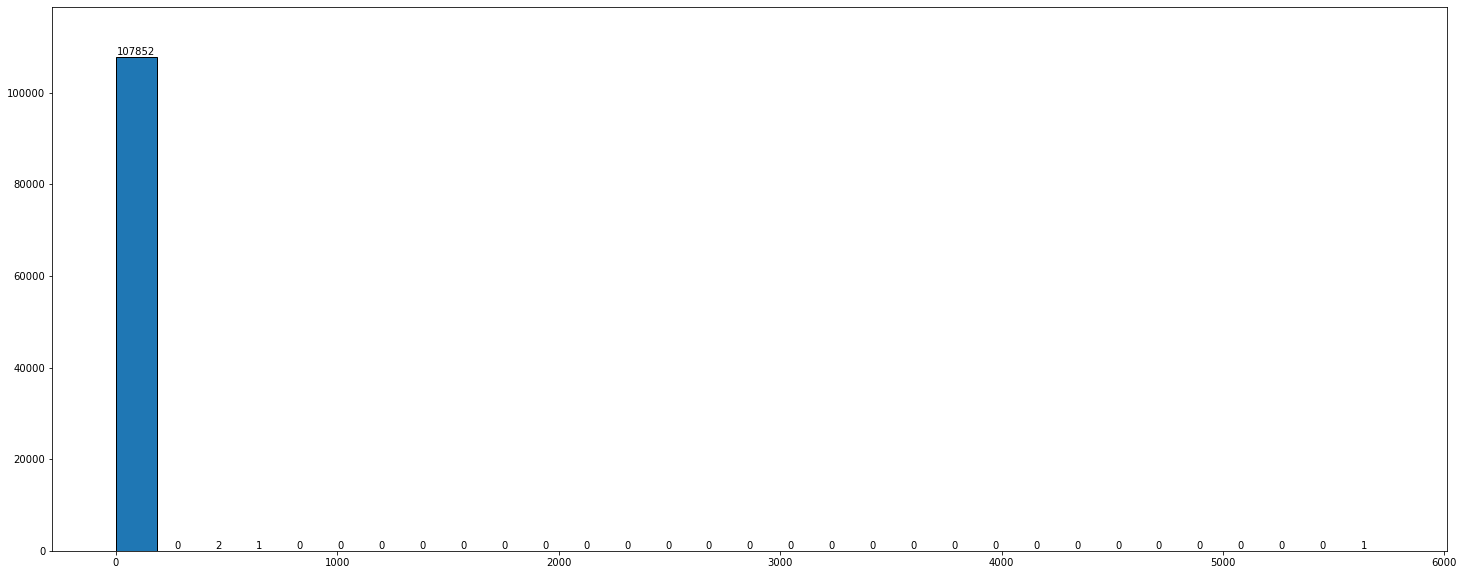

<Figure size 432x288 with 0 Axes>

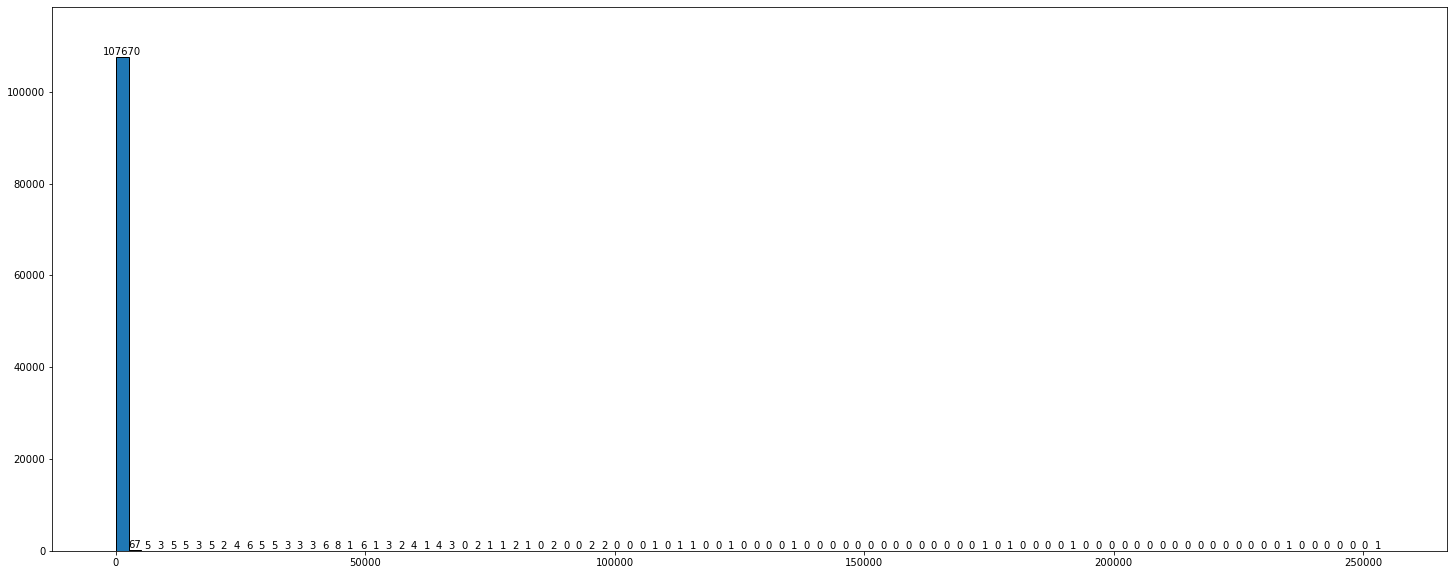

<Figure size 432x288 with 0 Axes>

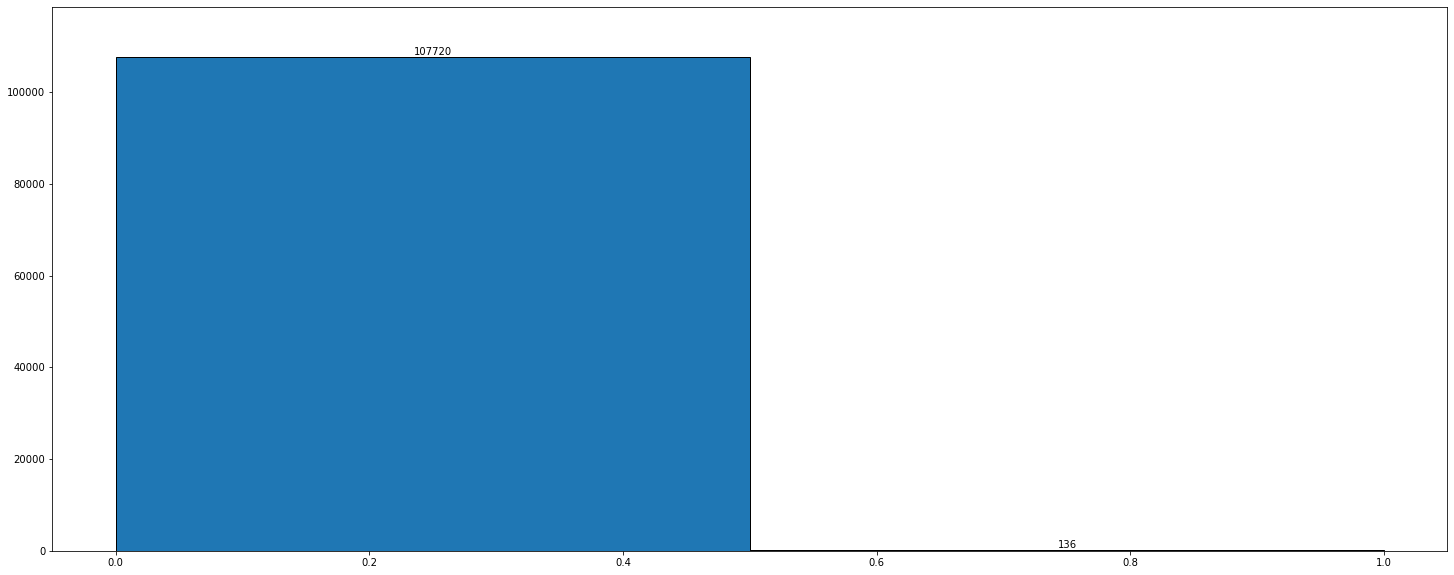

<Figure size 432x288 with 0 Axes>

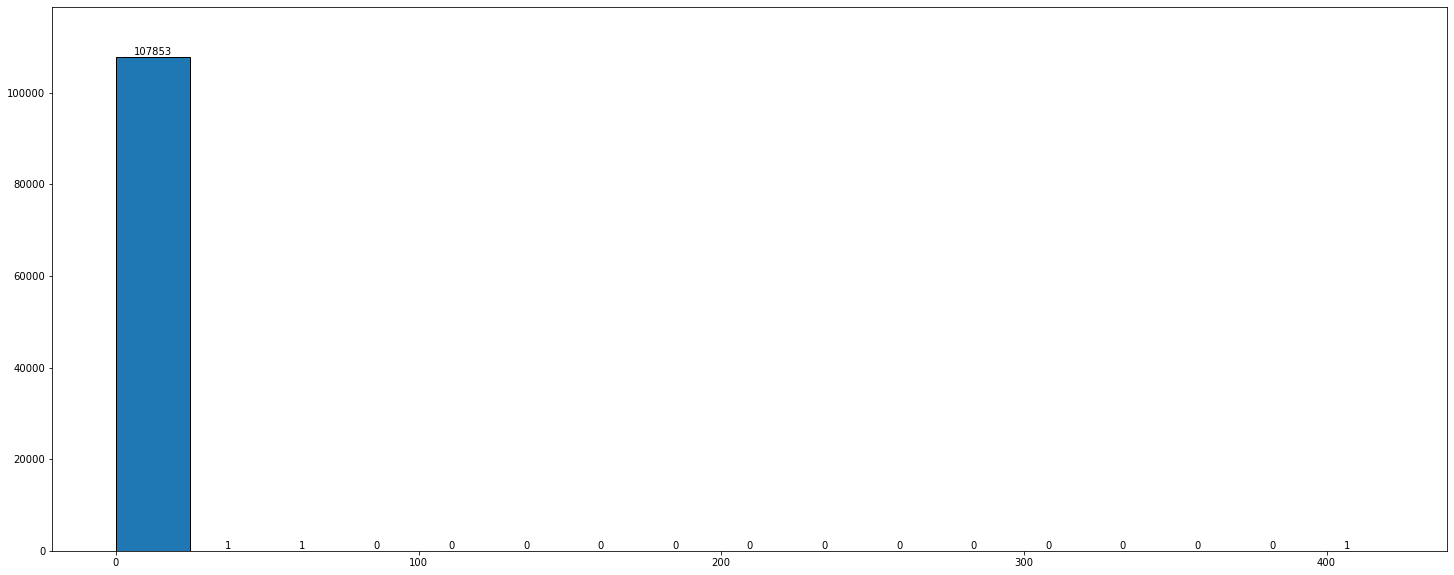

<Figure size 432x288 with 0 Axes>

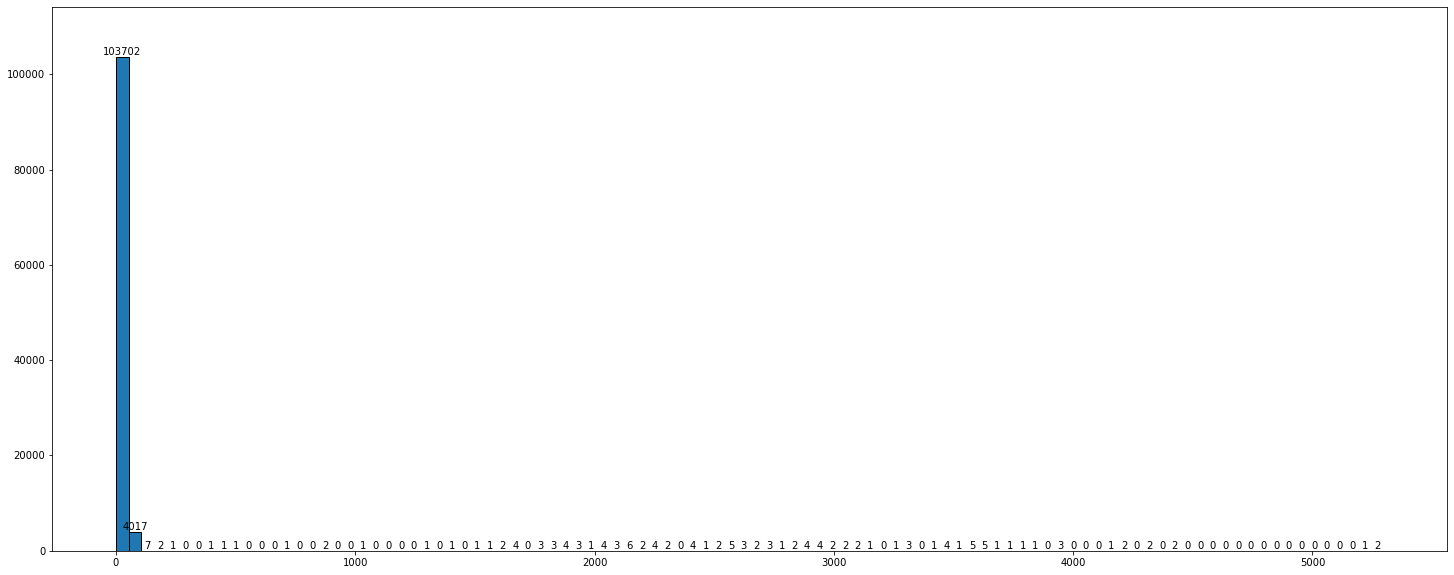

<Figure size 432x288 with 0 Axes>

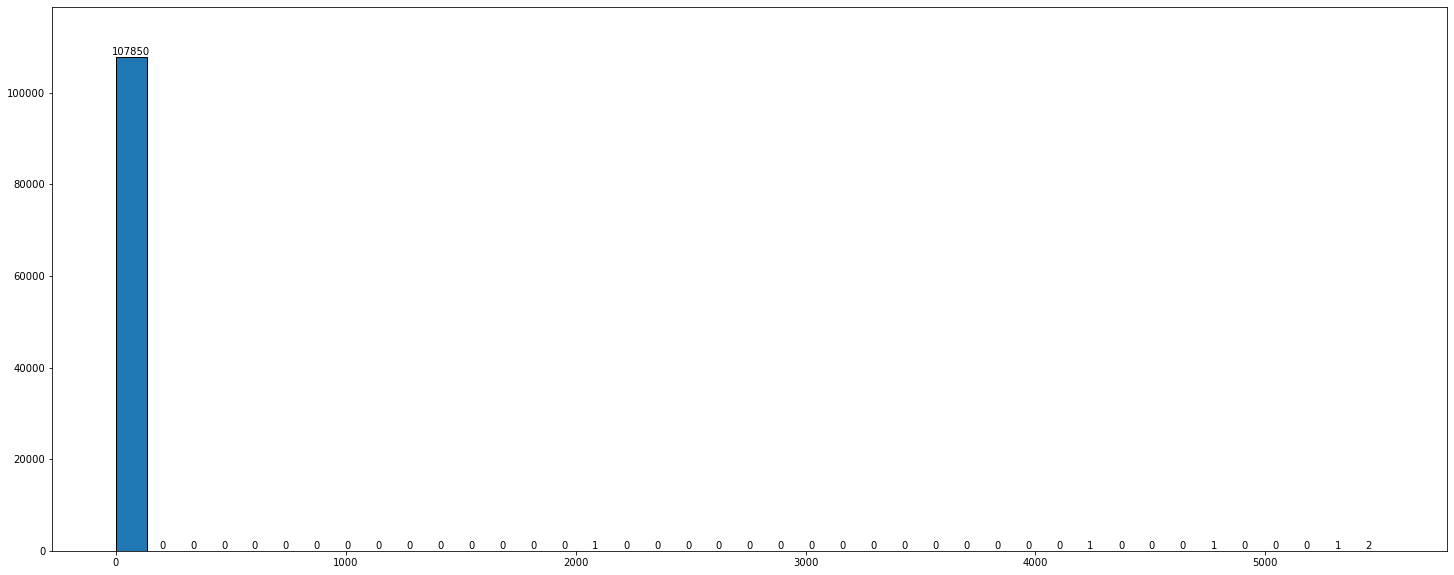

<Figure size 432x288 with 0 Axes>

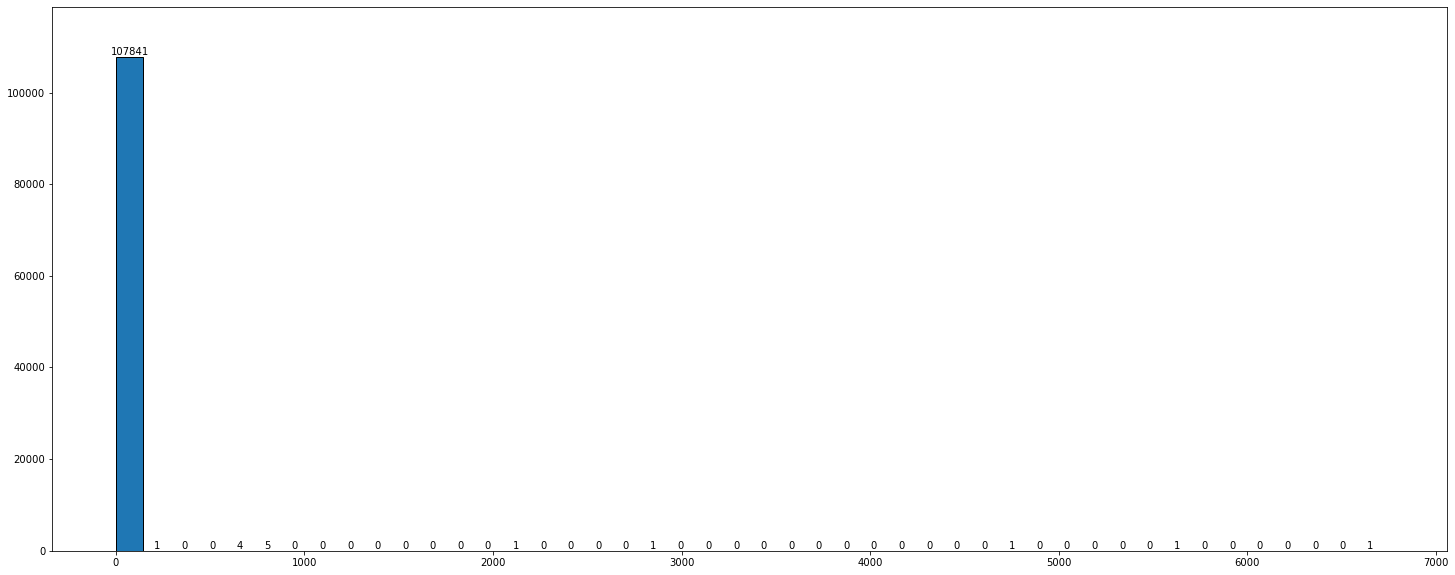

<Figure size 432x288 with 0 Axes>

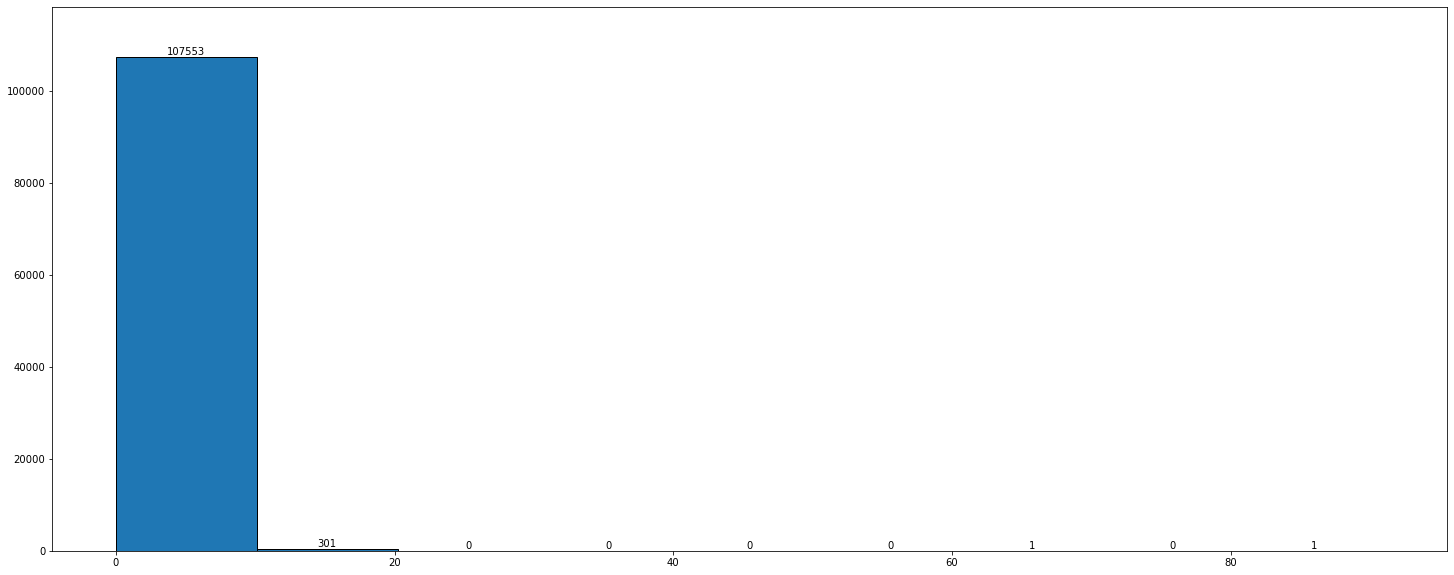

<Figure size 432x288 with 0 Axes>

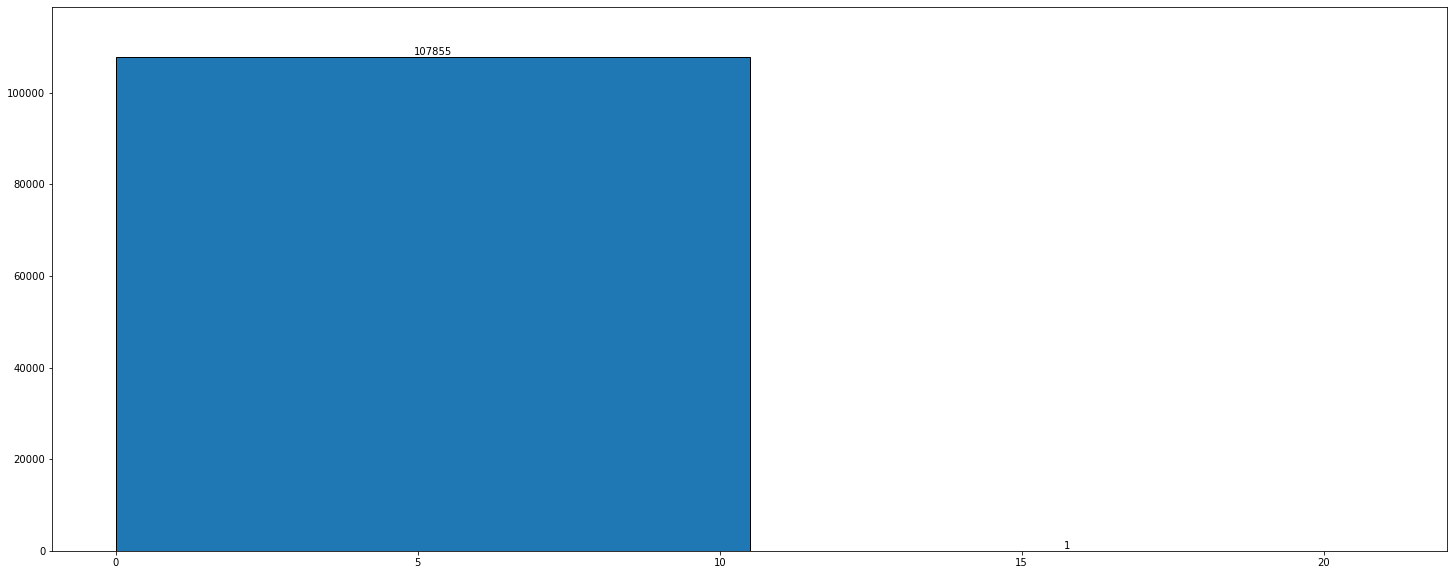

<Figure size 432x288 with 0 Axes>

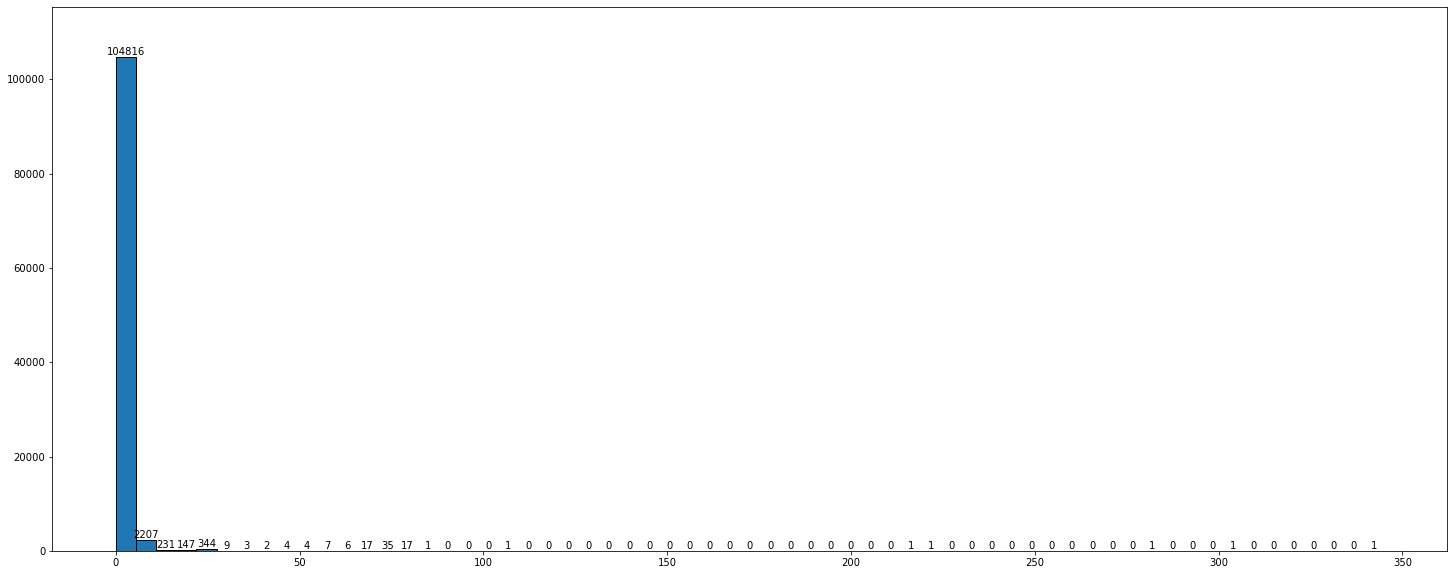

<Figure size 432x288 with 0 Axes>

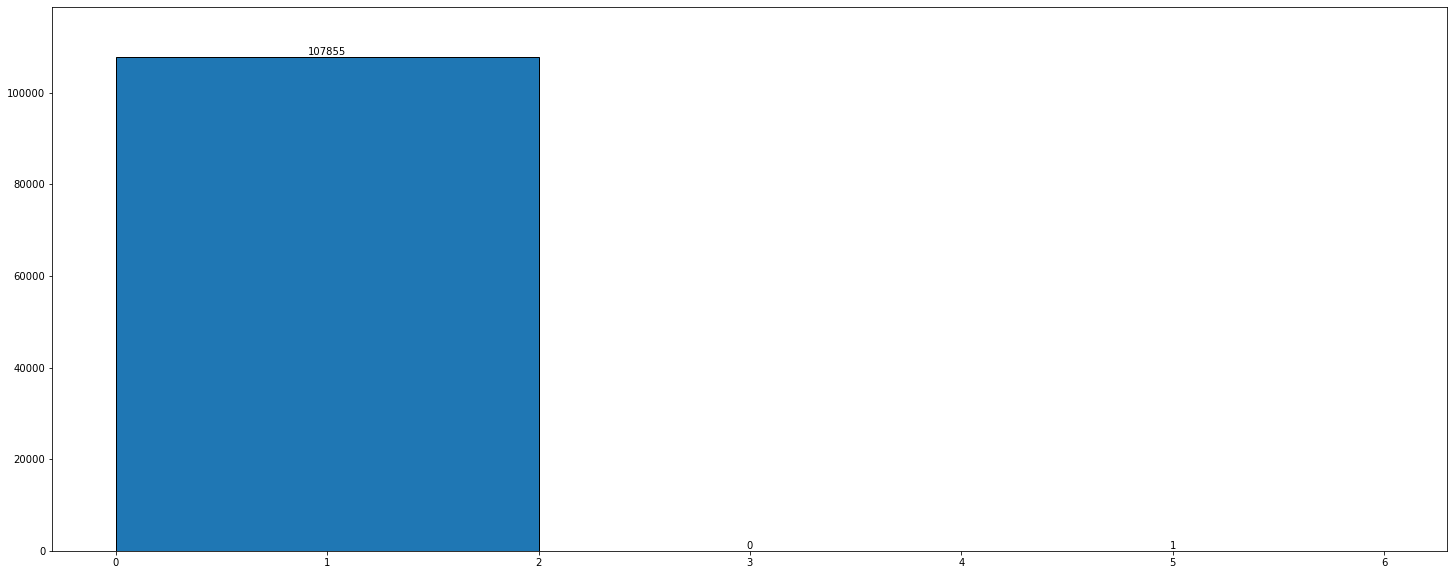

<Figure size 432x288 with 0 Axes>

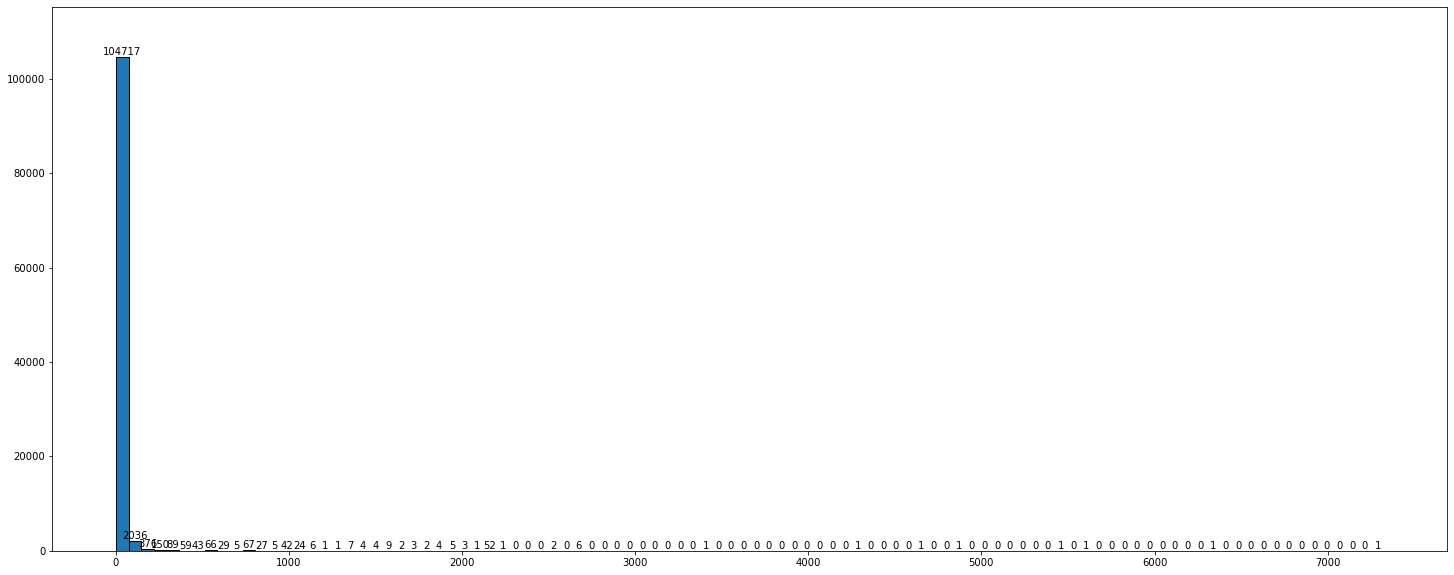

<Figure size 432x288 with 0 Axes>

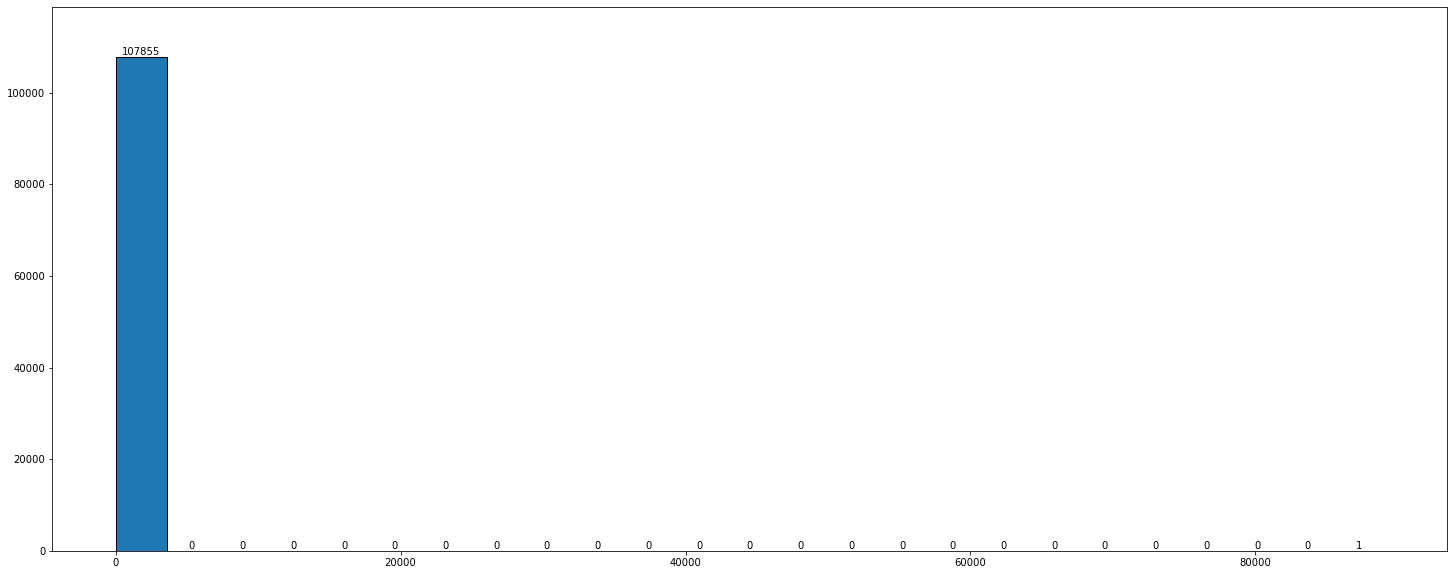

<Figure size 432x288 with 0 Axes>

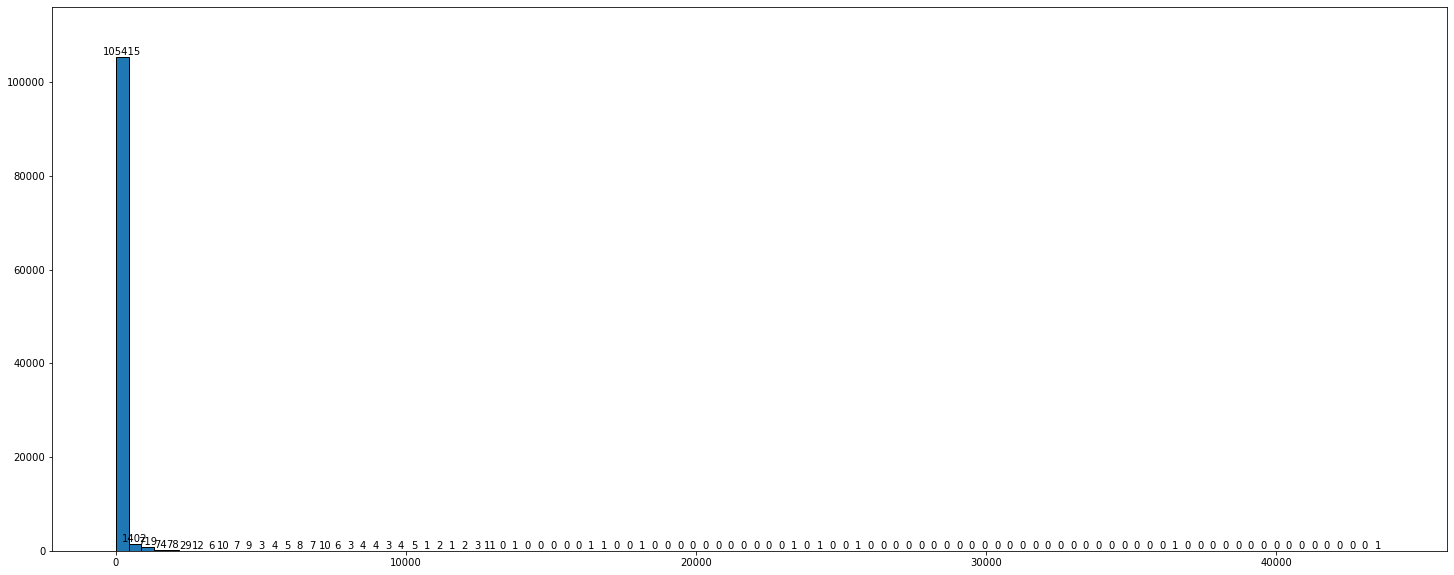

<Figure size 432x288 with 0 Axes>

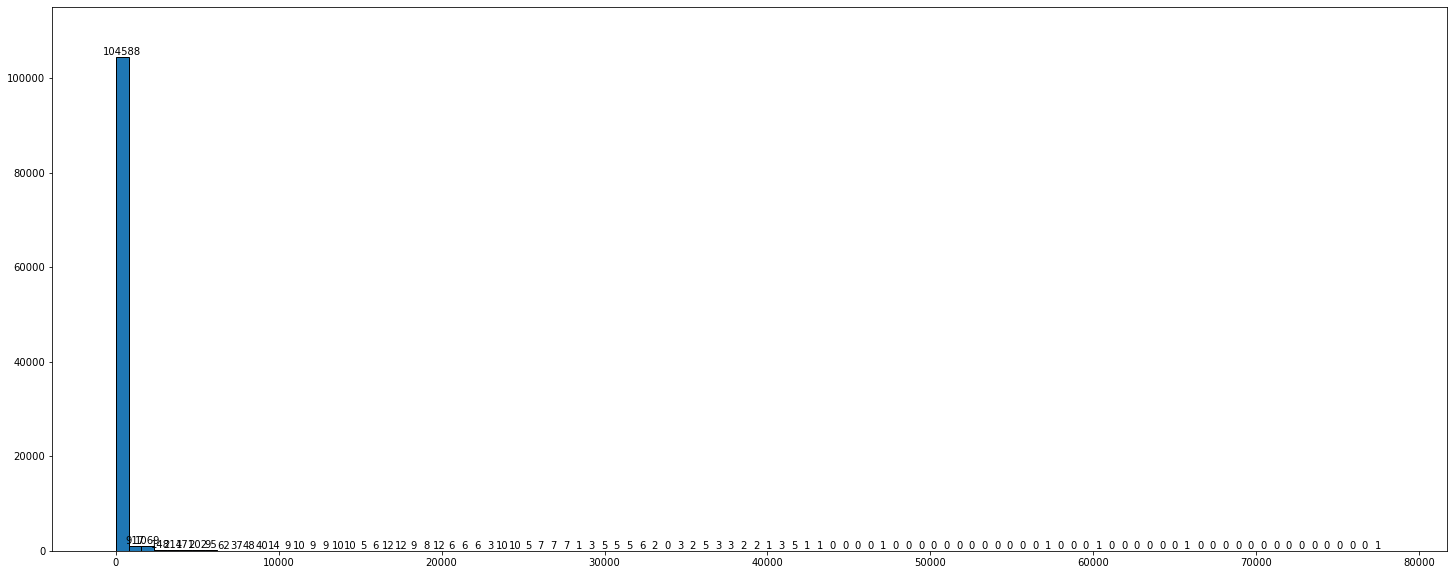

<Figure size 432x288 with 0 Axes>

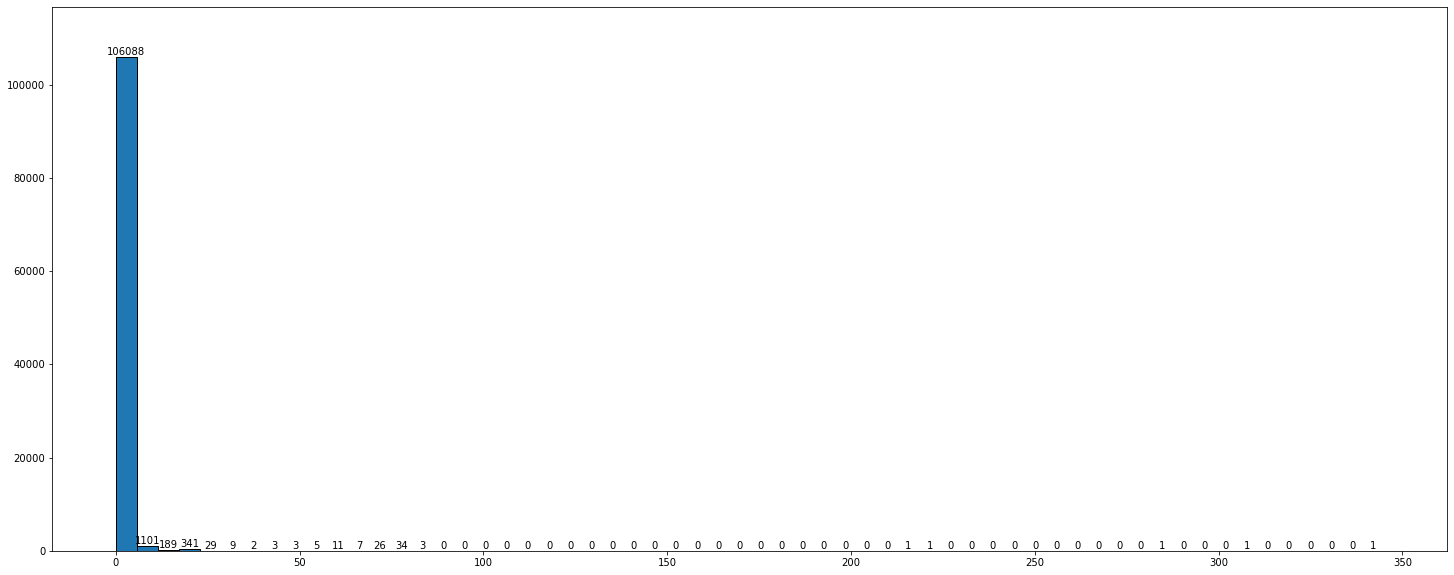

<Figure size 432x288 with 0 Axes>

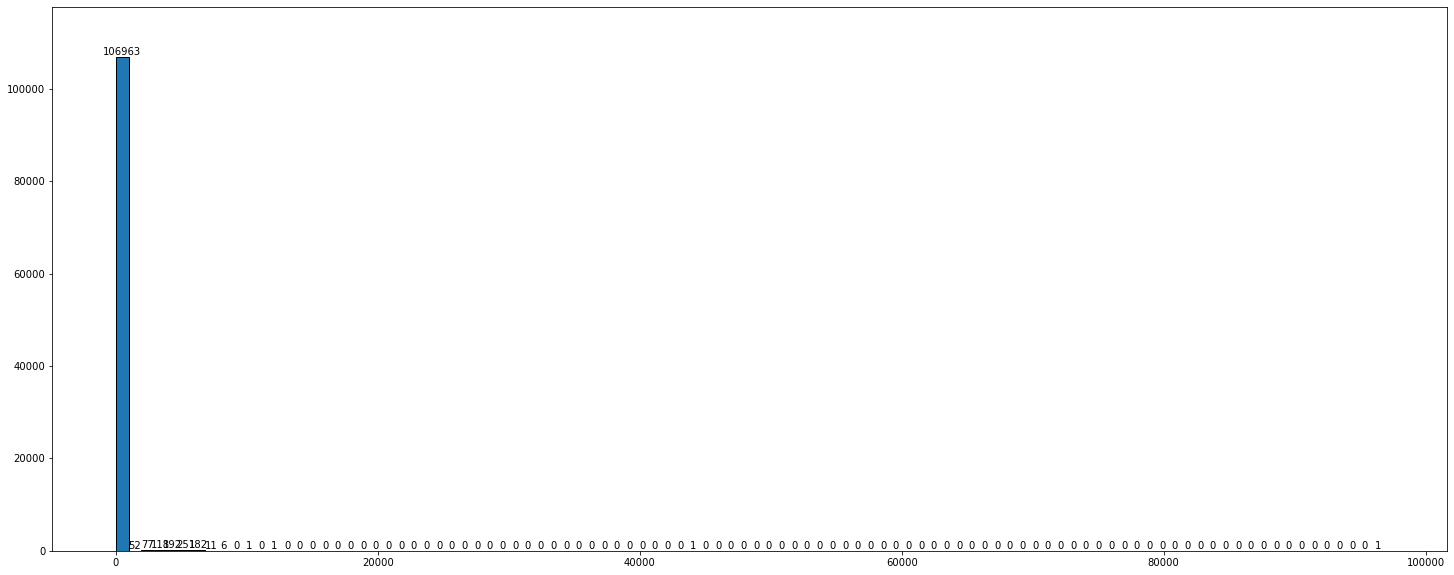

<Figure size 432x288 with 0 Axes>

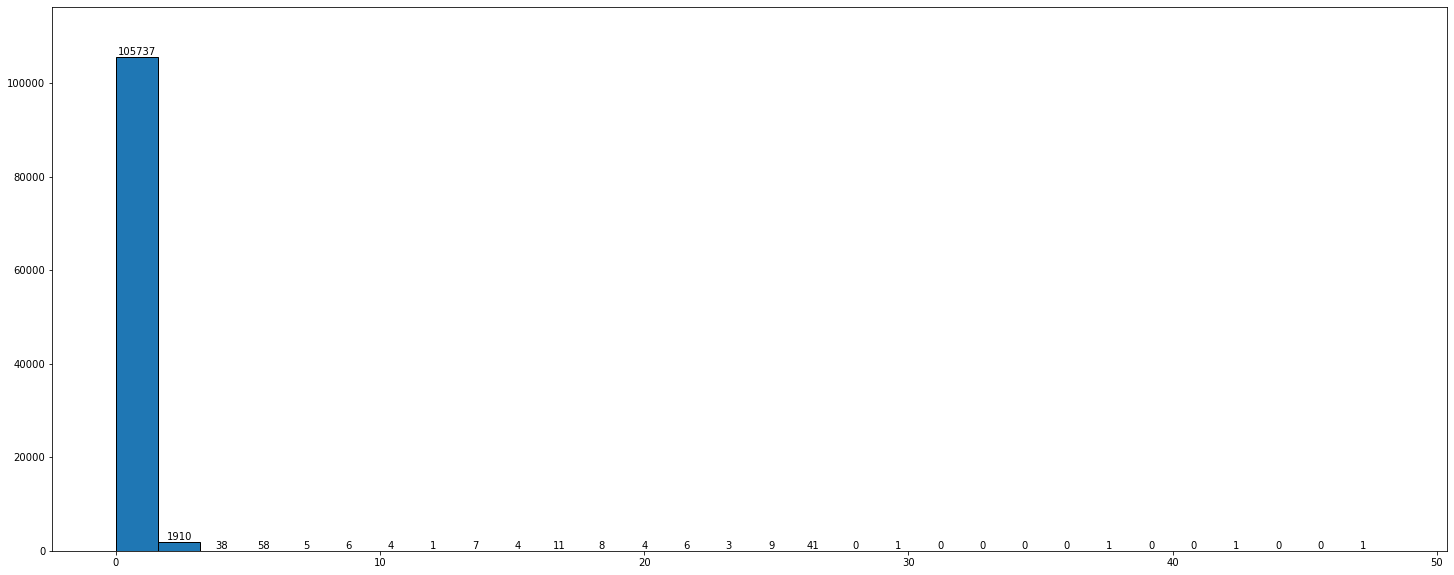

<Figure size 432x288 with 0 Axes>

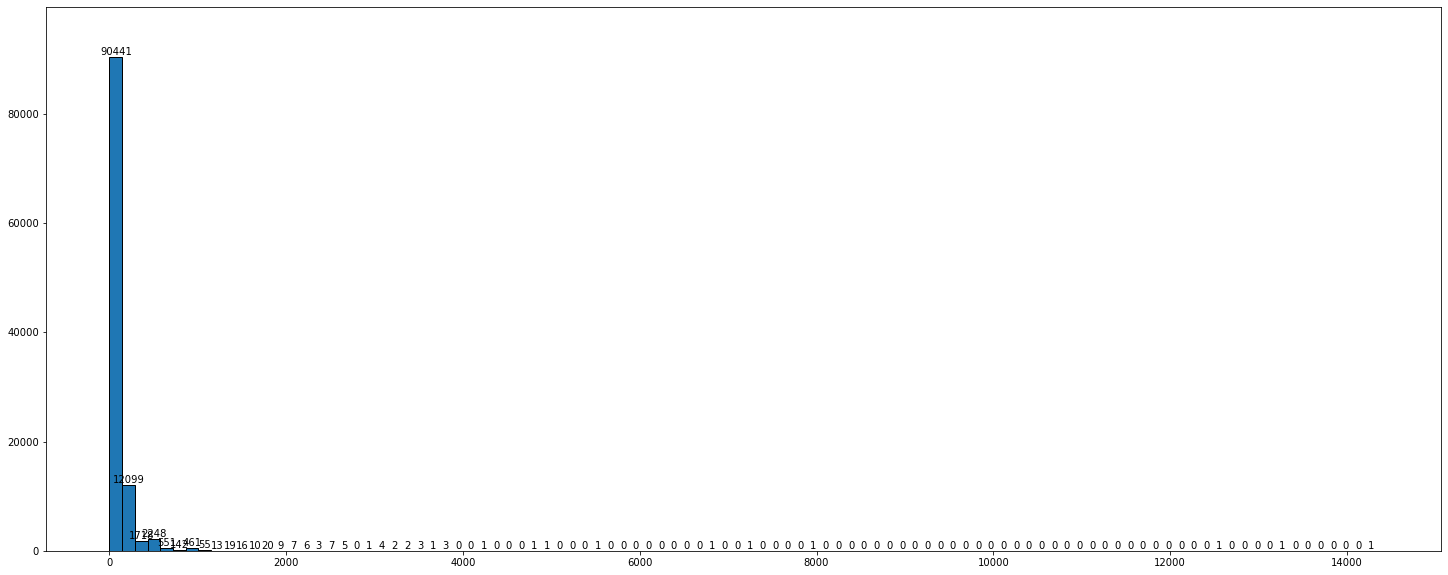

<Figure size 432x288 with 0 Axes>

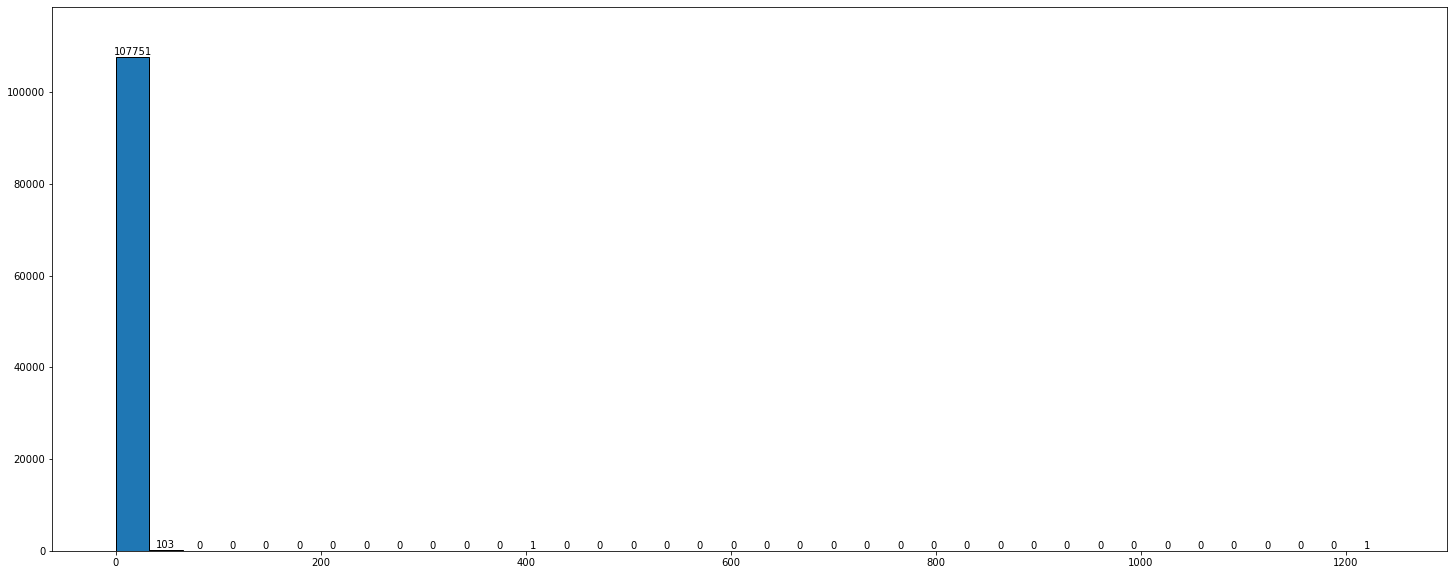

<Figure size 432x288 with 0 Axes>

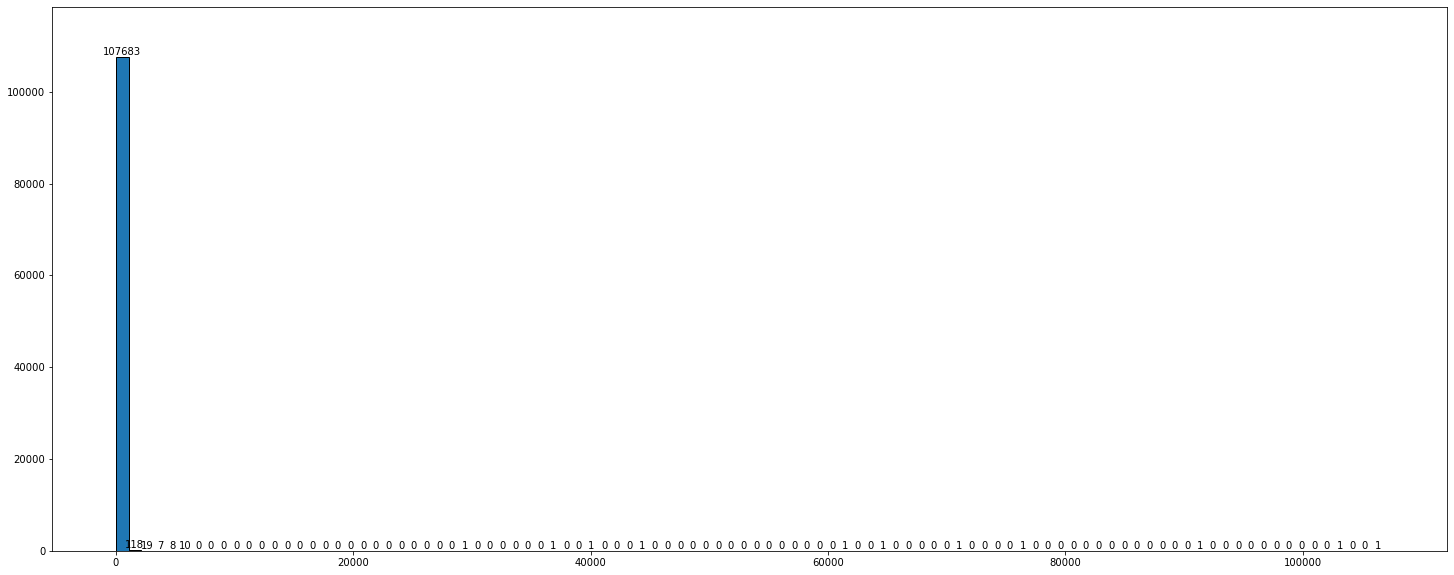

<Figure size 432x288 with 0 Axes>

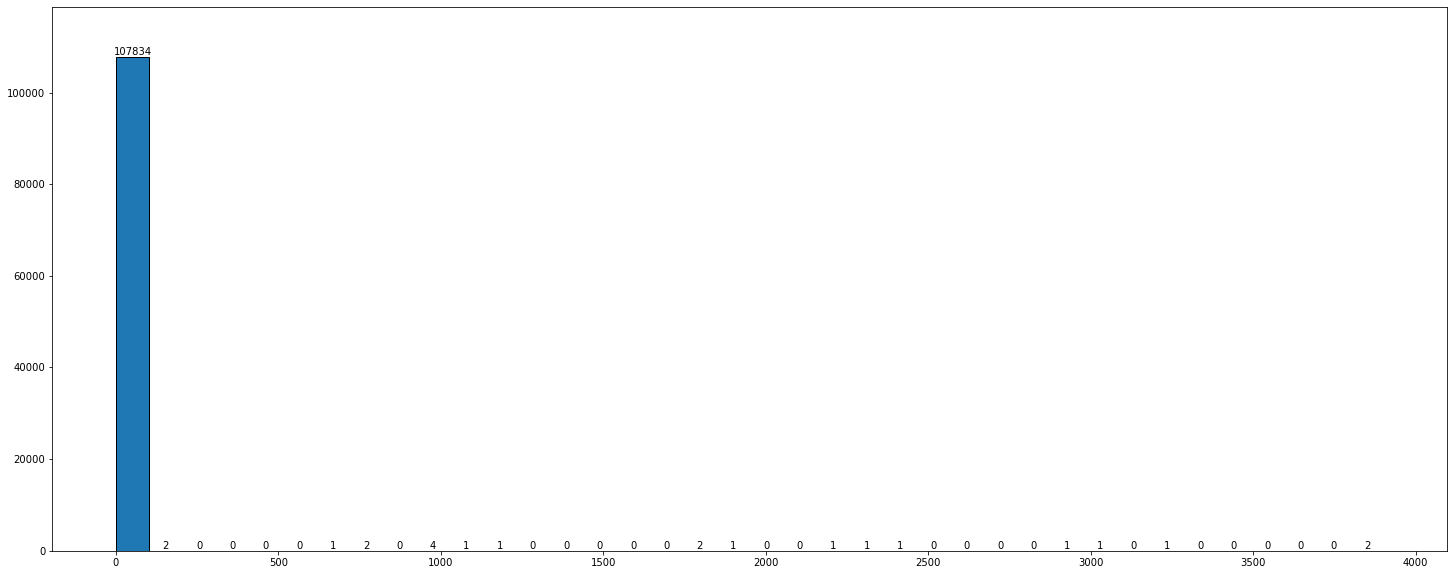

<Figure size 432x288 with 0 Axes>

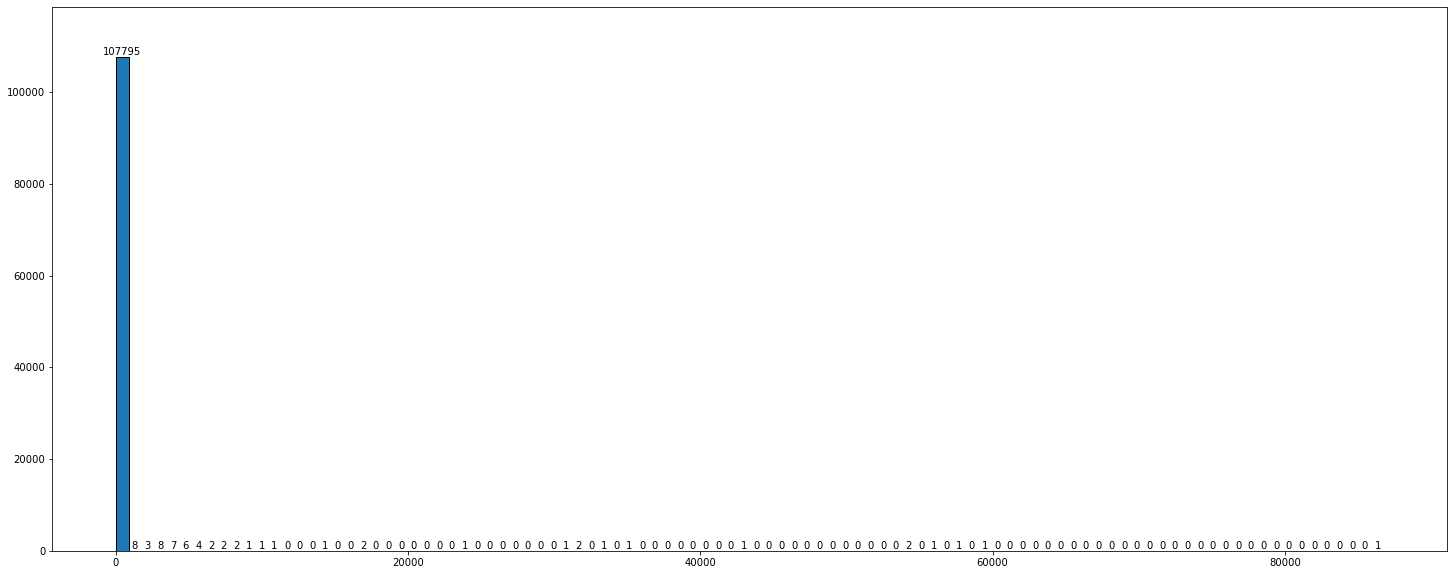

<Figure size 432x288 with 0 Axes>

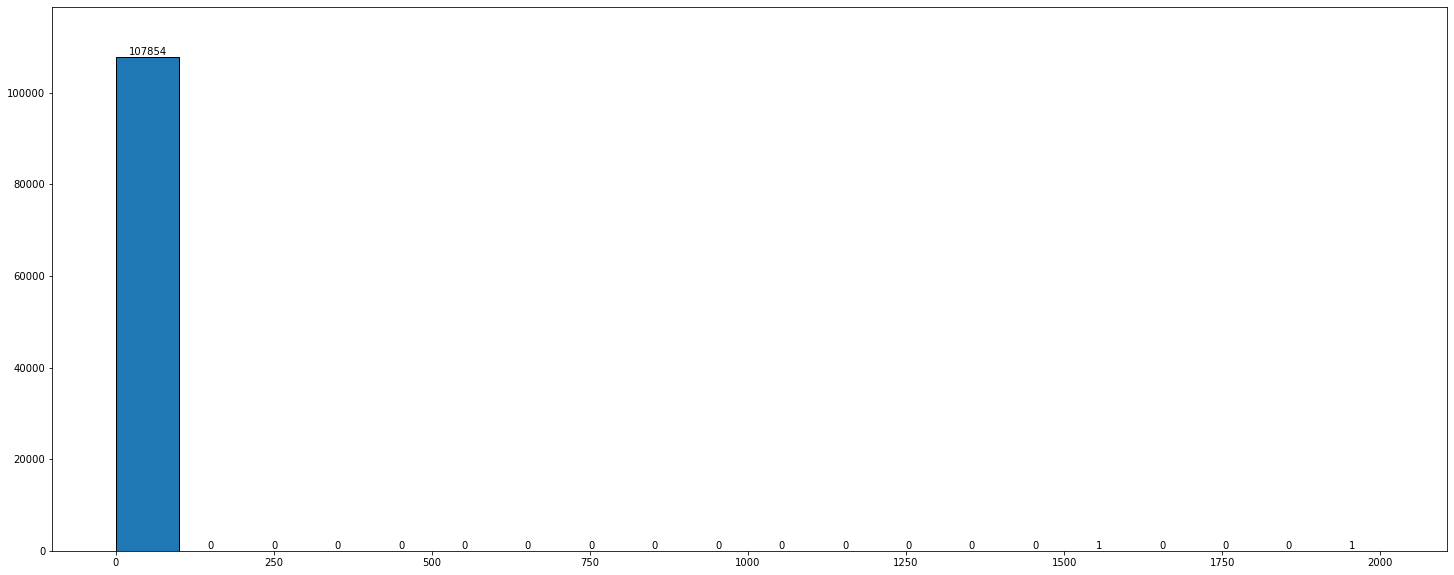

<Figure size 432x288 with 0 Axes>

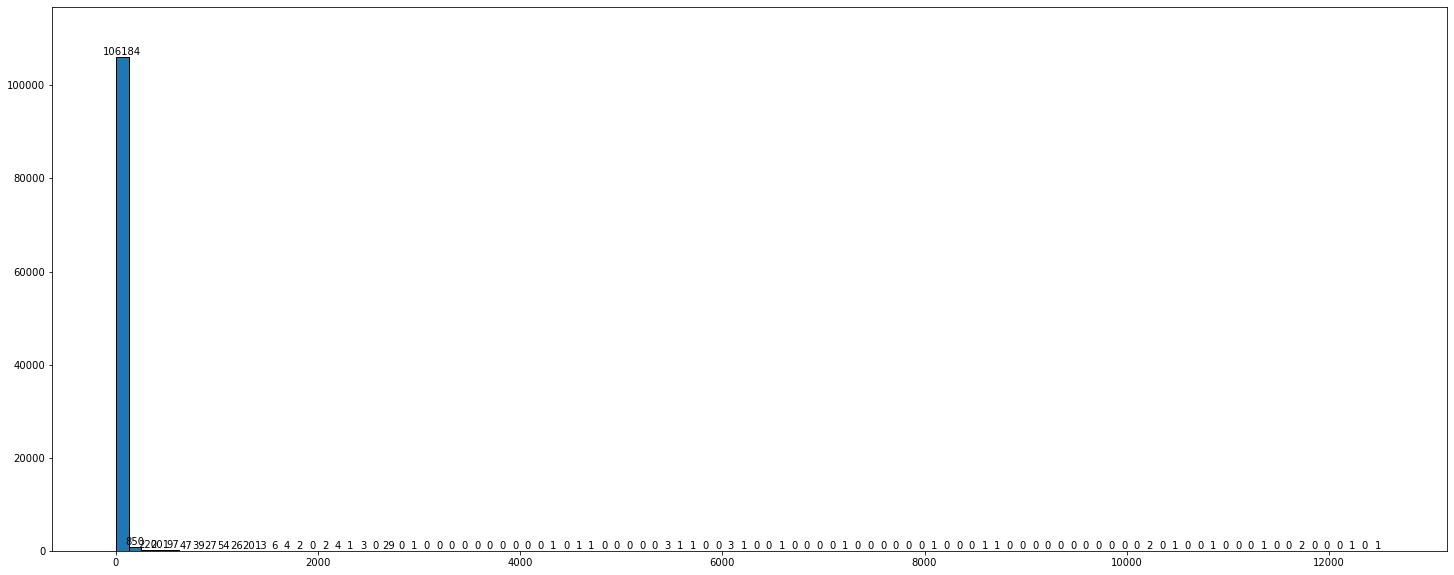

<Figure size 432x288 with 0 Axes>

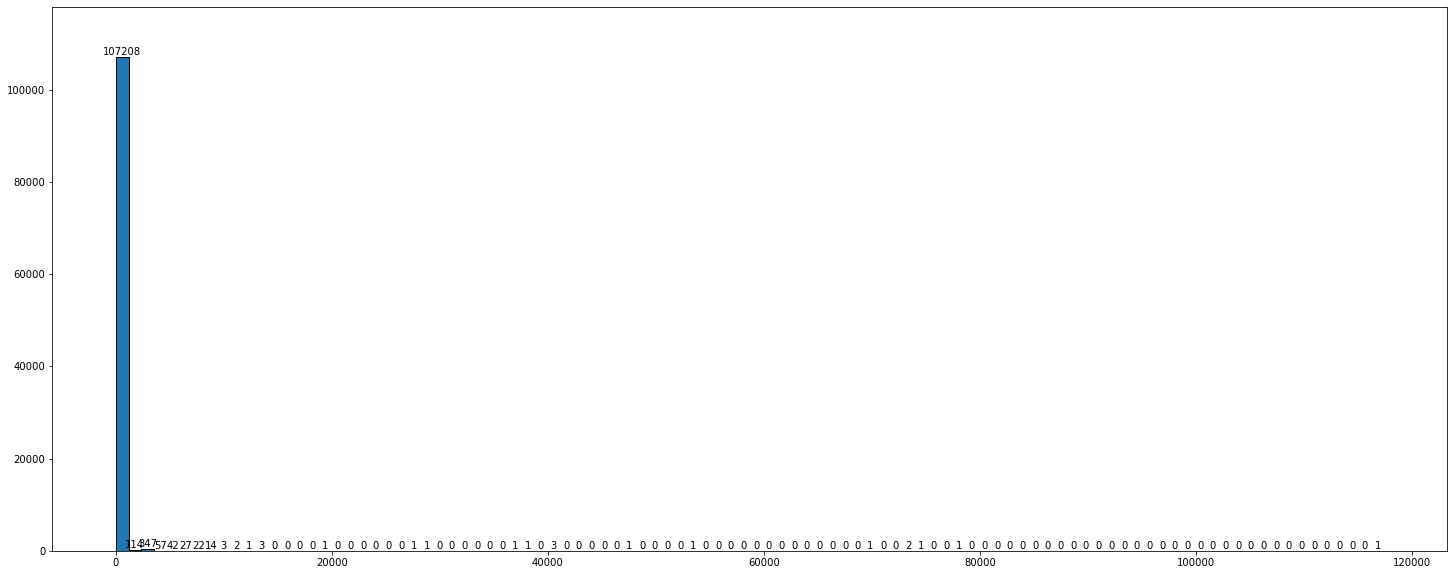

<Figure size 432x288 with 0 Axes>

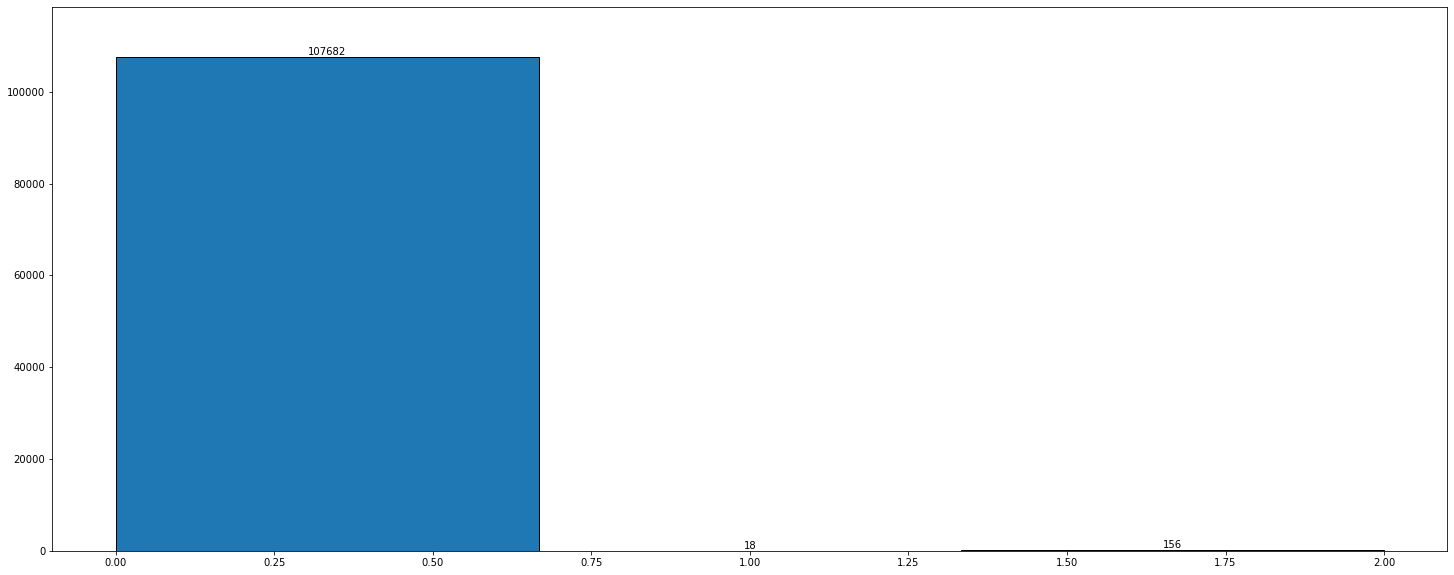

<Figure size 432x288 with 0 Axes>

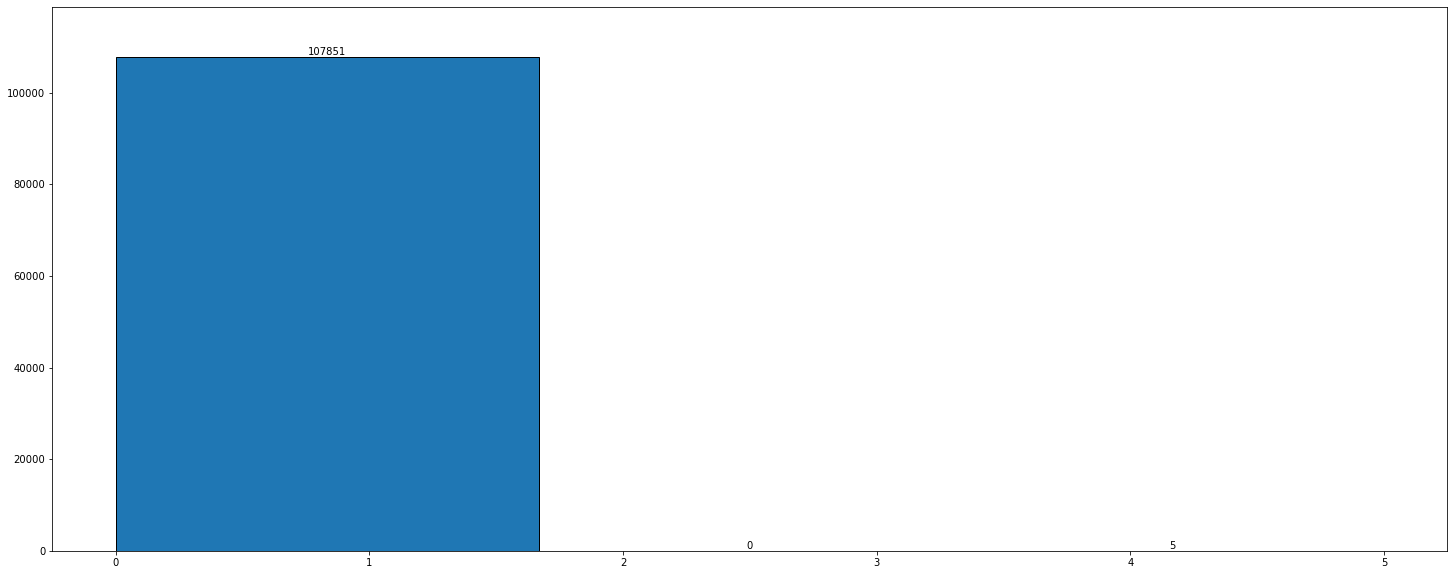

<Figure size 432x288 with 0 Axes>

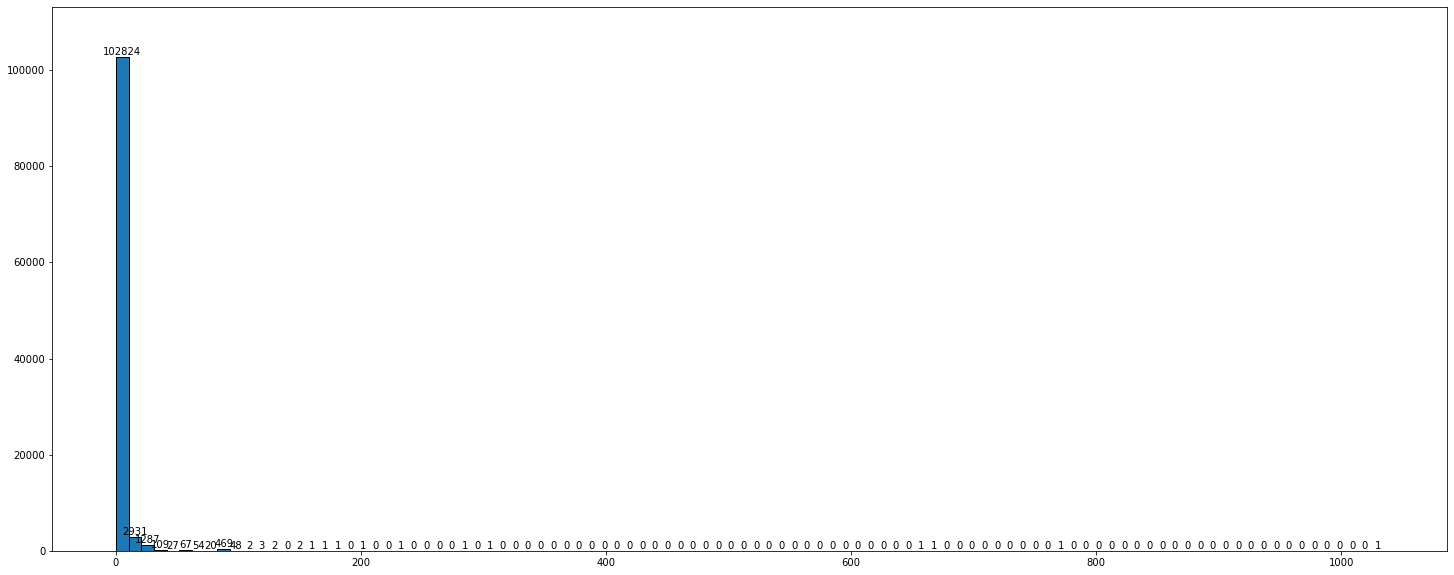

<Figure size 432x288 with 0 Axes>

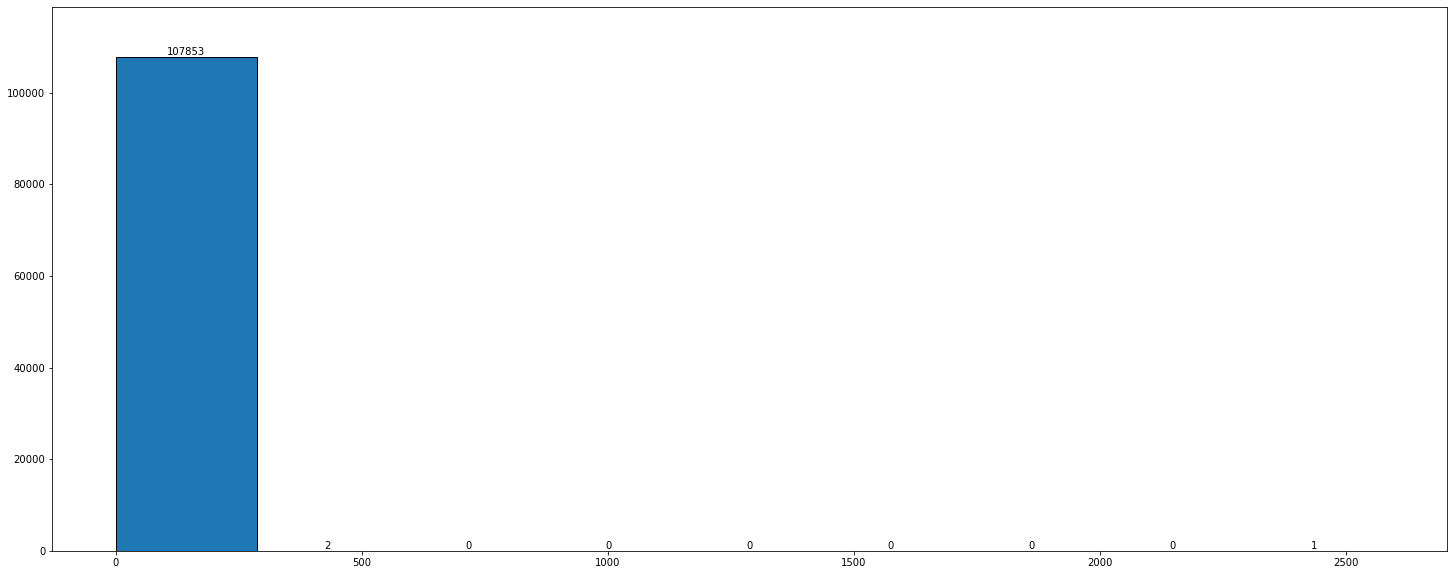

<Figure size 432x288 with 0 Axes>

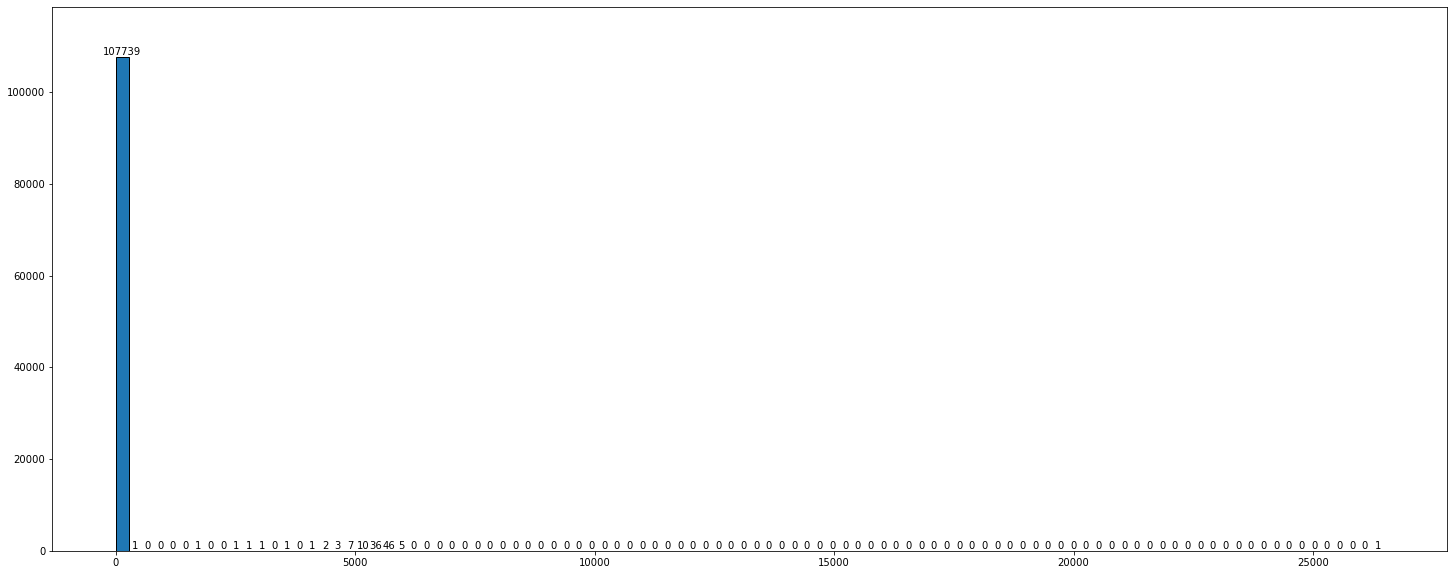

<Figure size 432x288 with 0 Axes>

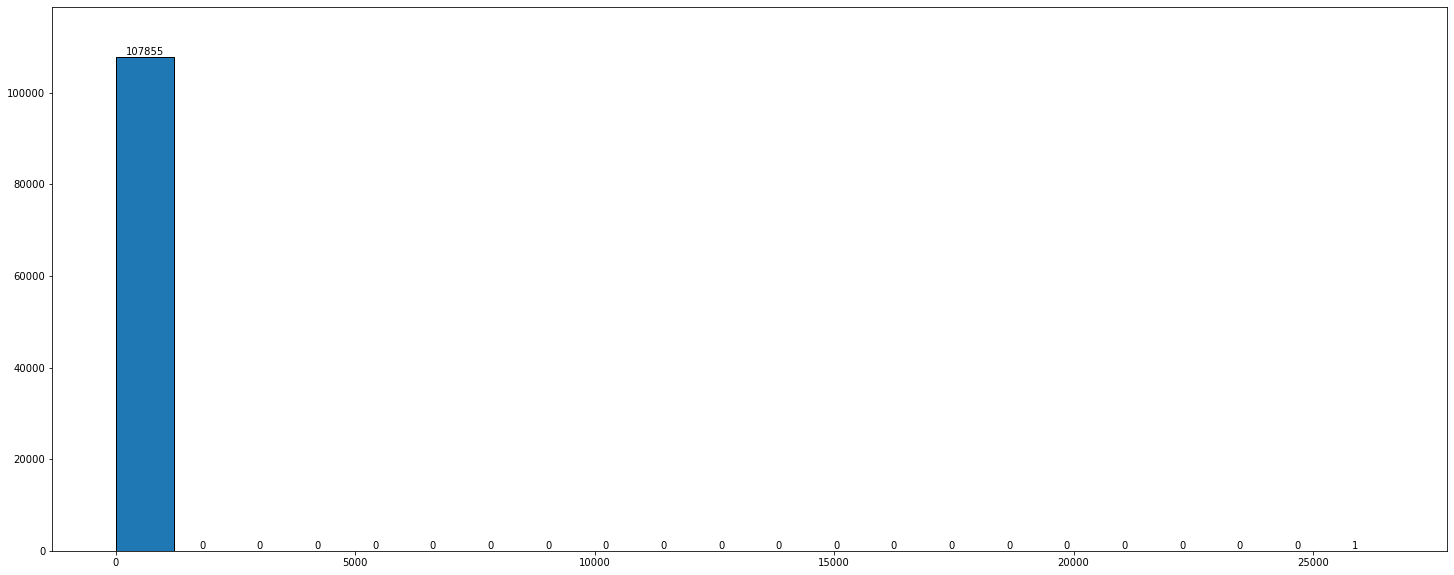

<Figure size 432x288 with 0 Axes>

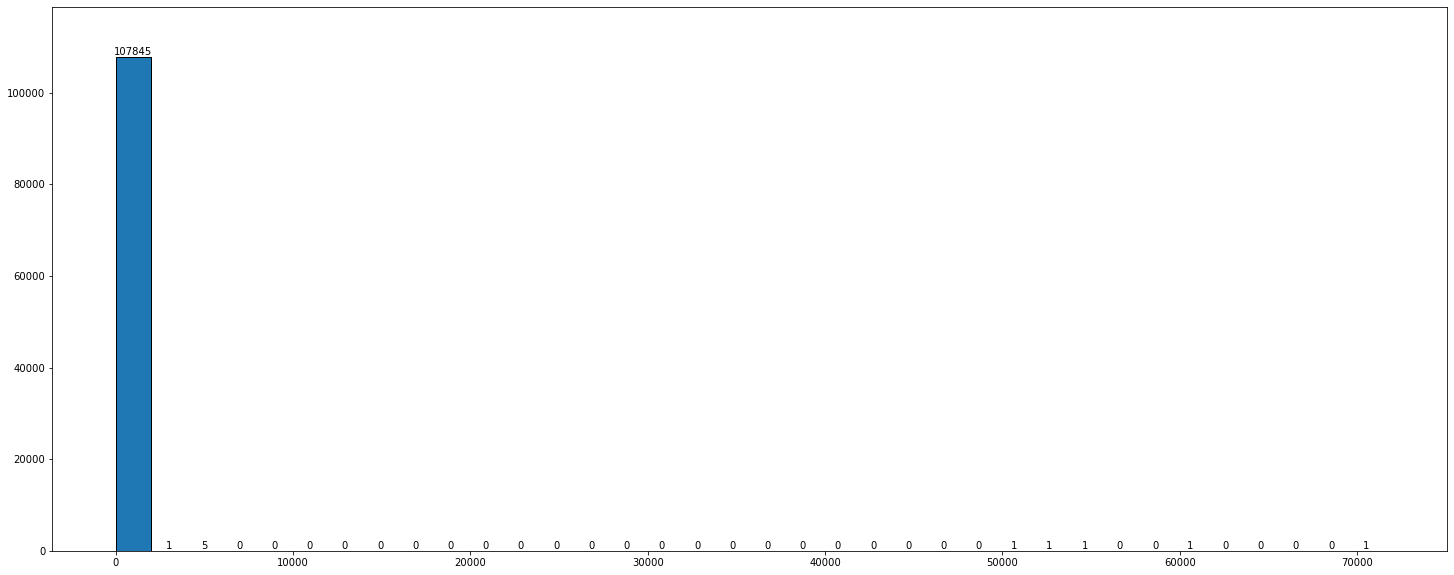

<Figure size 432x288 with 0 Axes>

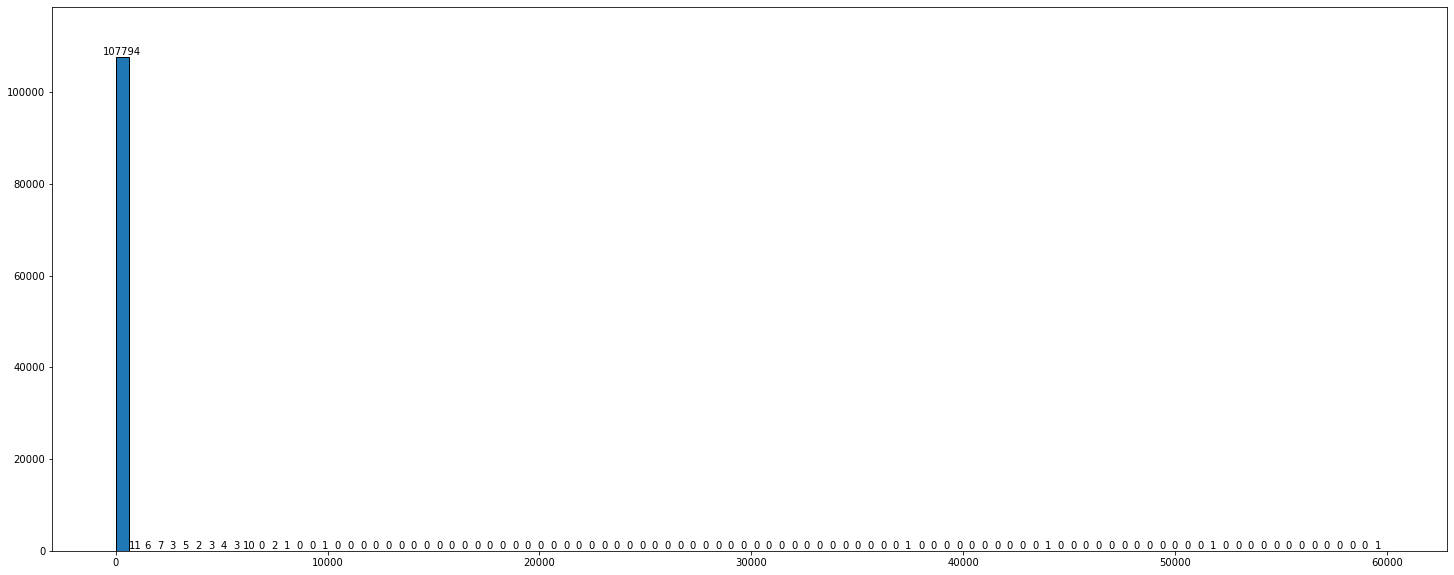

<Figure size 432x288 with 0 Axes>

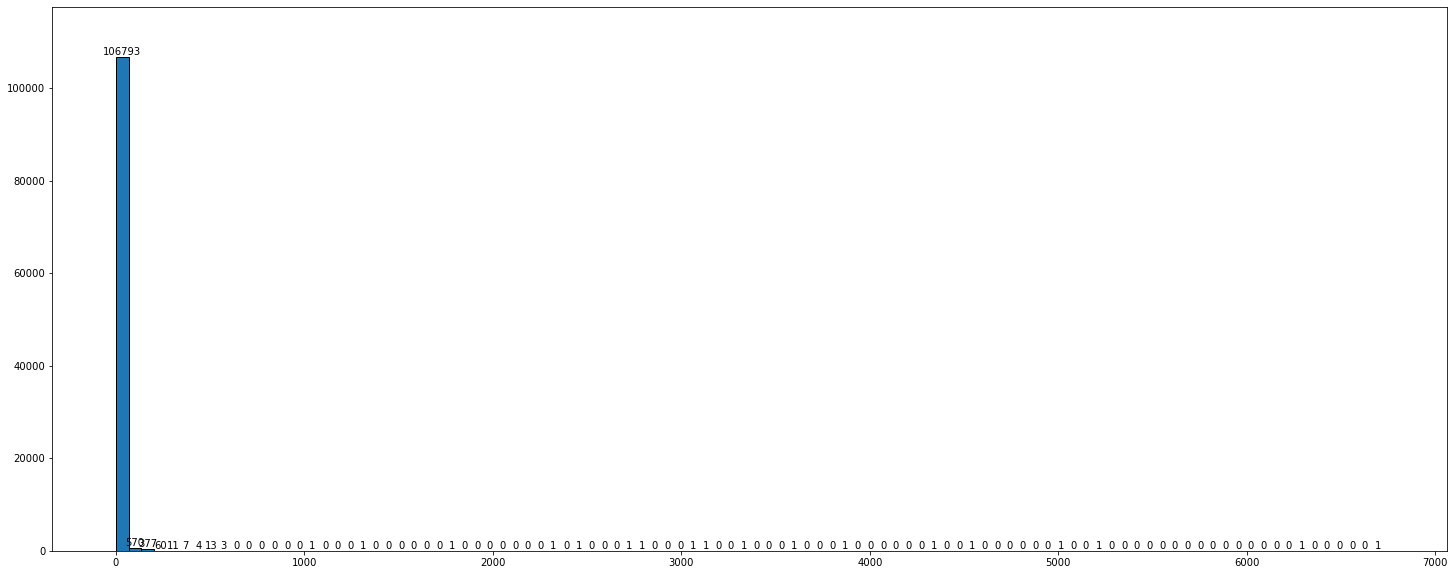

<Figure size 432x288 with 0 Axes>

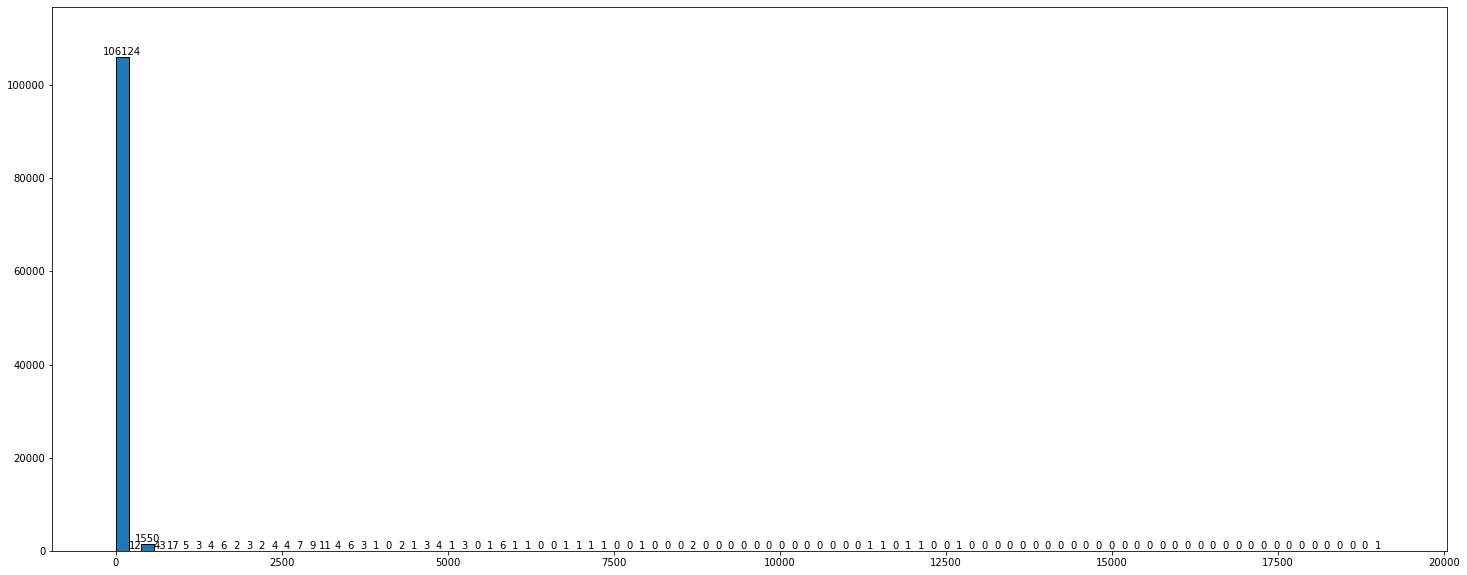

<Figure size 432x288 with 0 Axes>

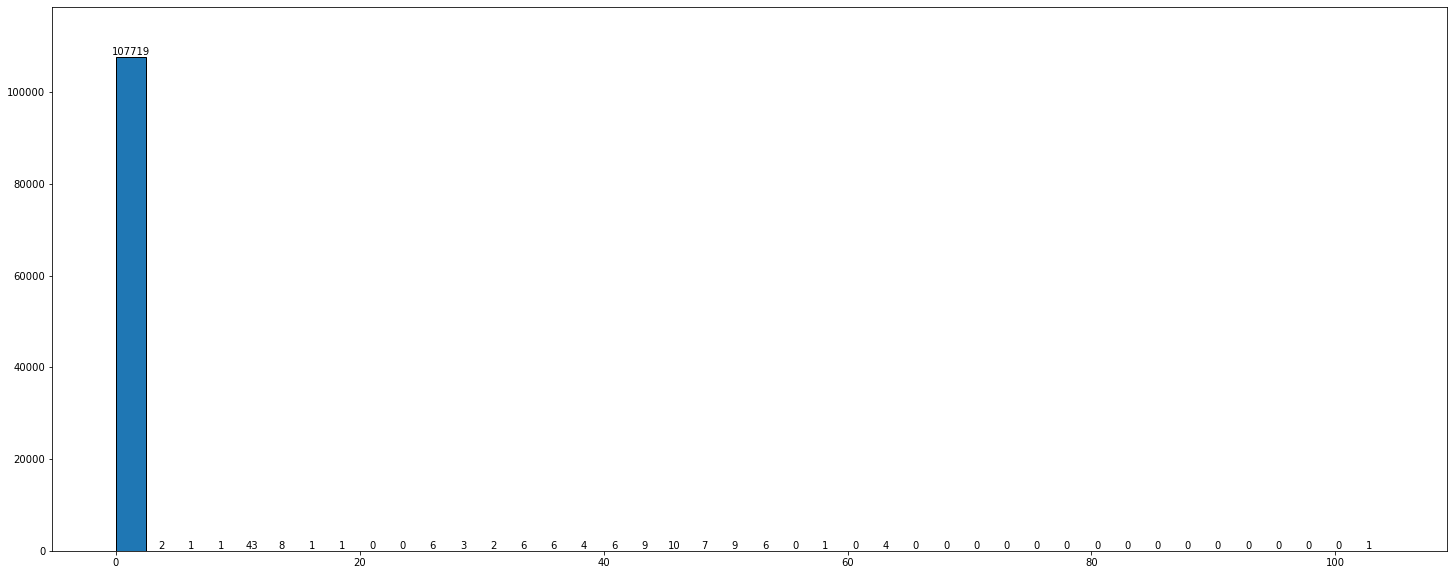

<Figure size 432x288 with 0 Axes>

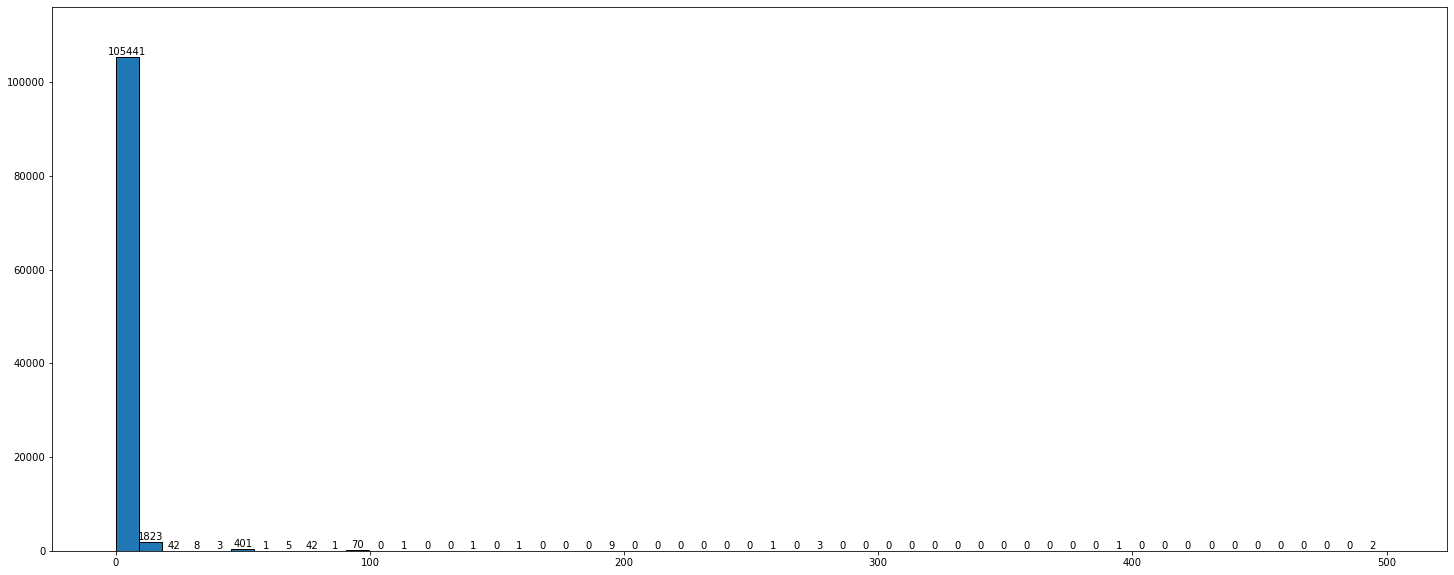

<Figure size 432x288 with 0 Axes>

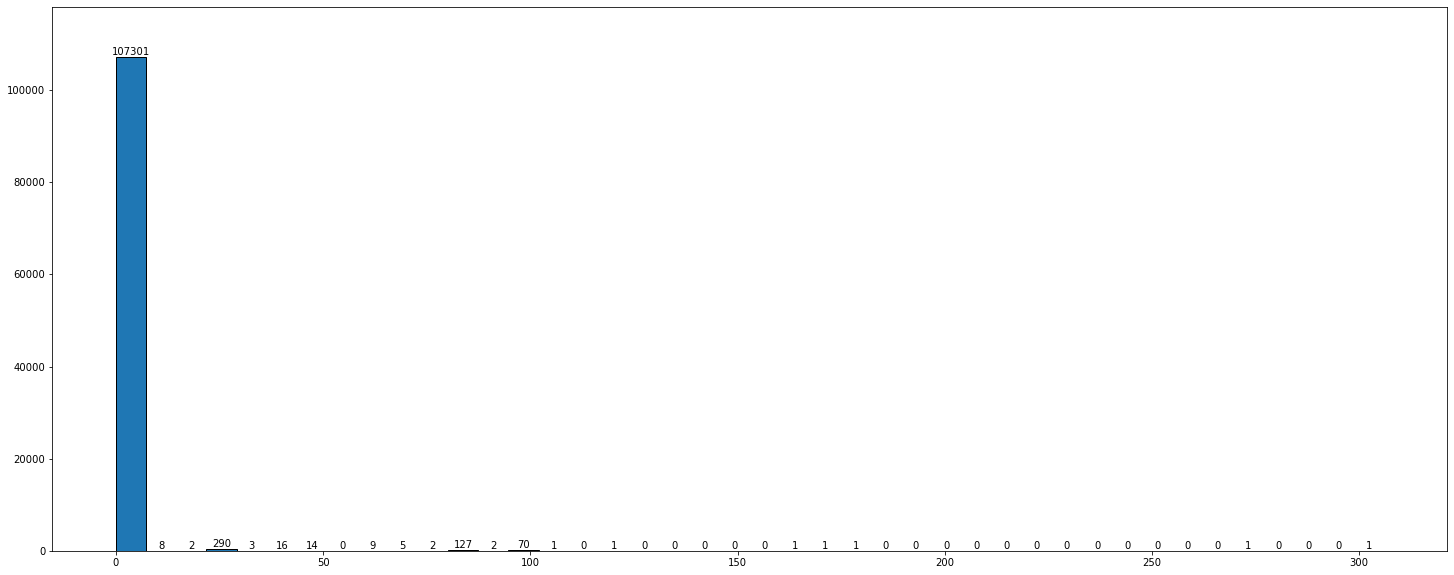

<Figure size 432x288 with 0 Axes>

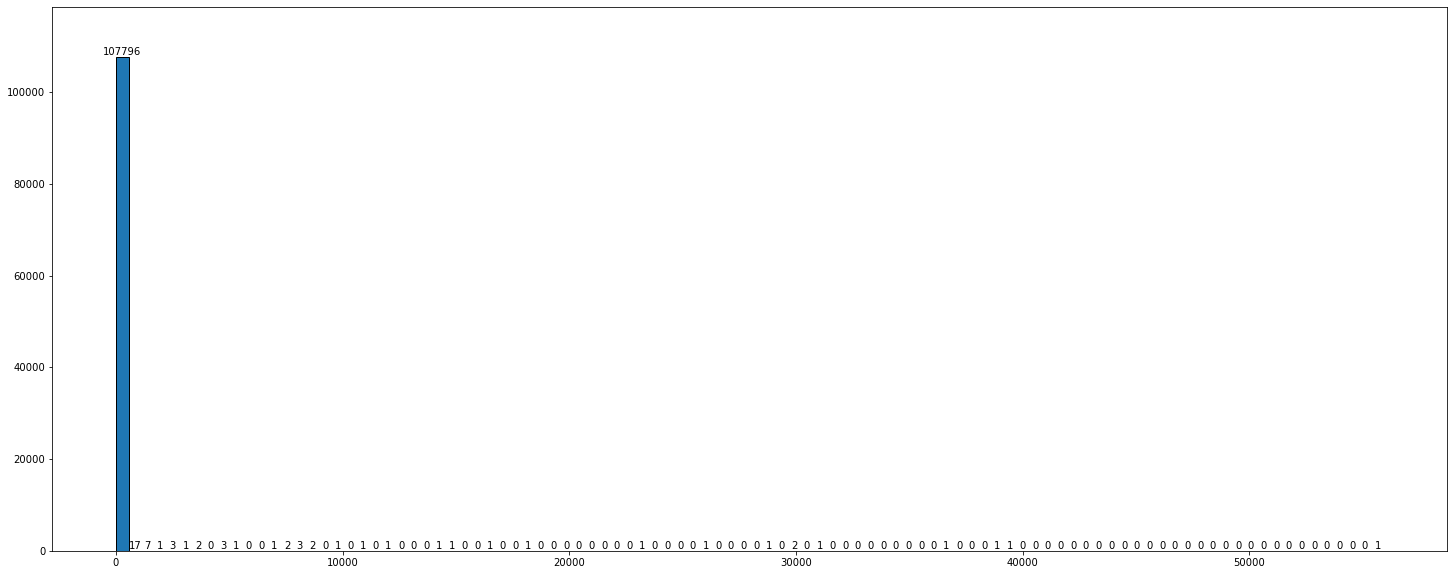

<Figure size 432x288 with 0 Axes>

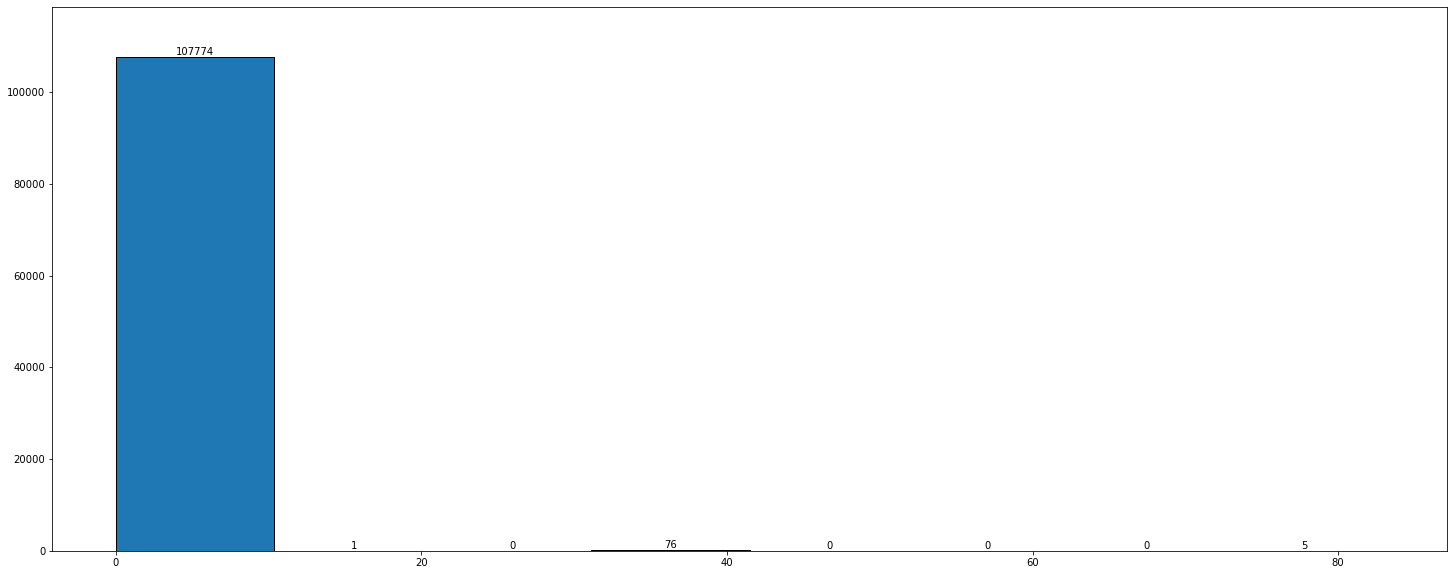

<Figure size 432x288 with 0 Axes>

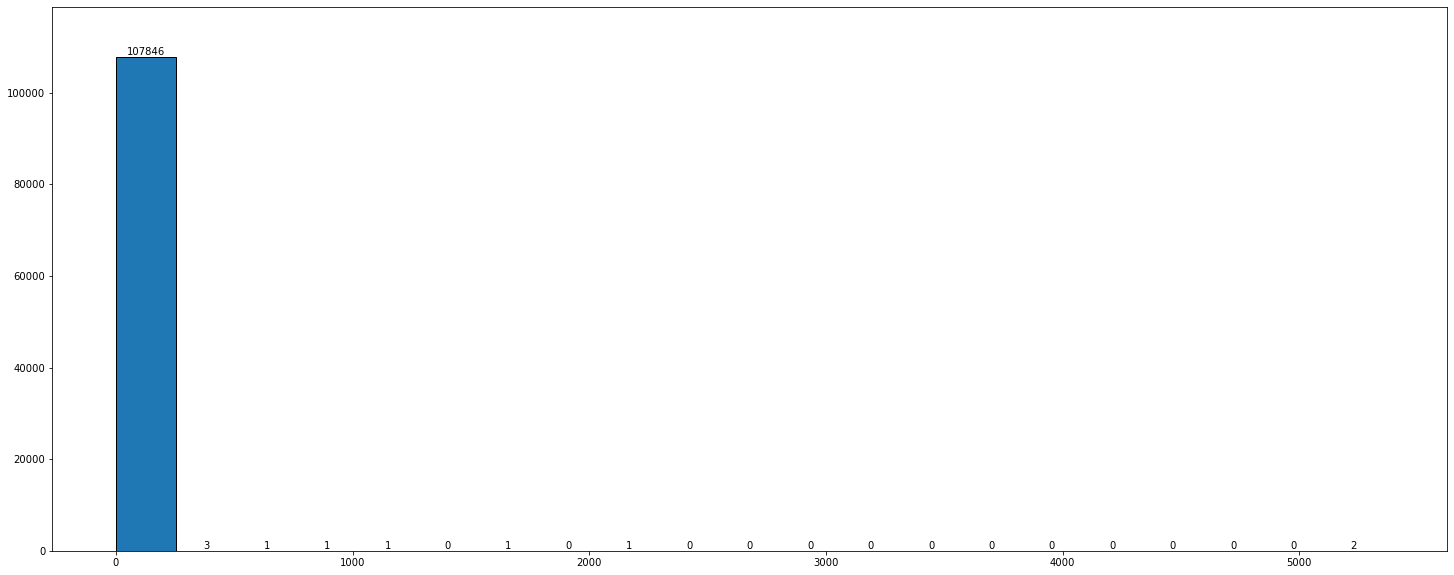

<Figure size 432x288 with 0 Axes>

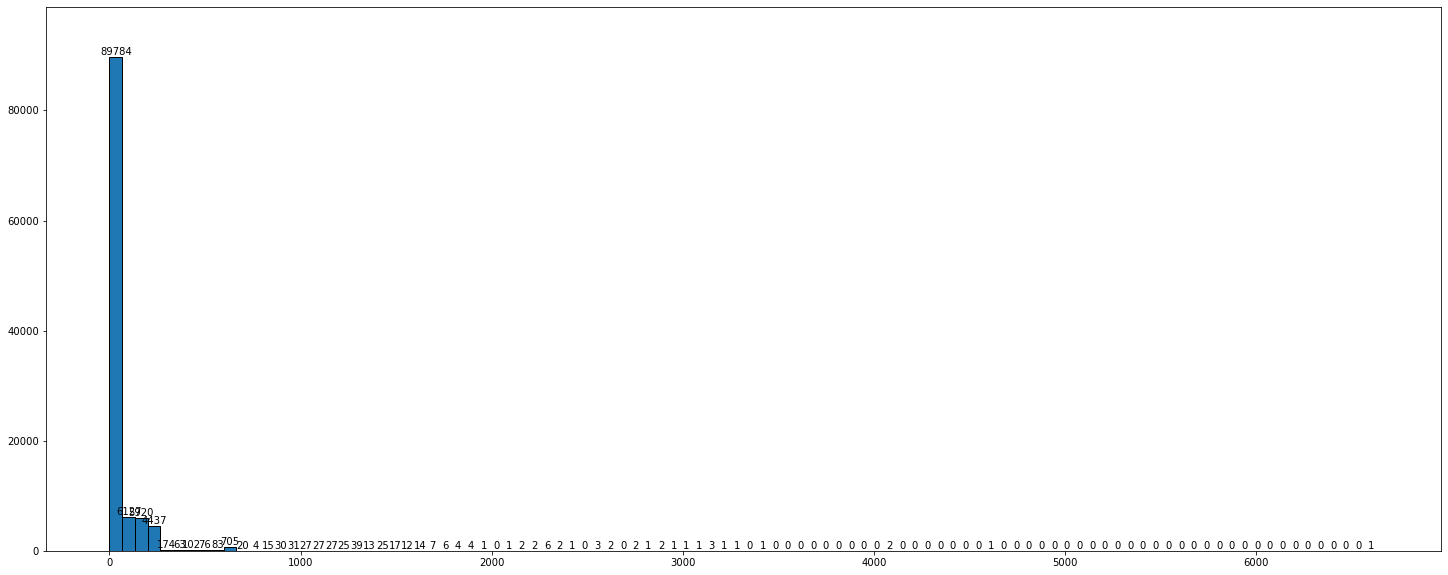

<Figure size 432x288 with 0 Axes>

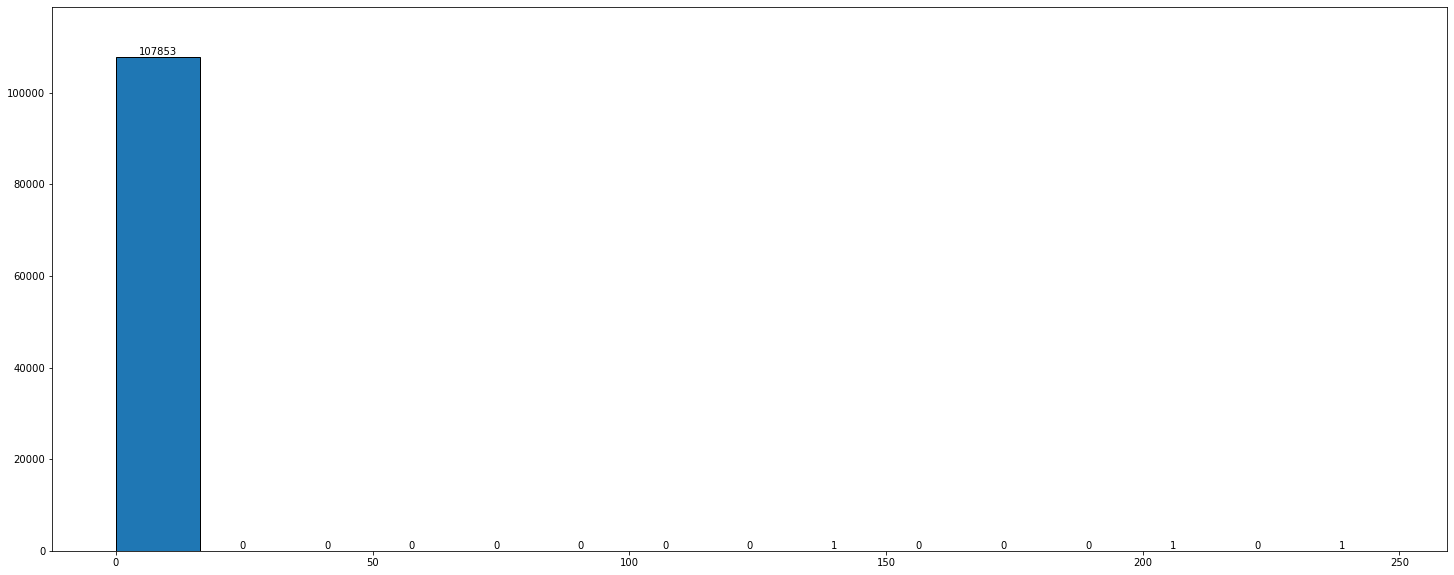

<Figure size 432x288 with 0 Axes>

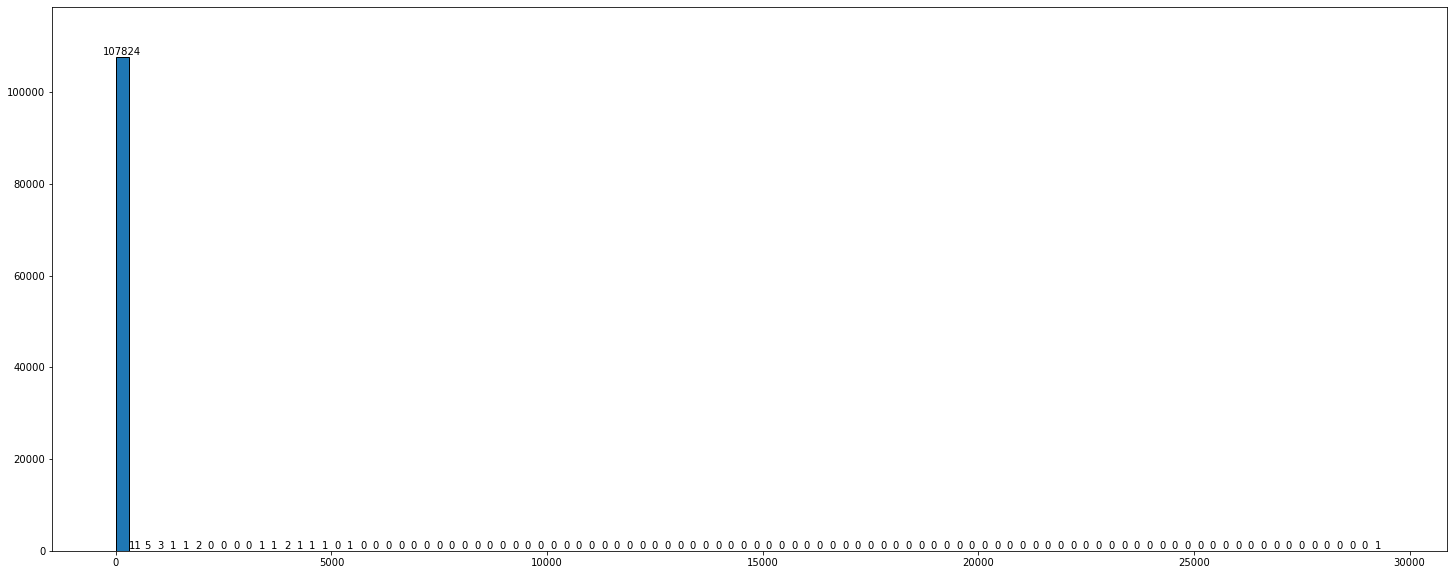

<Figure size 432x288 with 0 Axes>

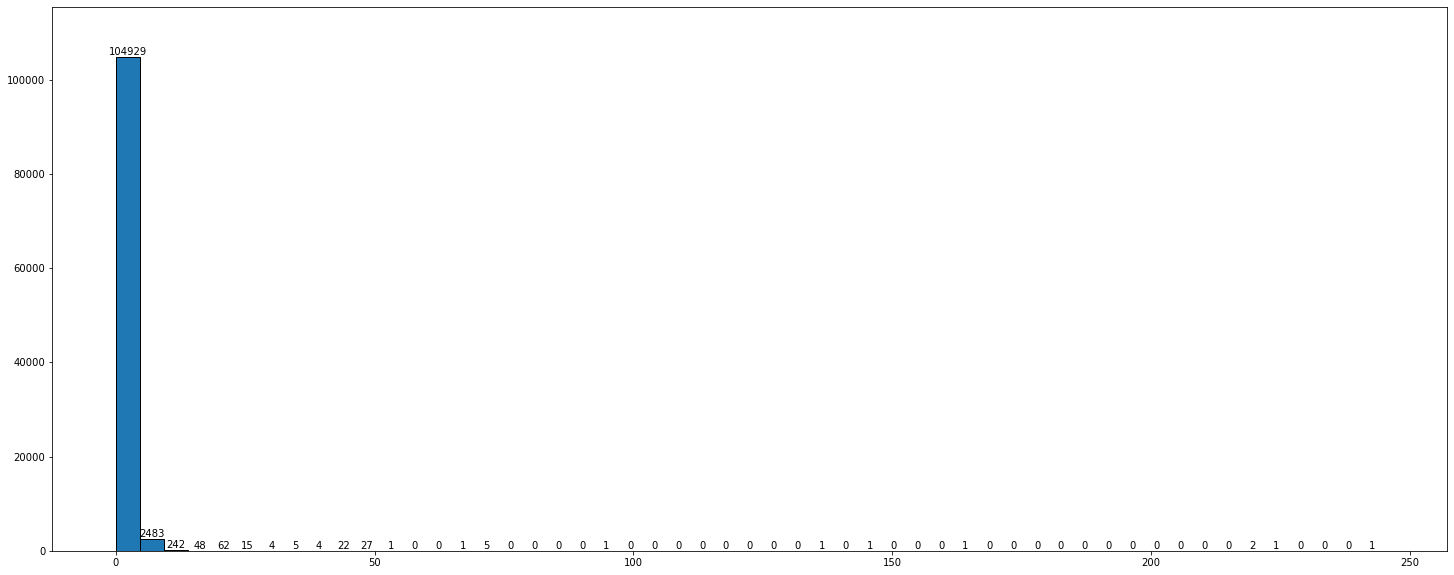

<Figure size 432x288 with 0 Axes>

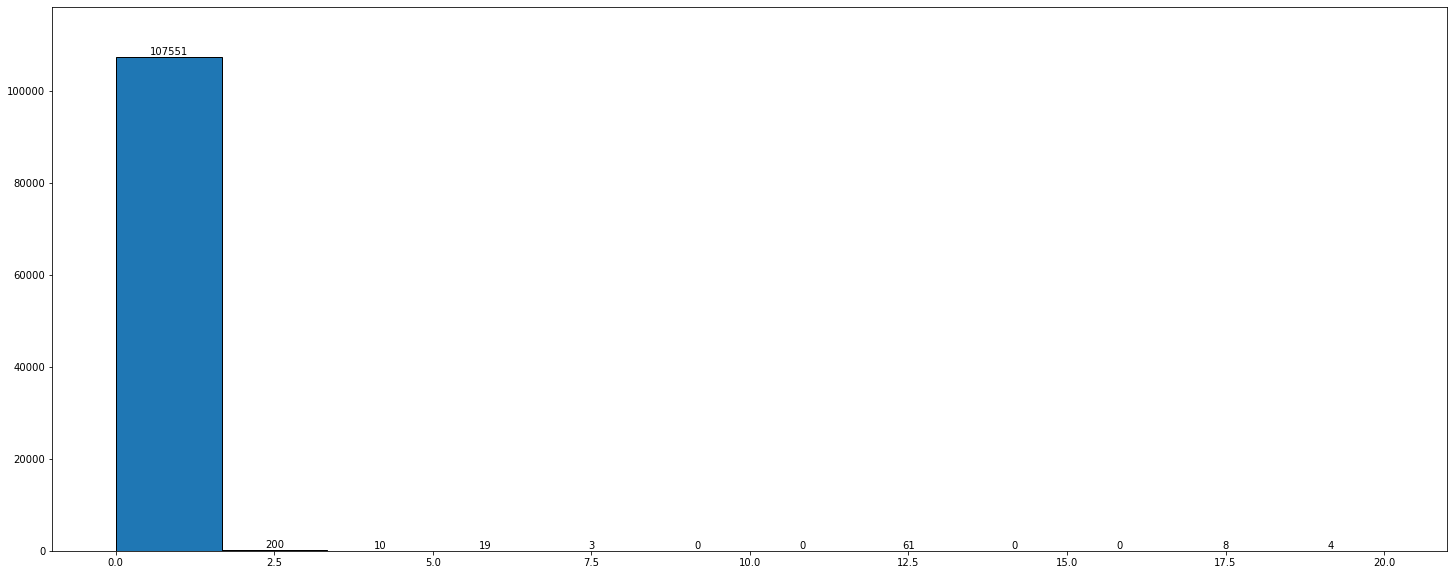

<Figure size 432x288 with 0 Axes>

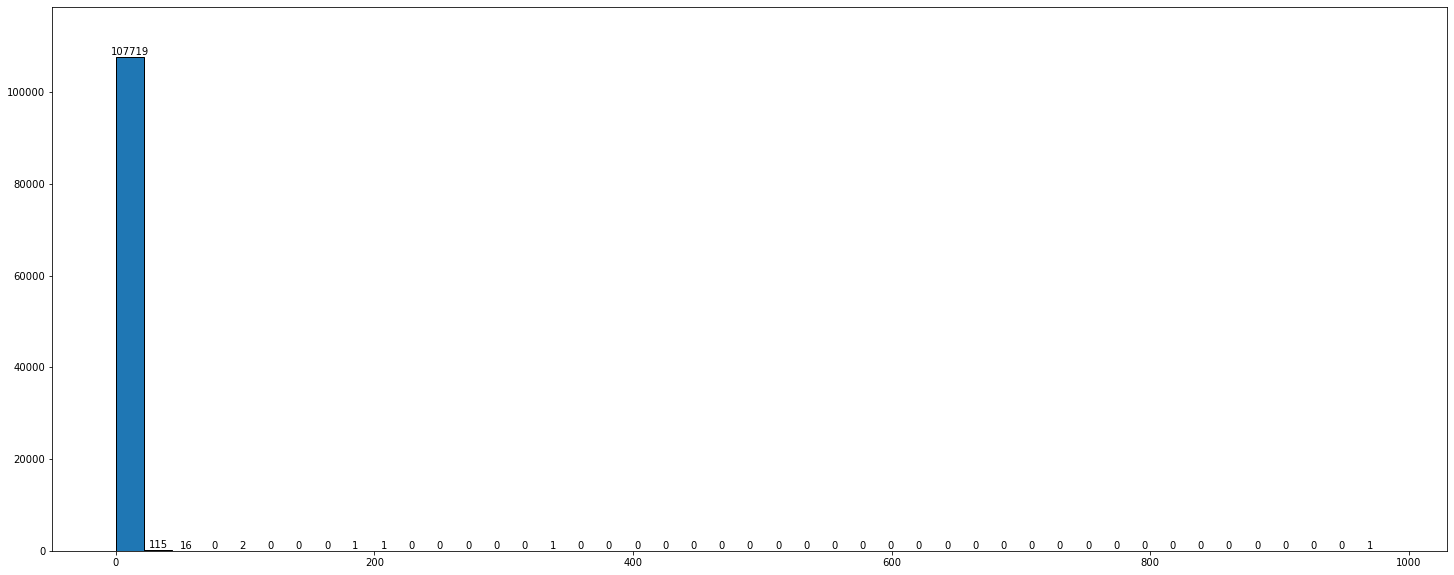

<Figure size 432x288 with 0 Axes>

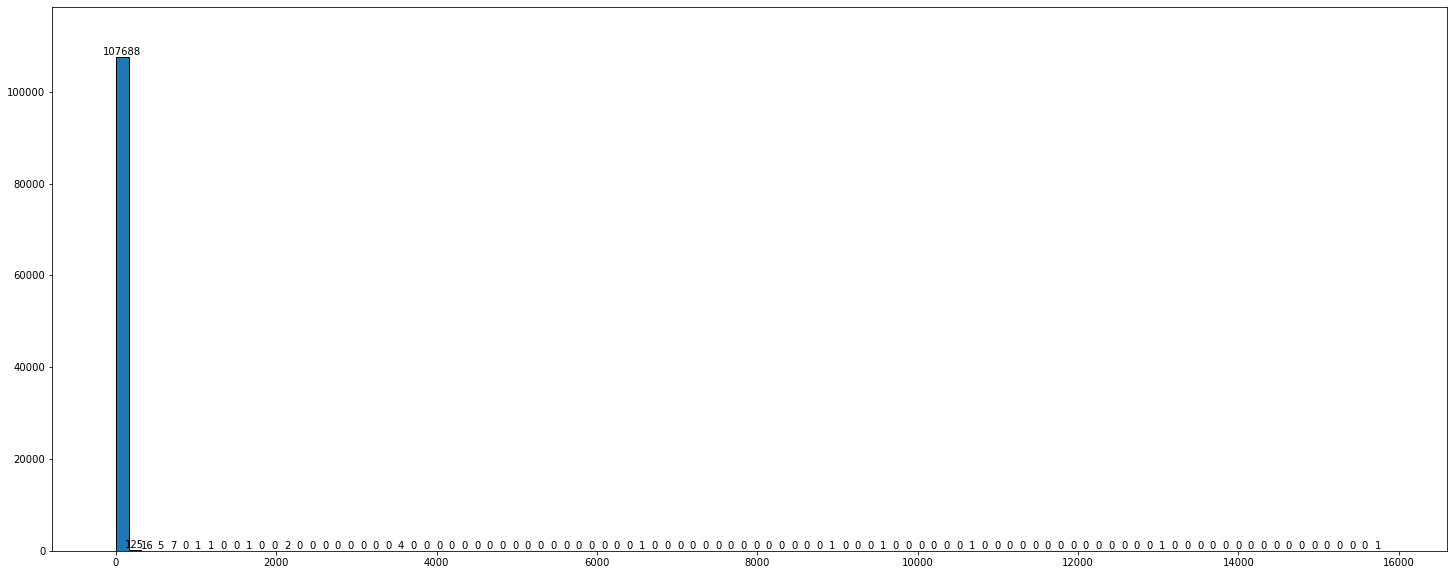

<Figure size 432x288 with 0 Axes>

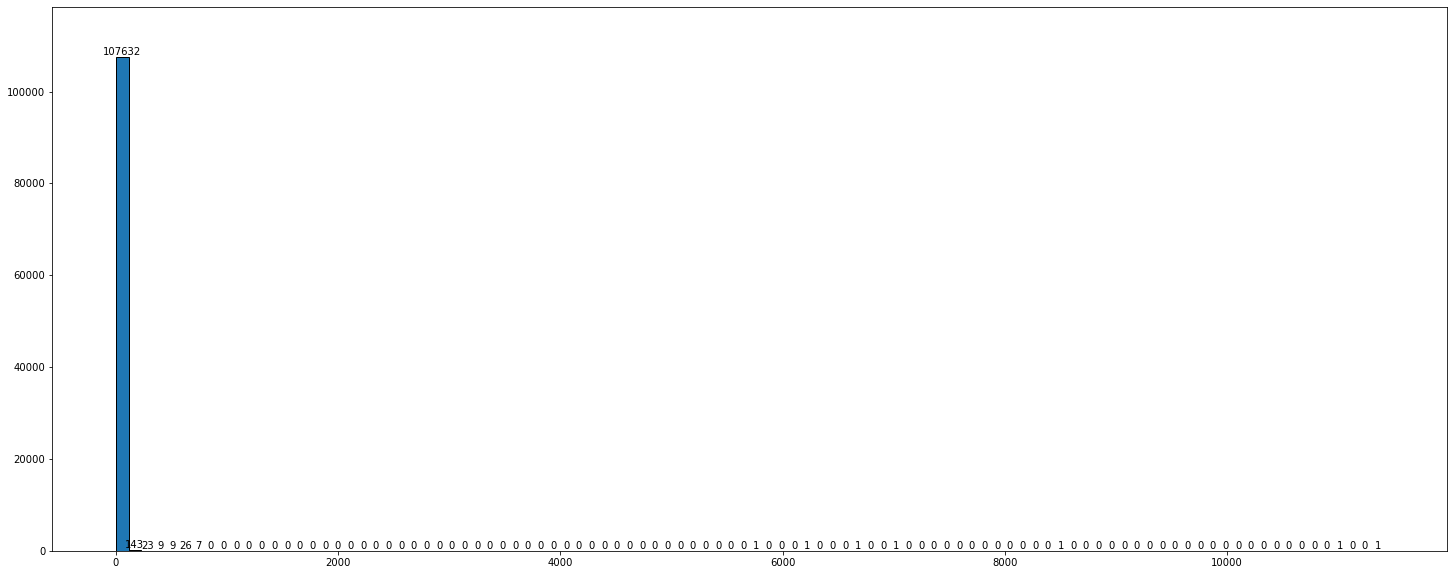

<Figure size 432x288 with 0 Axes>

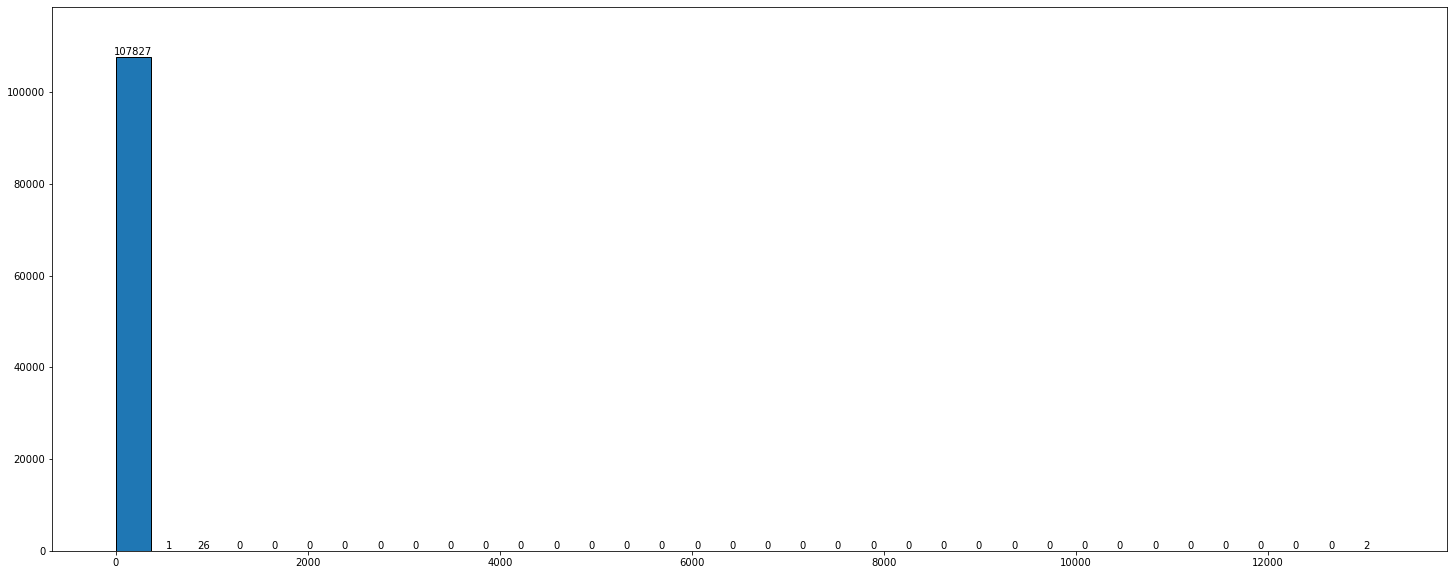

<Figure size 432x288 with 0 Axes>

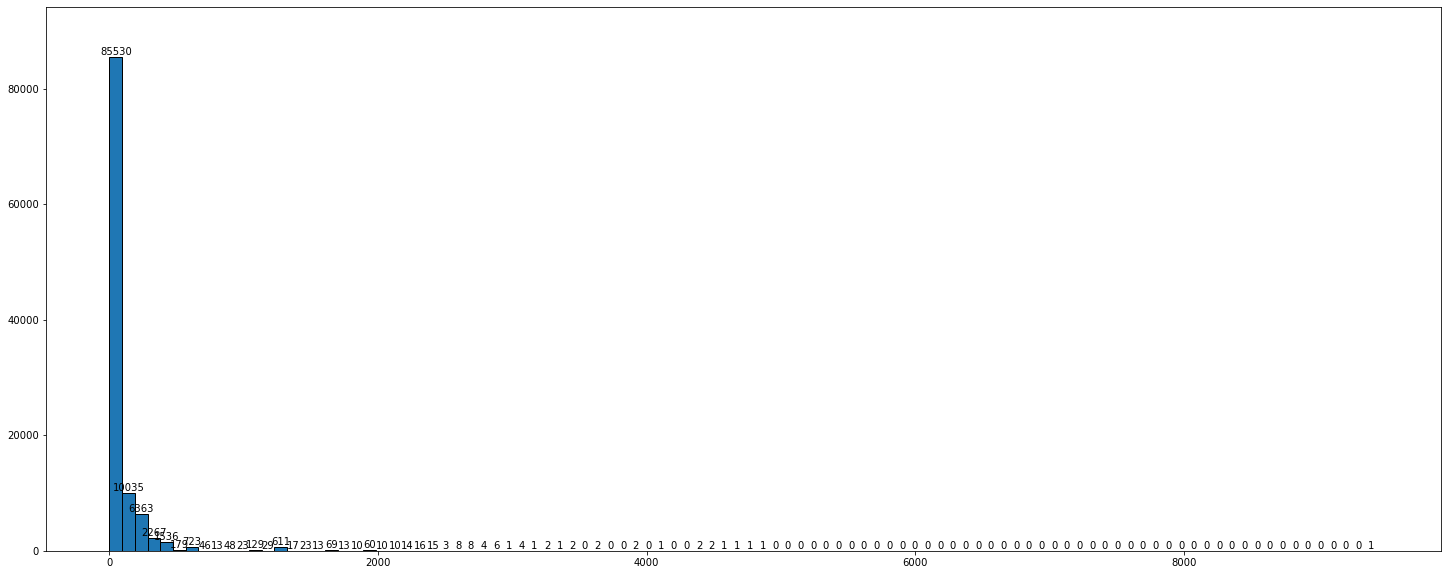

<Figure size 432x288 with 0 Axes>

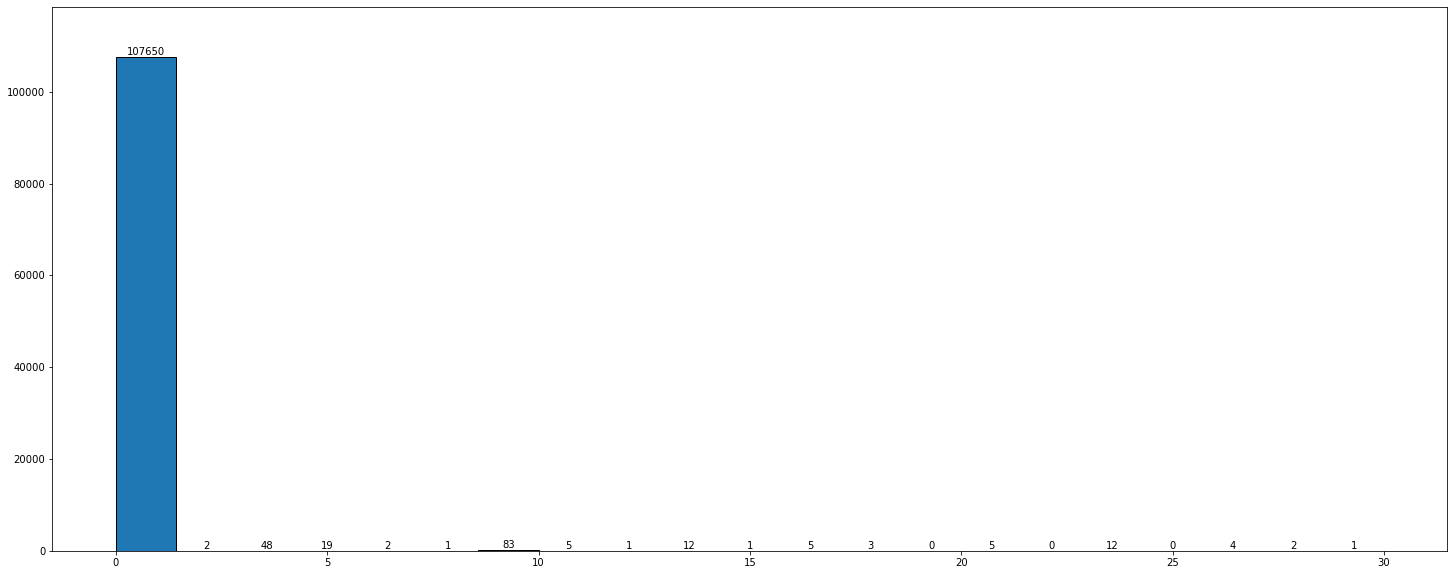

<Figure size 432x288 with 0 Axes>

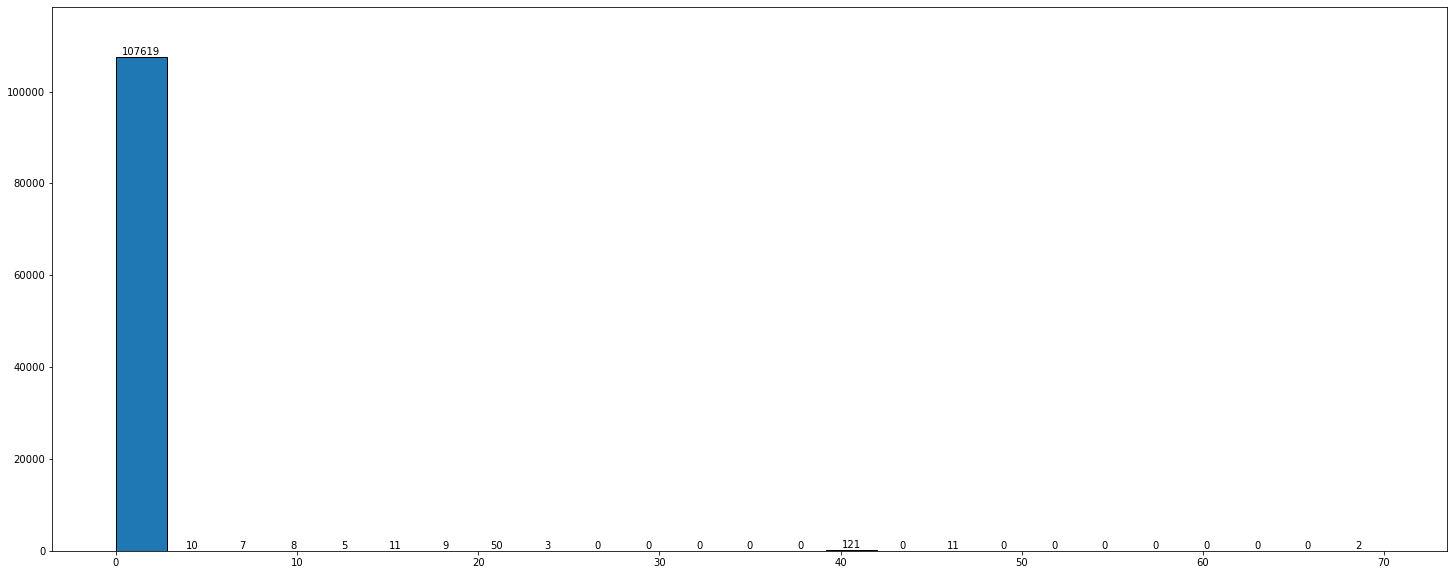

<Figure size 432x288 with 0 Axes>

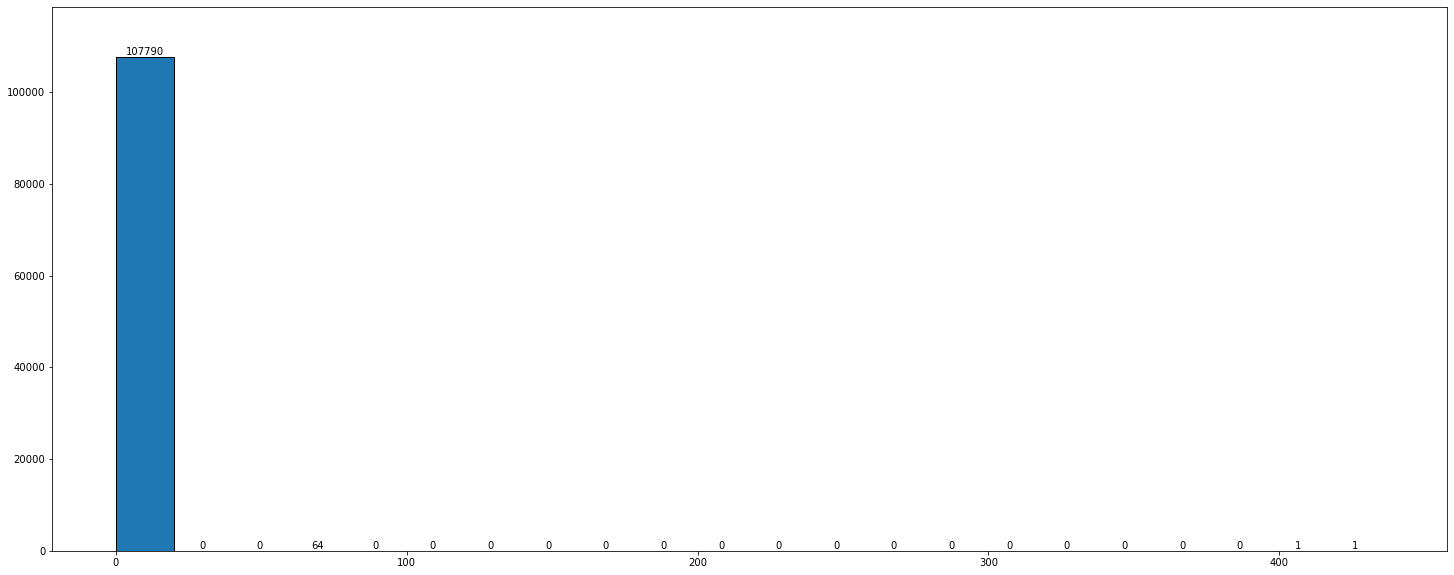

<Figure size 432x288 with 0 Axes>

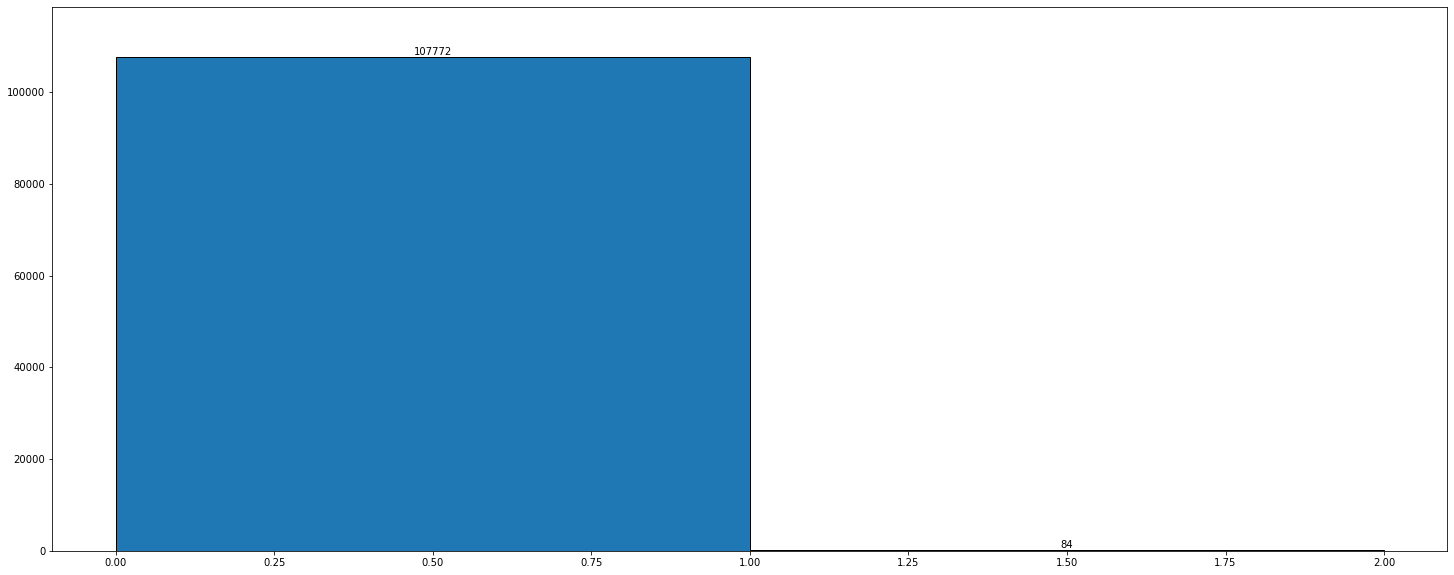

<Figure size 432x288 with 0 Axes>

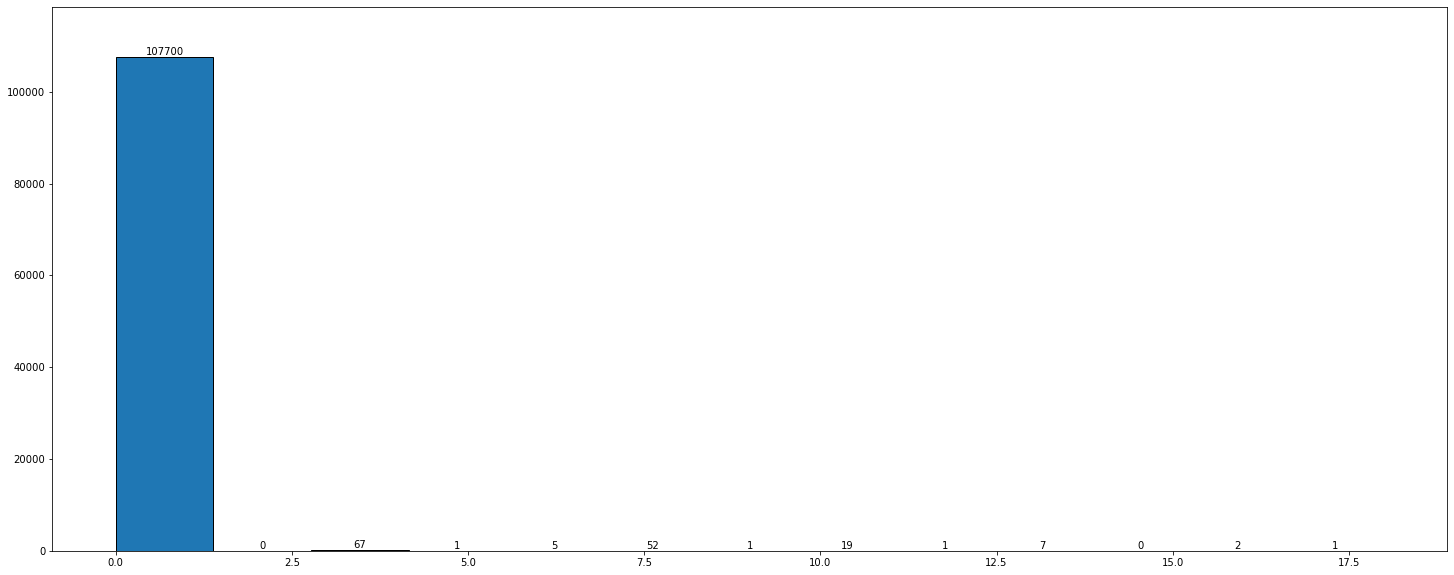

<Figure size 432x288 with 0 Axes>

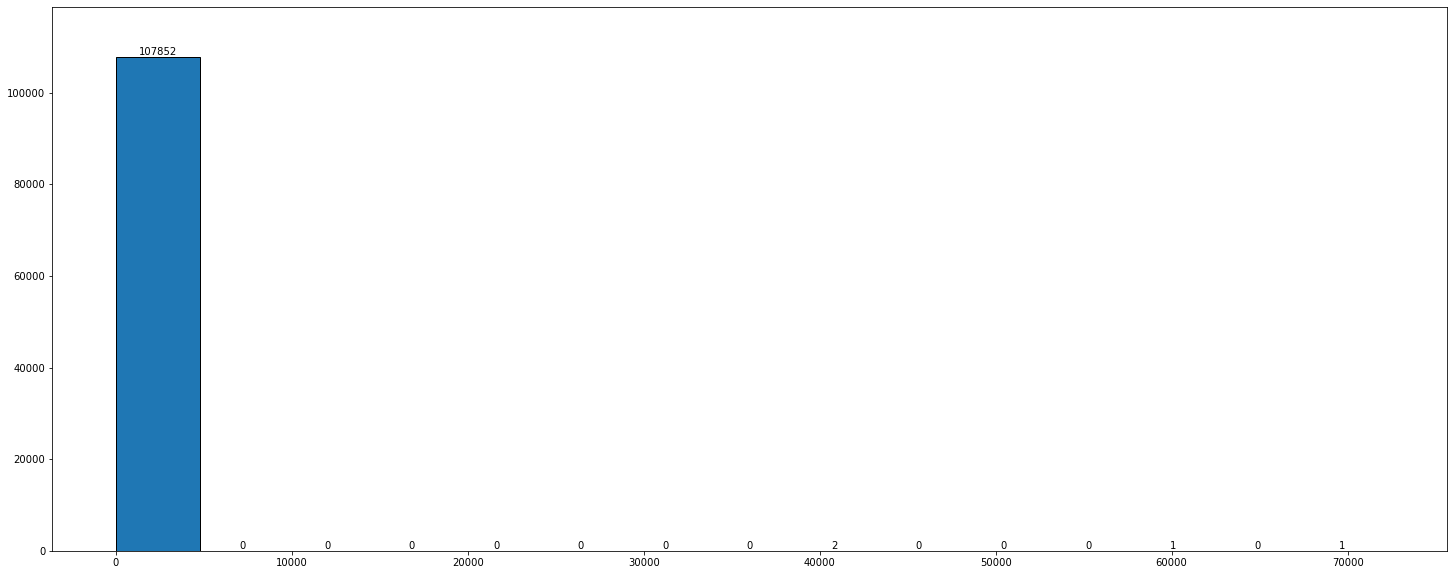

<Figure size 432x288 with 0 Axes>

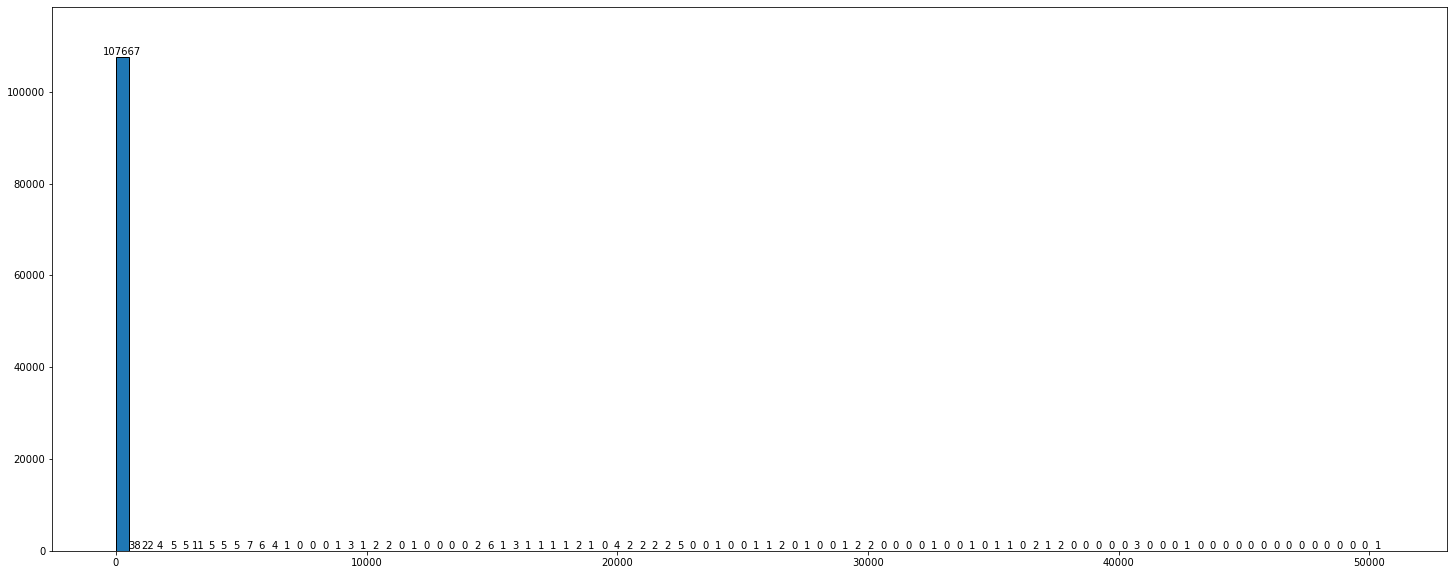

<Figure size 432x288 with 0 Axes>

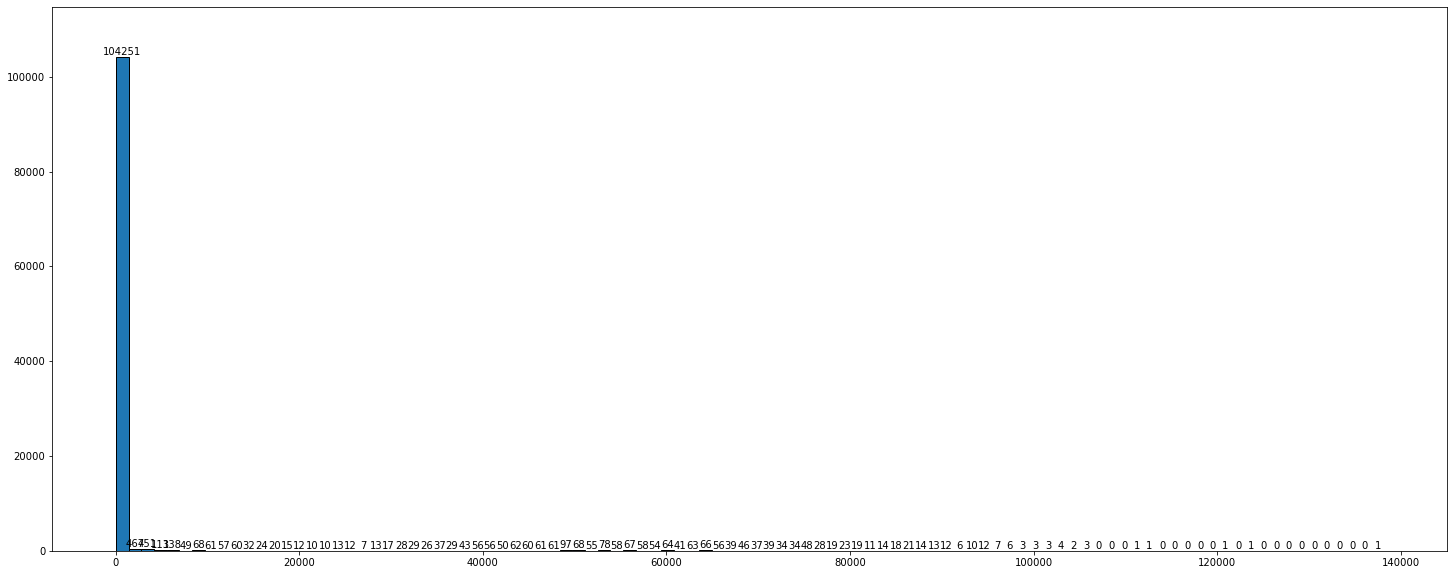

<Figure size 432x288 with 0 Axes>

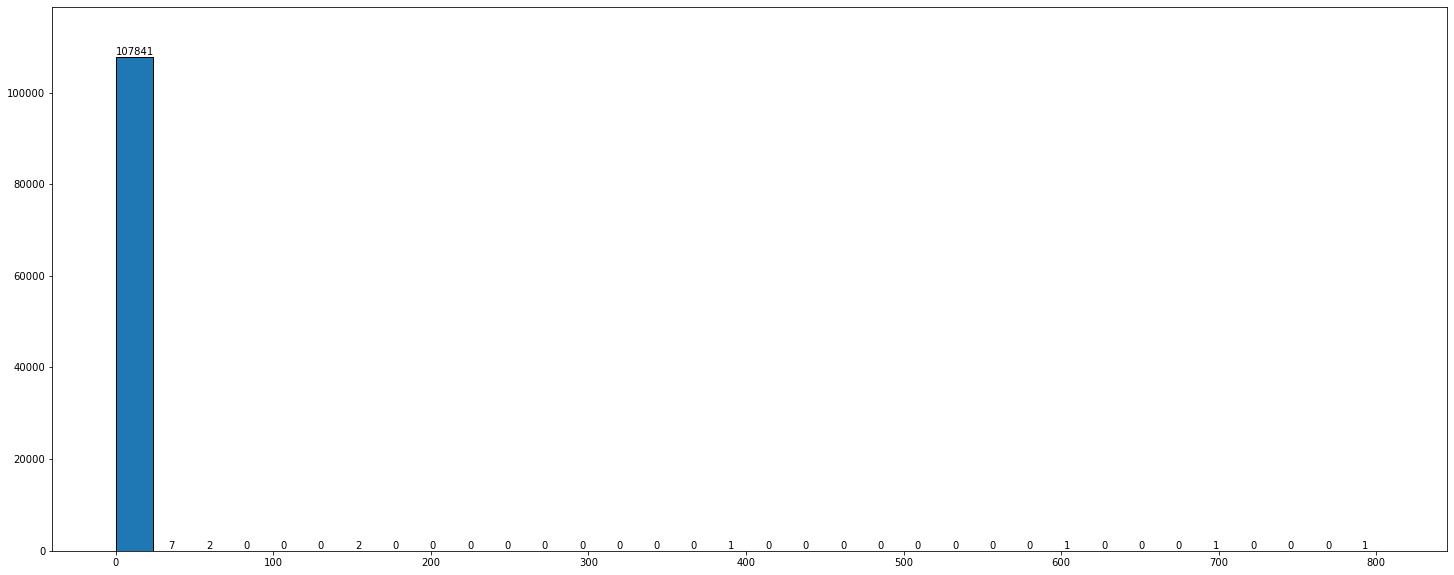

<Figure size 432x288 with 0 Axes>

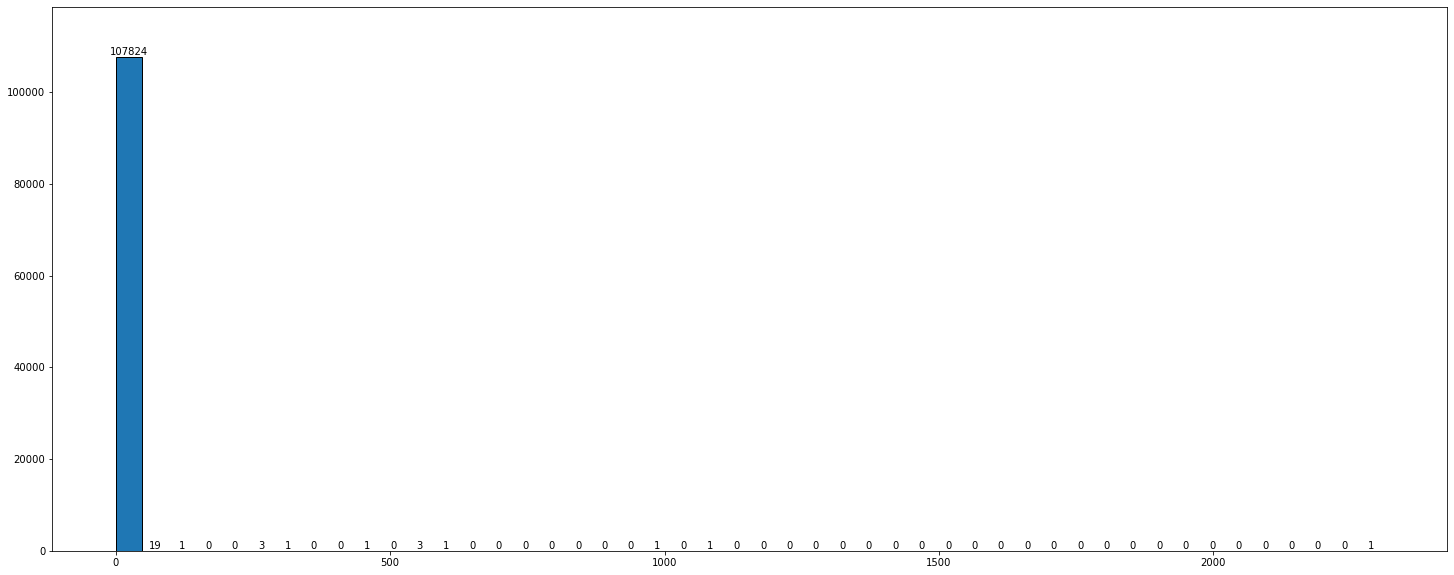

<Figure size 432x288 with 0 Axes>

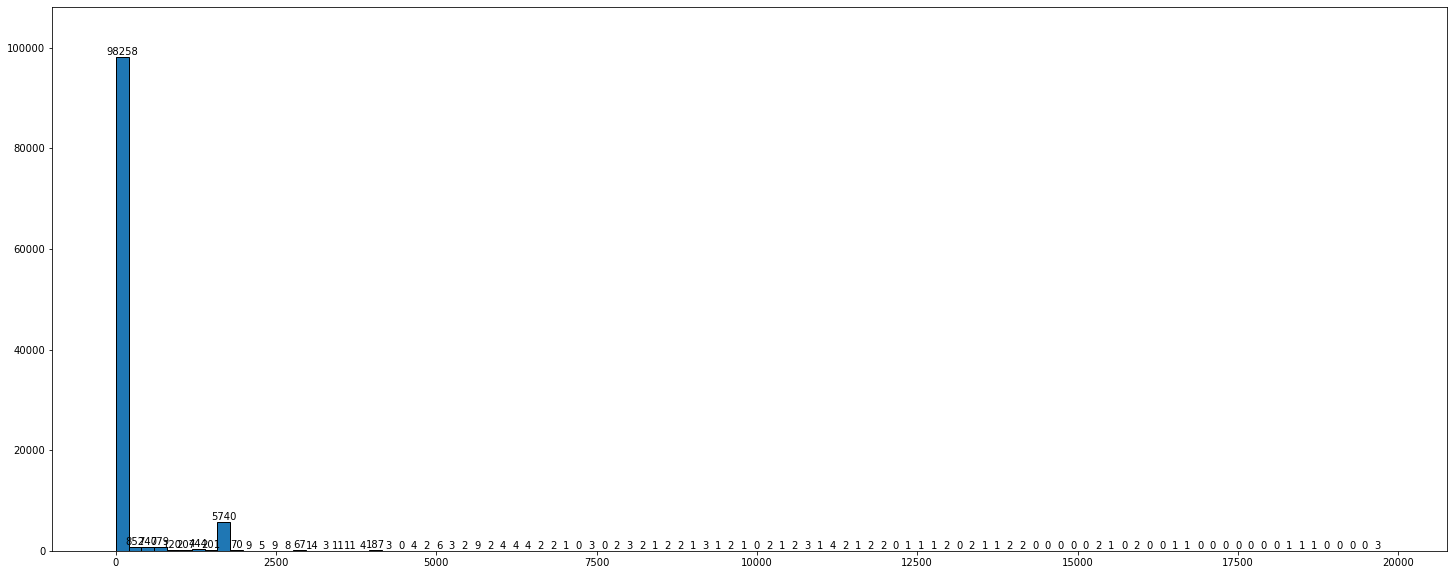

<Figure size 432x288 with 0 Axes>

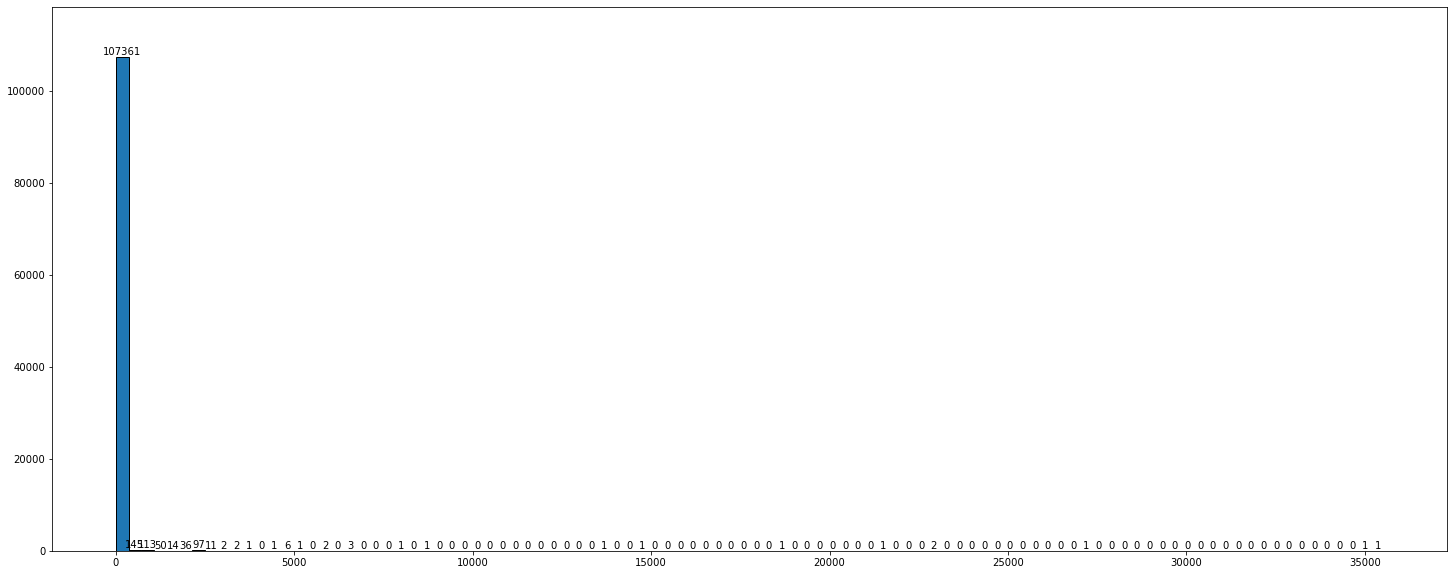

<Figure size 432x288 with 0 Axes>

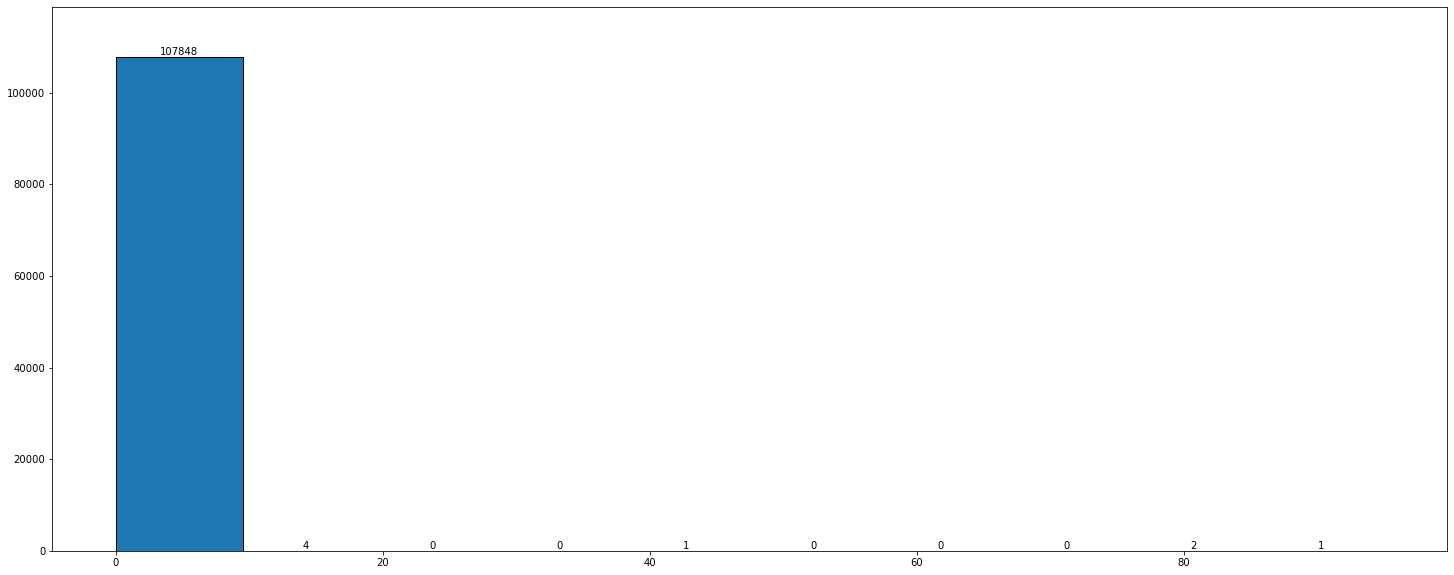

<Figure size 432x288 with 0 Axes>

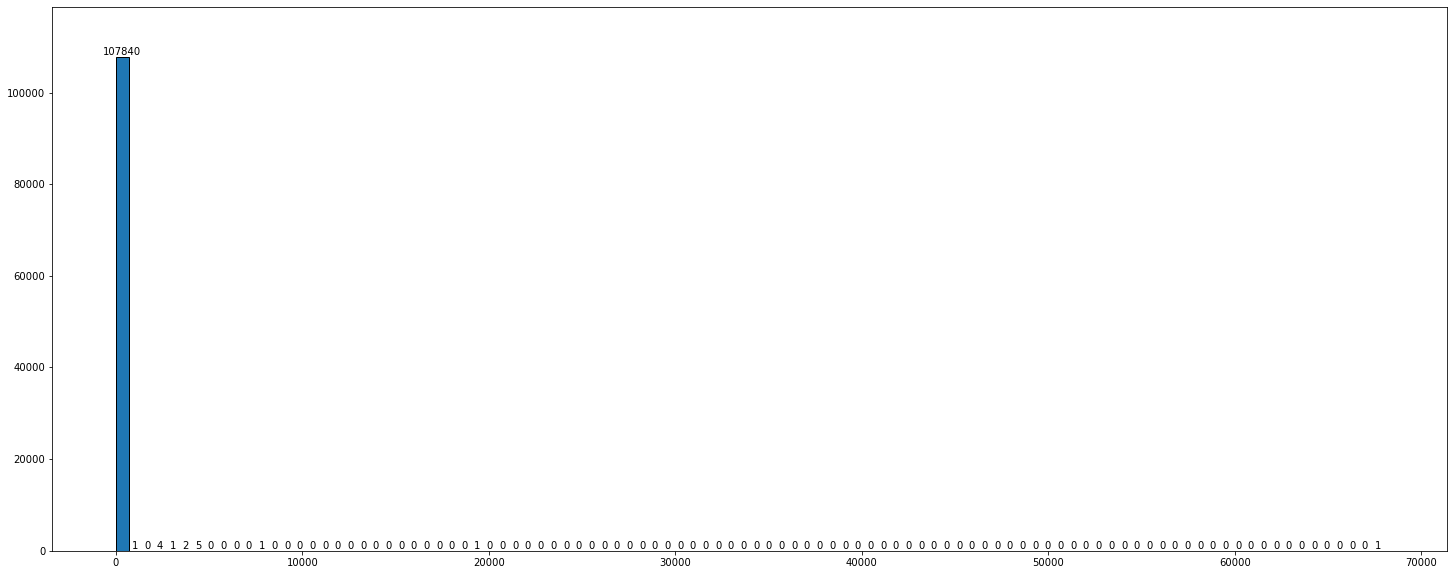

<Figure size 432x288 with 0 Axes>

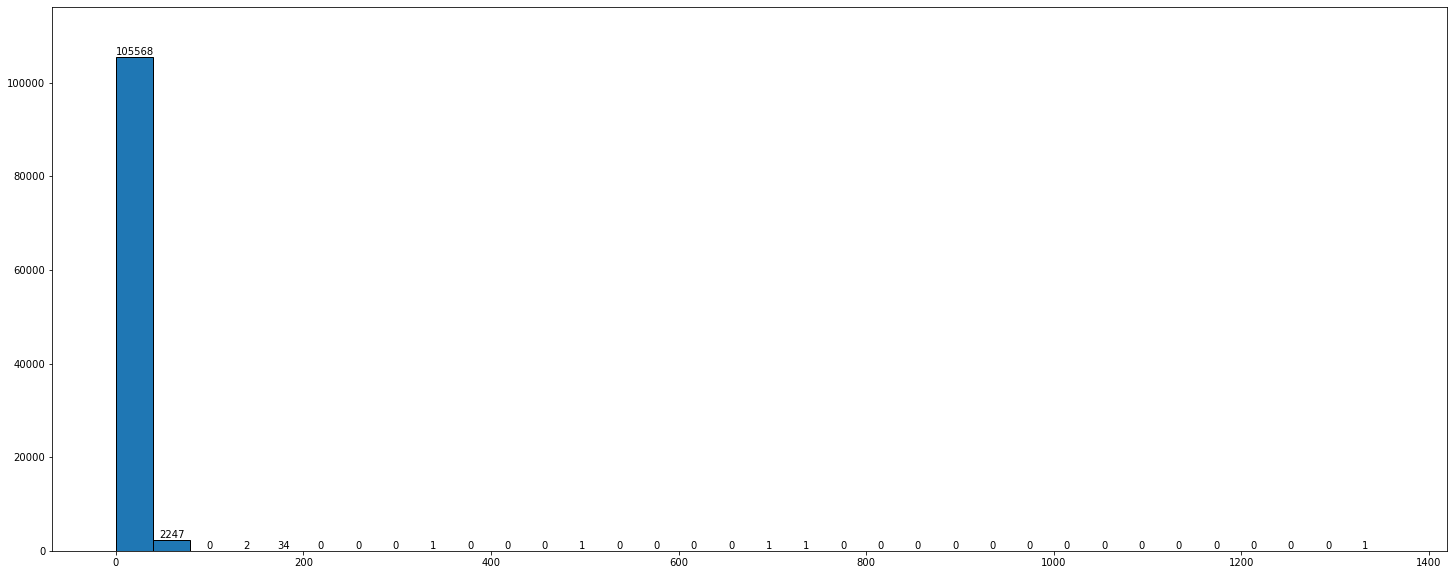

<Figure size 432x288 with 0 Axes>

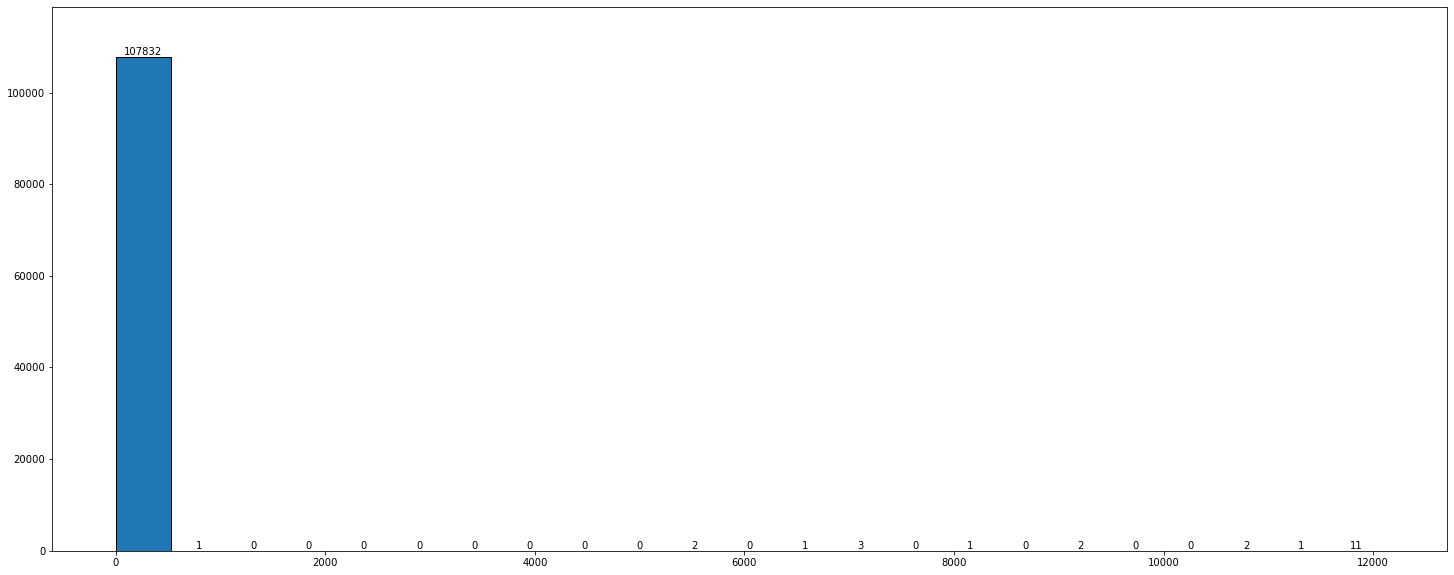

<Figure size 432x288 with 0 Axes>

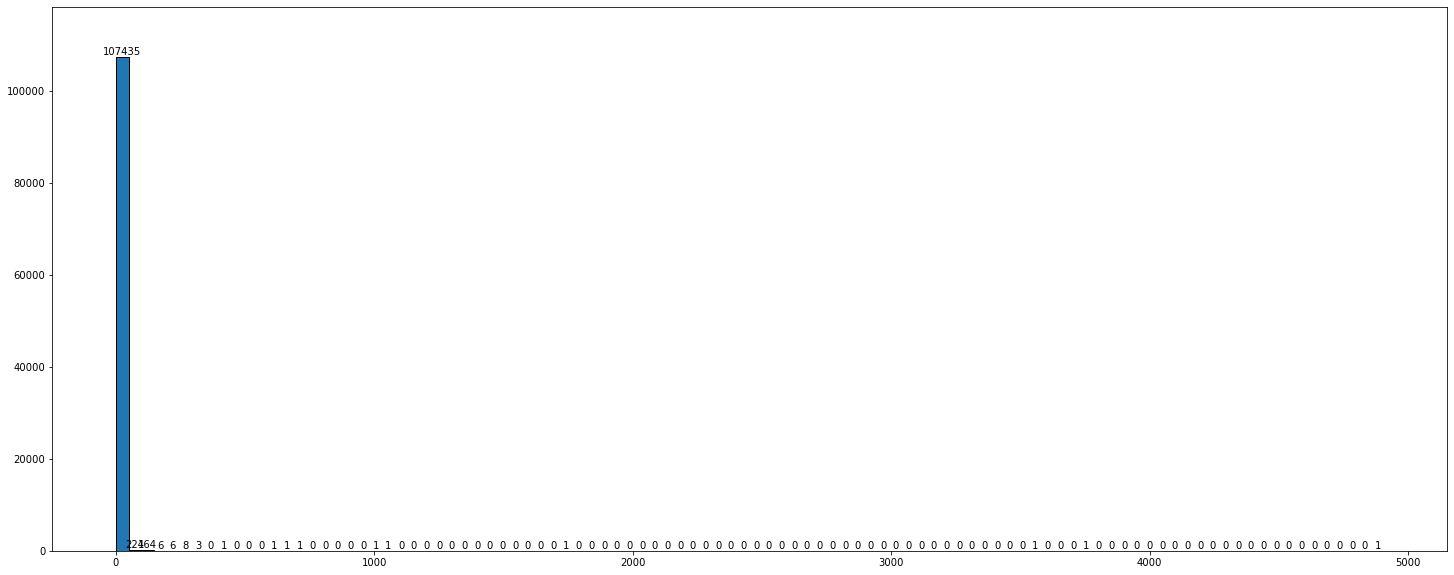

<Figure size 432x288 with 0 Axes>

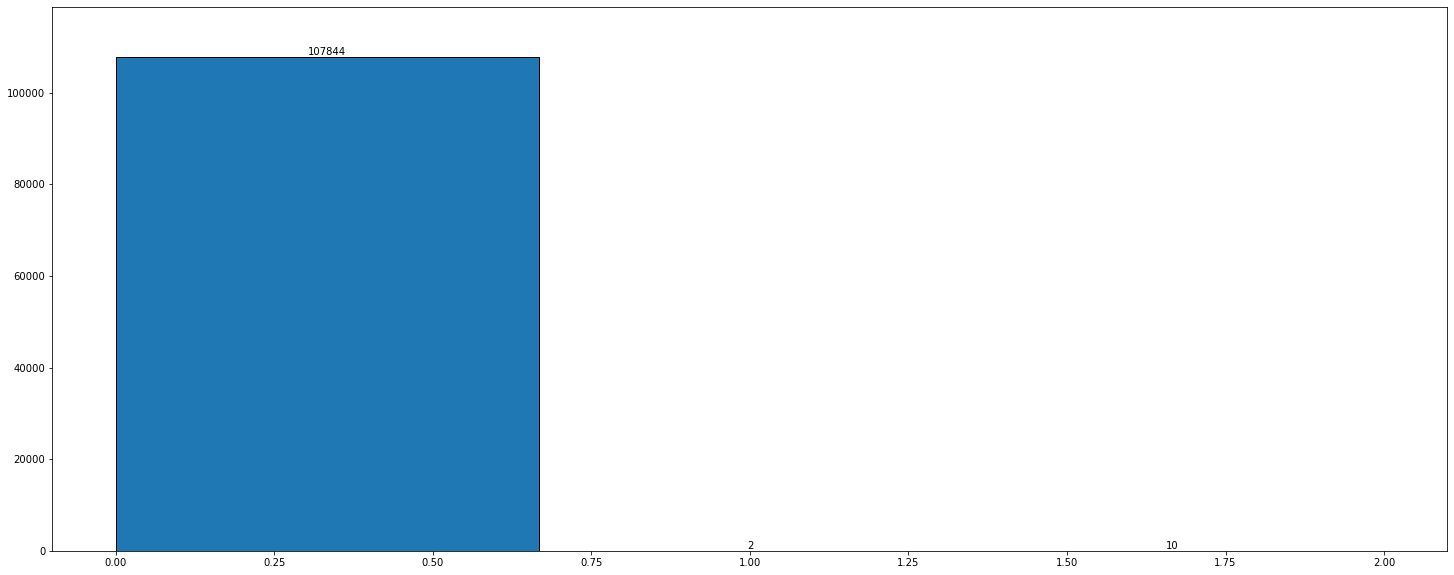

<Figure size 432x288 with 0 Axes>

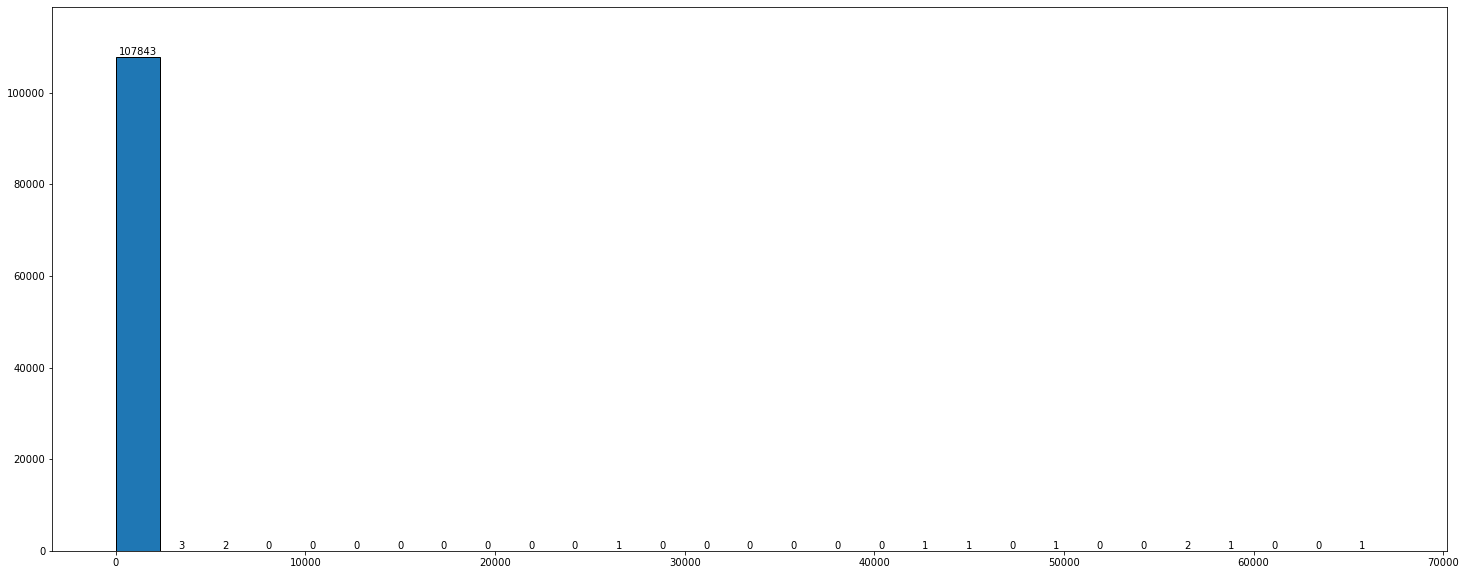

<Figure size 432x288 with 0 Axes>

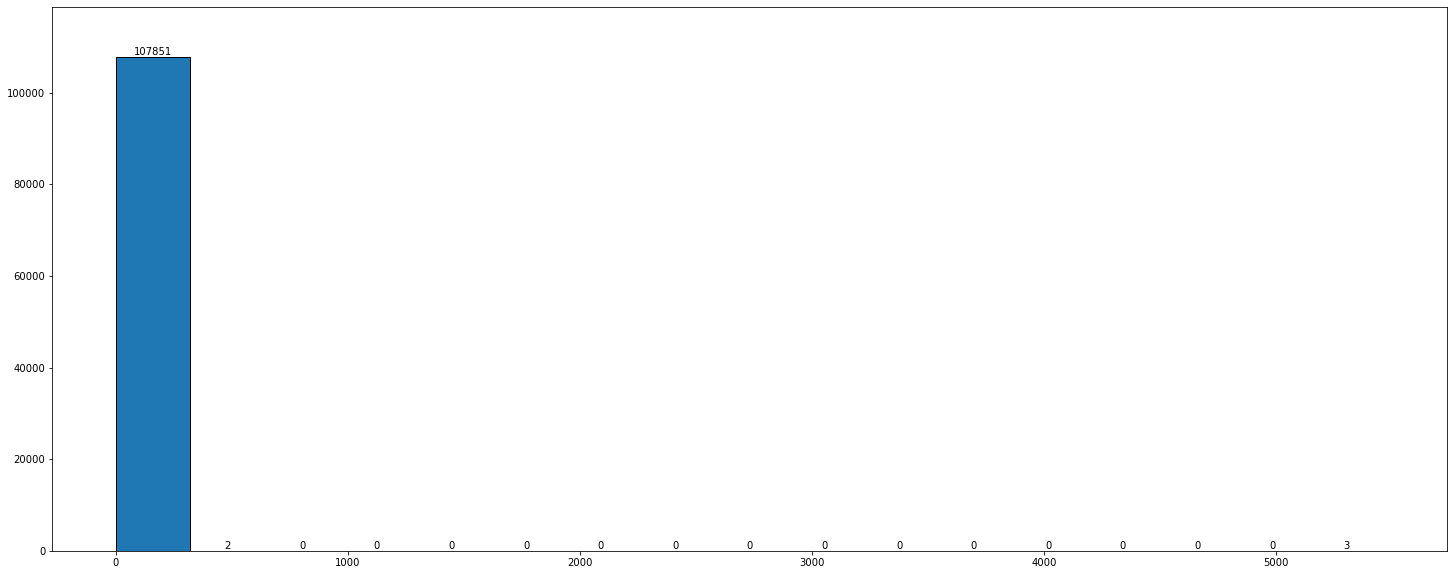

<Figure size 432x288 with 0 Axes>

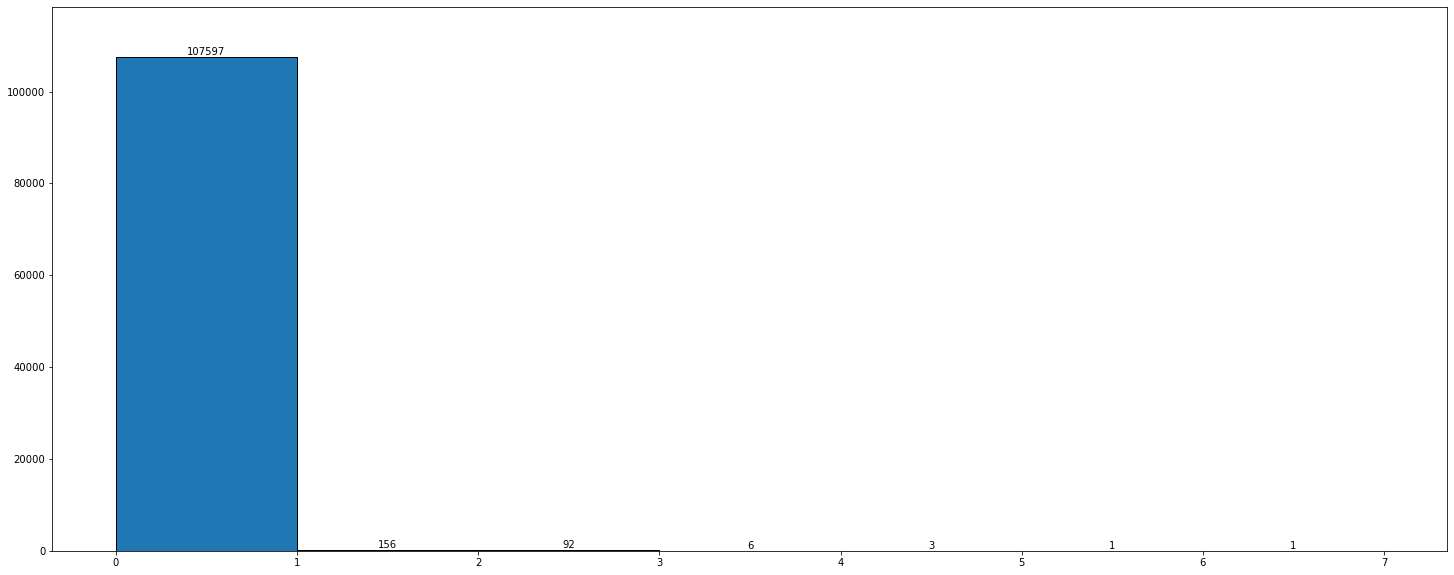

<Figure size 432x288 with 0 Axes>

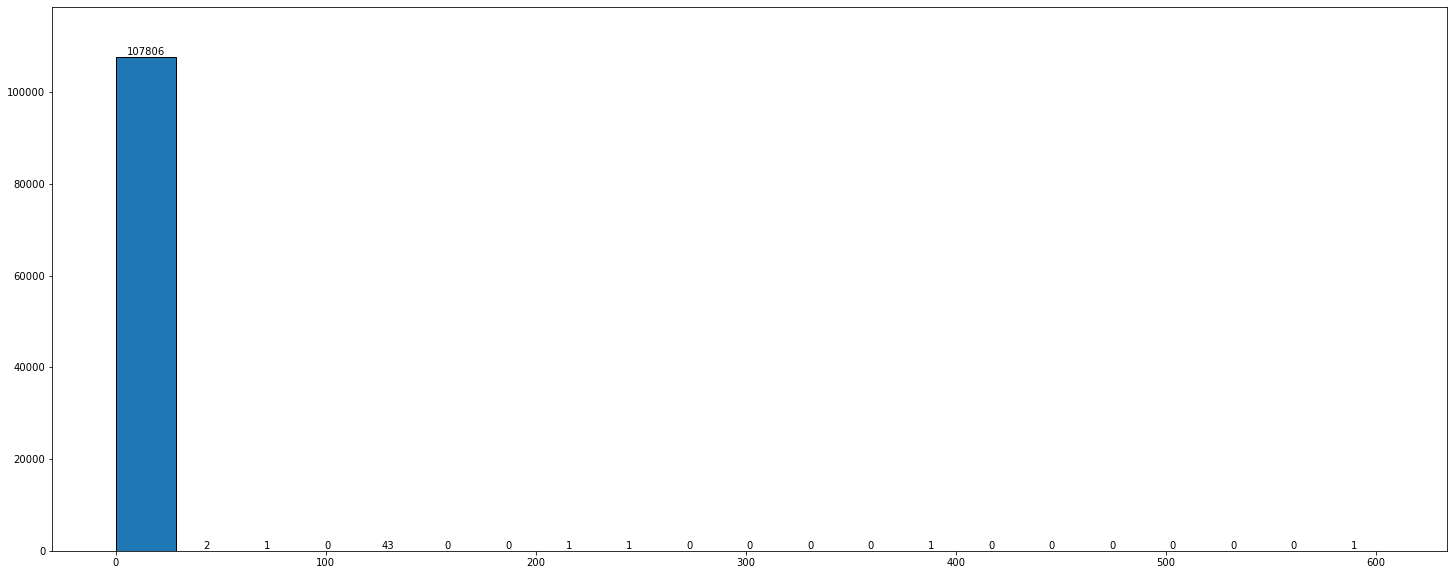

<Figure size 432x288 with 0 Axes>

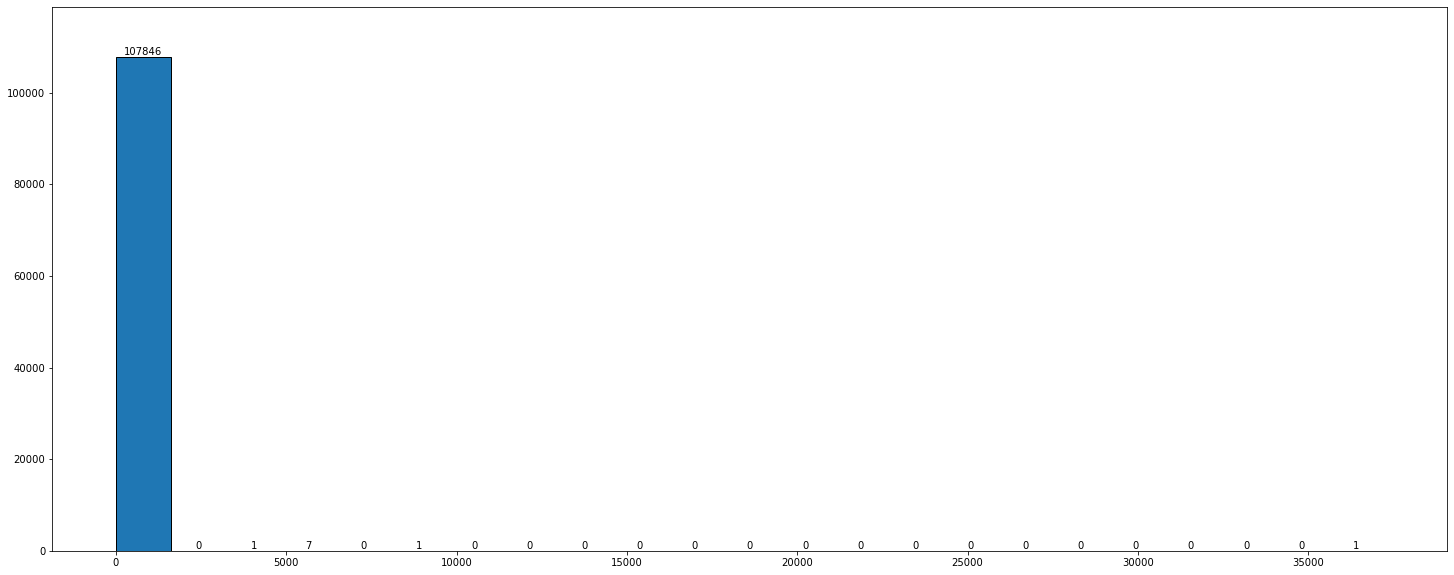

<Figure size 432x288 with 0 Axes>

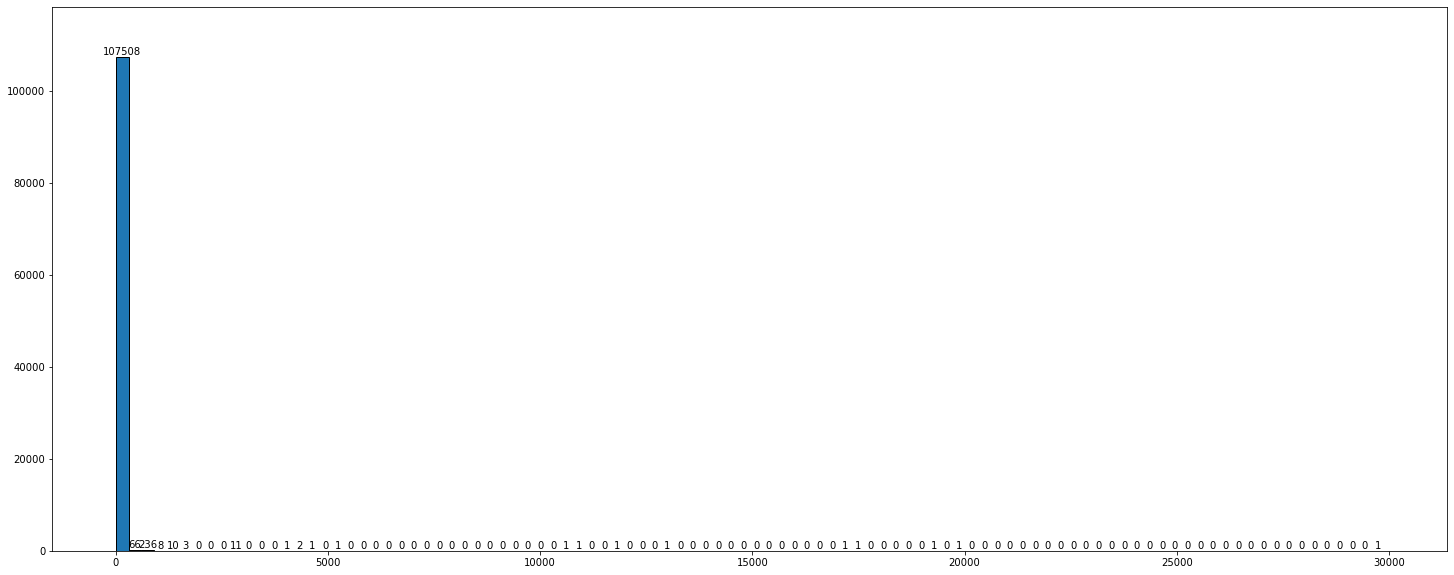

<Figure size 432x288 with 0 Axes>

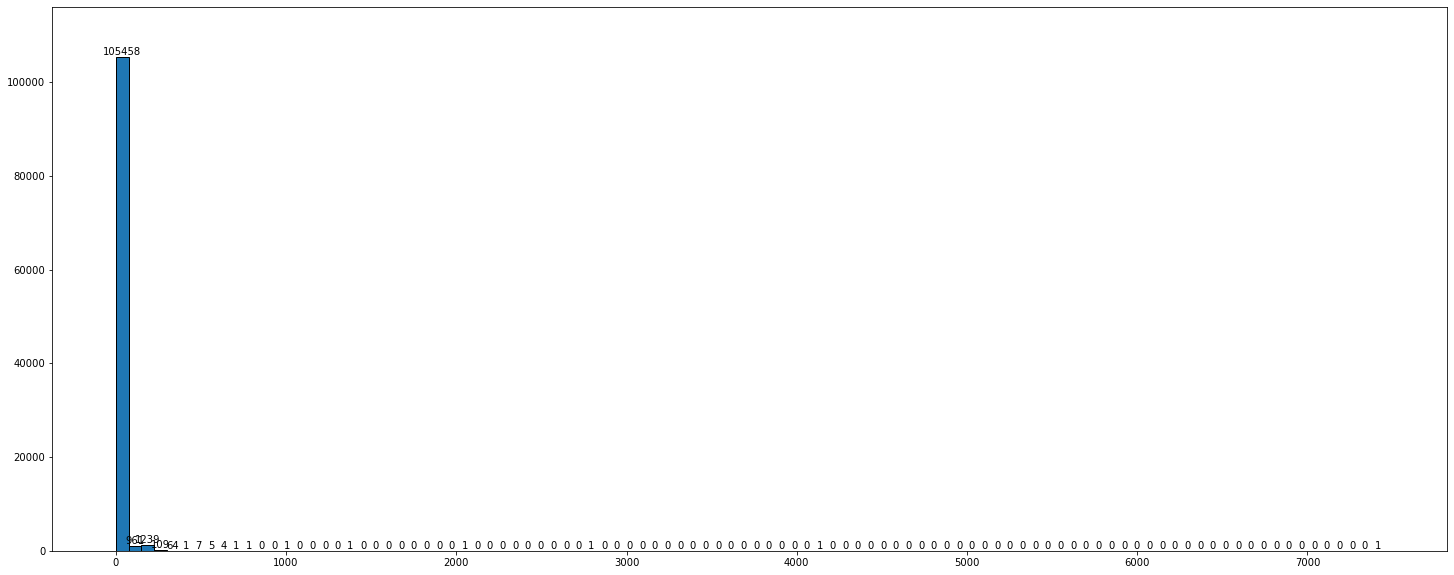

<Figure size 432x288 with 0 Axes>

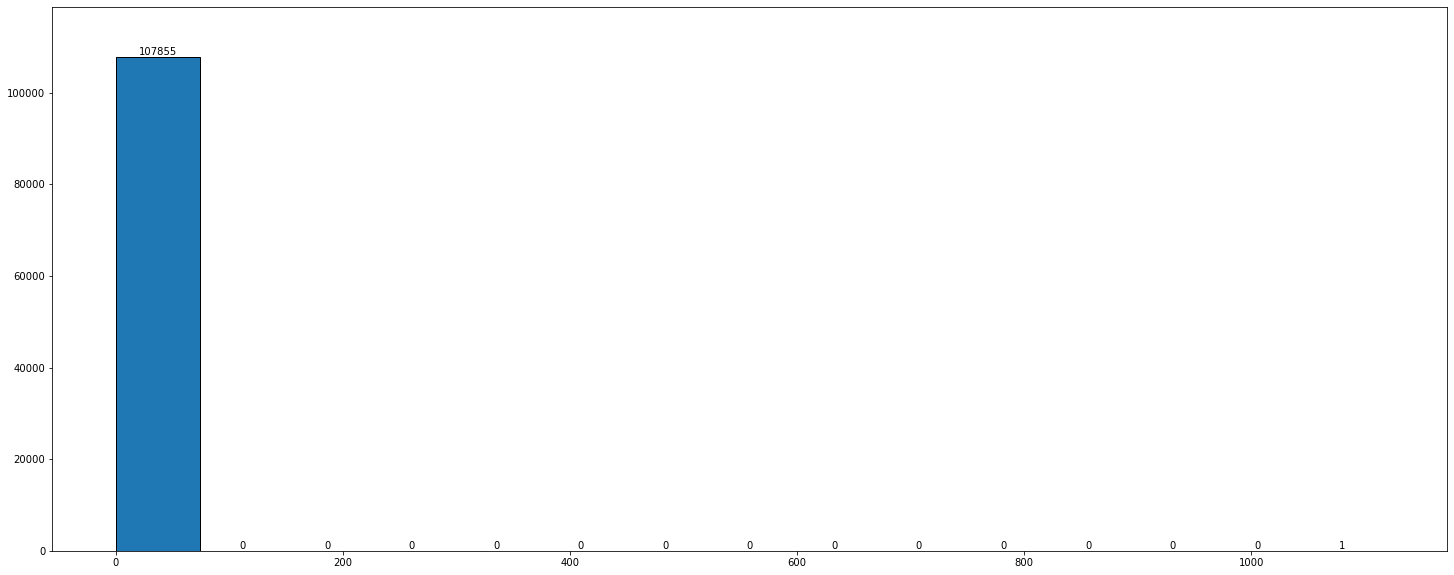

<Figure size 432x288 with 0 Axes>

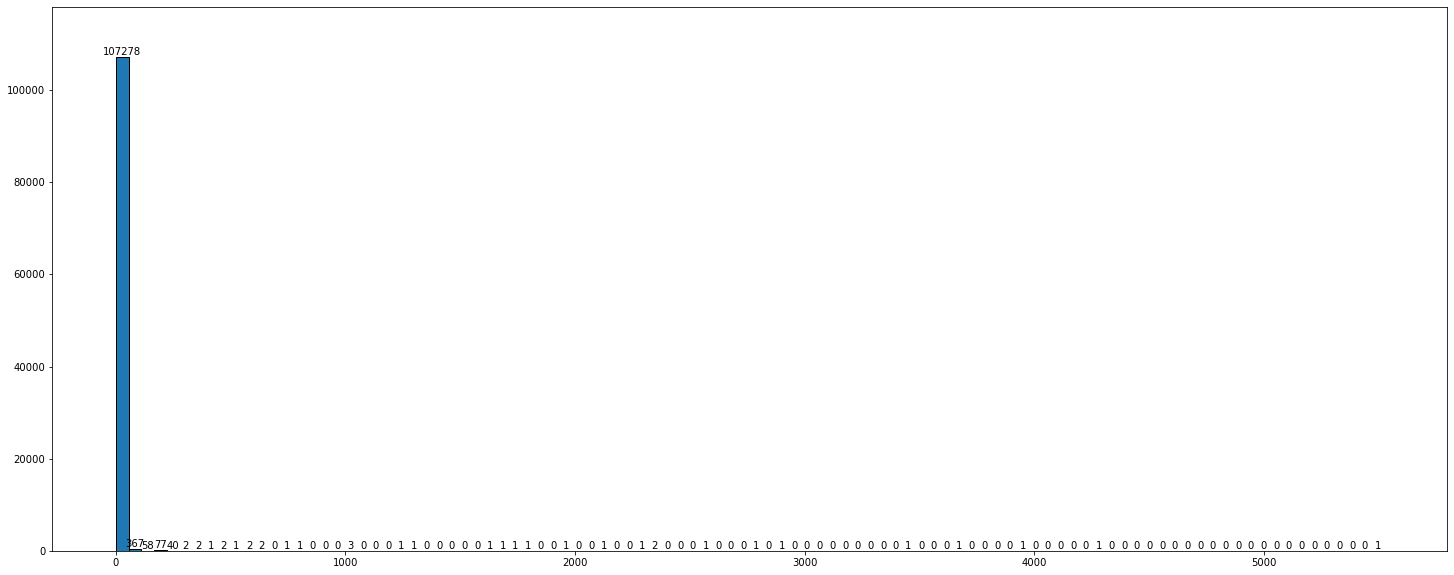

<Figure size 432x288 with 0 Axes>

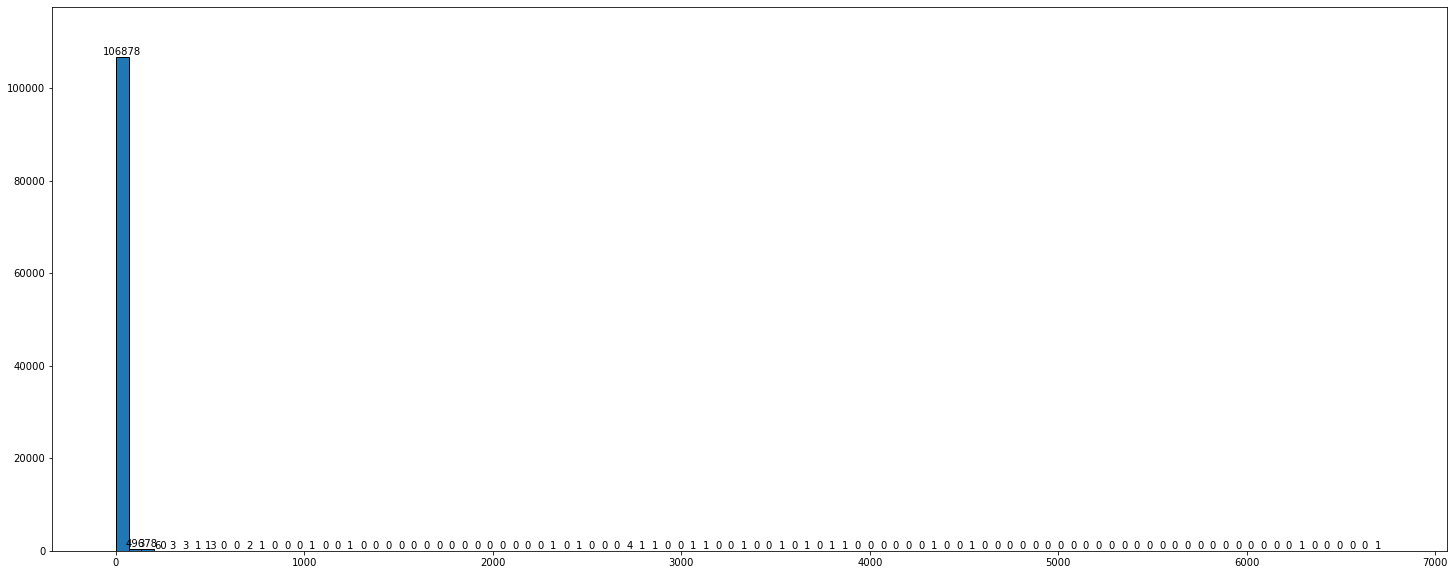

<Figure size 432x288 with 0 Axes>

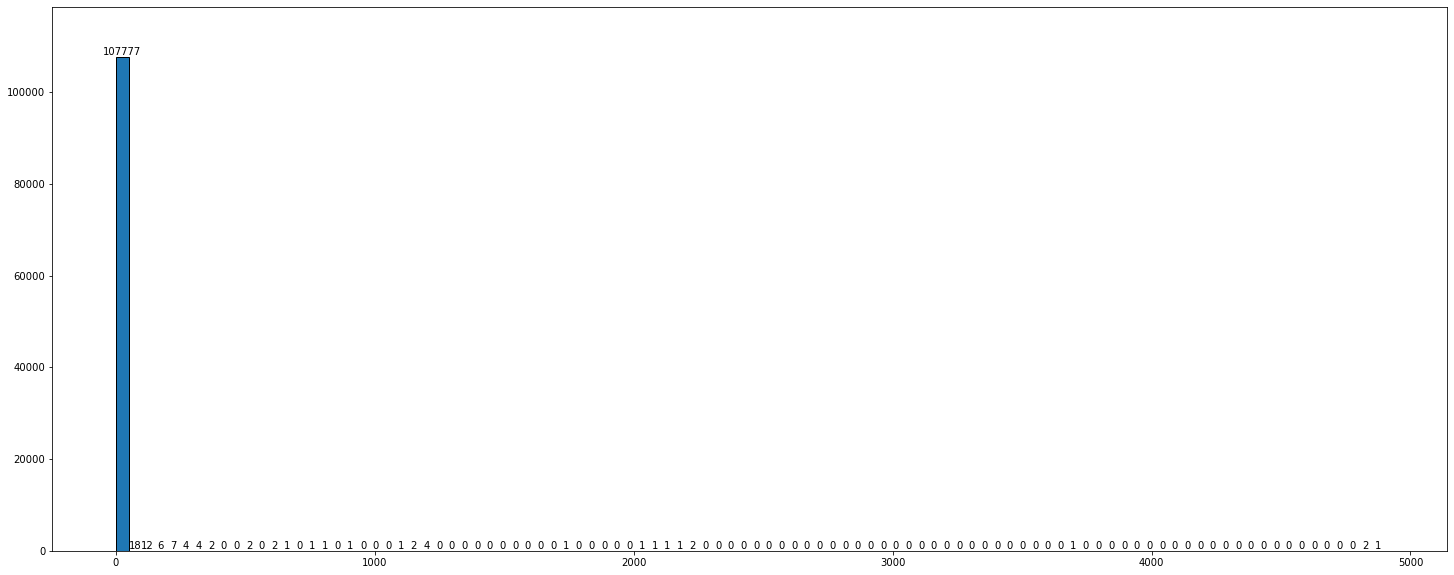

<Figure size 432x288 with 0 Axes>

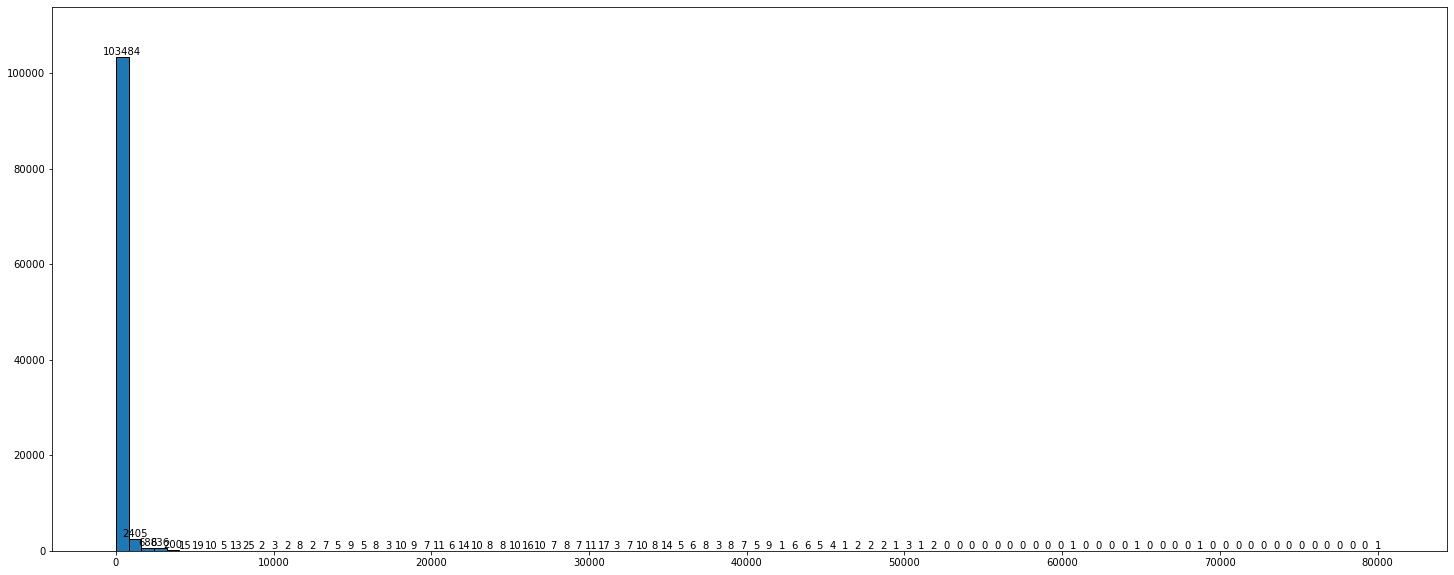

<Figure size 432x288 with 0 Axes>

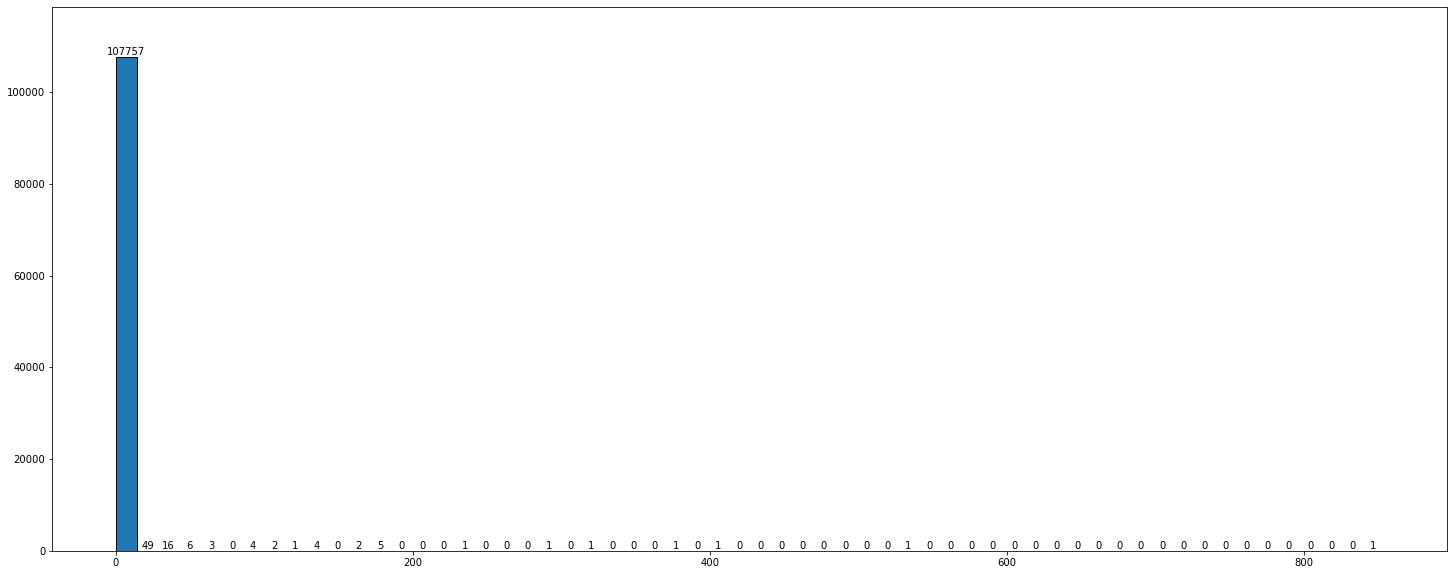

<Figure size 432x288 with 0 Axes>

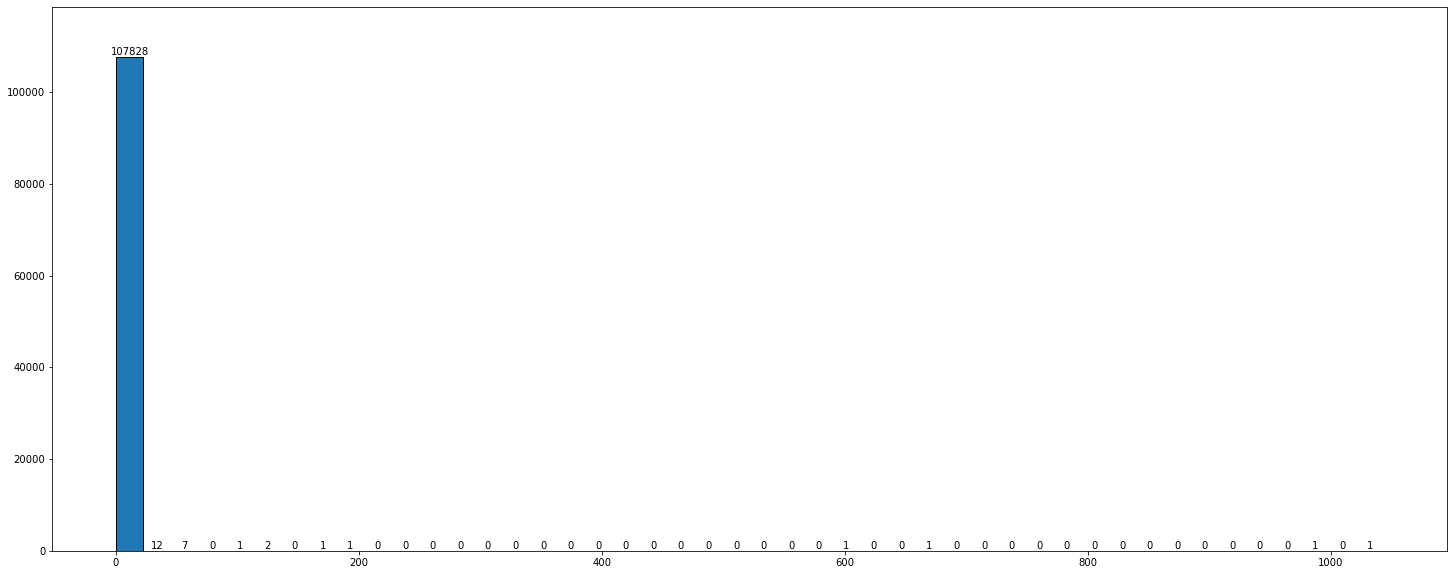

<Figure size 432x288 with 0 Axes>

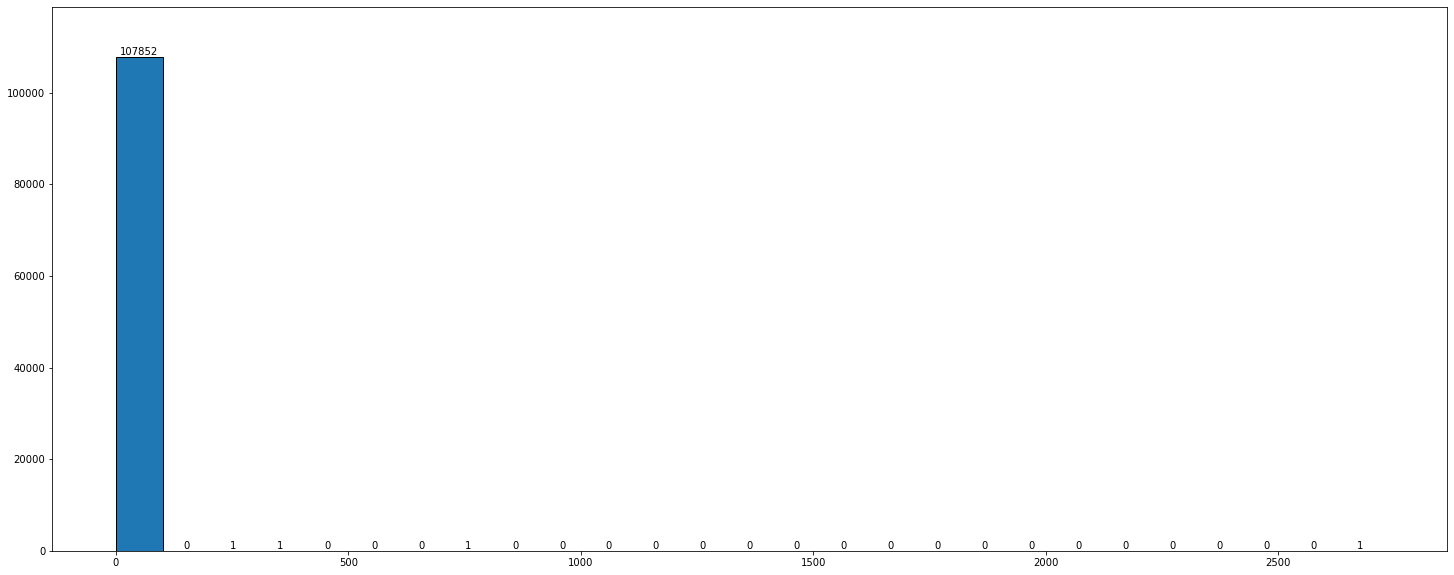

<Figure size 432x288 with 0 Axes>

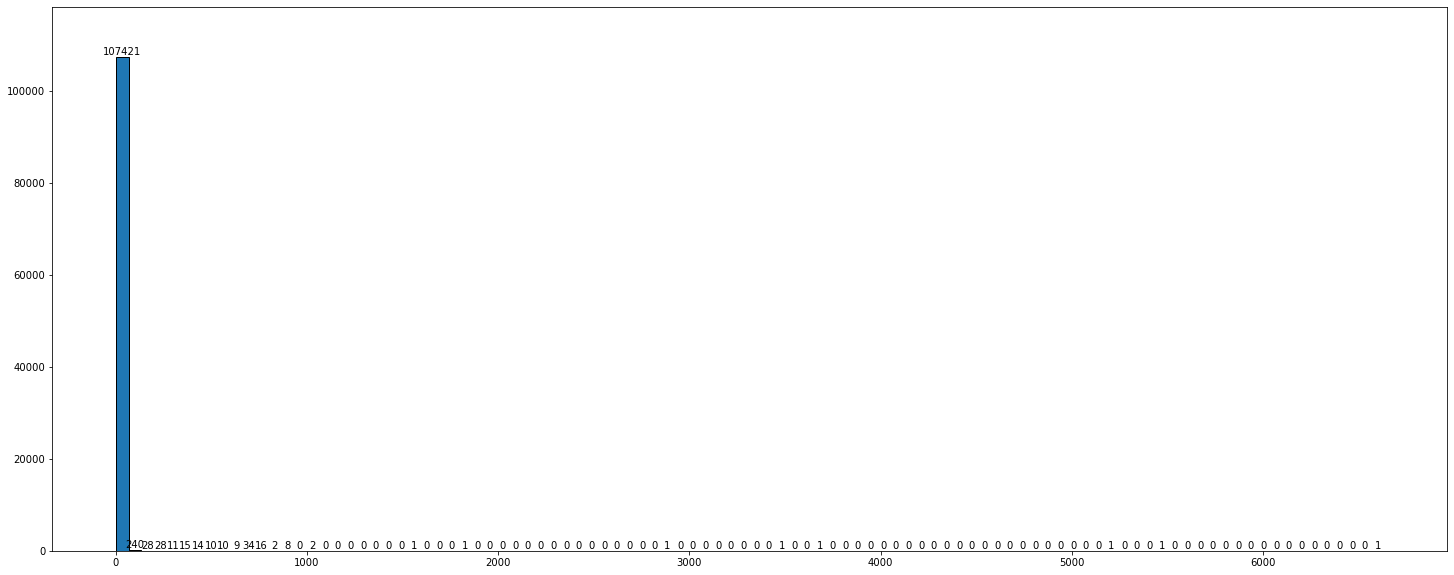

<Figure size 432x288 with 0 Axes>

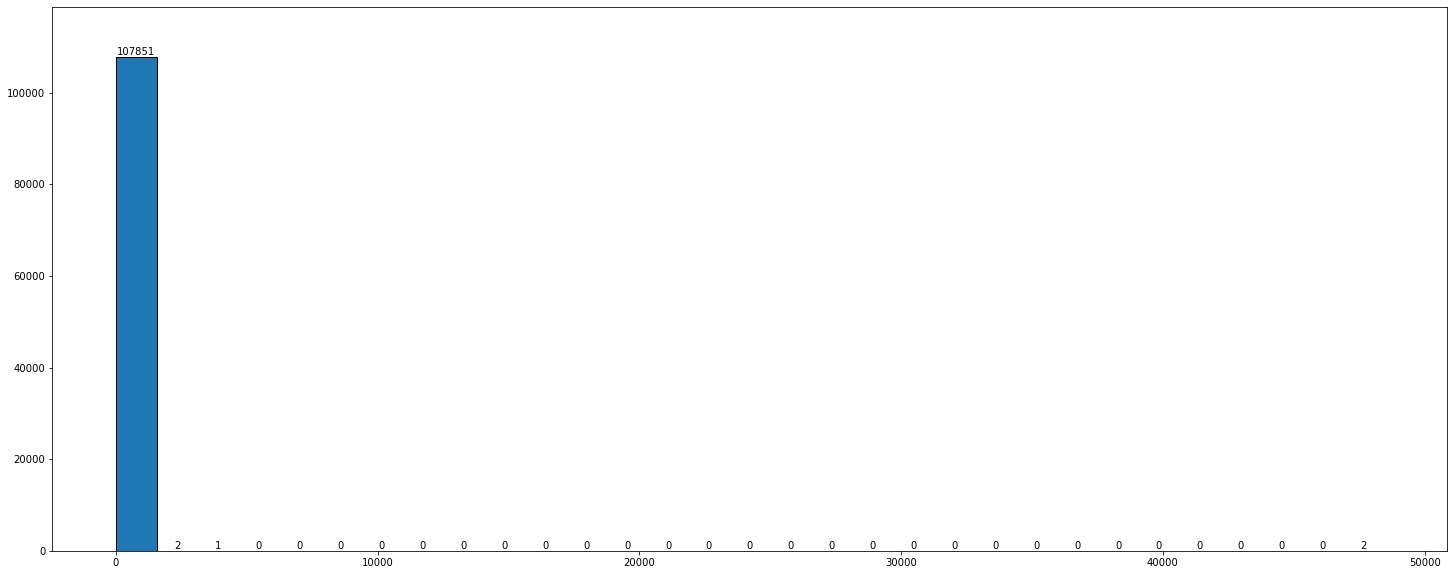

<Figure size 432x288 with 0 Axes>

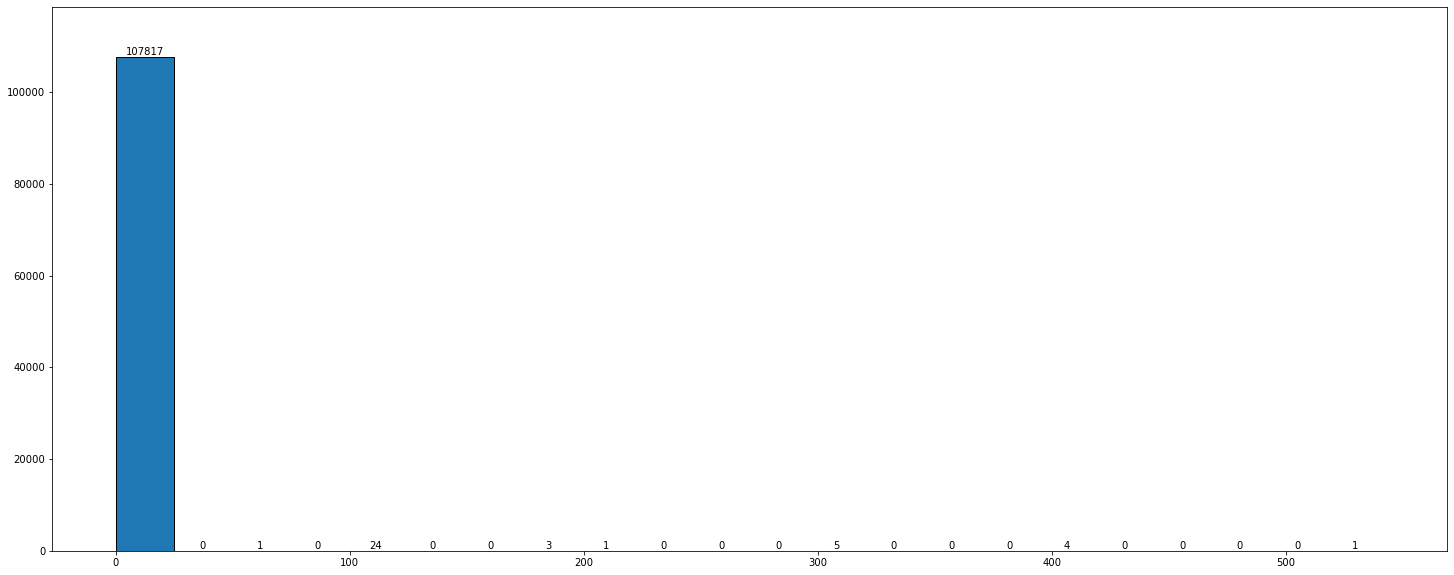

<Figure size 432x288 with 0 Axes>

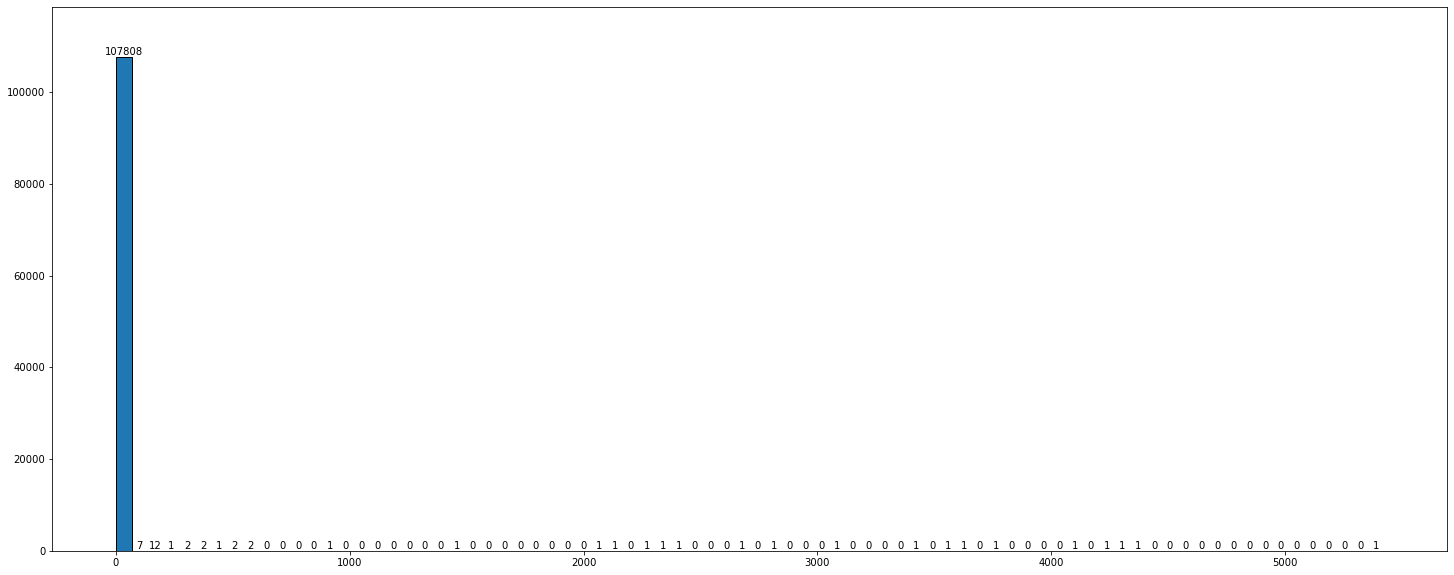

<Figure size 432x288 with 0 Axes>

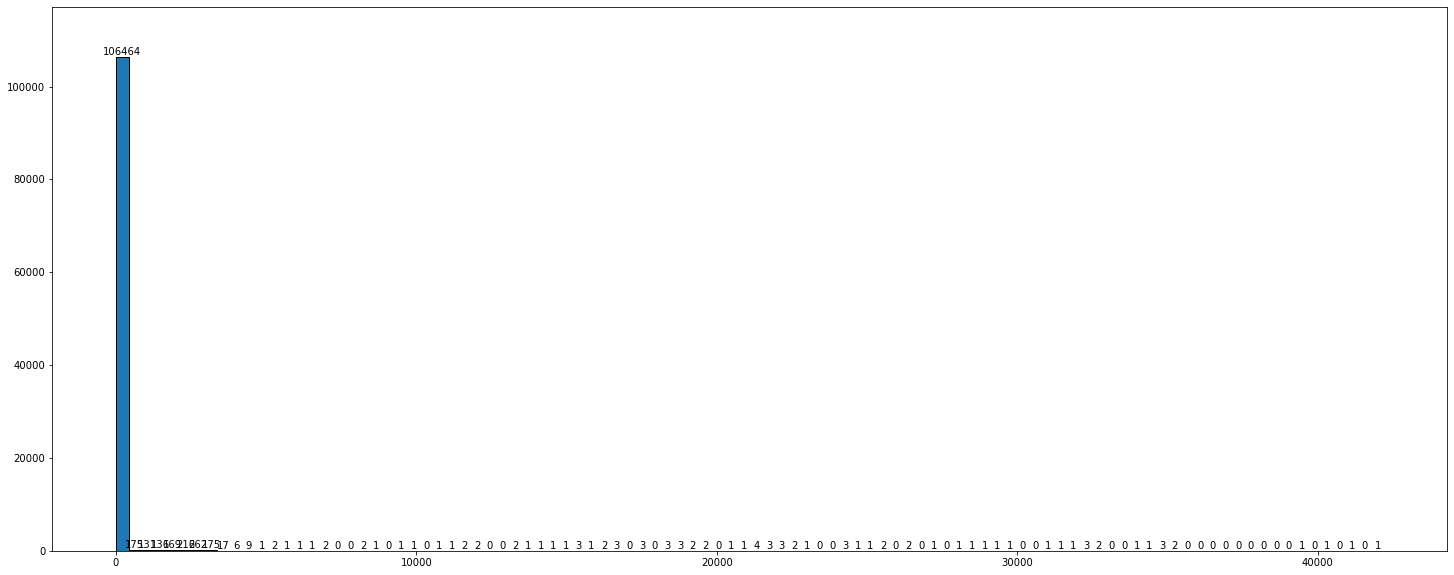

<Figure size 432x288 with 0 Axes>

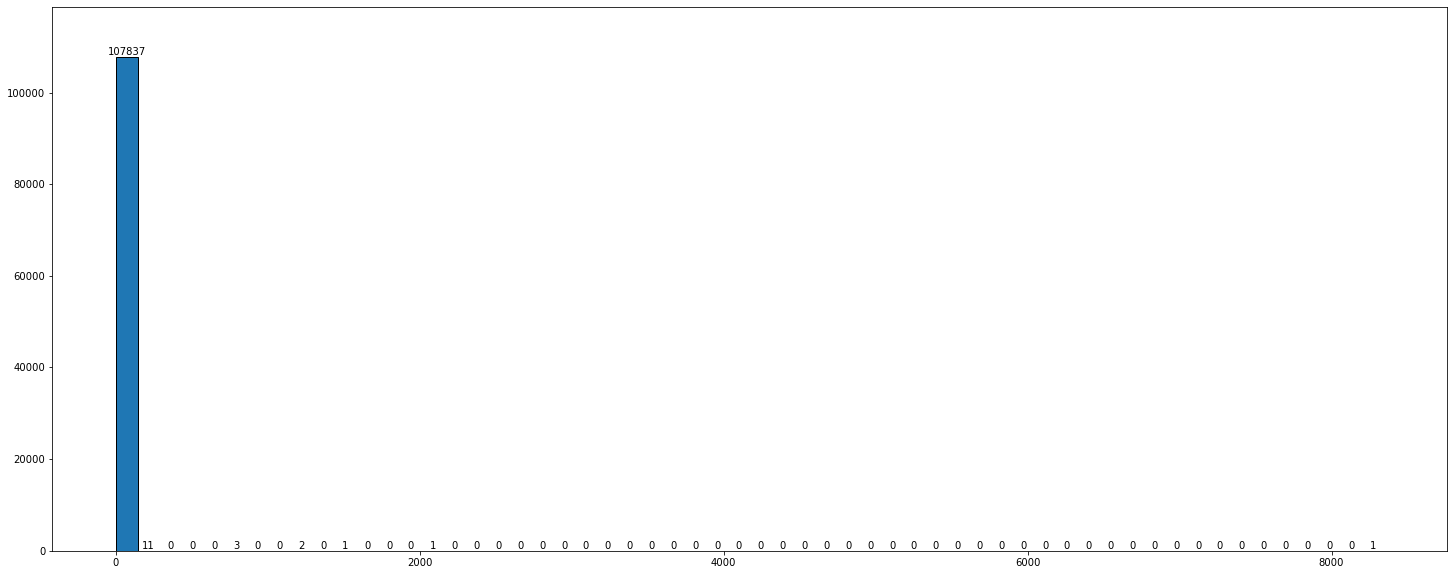

<Figure size 432x288 with 0 Axes>

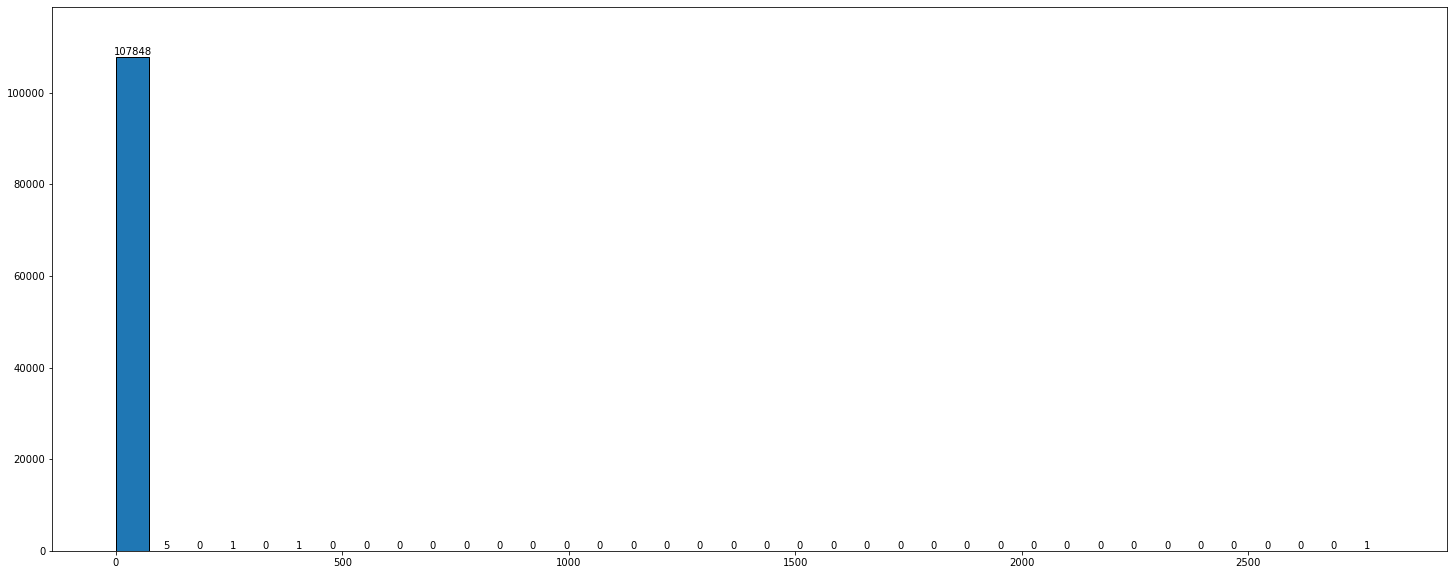

<Figure size 432x288 with 0 Axes>

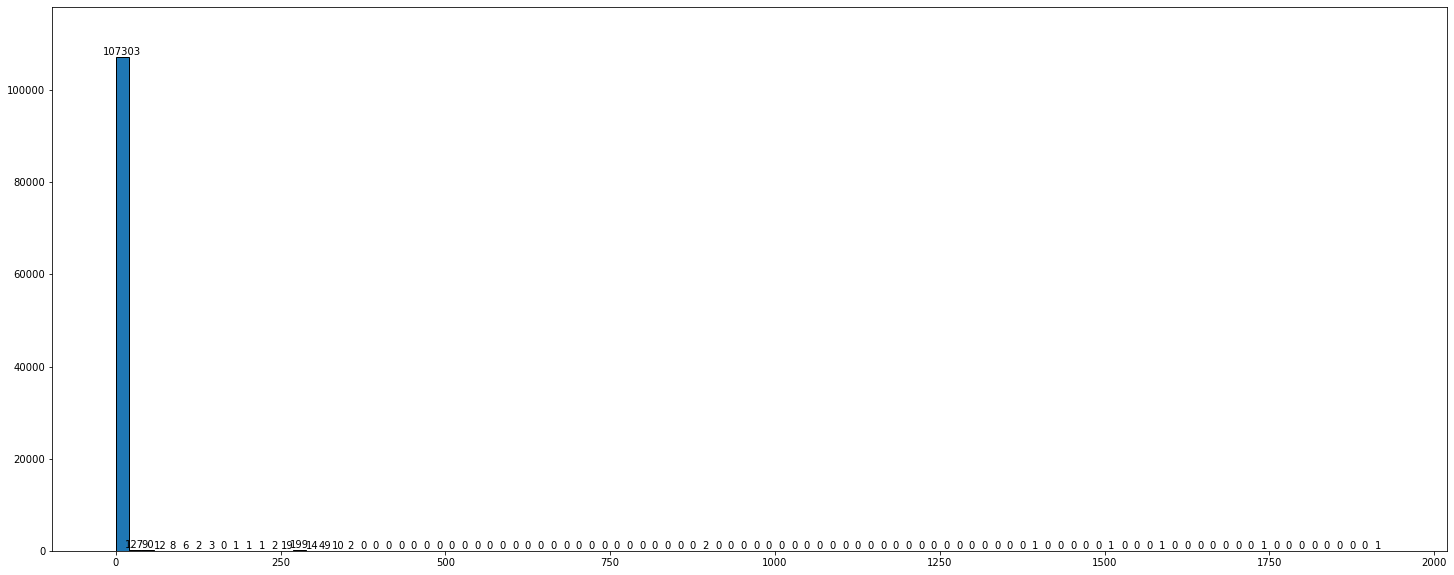

<Figure size 432x288 with 0 Axes>

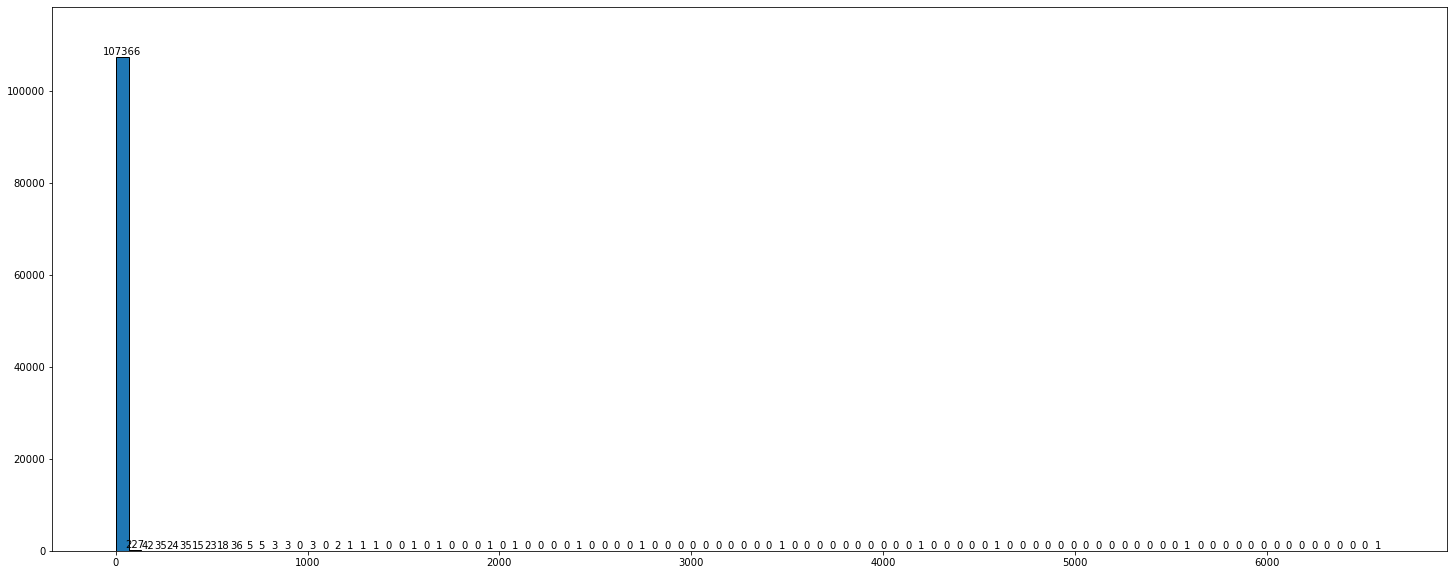

<Figure size 432x288 with 0 Axes>

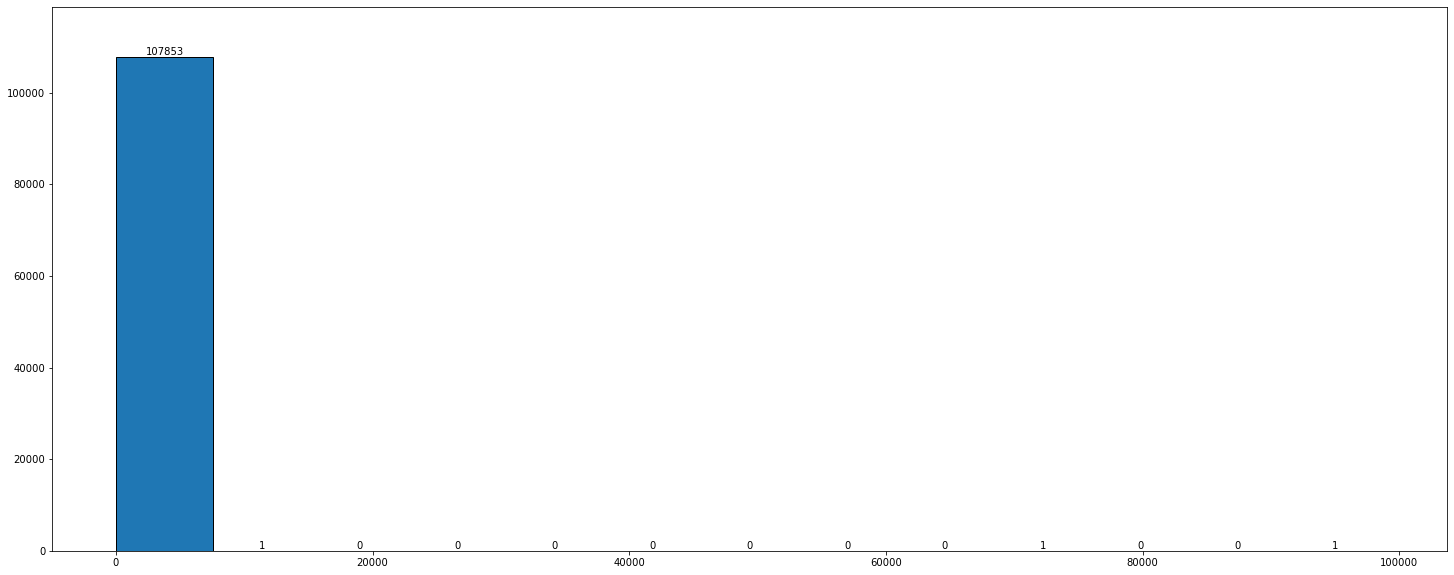

<Figure size 432x288 with 0 Axes>

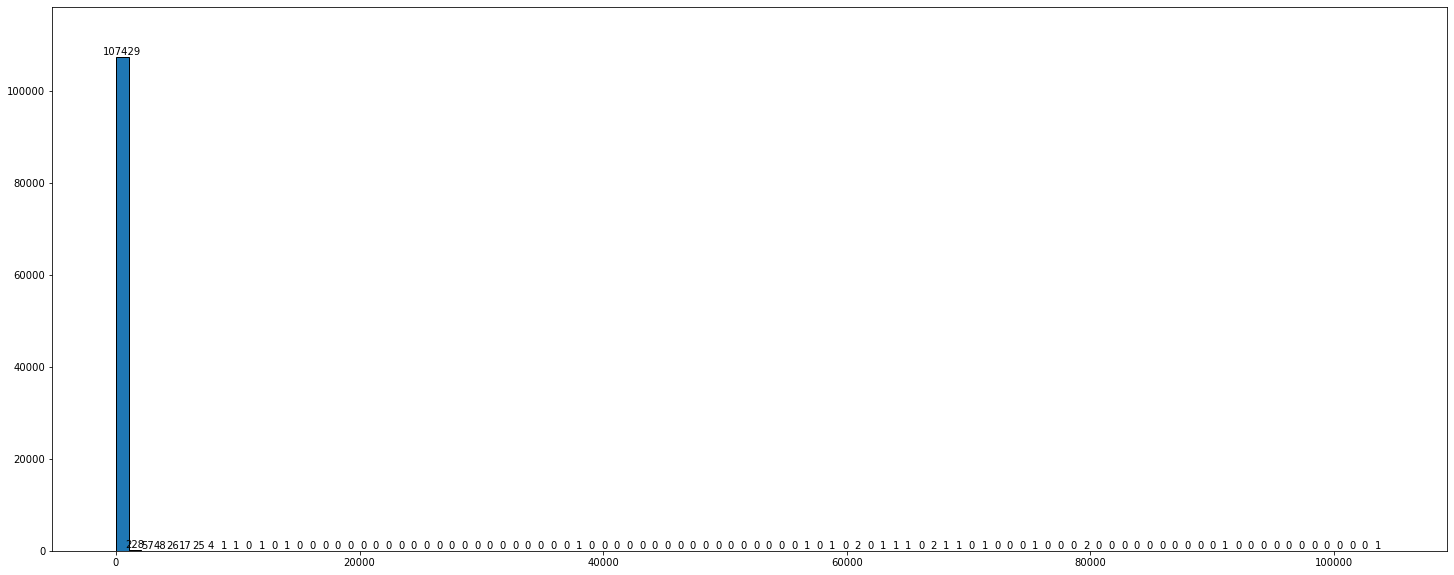

<Figure size 432x288 with 0 Axes>

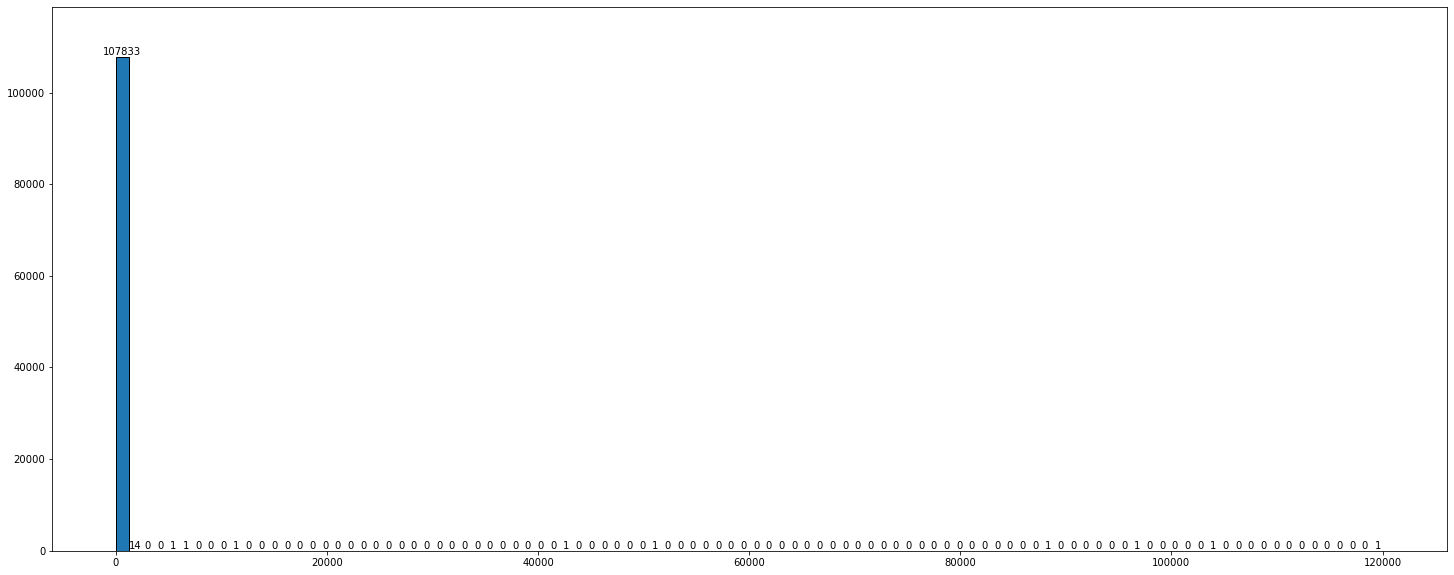

<Figure size 432x288 with 0 Axes>

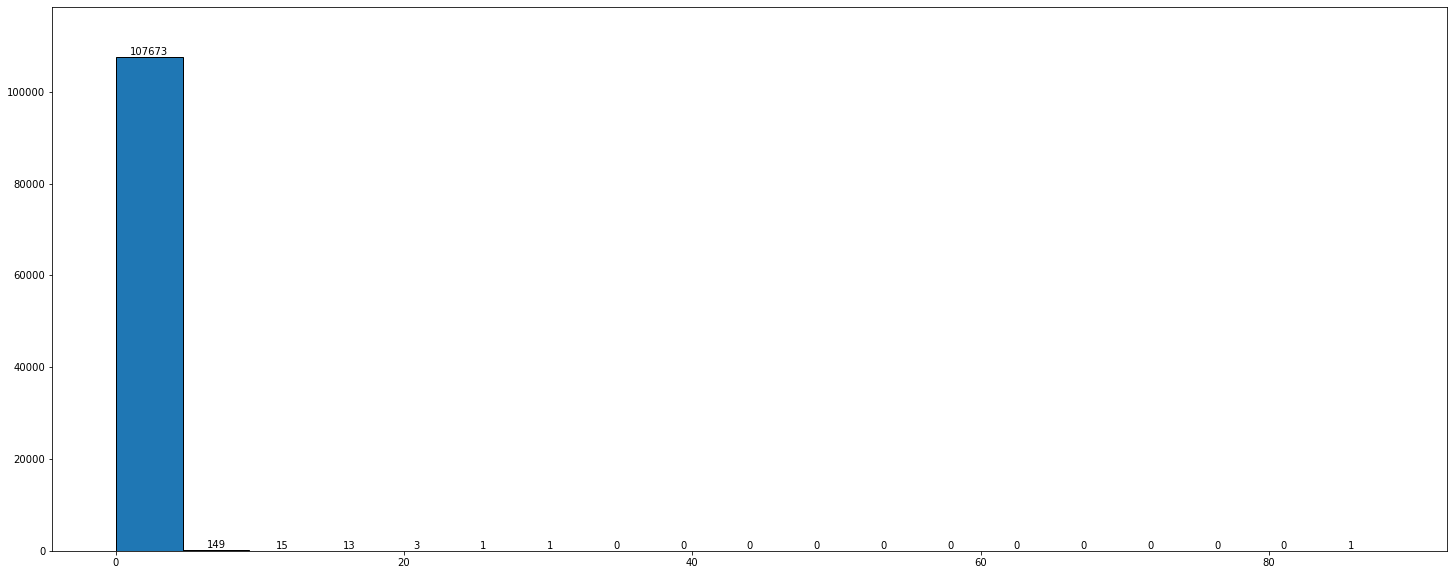

<Figure size 432x288 with 0 Axes>

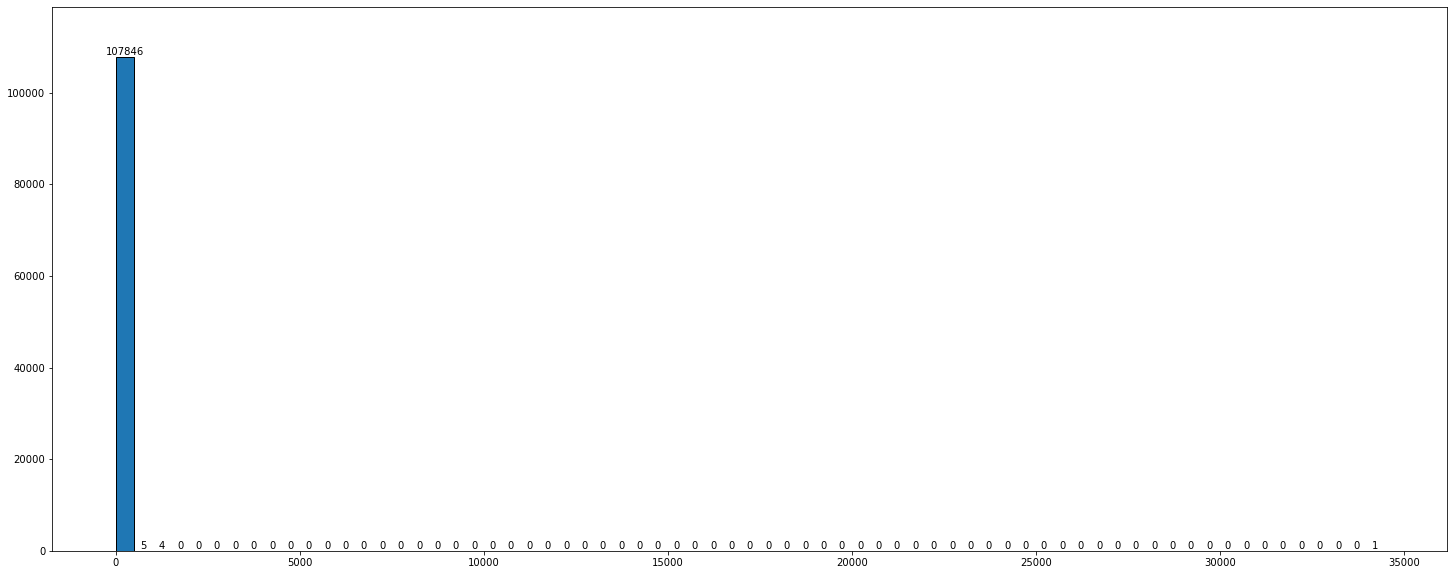

<Figure size 432x288 with 0 Axes>

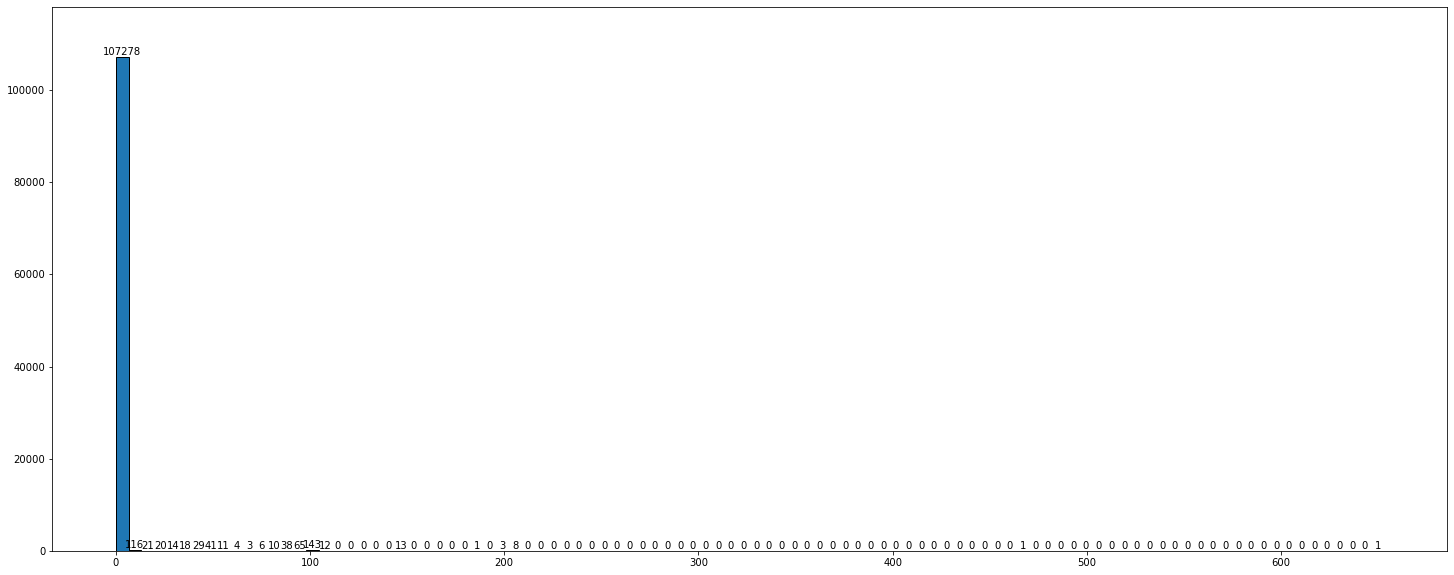

<Figure size 432x288 with 0 Axes>

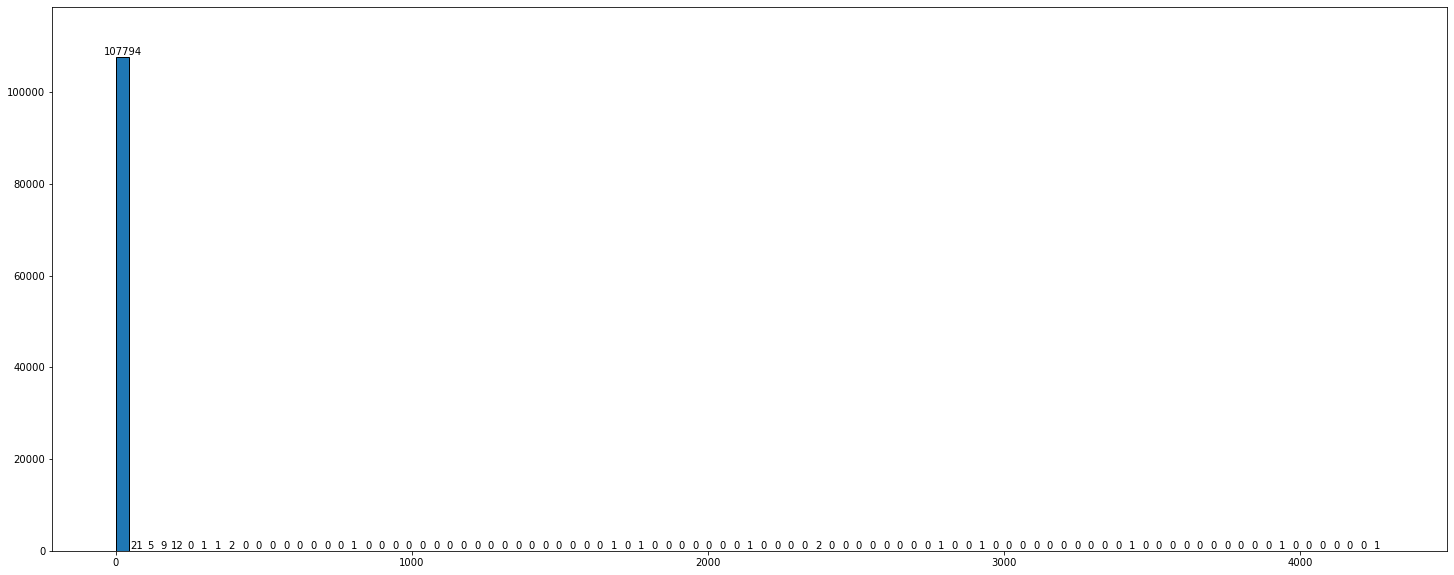

<Figure size 432x288 with 0 Axes>

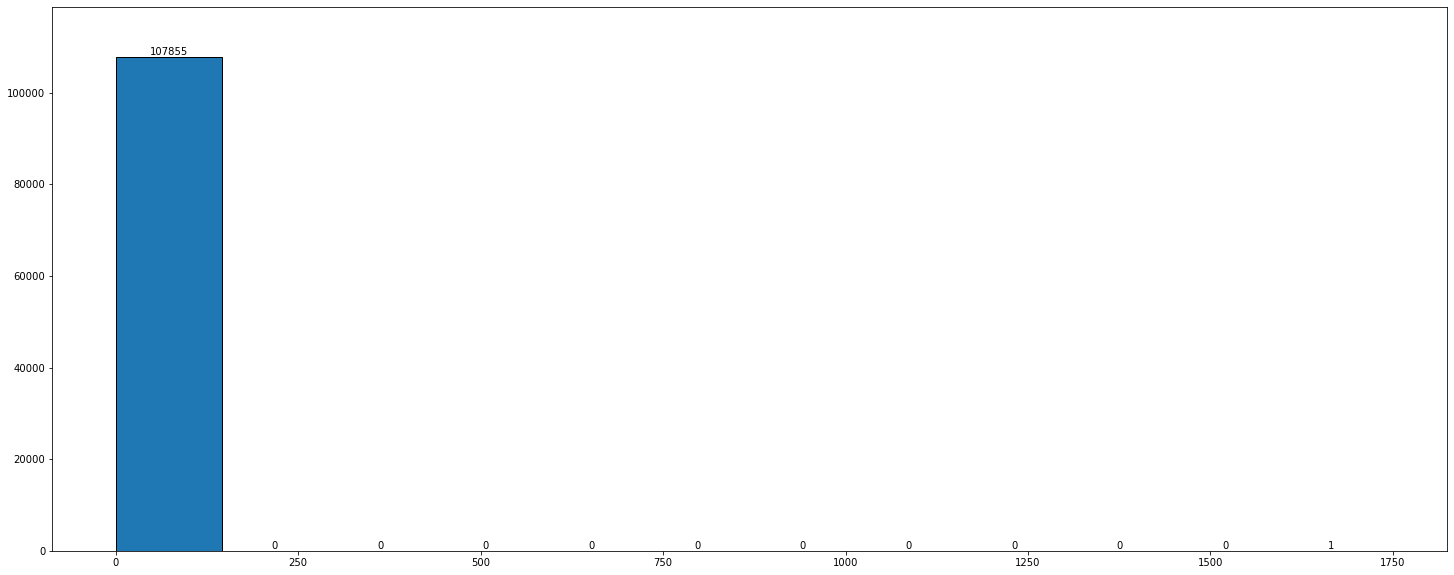

<Figure size 432x288 with 0 Axes>

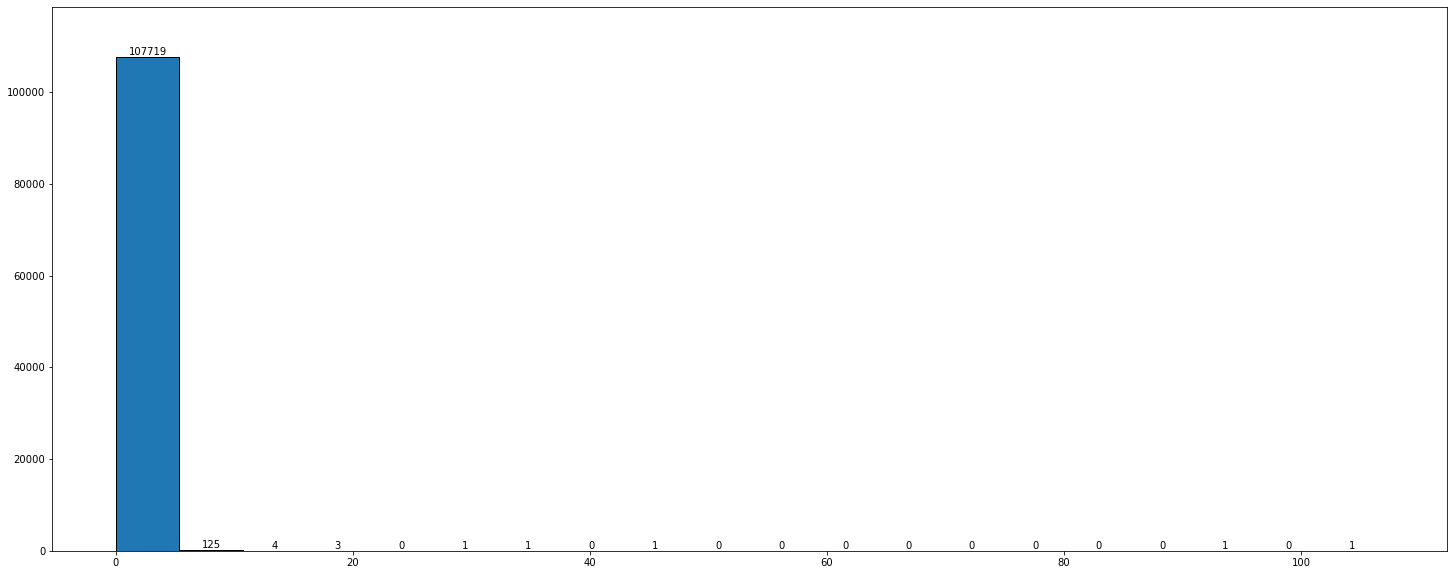

<Figure size 432x288 with 0 Axes>

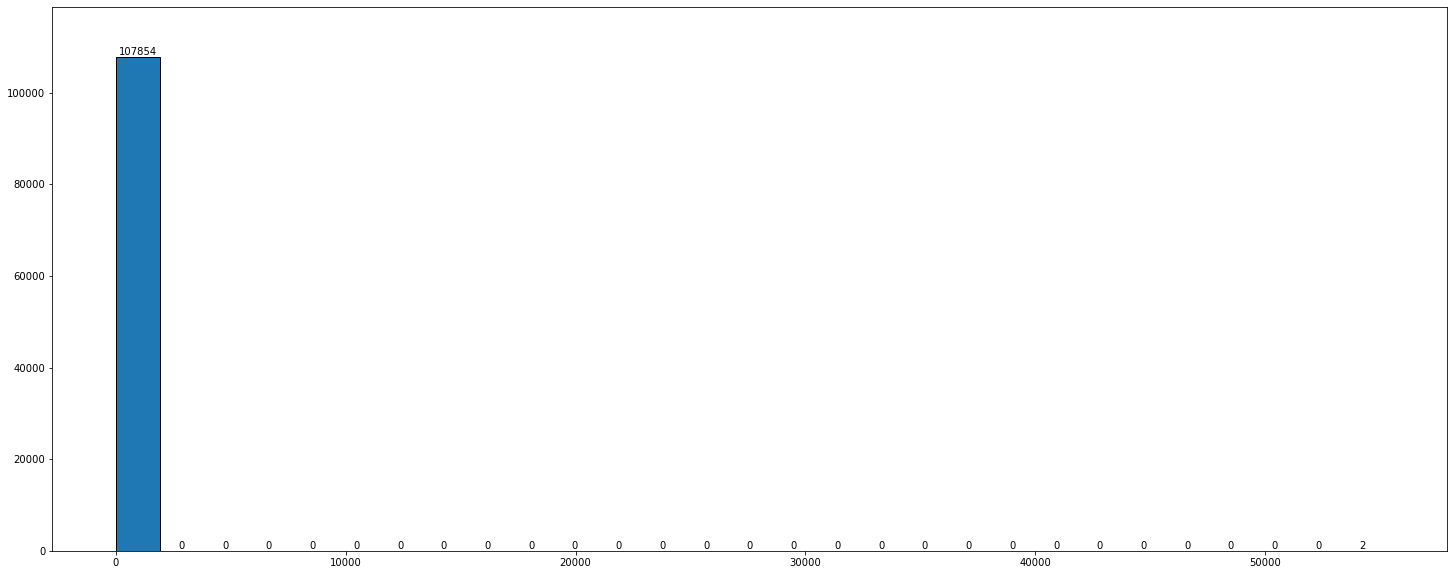

<Figure size 432x288 with 0 Axes>

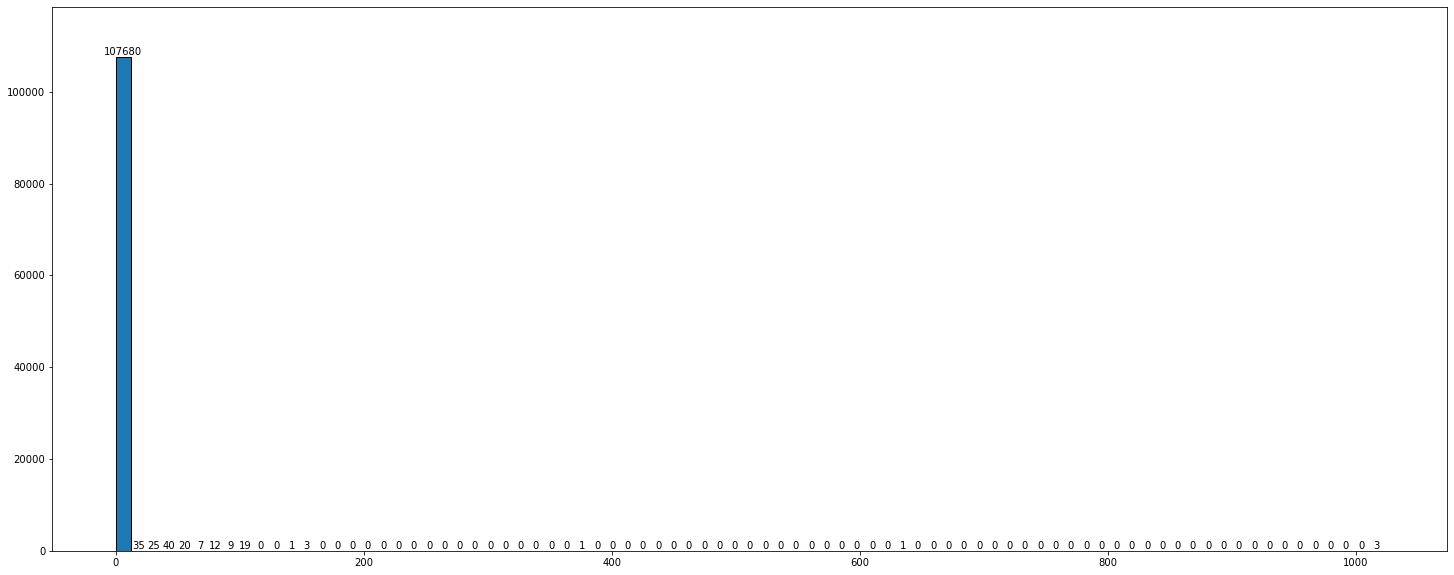

<Figure size 432x288 with 0 Axes>

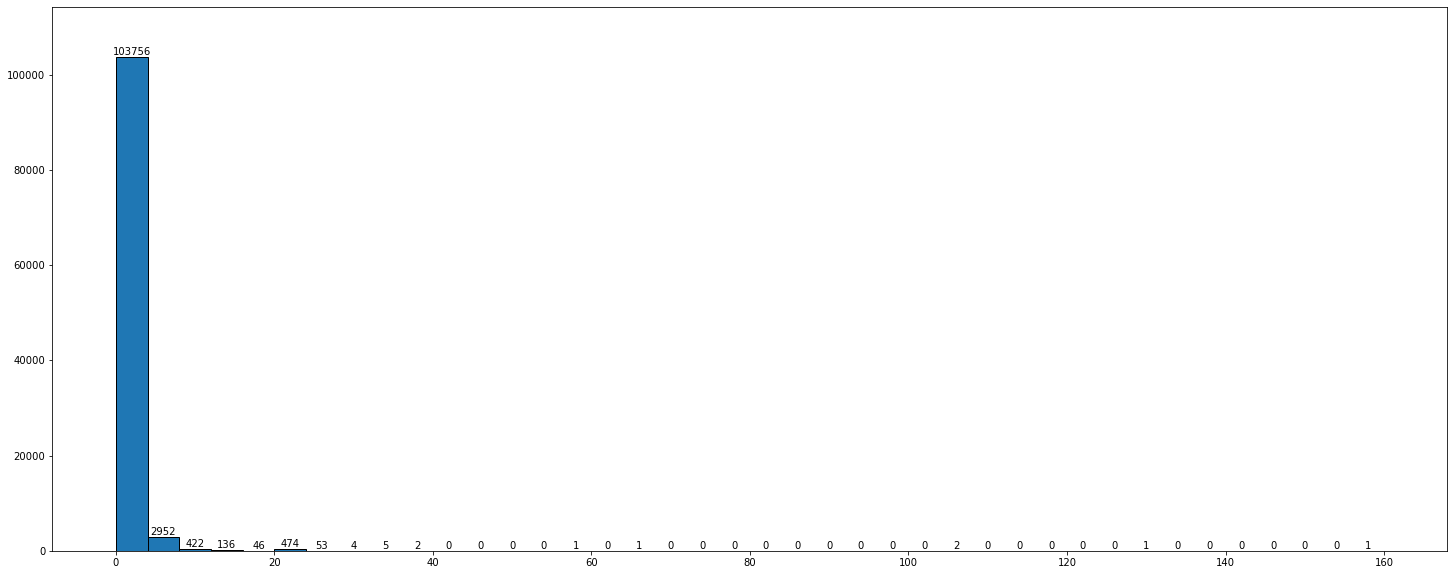

<Figure size 432x288 with 0 Axes>

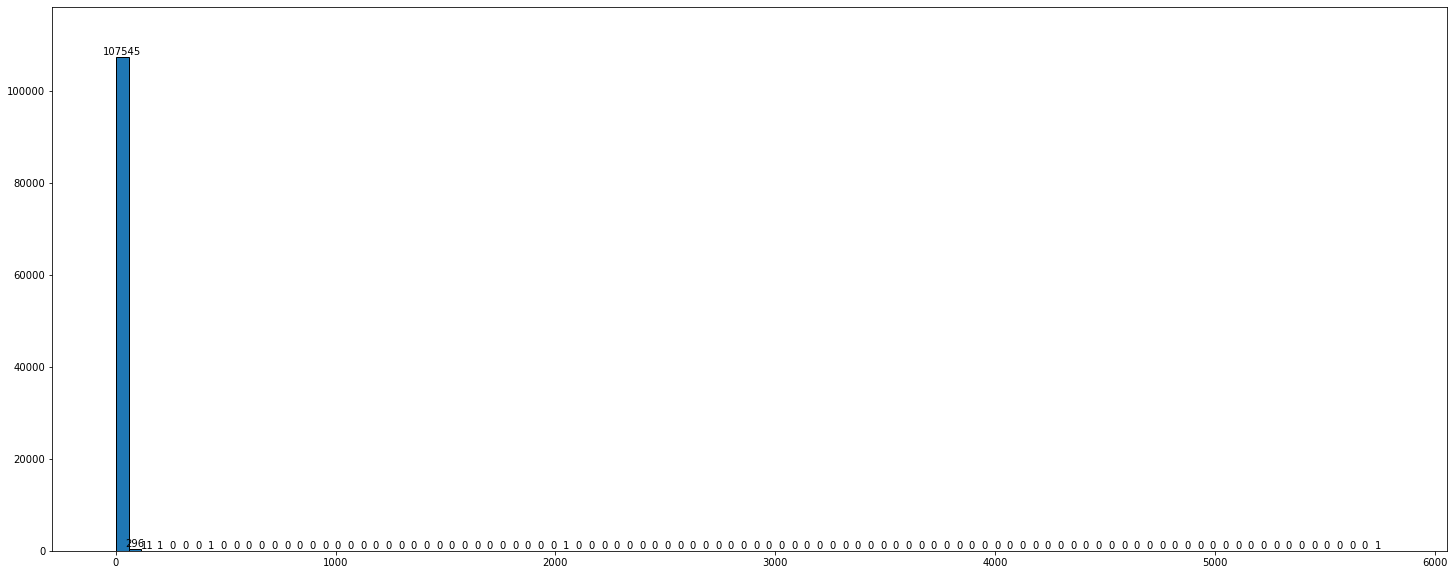

<Figure size 432x288 with 0 Axes>

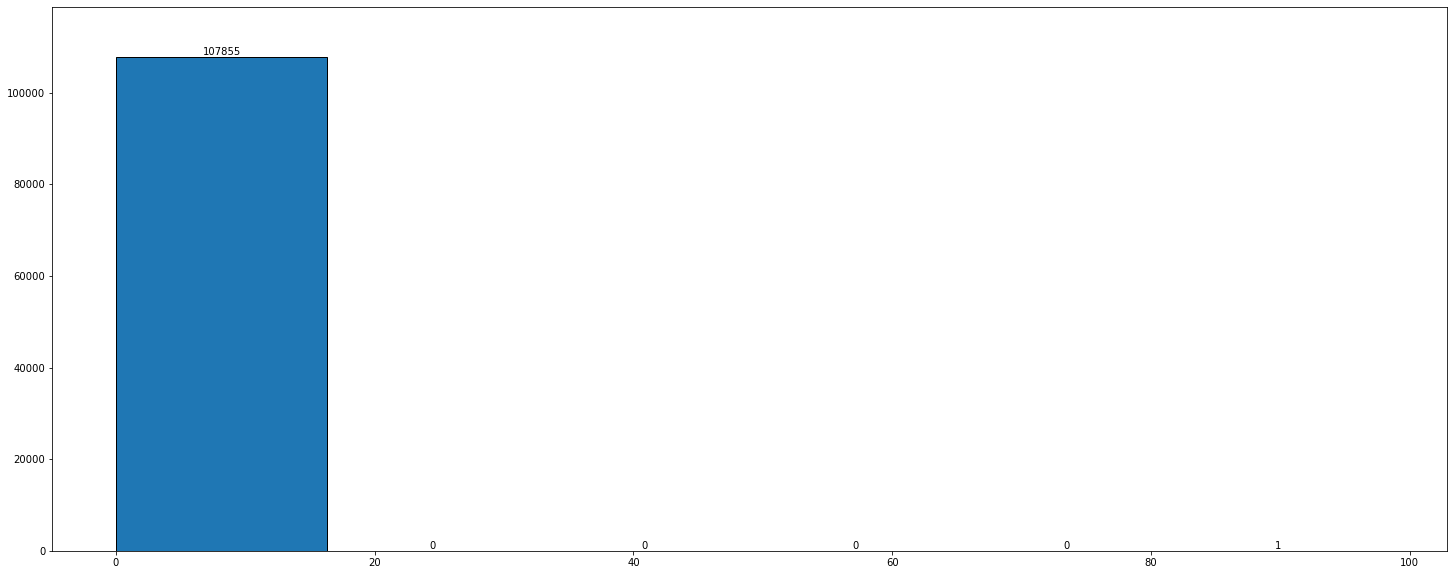

<Figure size 432x288 with 0 Axes>

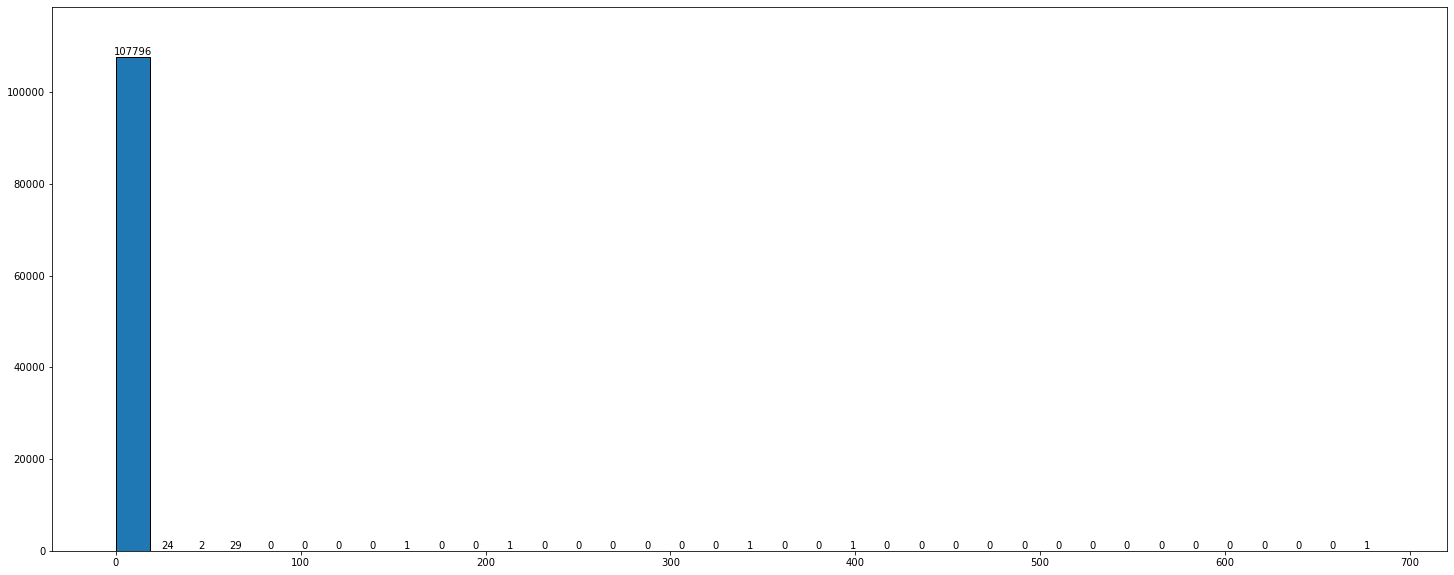

<Figure size 432x288 with 0 Axes>

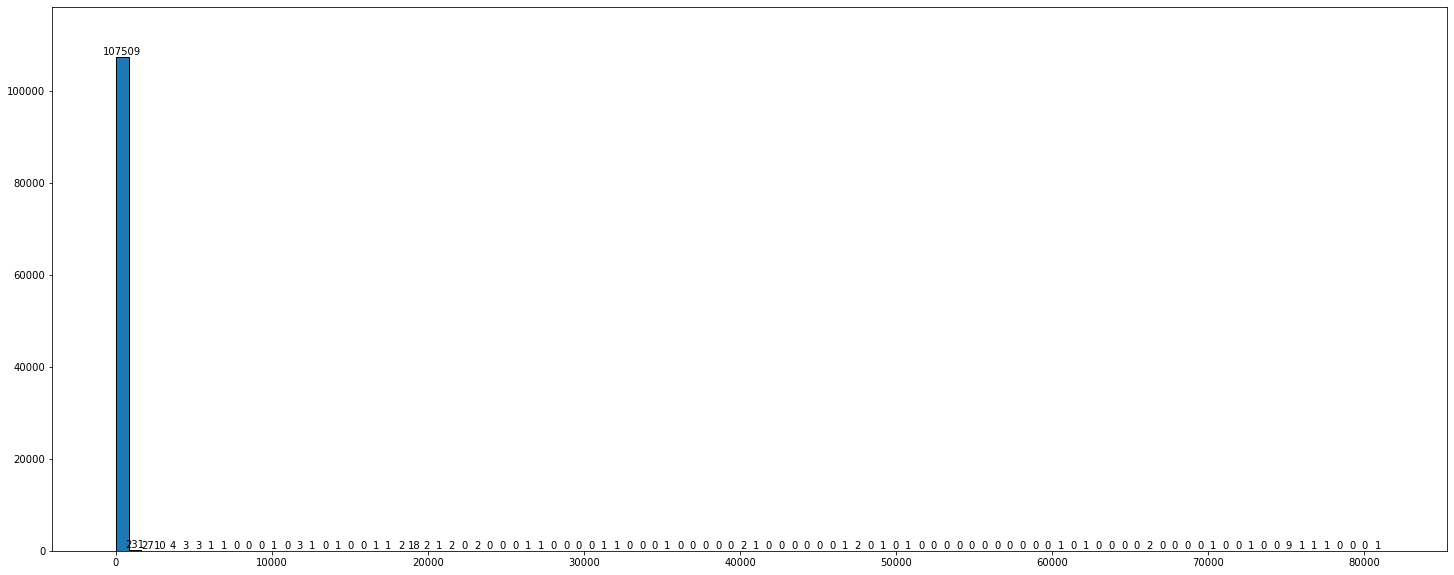

<Figure size 432x288 with 0 Axes>

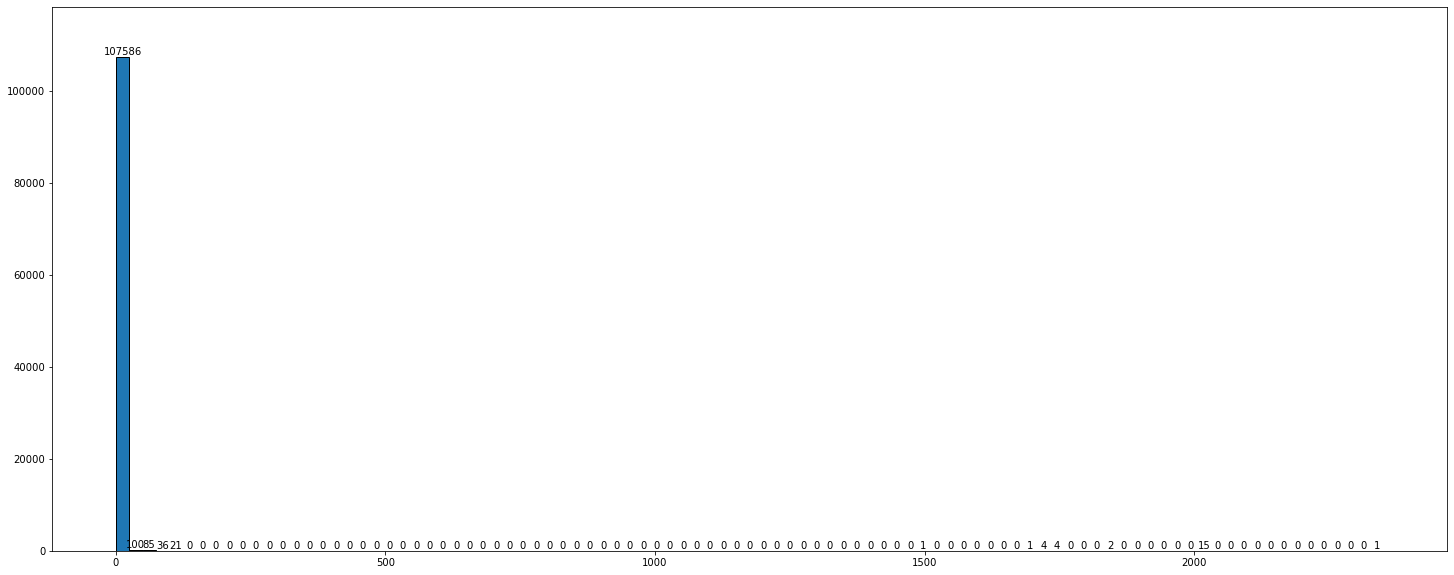

<Figure size 432x288 with 0 Axes>

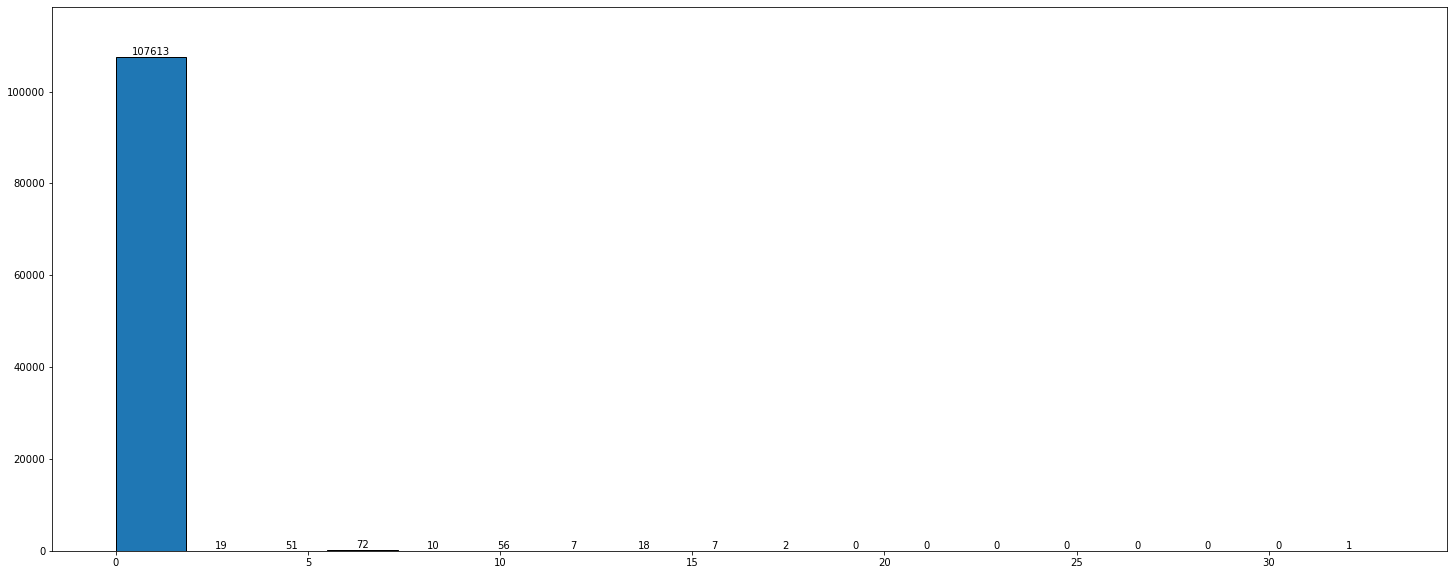

<Figure size 432x288 with 0 Axes>

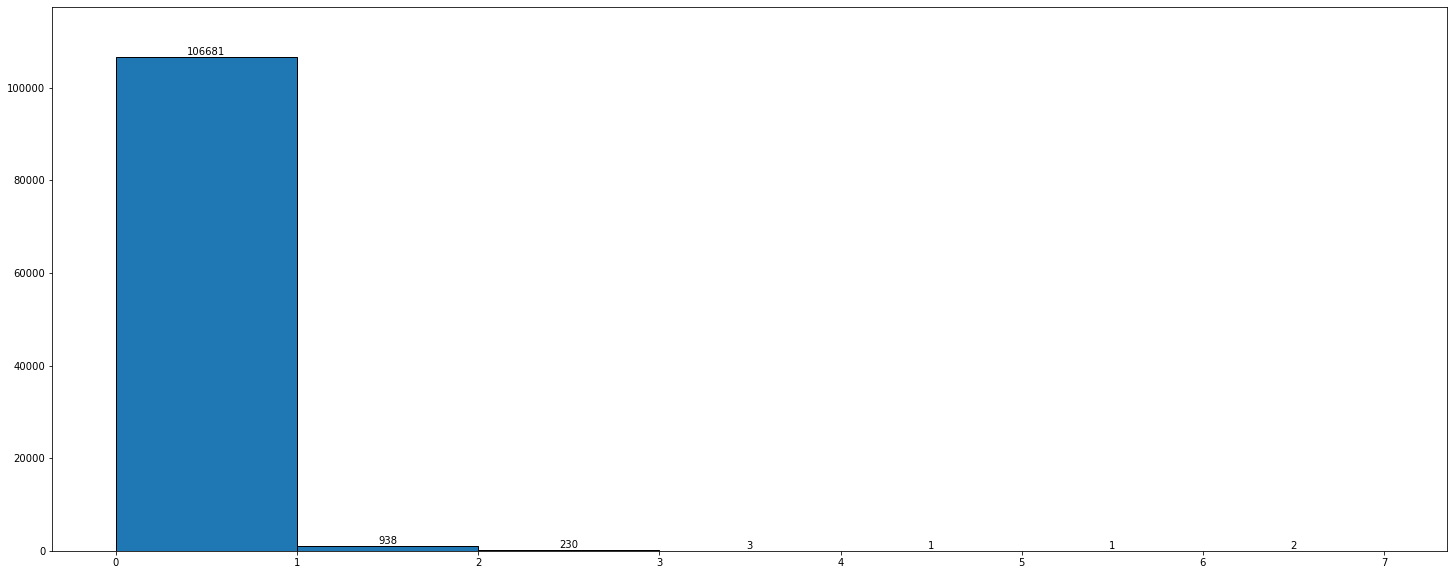

<Figure size 432x288 with 0 Axes>

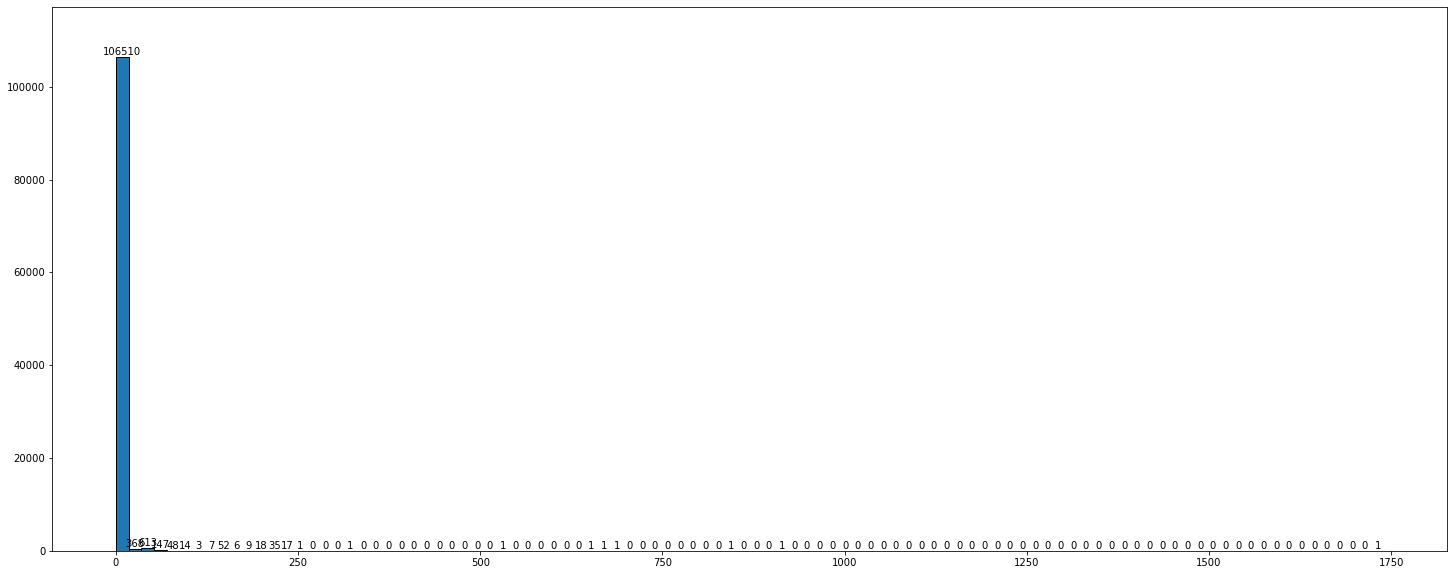

<Figure size 432x288 with 0 Axes>

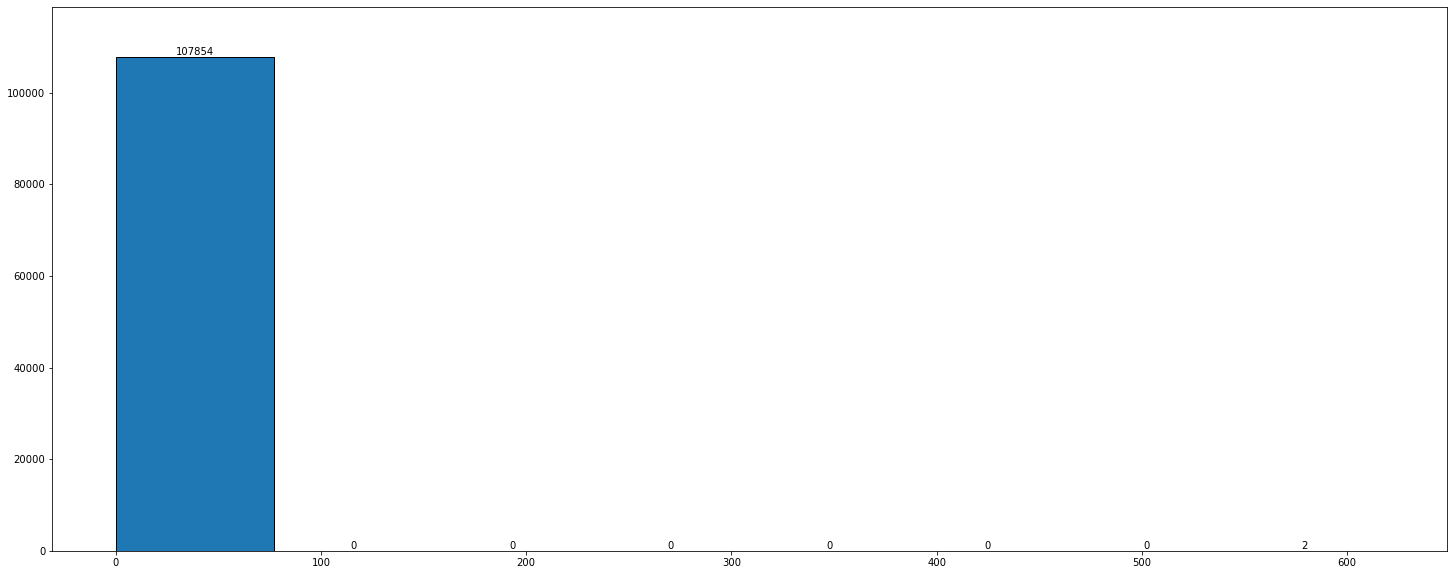

<Figure size 432x288 with 0 Axes>

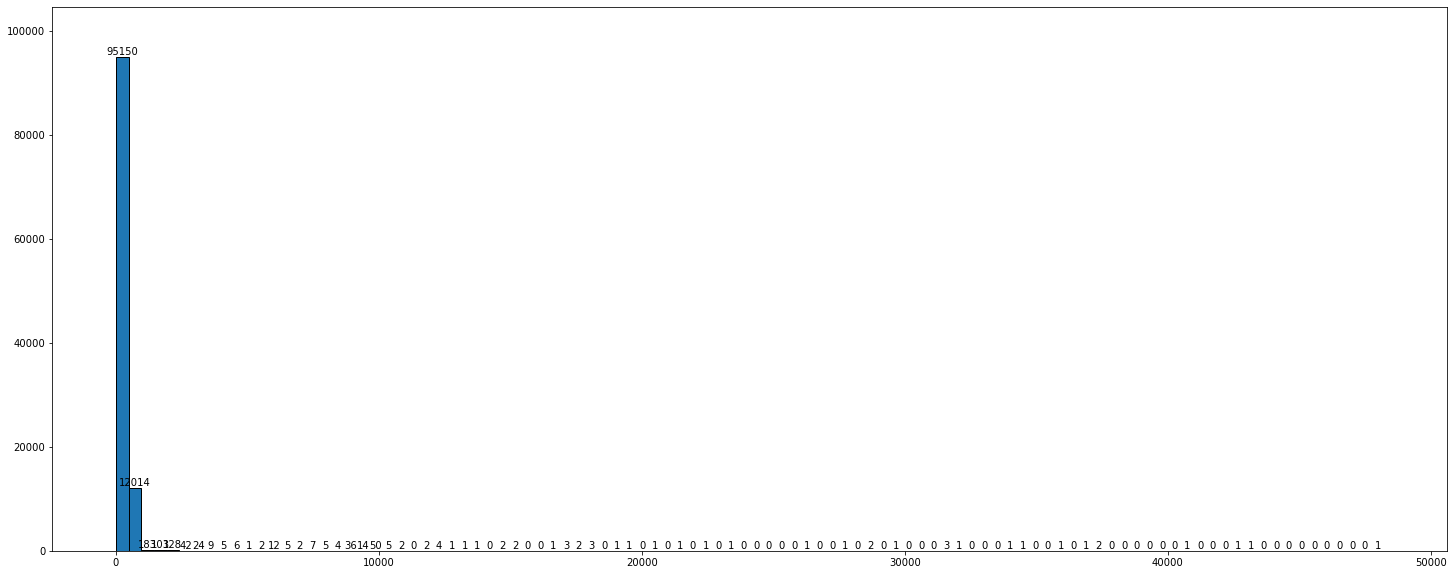

<Figure size 432x288 with 0 Axes>

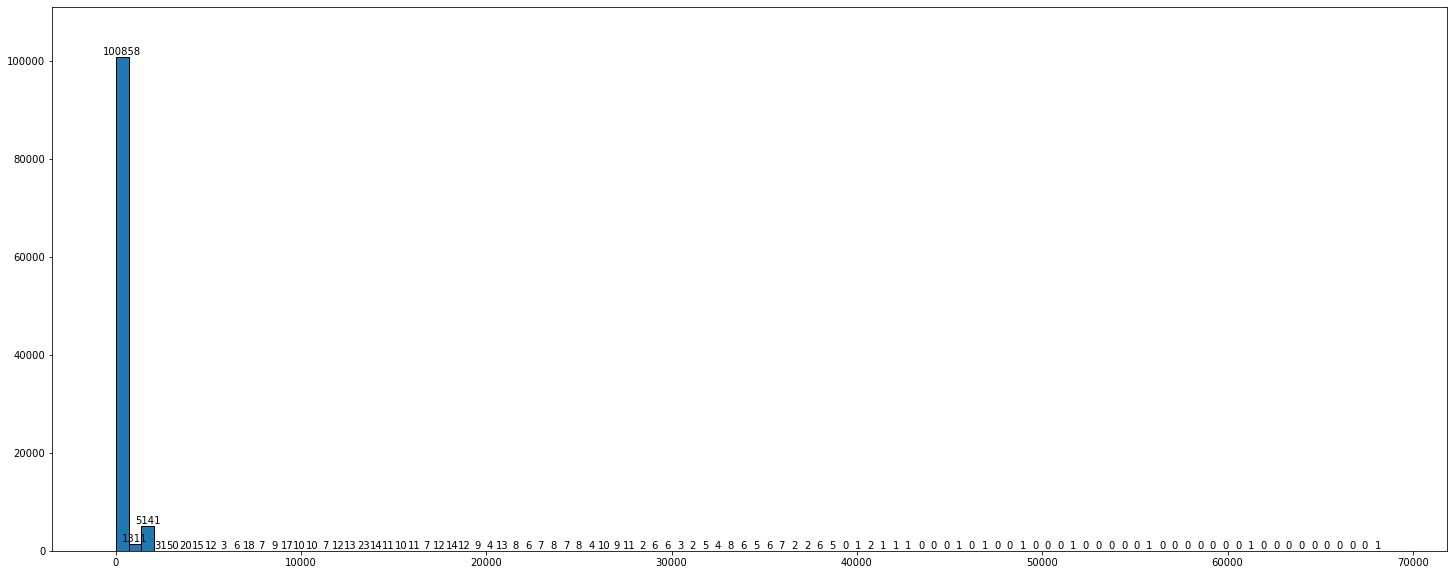

<Figure size 432x288 with 0 Axes>

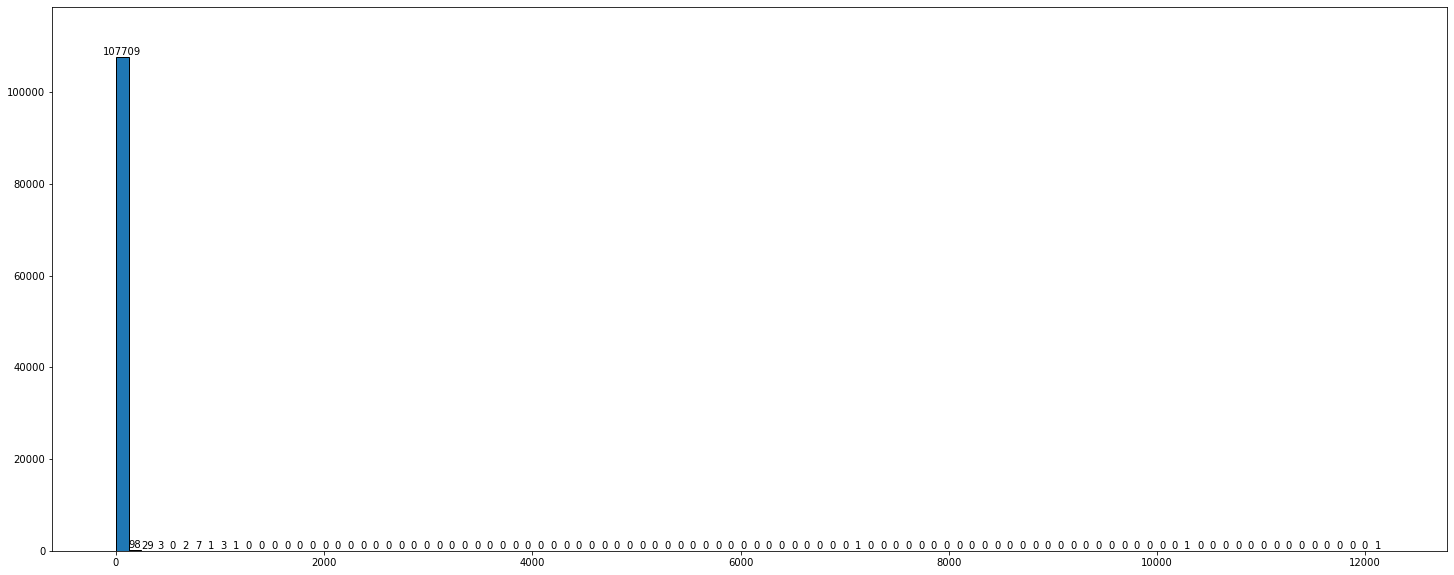

<Figure size 432x288 with 0 Axes>

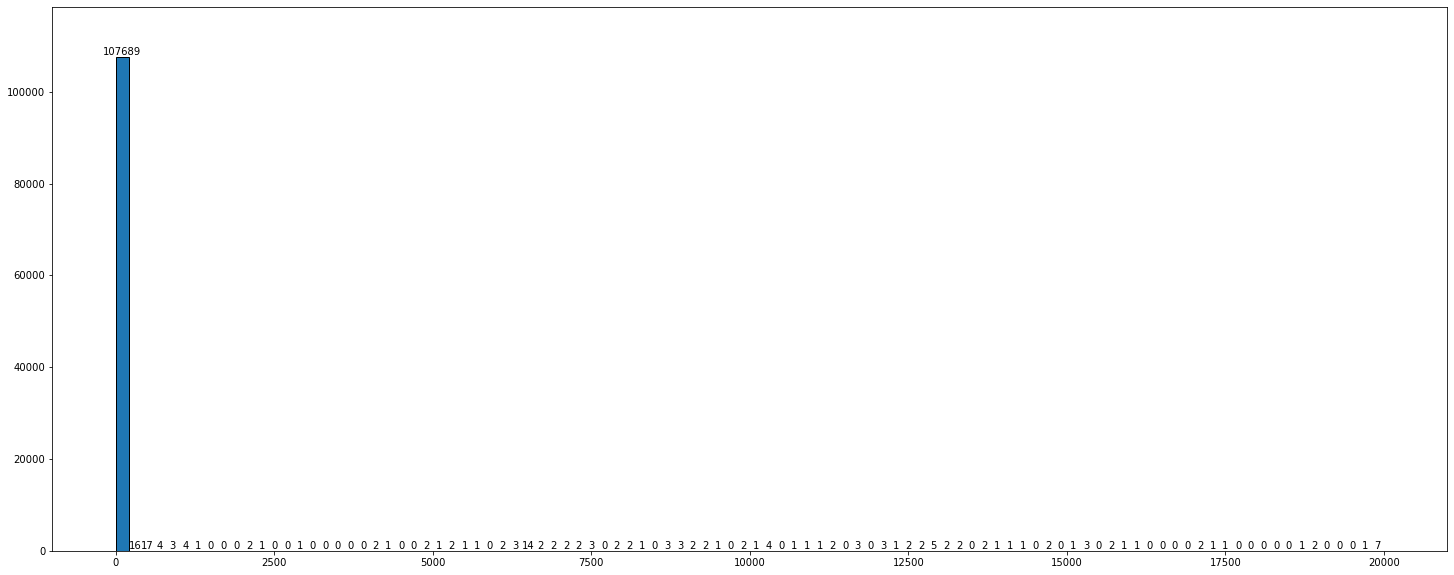

<Figure size 432x288 with 0 Axes>

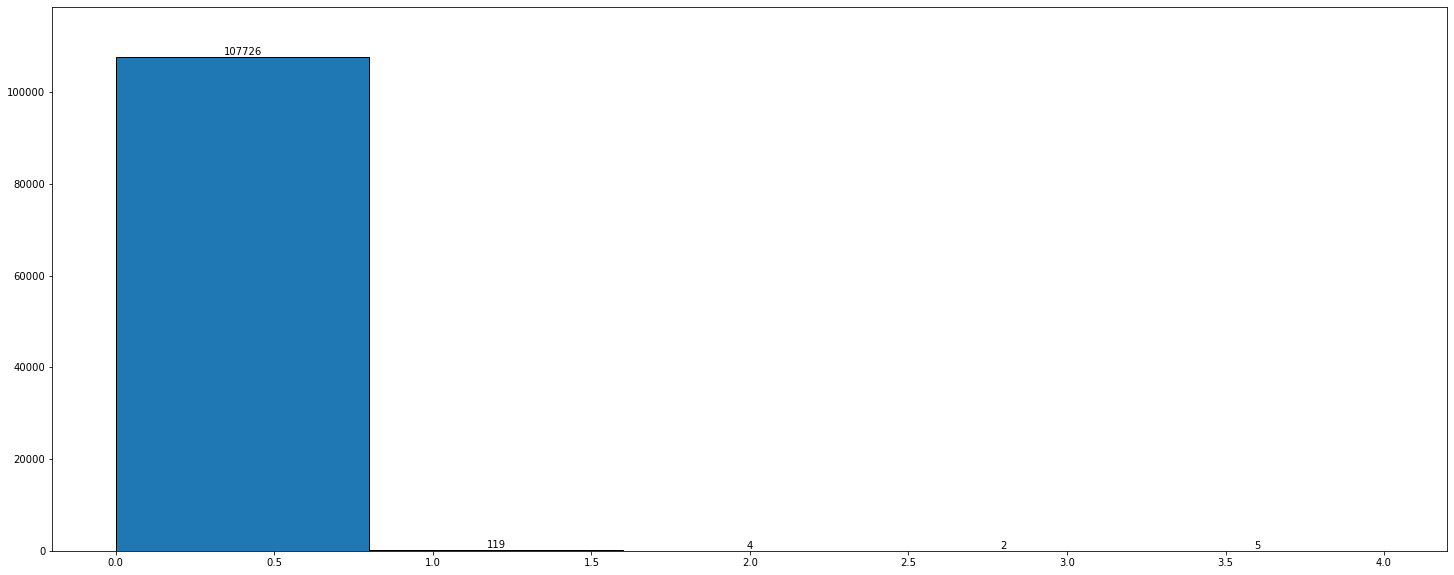

<Figure size 432x288 with 0 Axes>

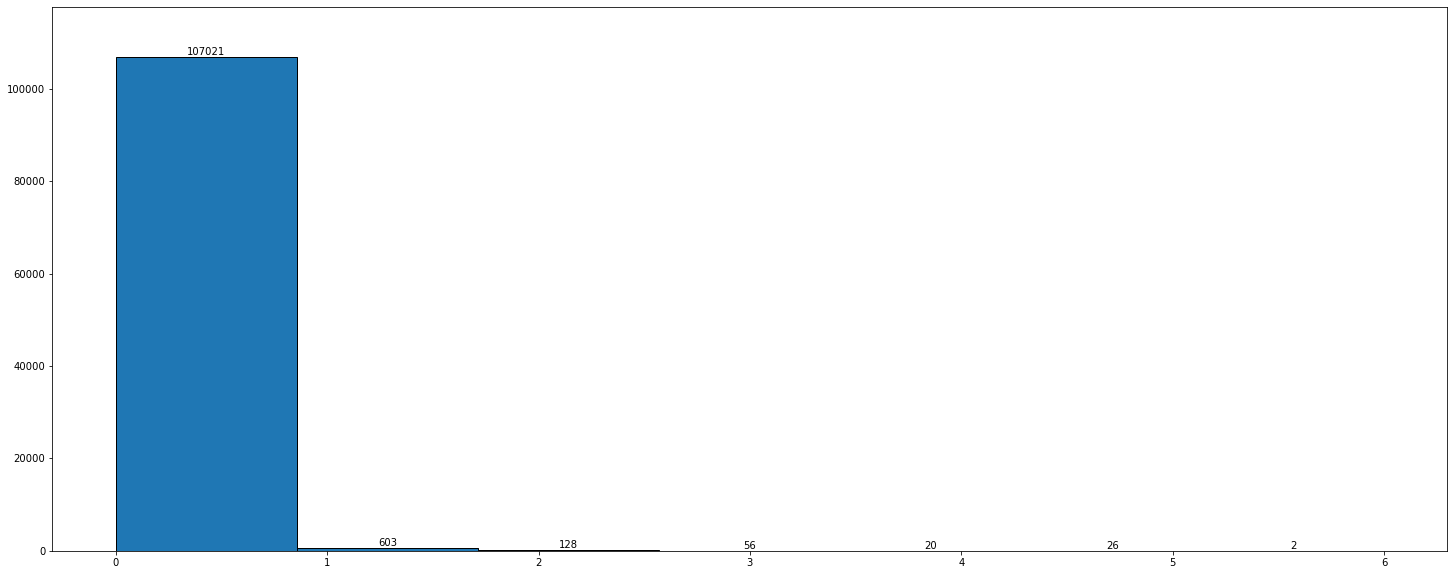

<Figure size 432x288 with 0 Axes>

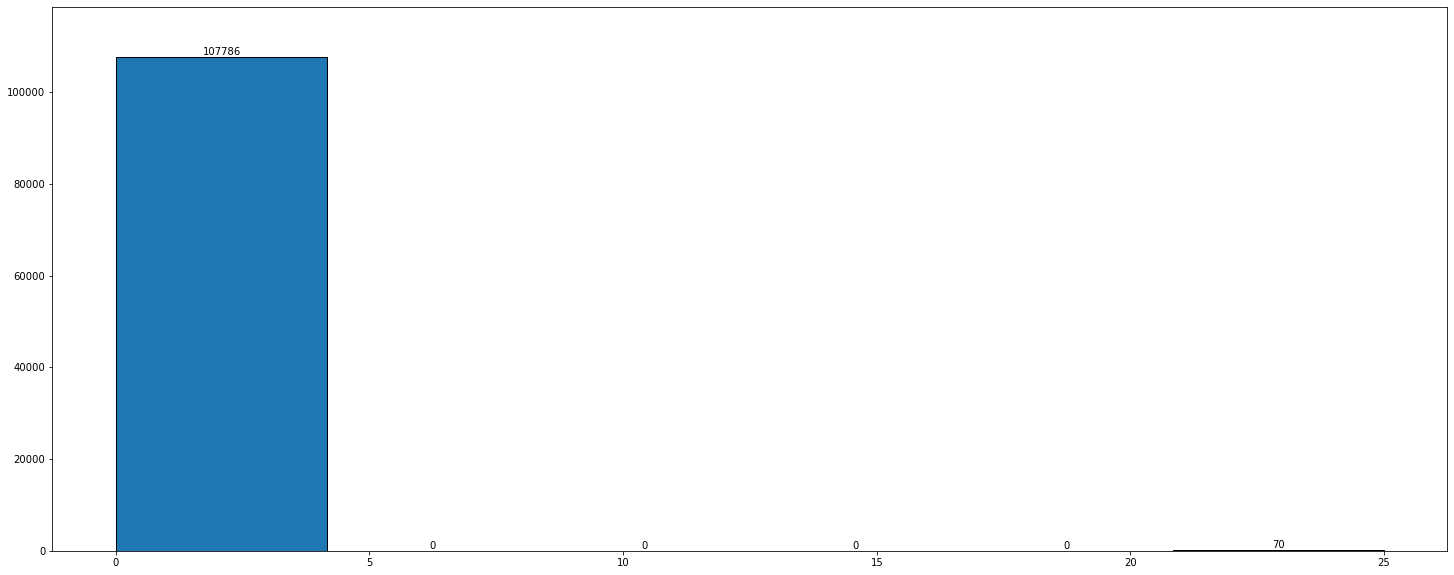

<Figure size 432x288 with 0 Axes>

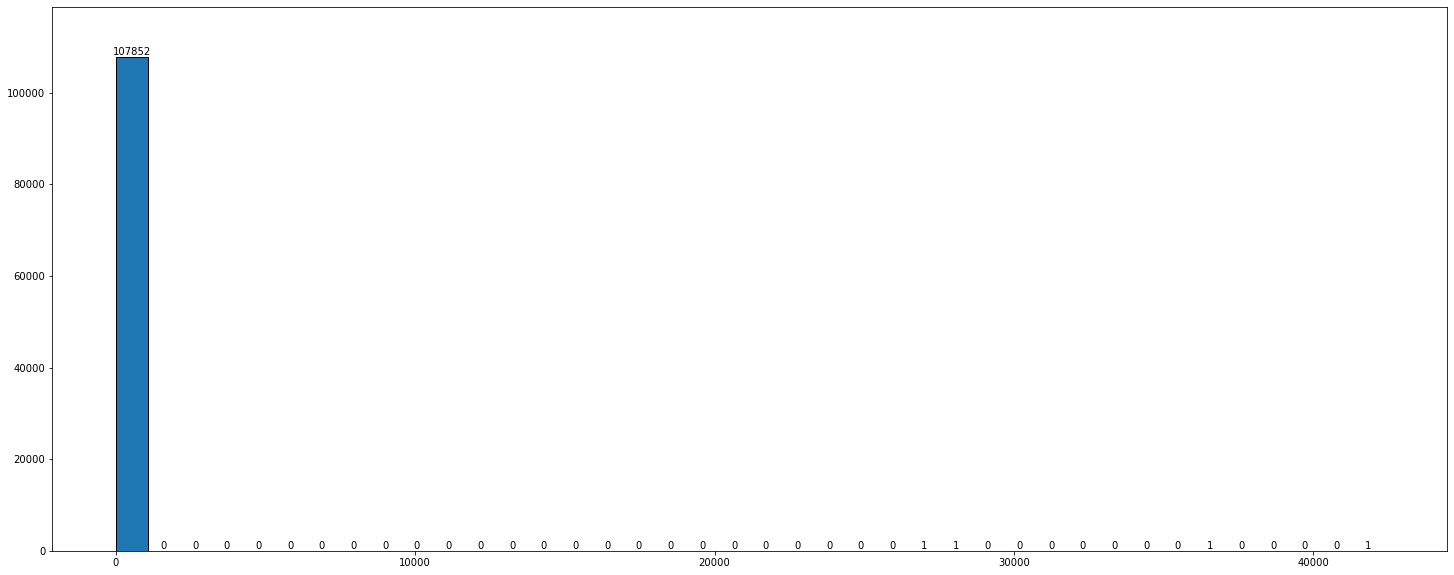

<Figure size 432x288 with 0 Axes>

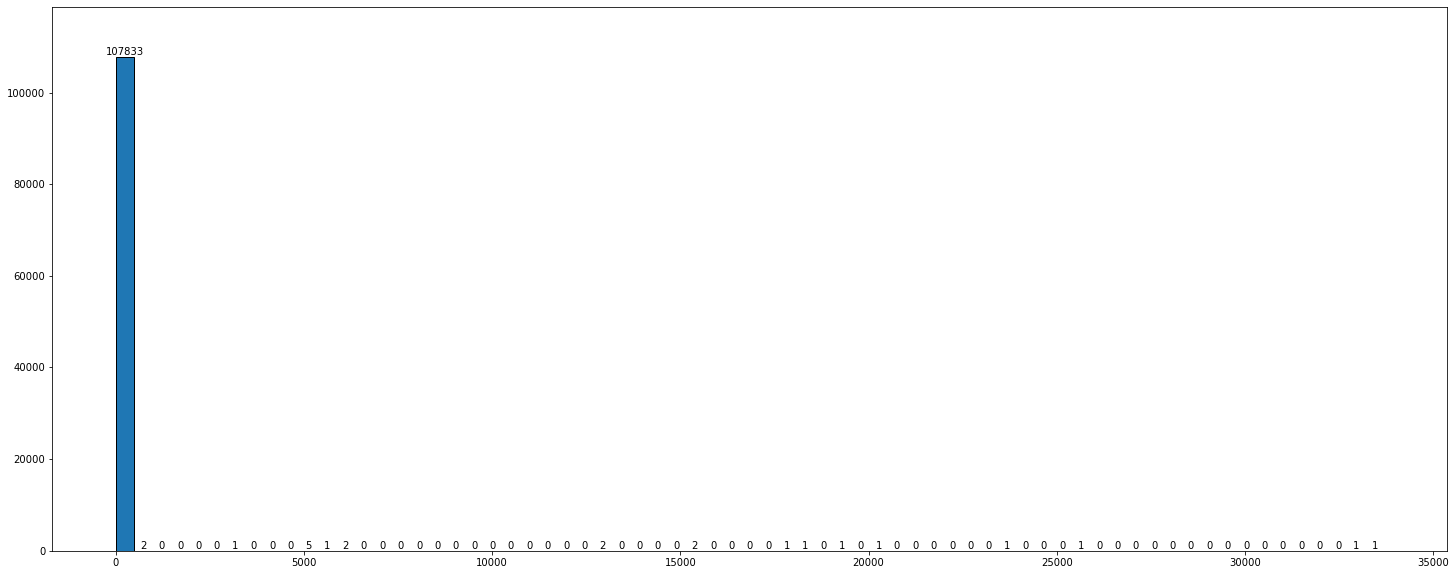

<Figure size 432x288 with 0 Axes>

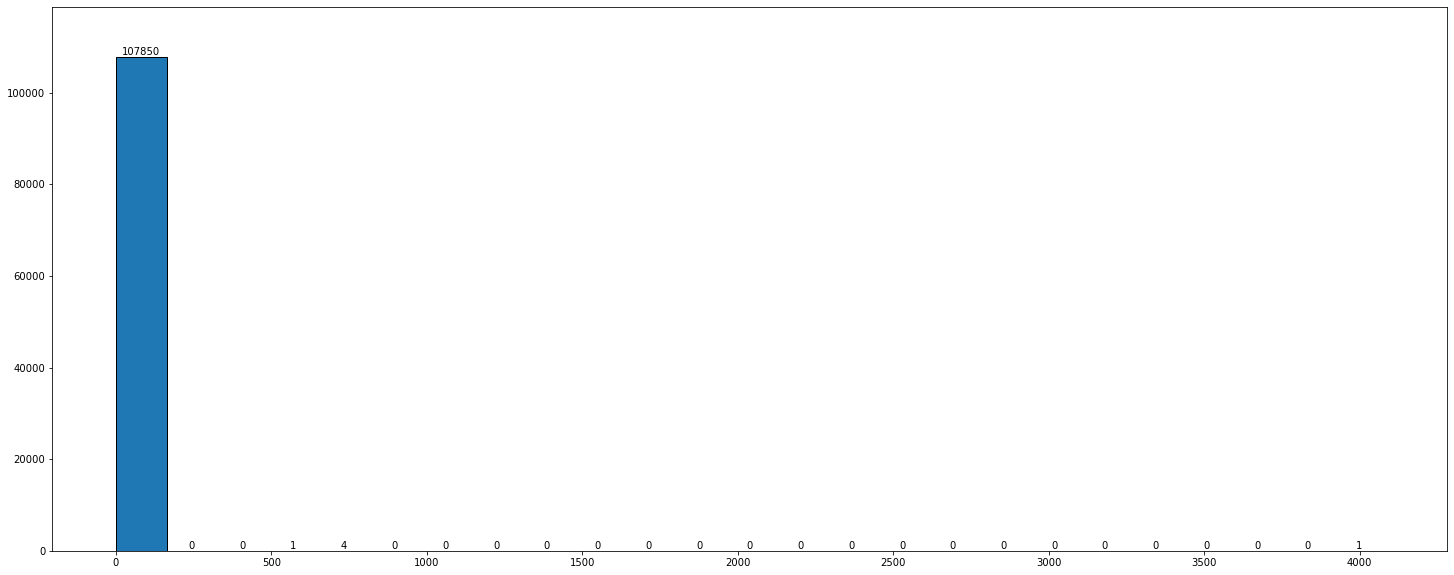

<Figure size 432x288 with 0 Axes>

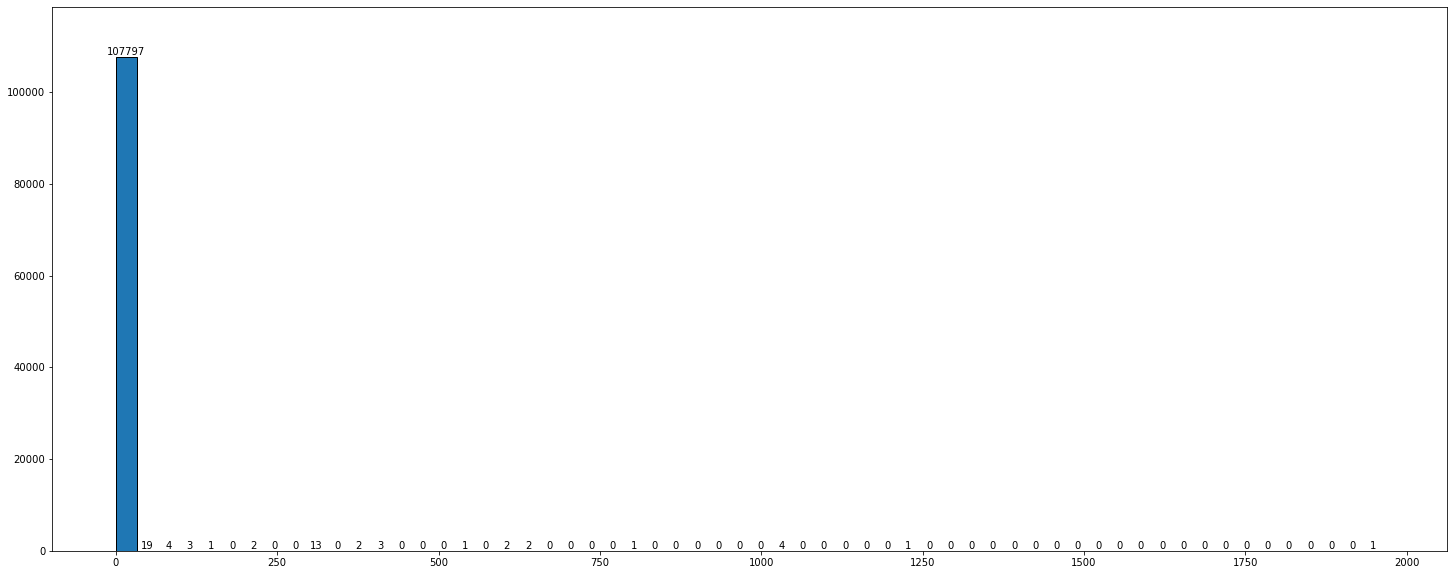

<Figure size 432x288 with 0 Axes>

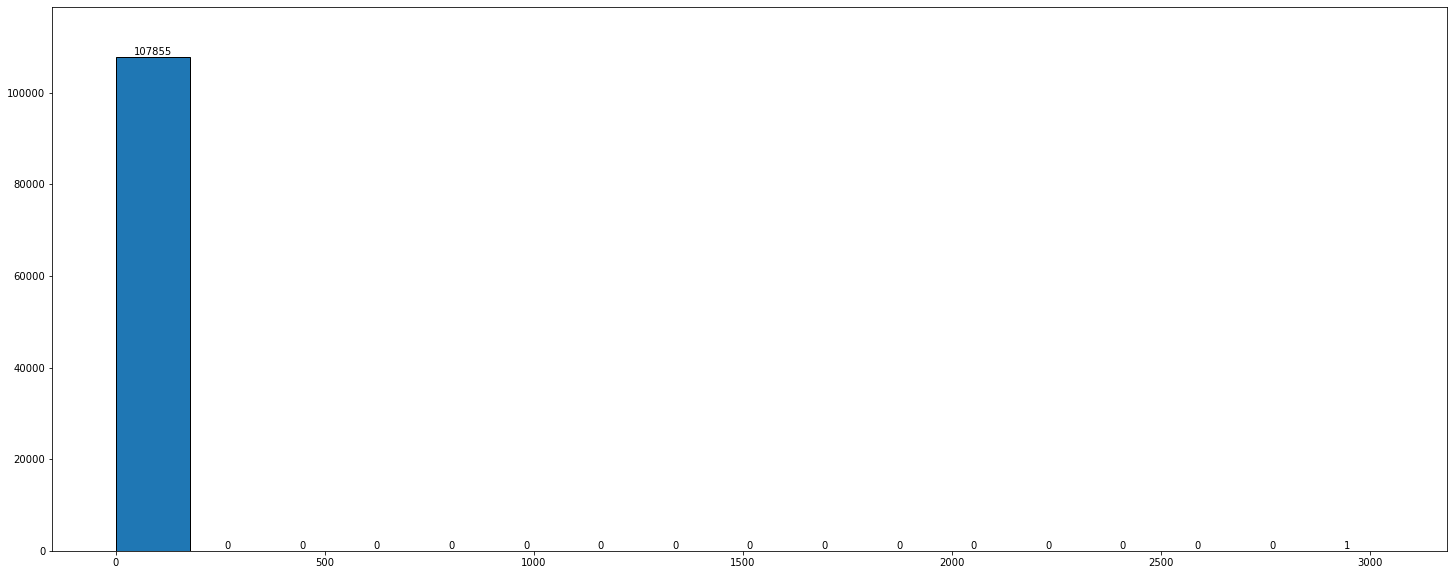

<Figure size 432x288 with 0 Axes>

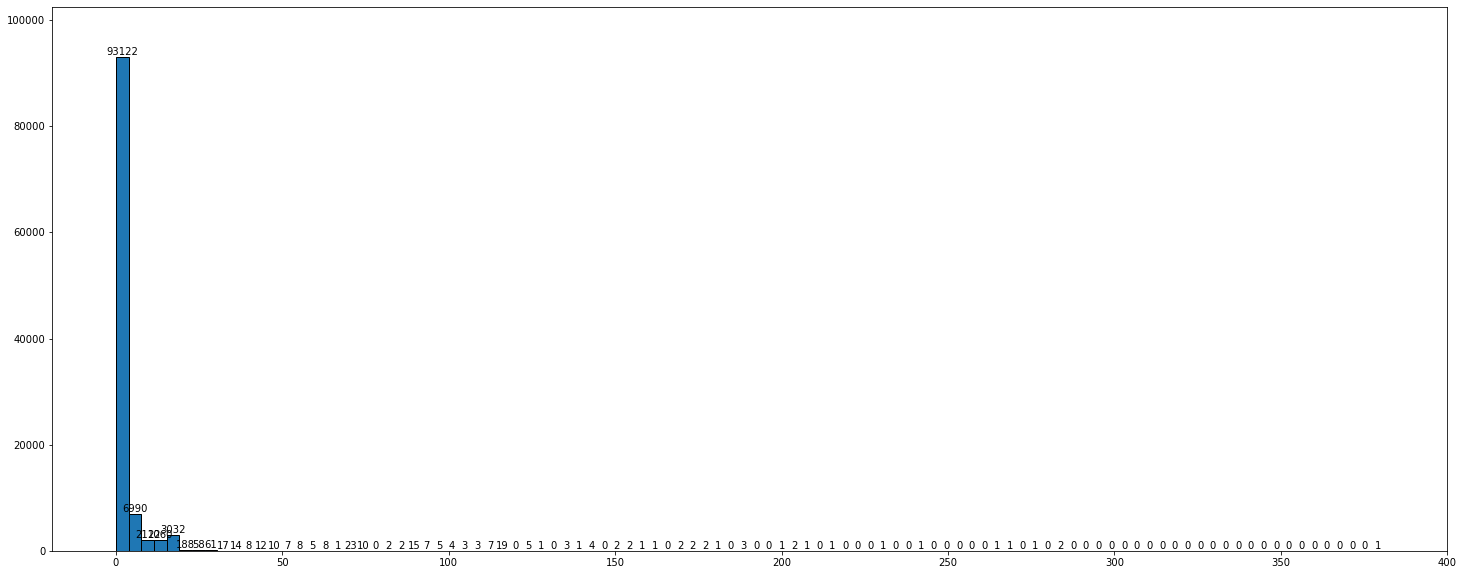

<Figure size 432x288 with 0 Axes>

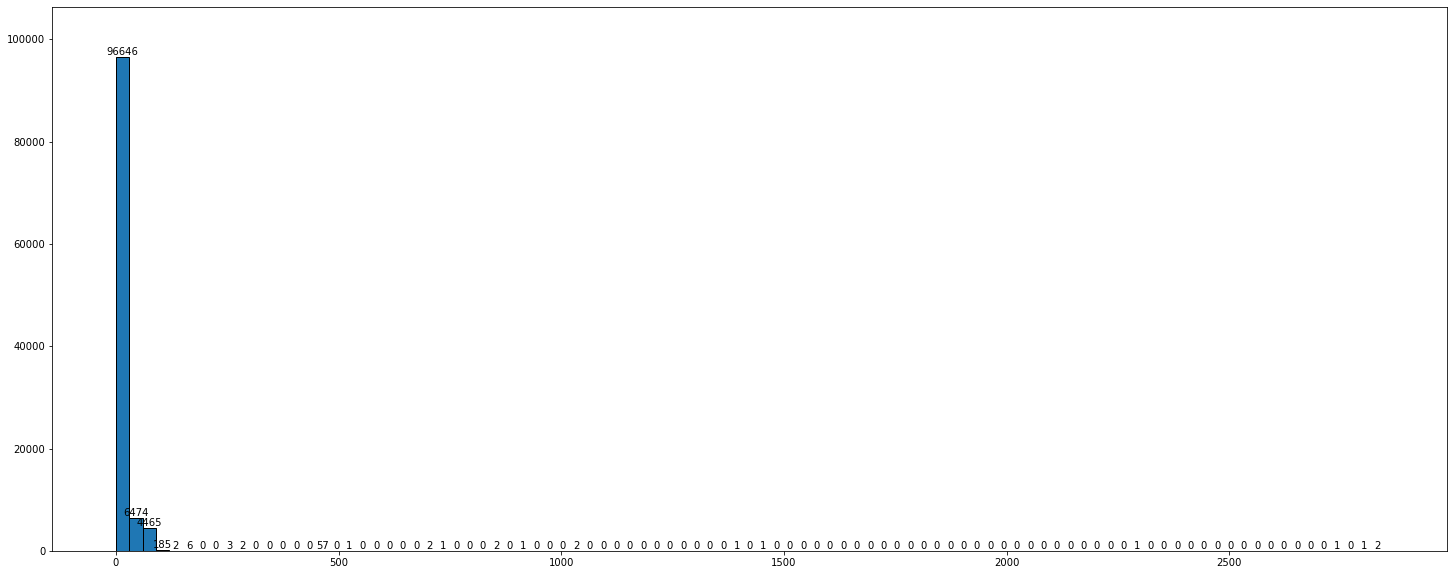

<Figure size 432x288 with 0 Axes>

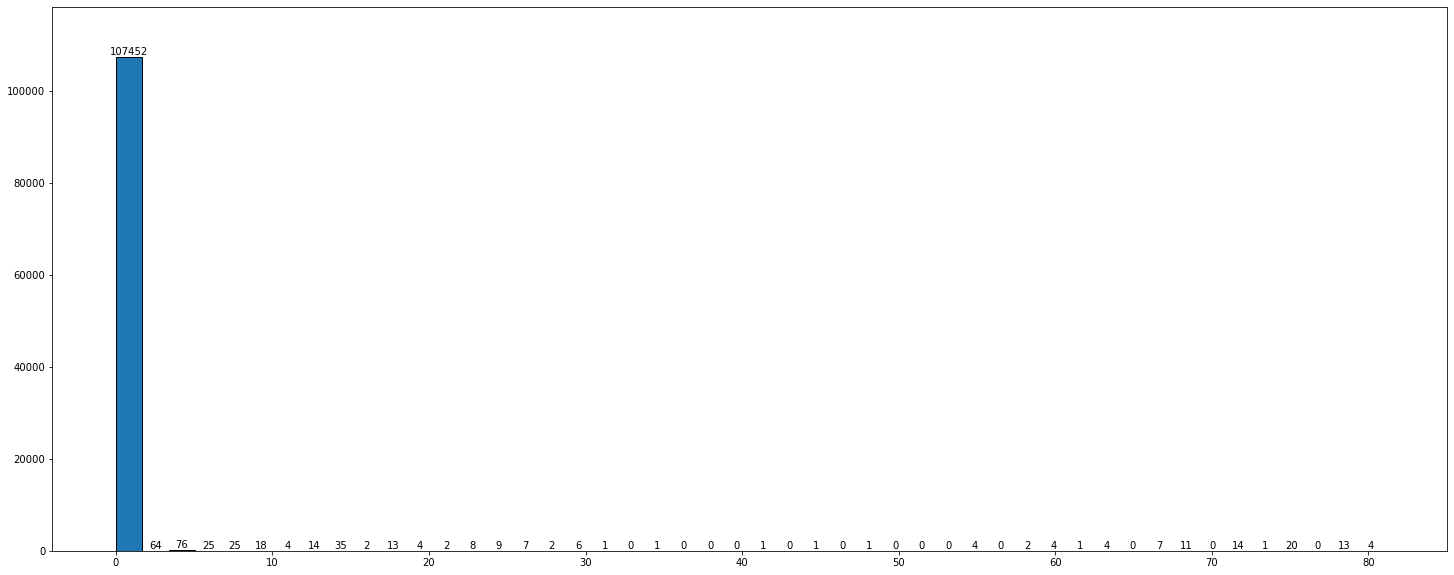

<Figure size 432x288 with 0 Axes>

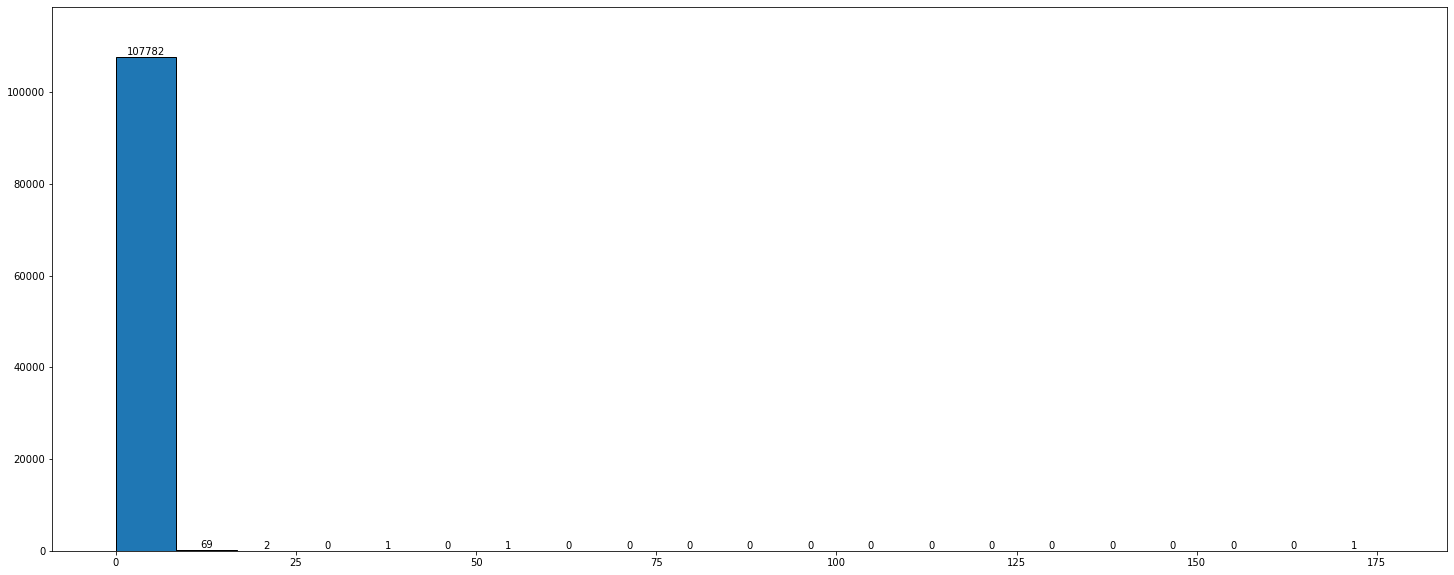

<Figure size 432x288 with 0 Axes>

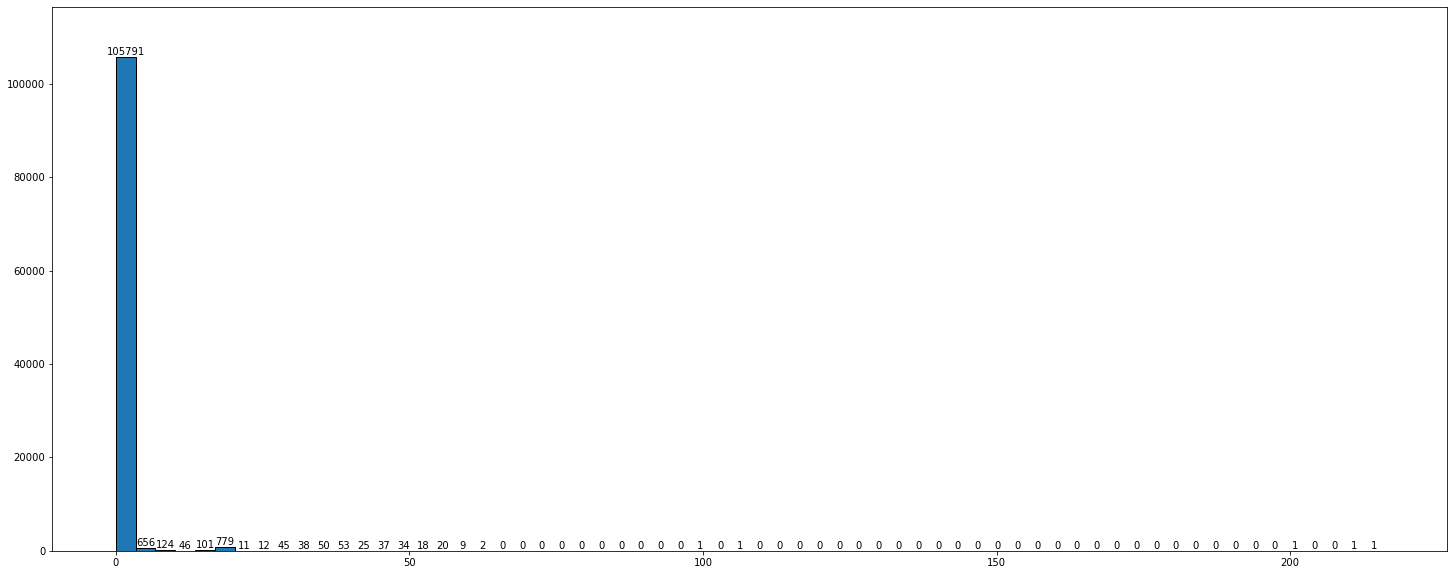

<Figure size 432x288 with 0 Axes>

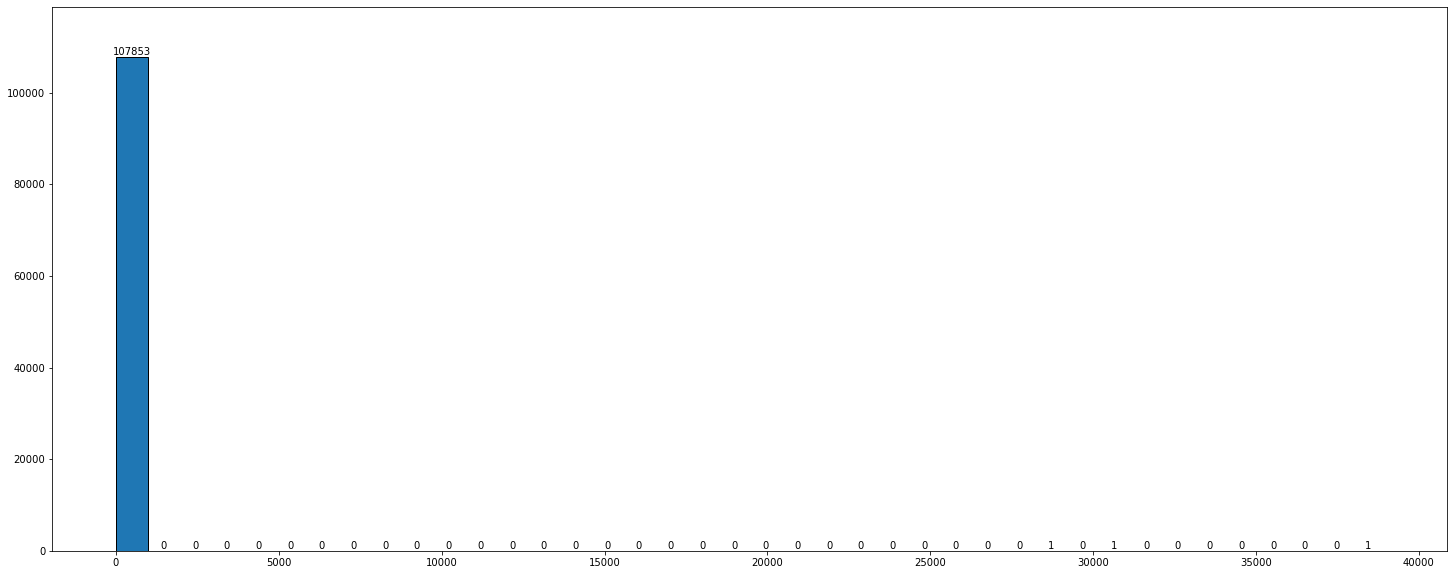

<Figure size 432x288 with 0 Axes>

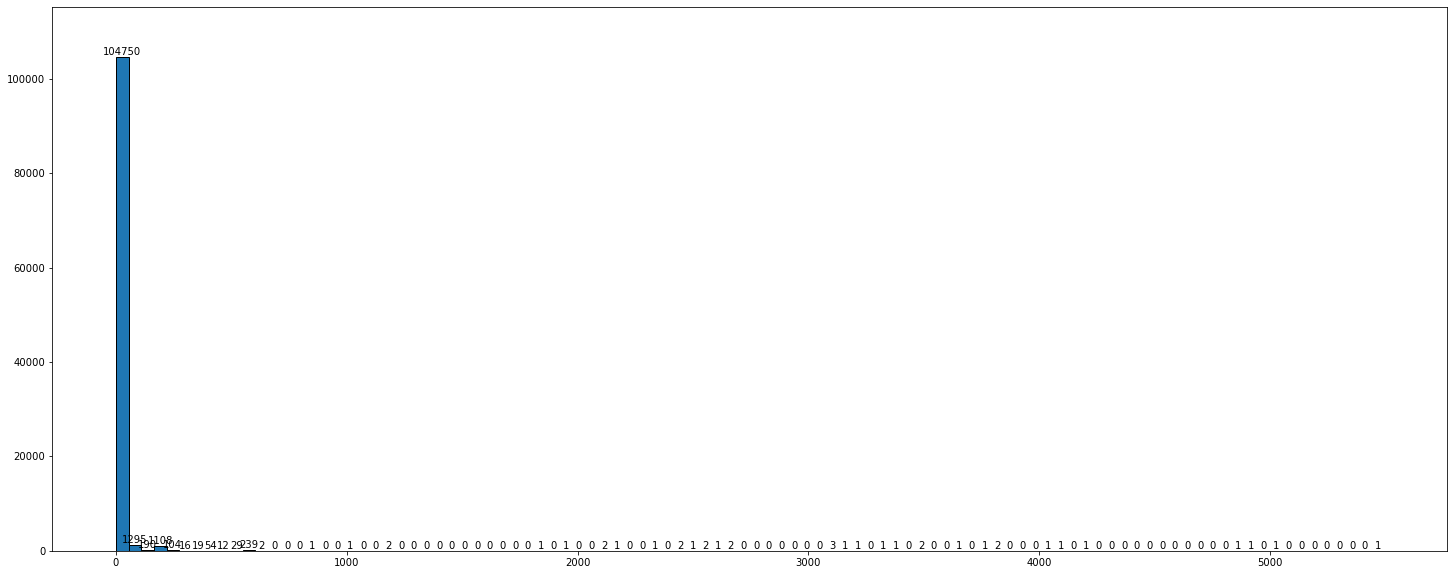

<Figure size 432x288 with 0 Axes>

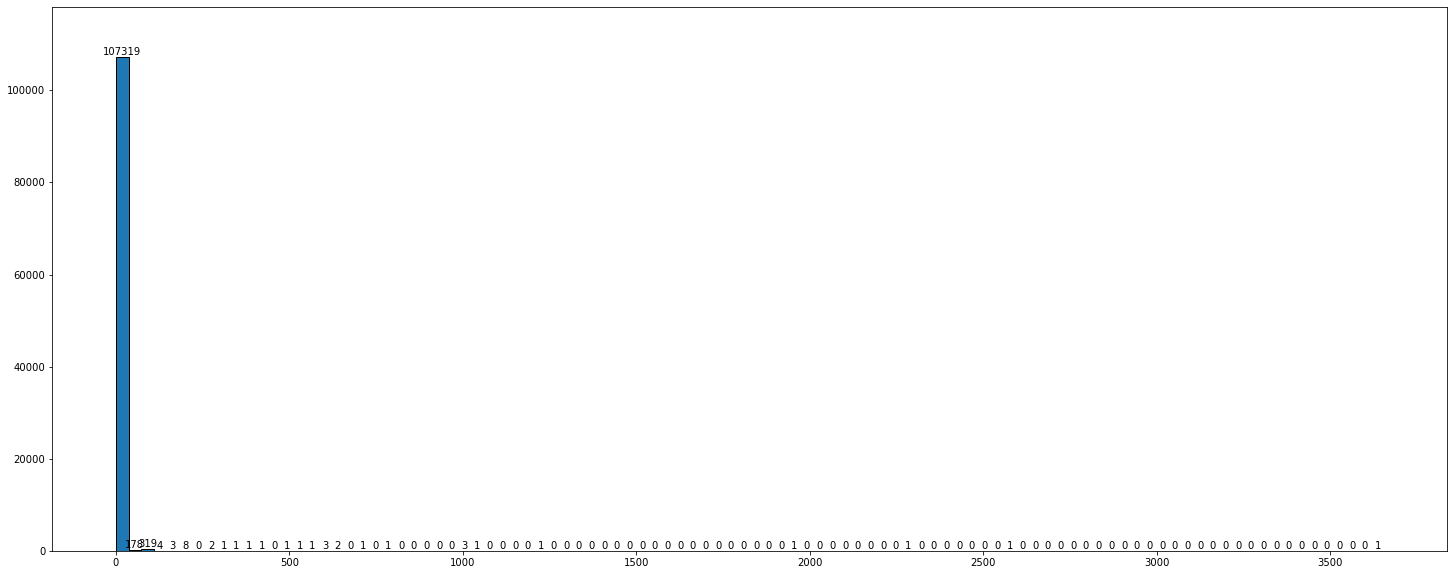

<Figure size 432x288 with 0 Axes>

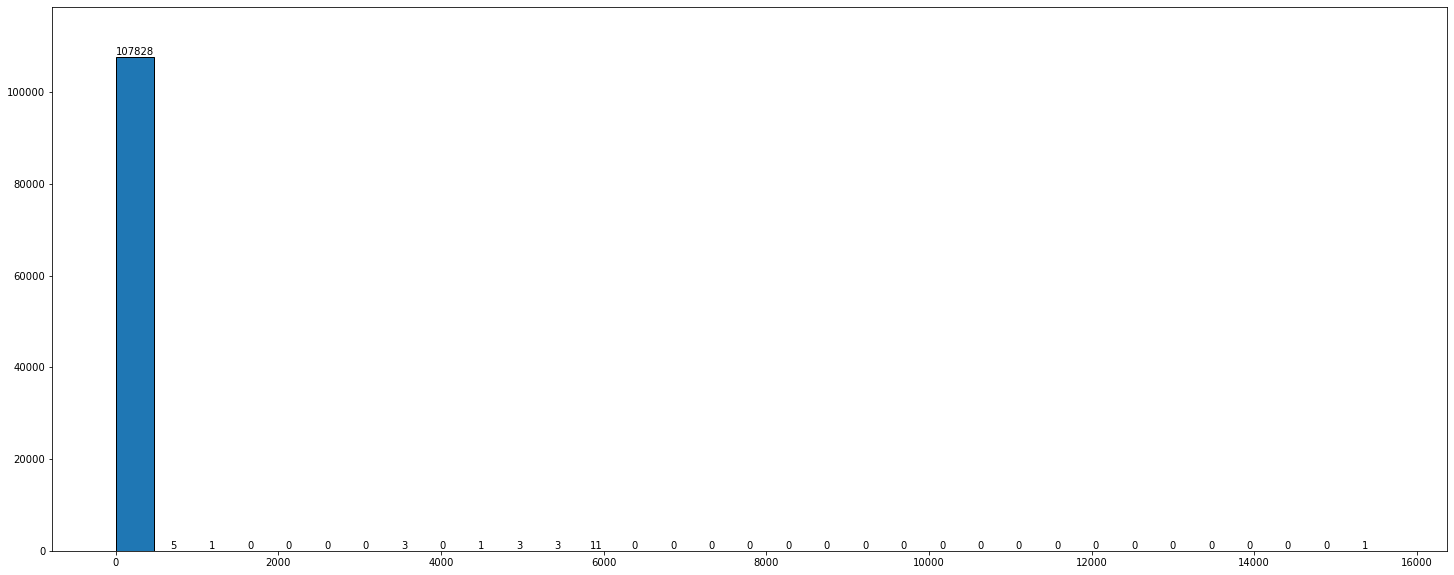

<Figure size 432x288 with 0 Axes>

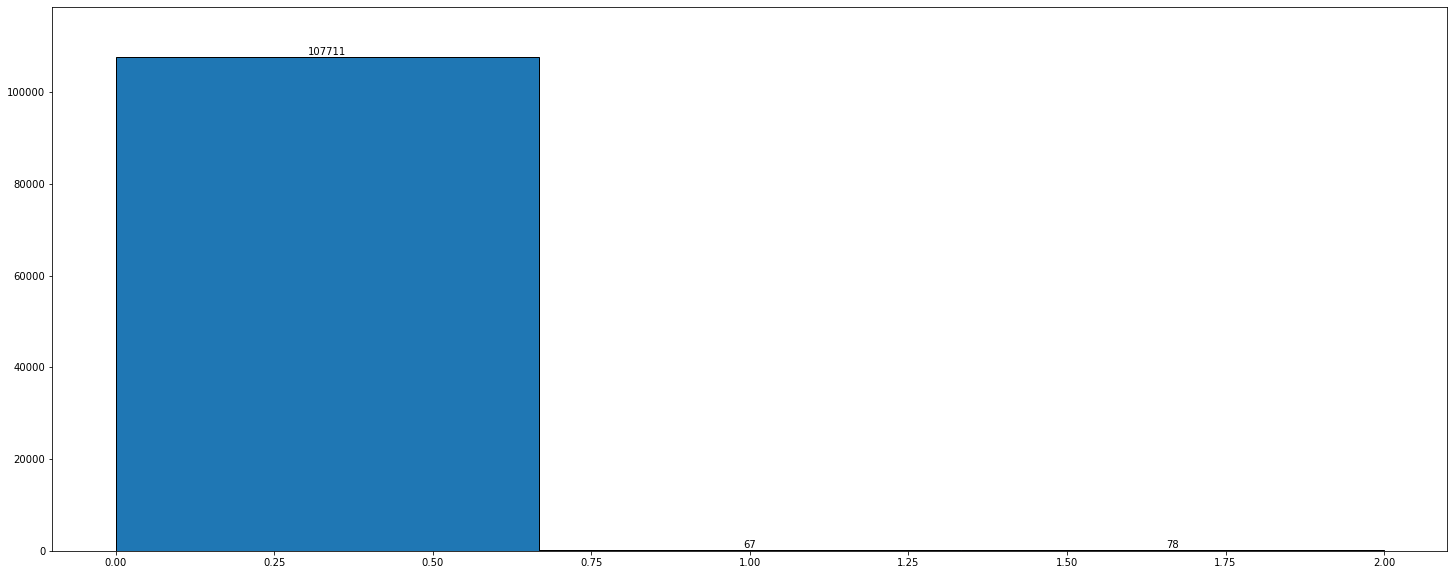

<Figure size 432x288 with 0 Axes>

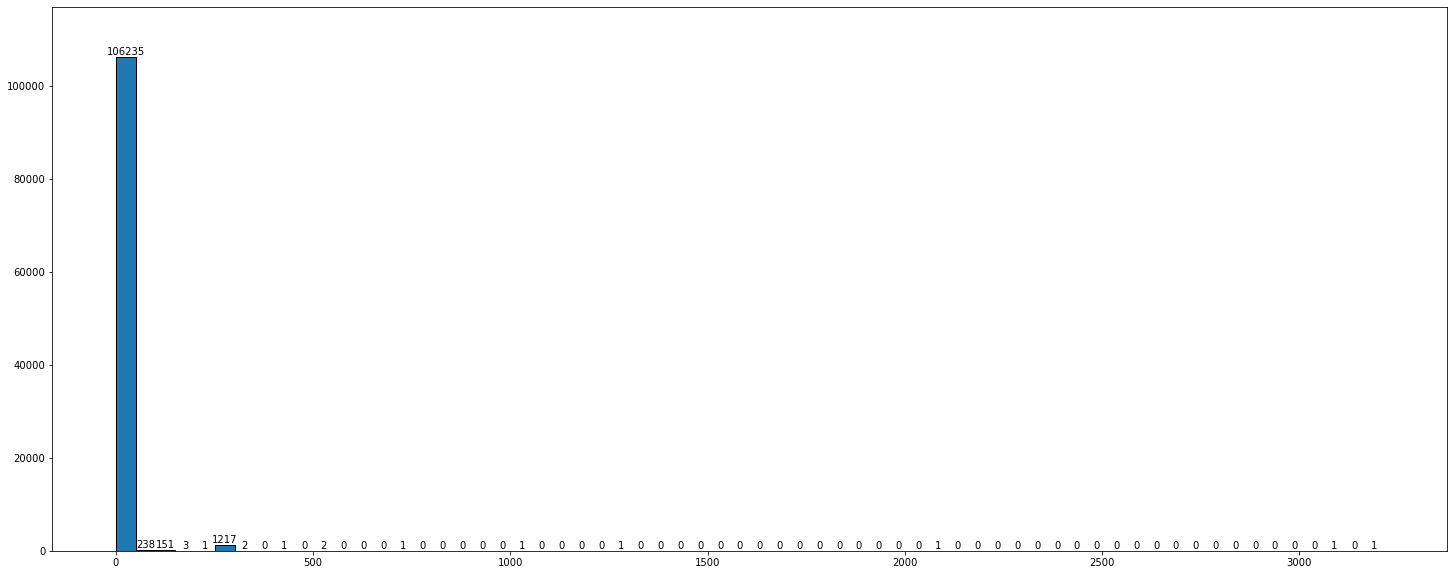

<Figure size 432x288 with 0 Axes>

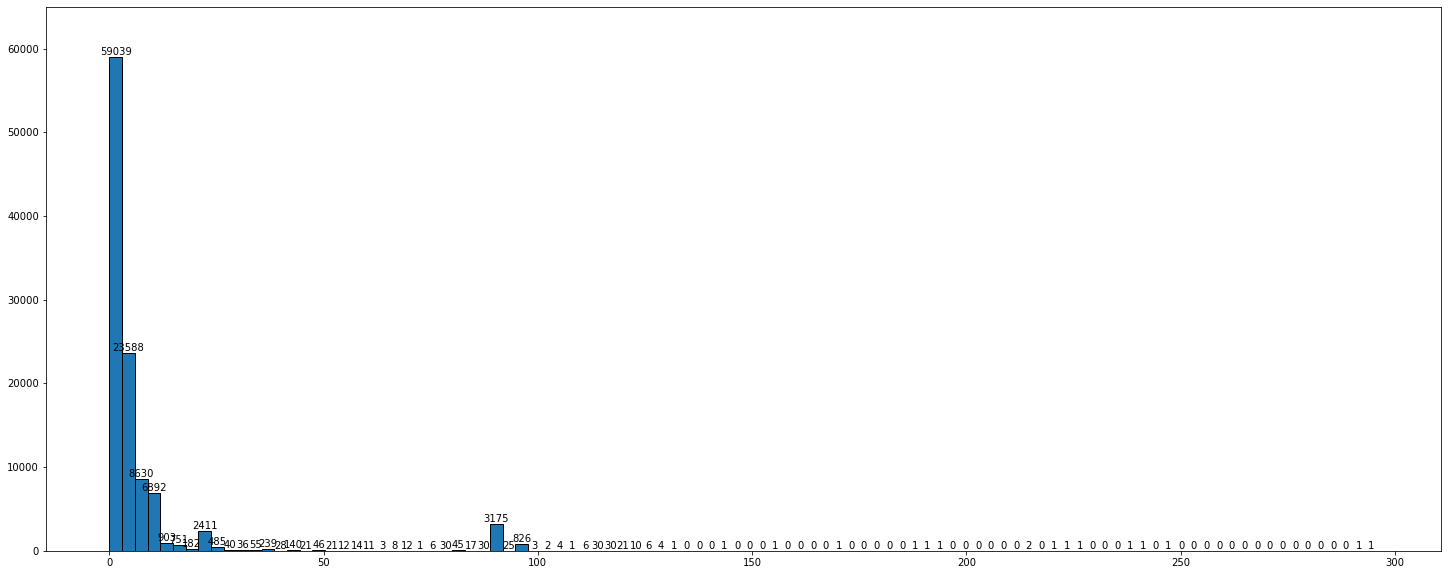

<Figure size 432x288 with 0 Axes>

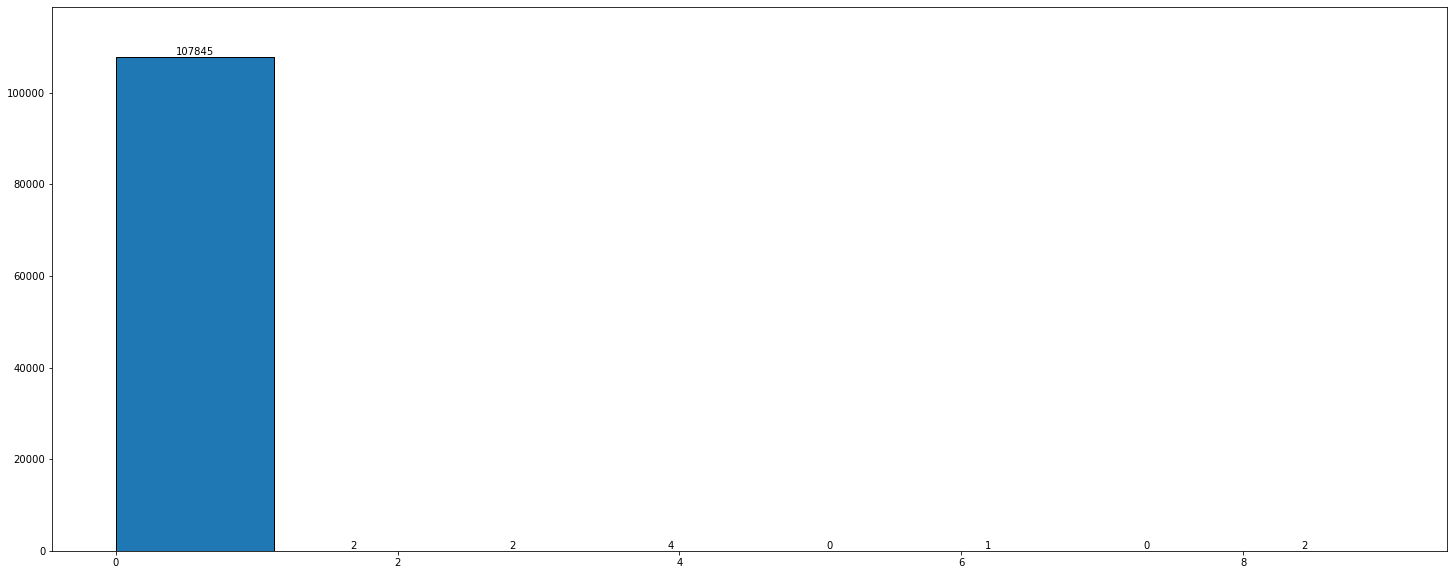

<Figure size 432x288 with 0 Axes>

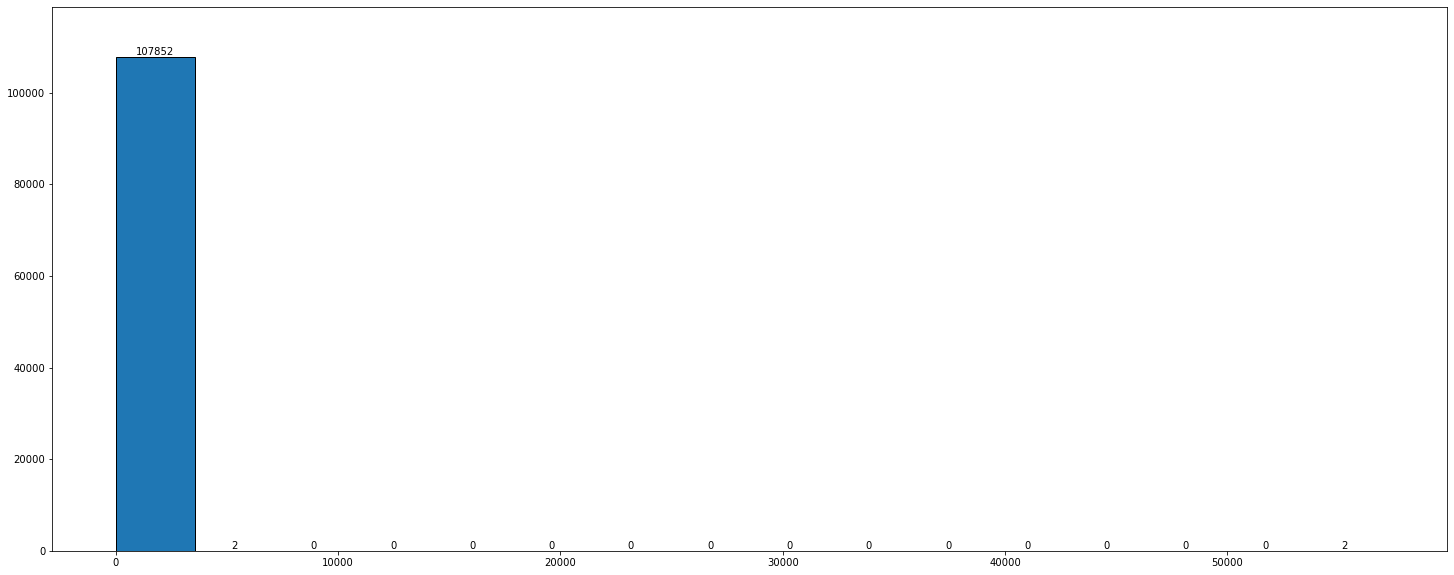

<Figure size 432x288 with 0 Axes>

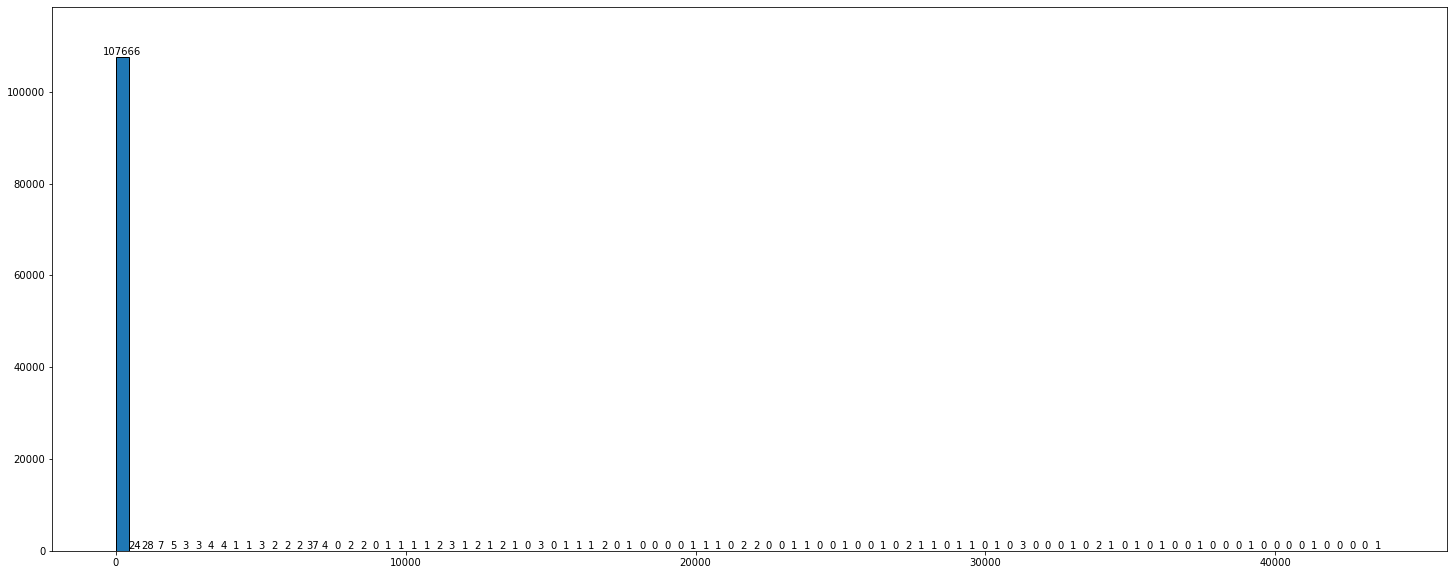

<Figure size 432x288 with 0 Axes>

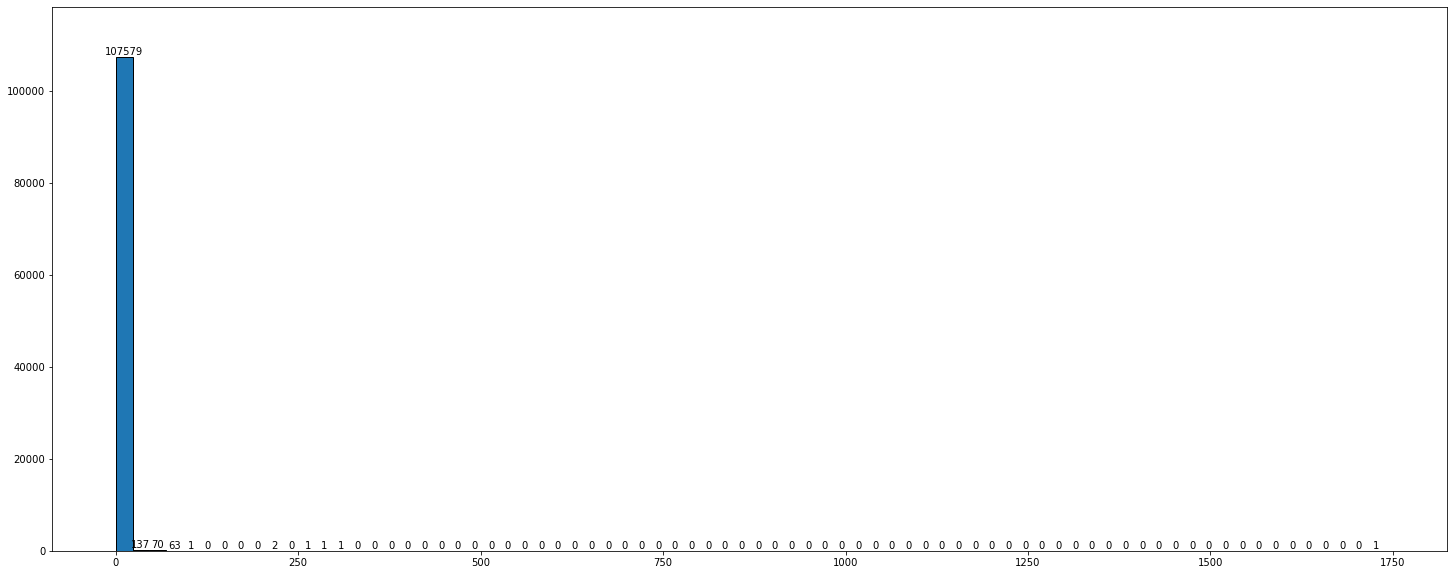

<Figure size 432x288 with 0 Axes>

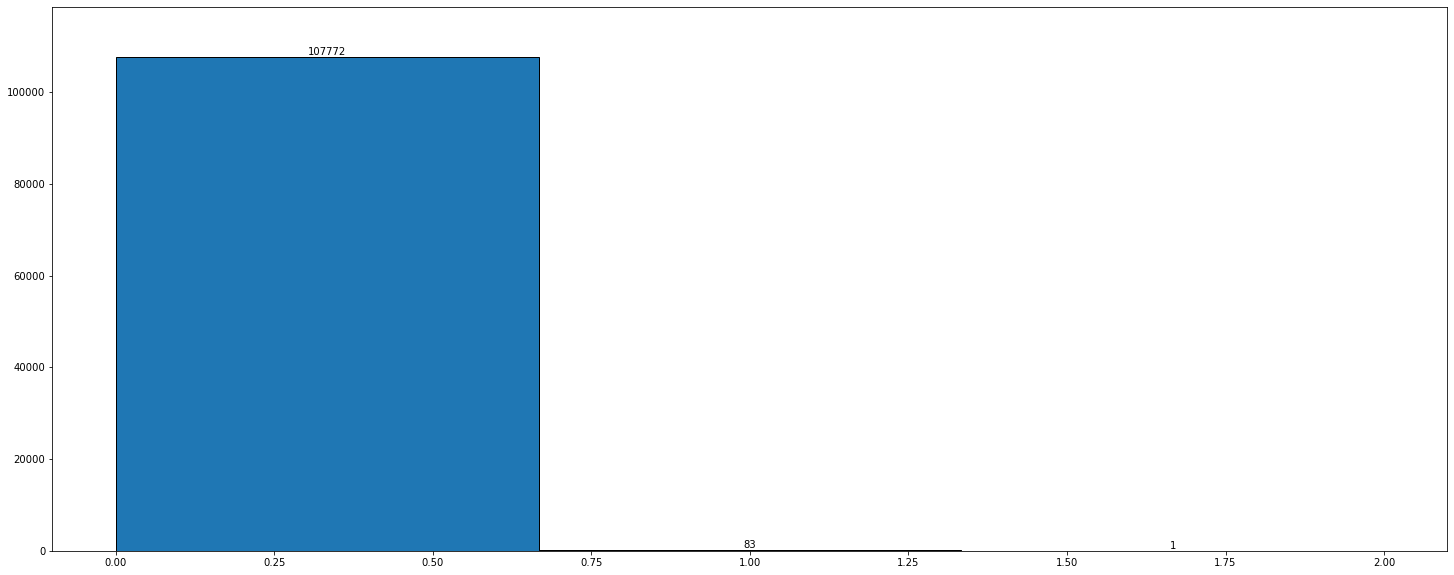

<Figure size 432x288 with 0 Axes>

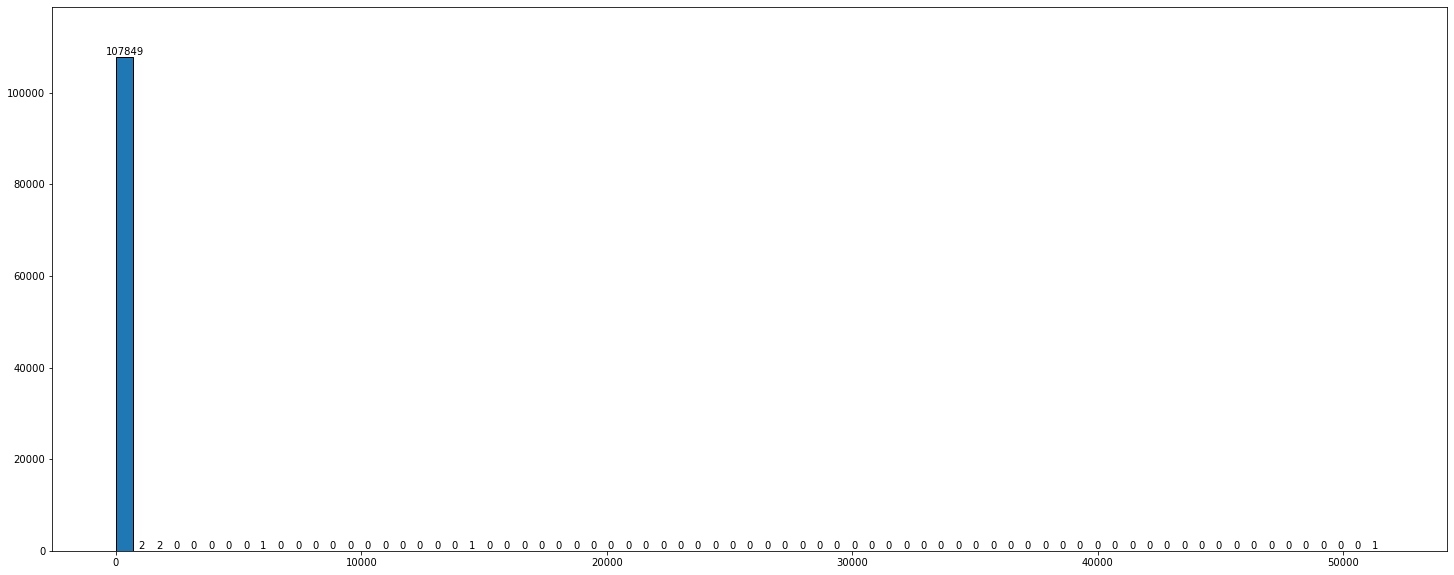

<Figure size 432x288 with 0 Axes>

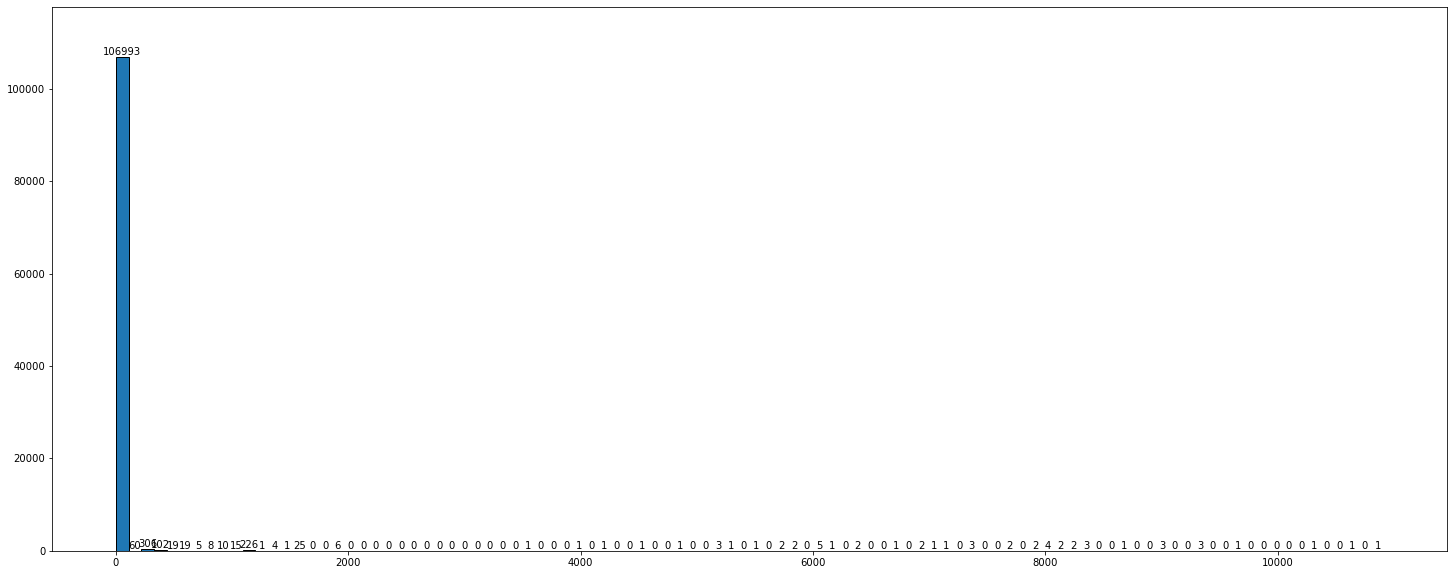

<Figure size 432x288 with 0 Axes>

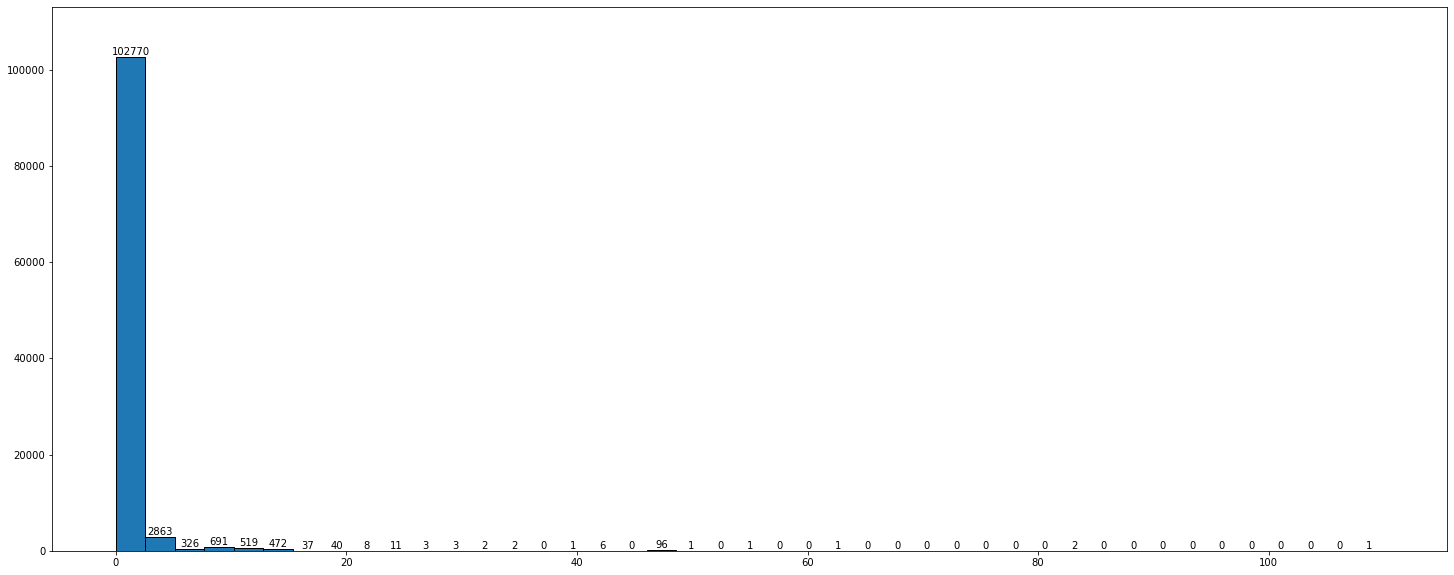

<Figure size 432x288 with 0 Axes>

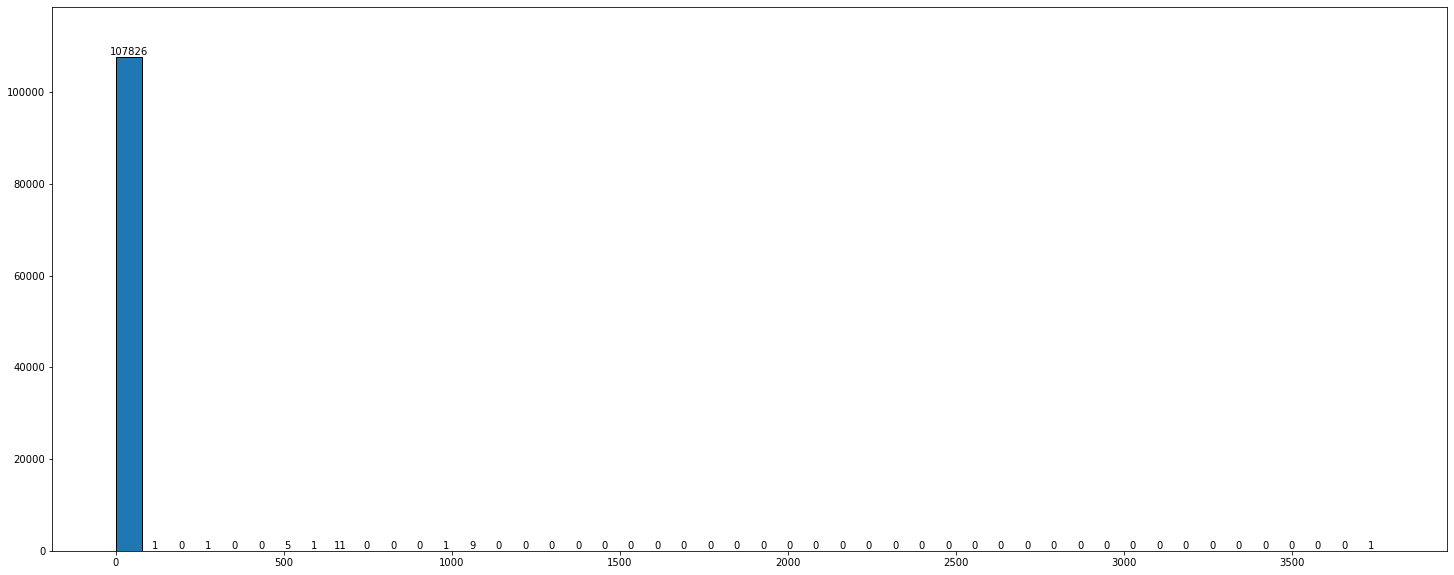

<Figure size 432x288 with 0 Axes>

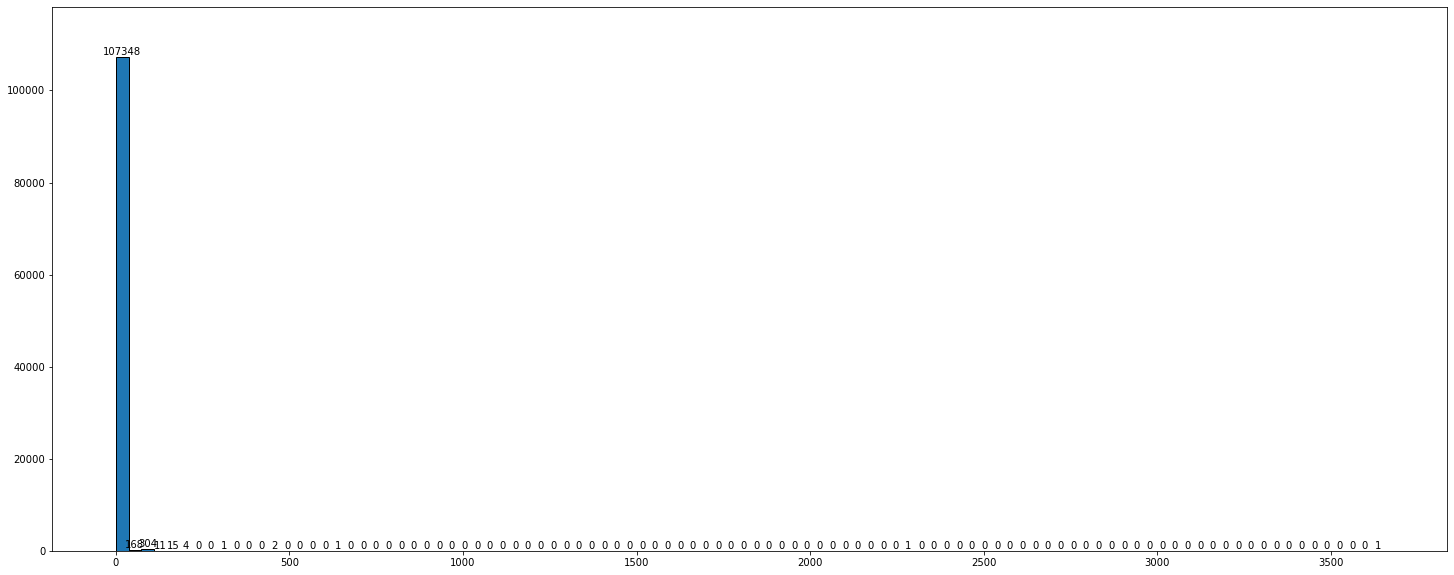

<Figure size 432x288 with 0 Axes>

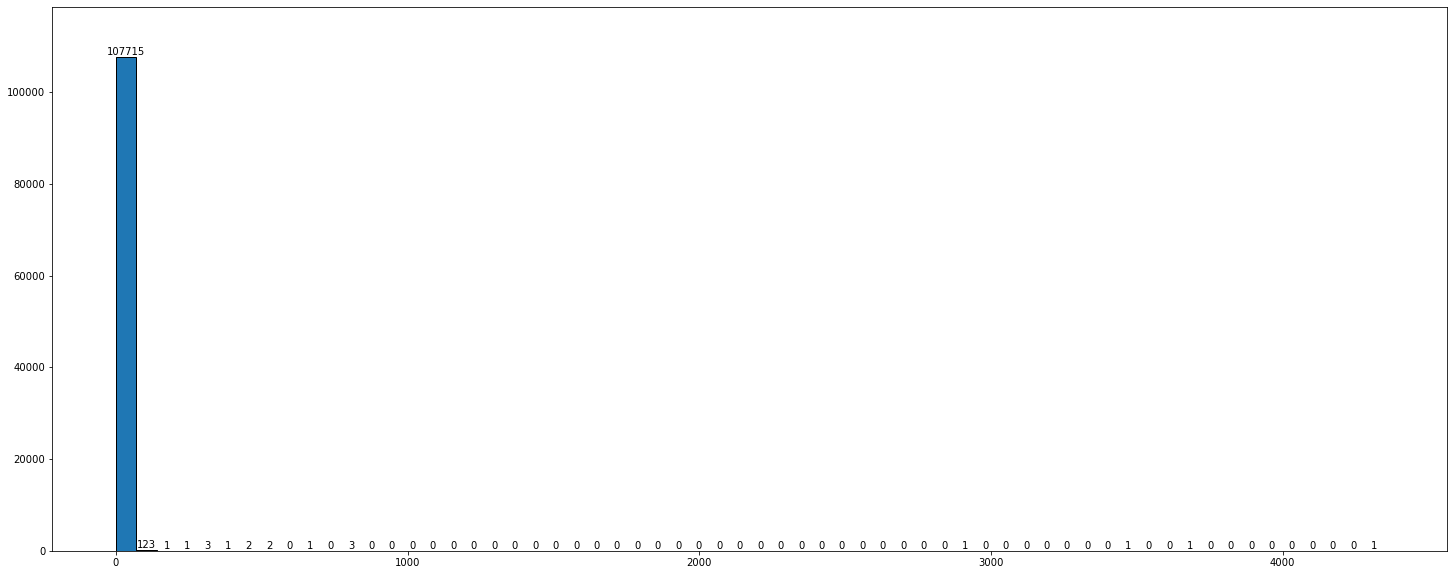

<Figure size 432x288 with 0 Axes>

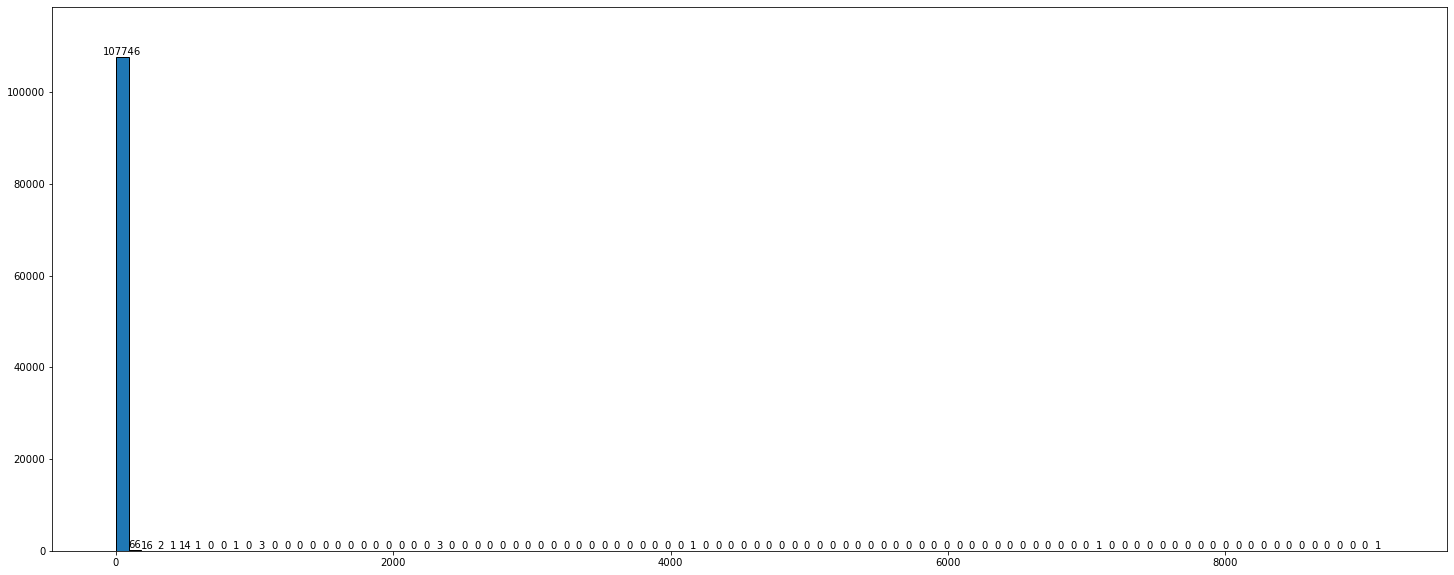

<Figure size 432x288 with 0 Axes>

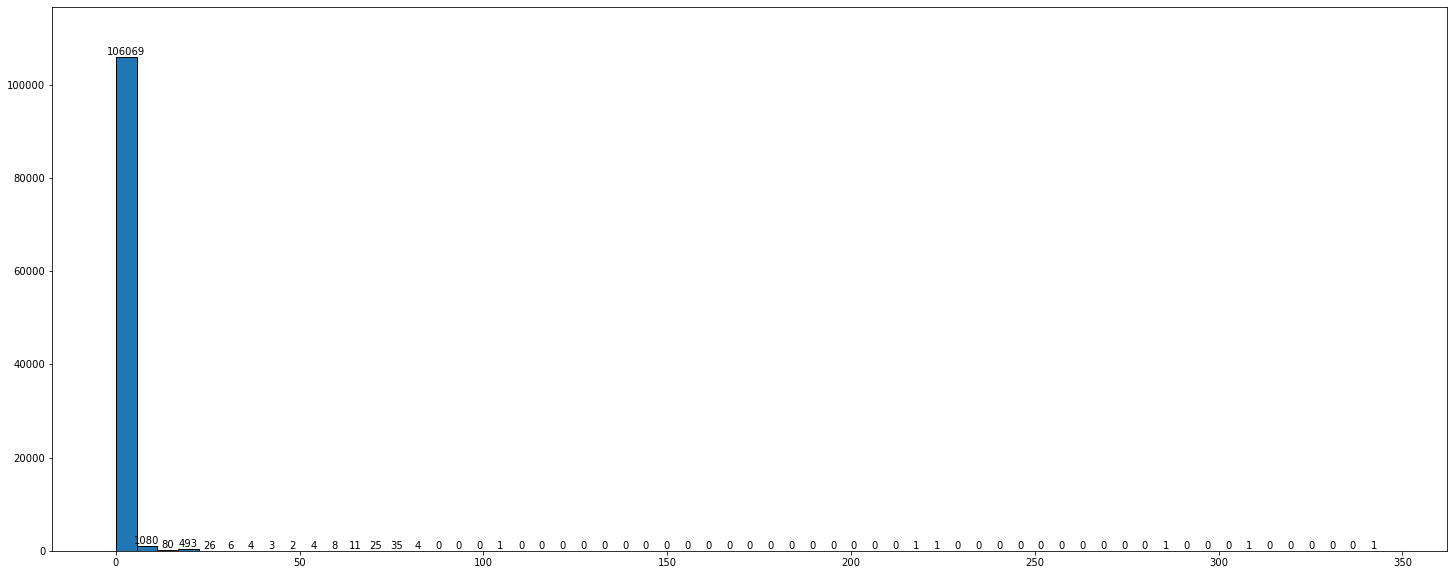

<Figure size 432x288 with 0 Axes>

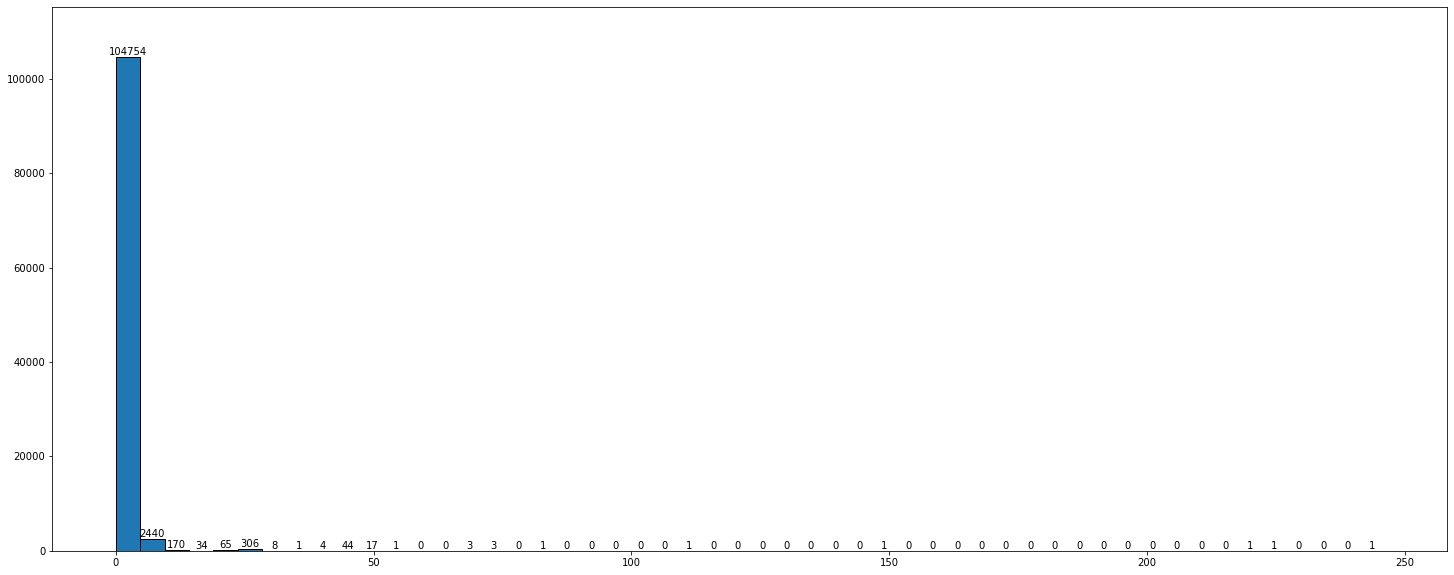

<Figure size 432x288 with 0 Axes>

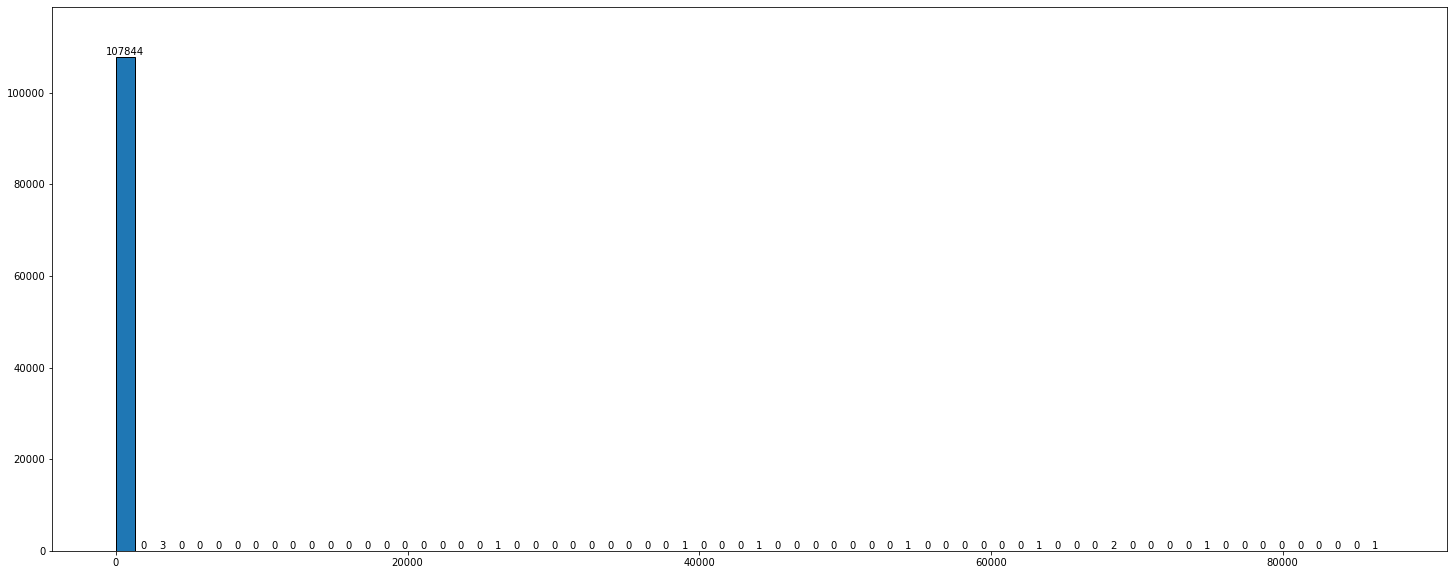

<Figure size 432x288 with 0 Axes>

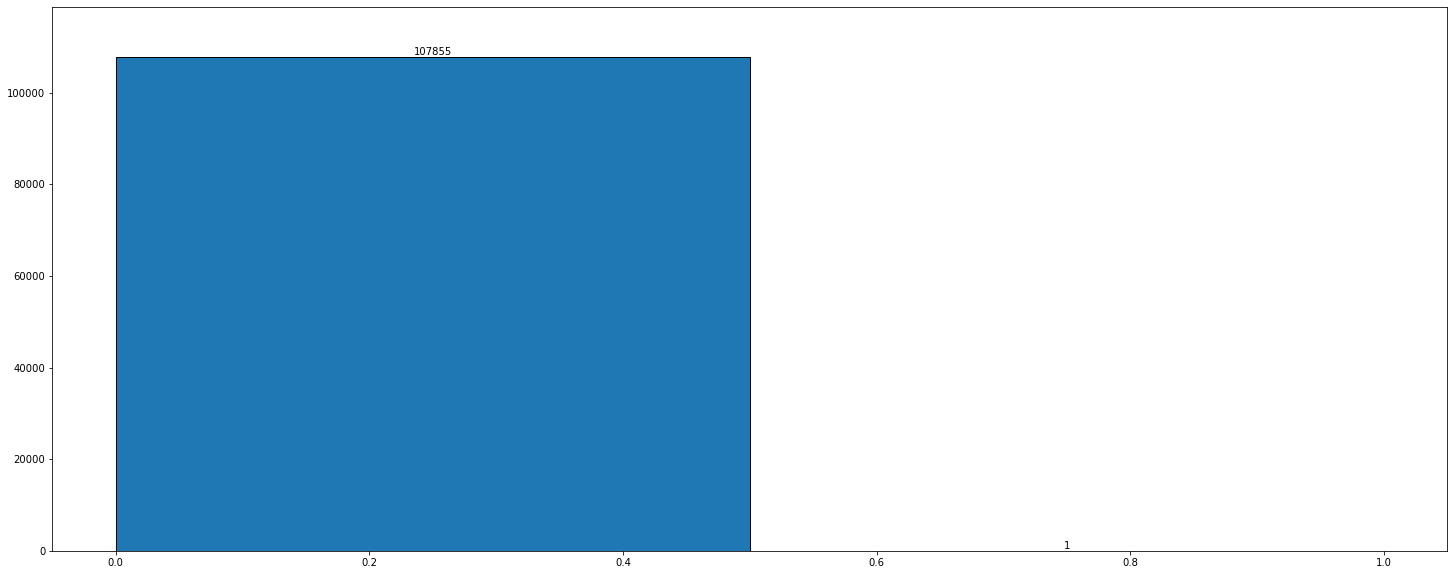

<Figure size 432x288 with 0 Axes>

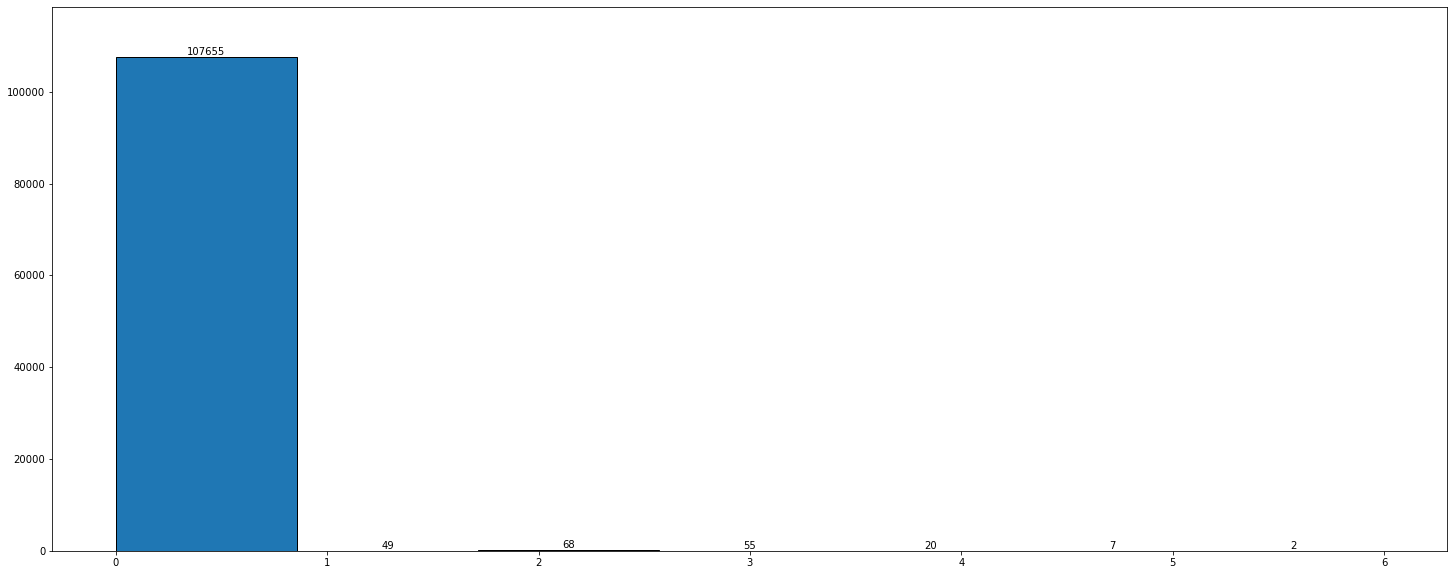

<Figure size 432x288 with 0 Axes>

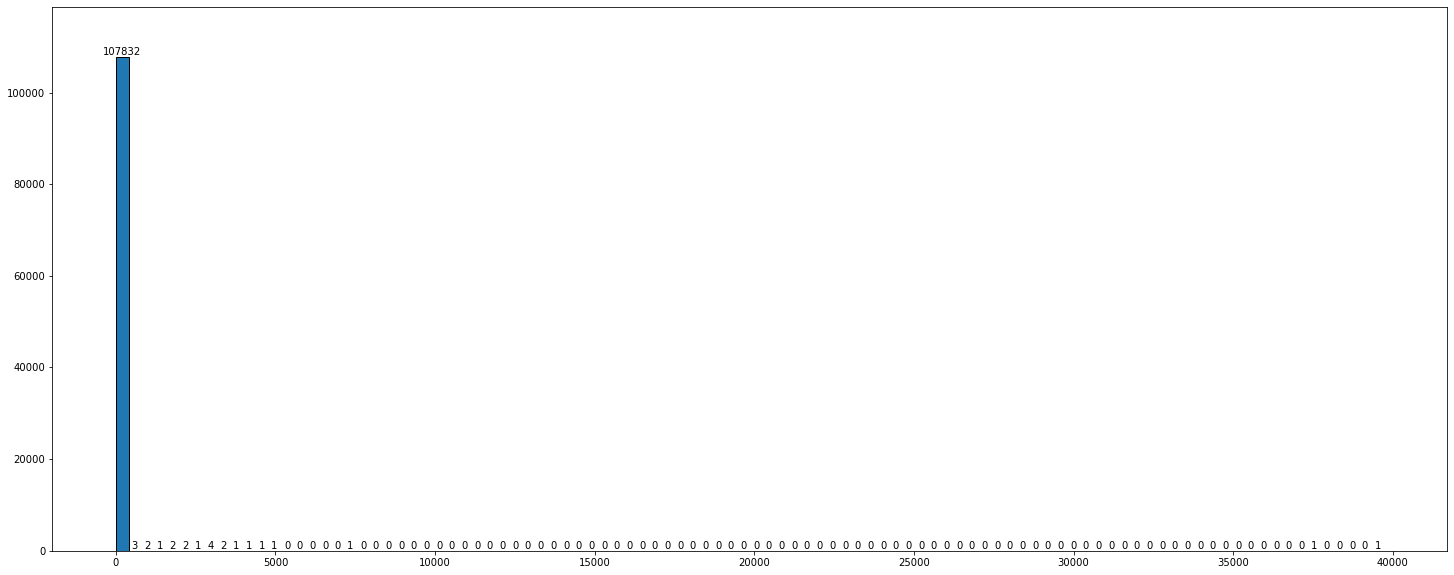

<Figure size 432x288 with 0 Axes>

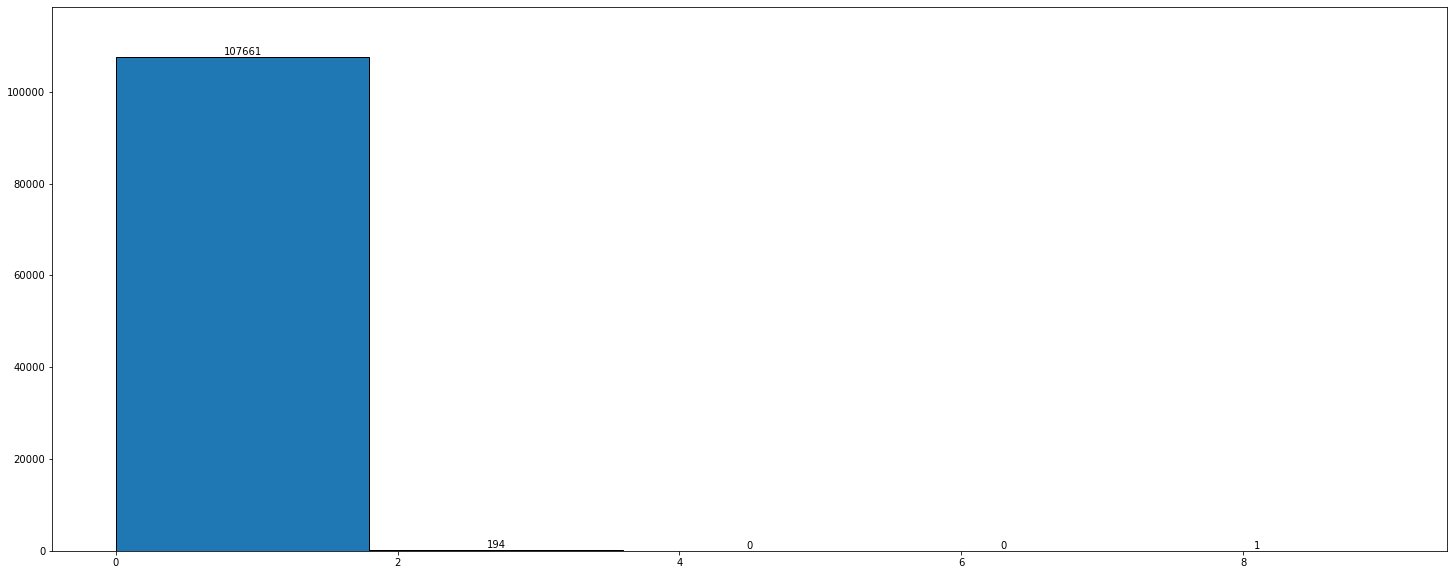

<Figure size 432x288 with 0 Axes>

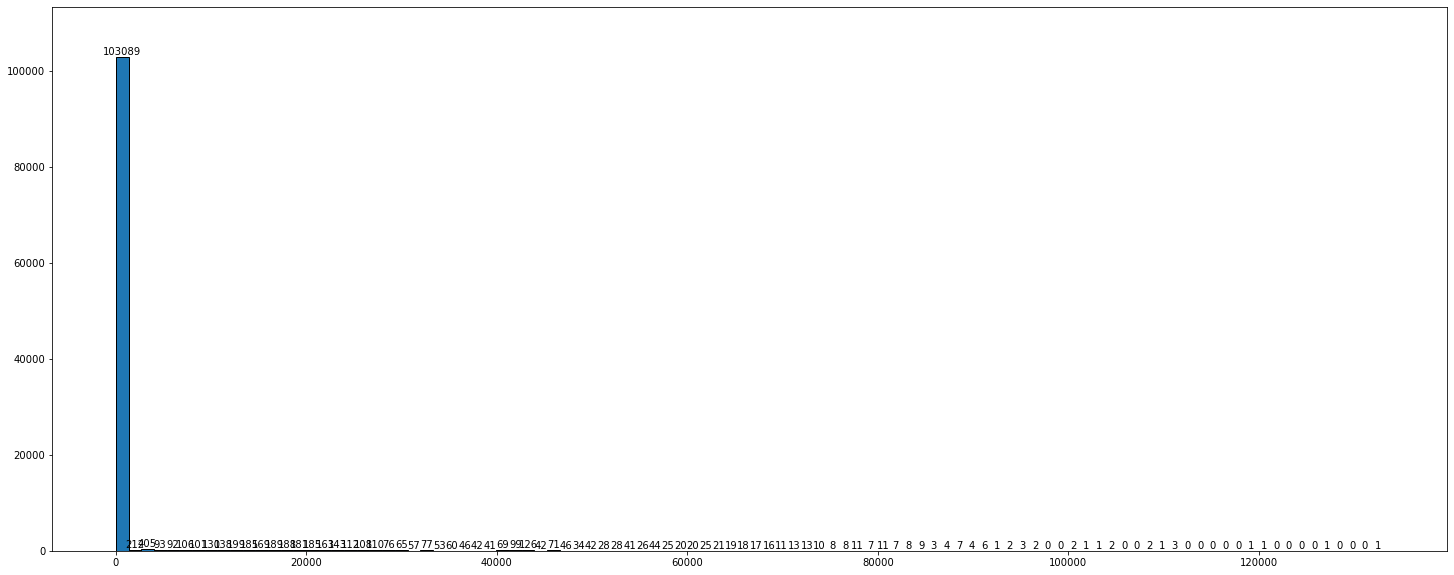

<Figure size 432x288 with 0 Axes>

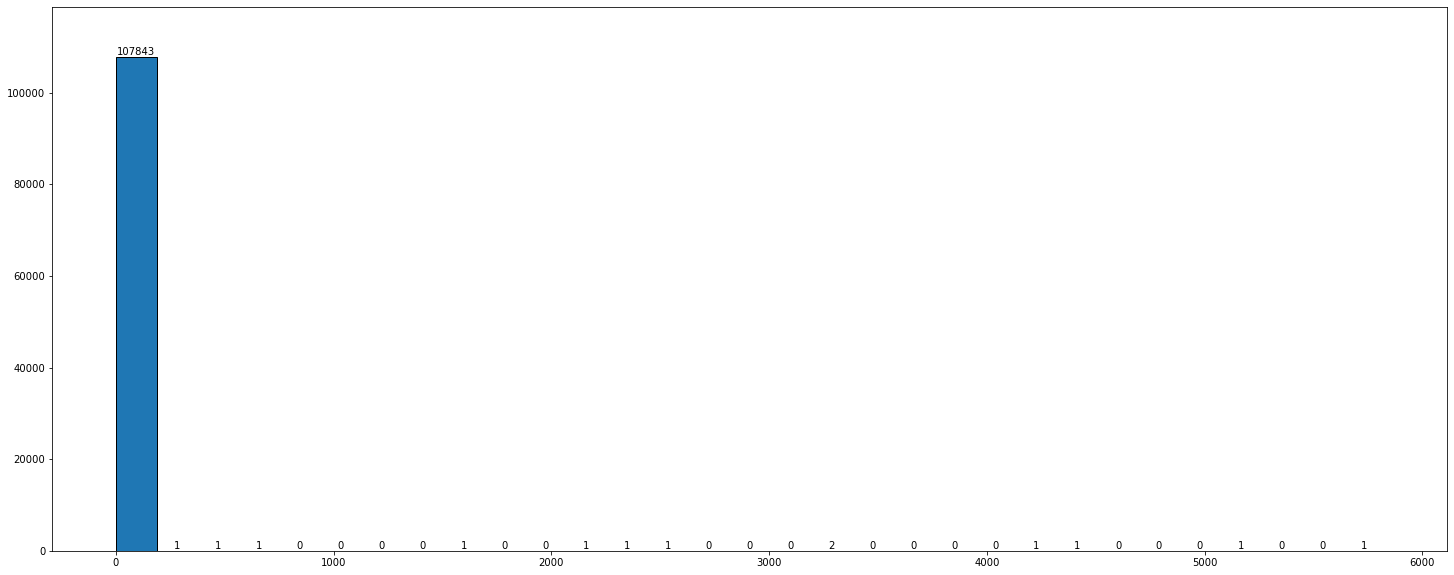

<Figure size 432x288 with 0 Axes>

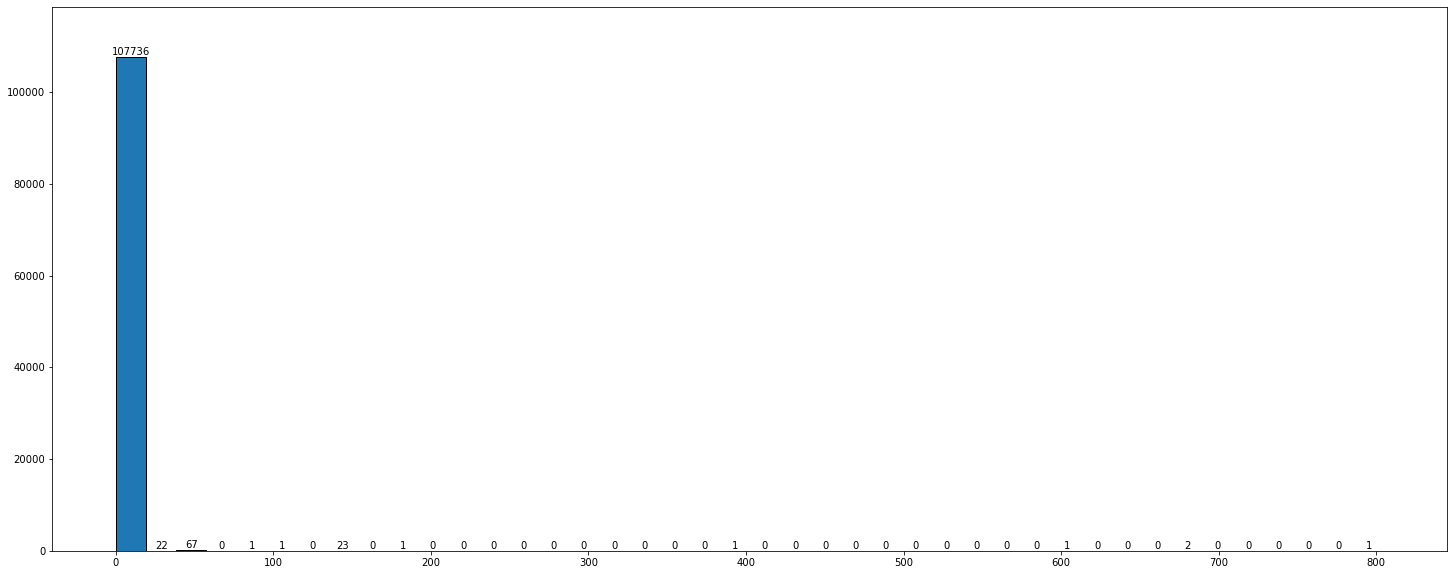

<Figure size 432x288 with 0 Axes>

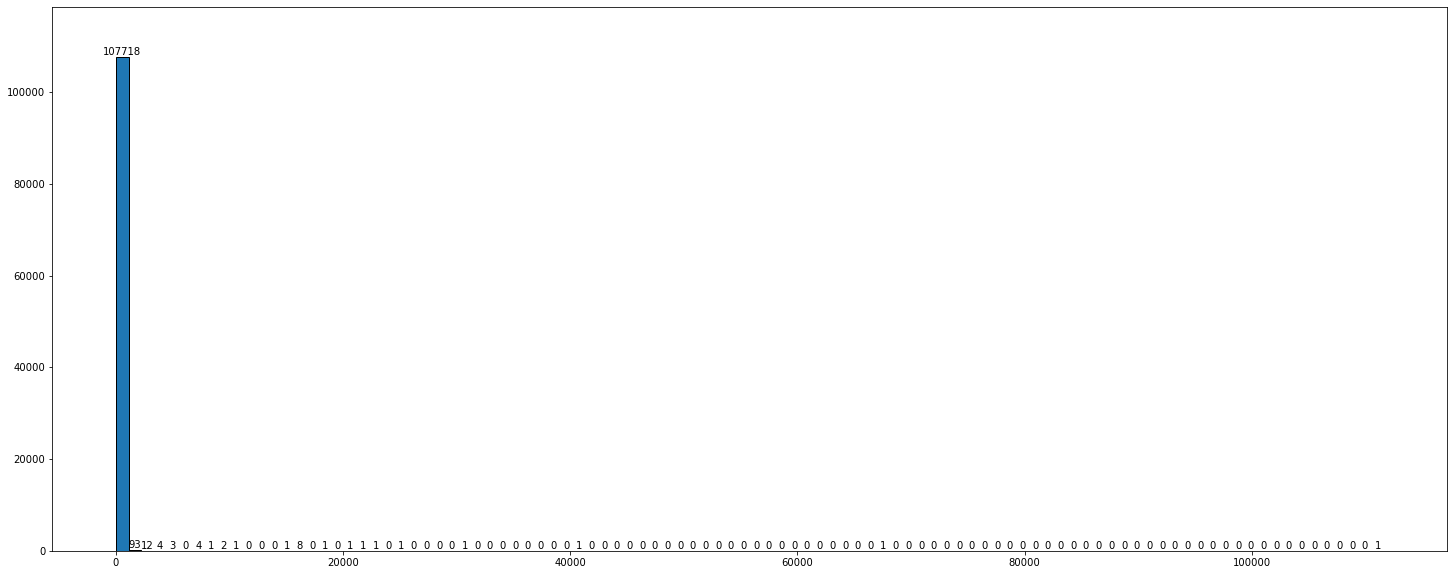

<Figure size 432x288 with 0 Axes>

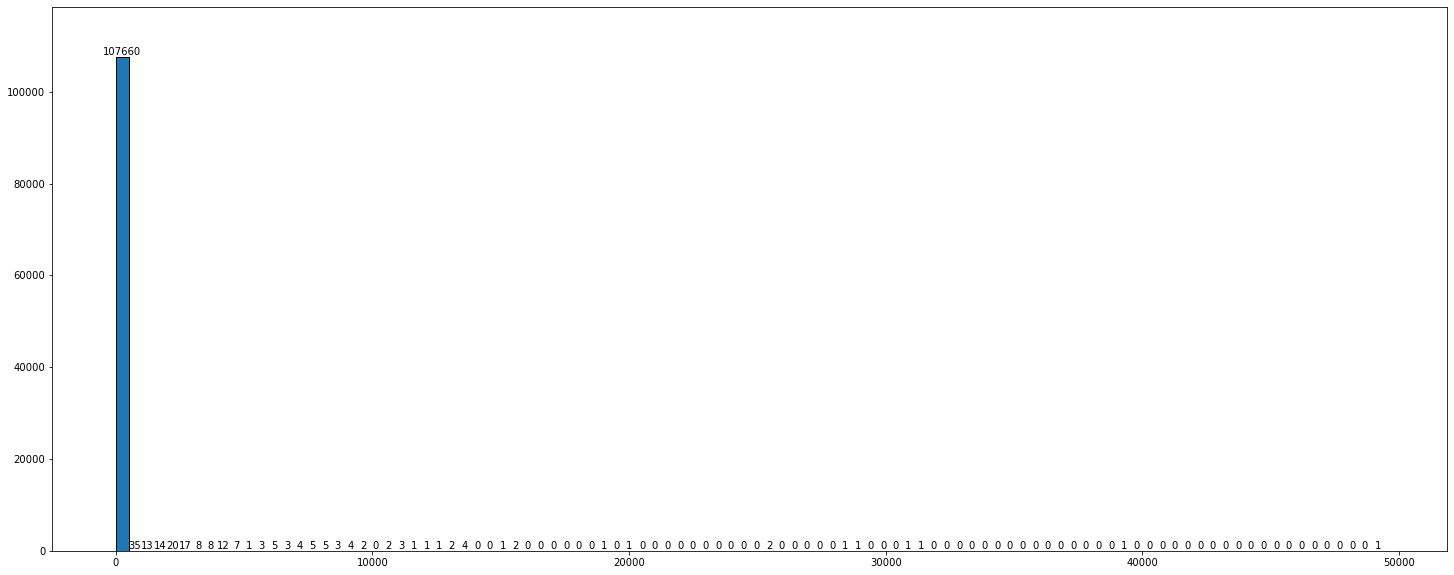

<Figure size 432x288 with 0 Axes>

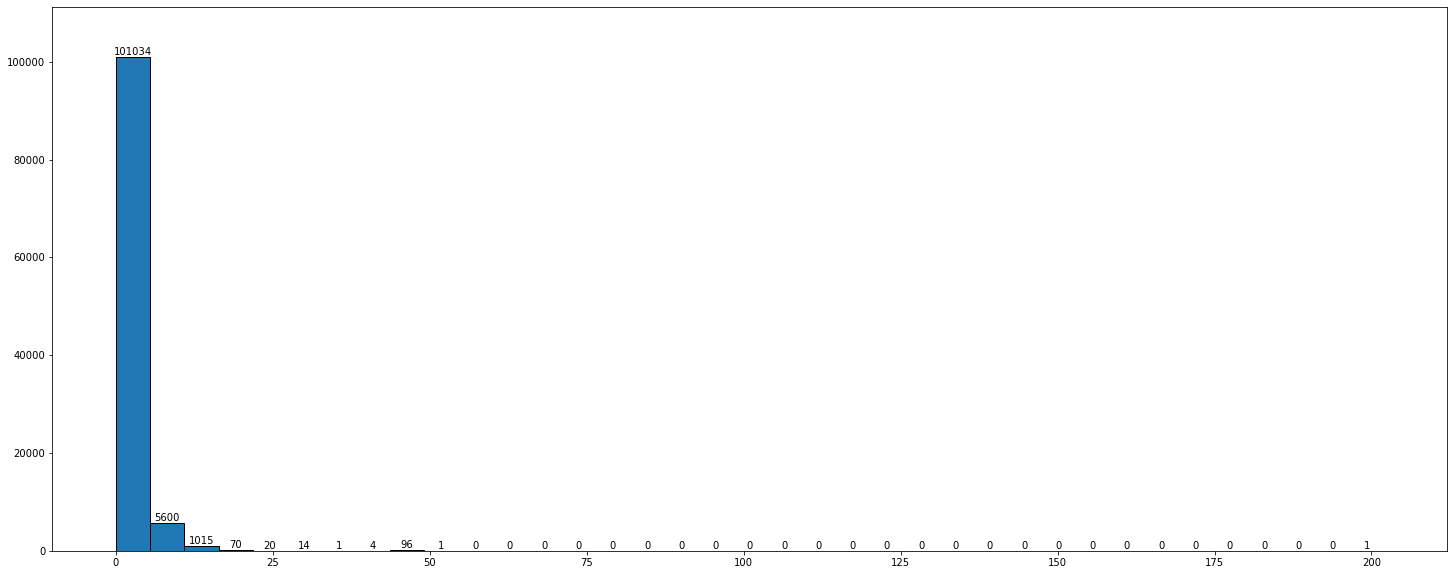

<Figure size 432x288 with 0 Axes>

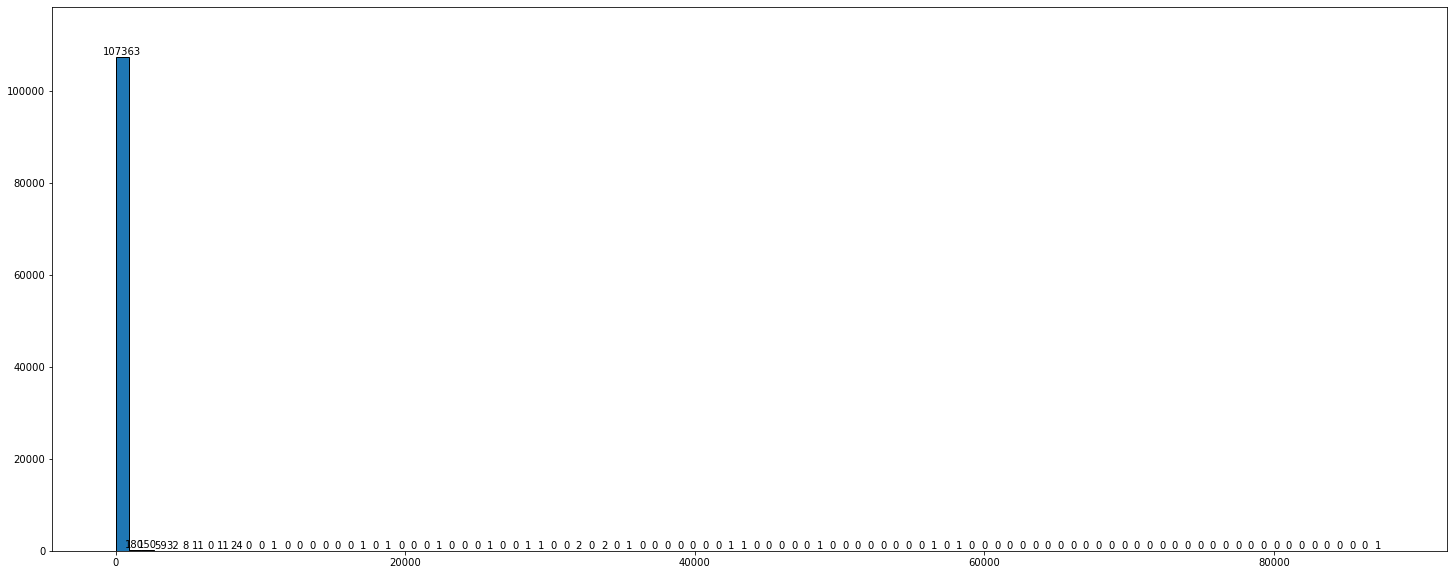

<Figure size 432x288 with 0 Axes>

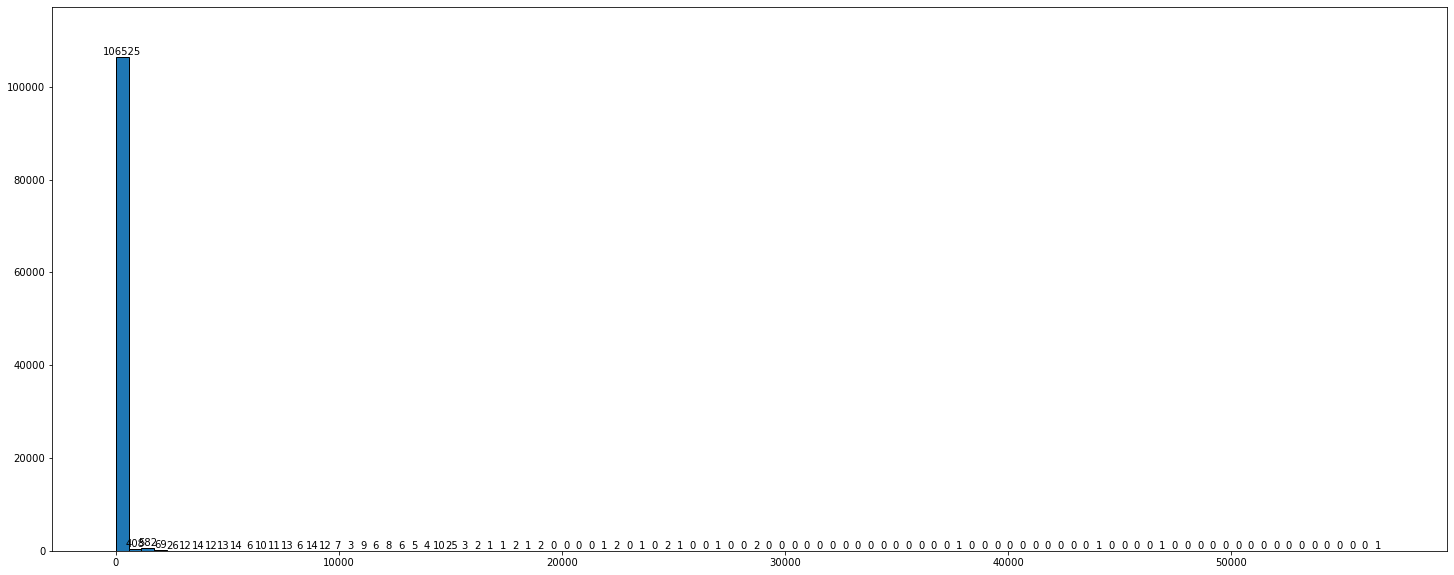

<Figure size 432x288 with 0 Axes>

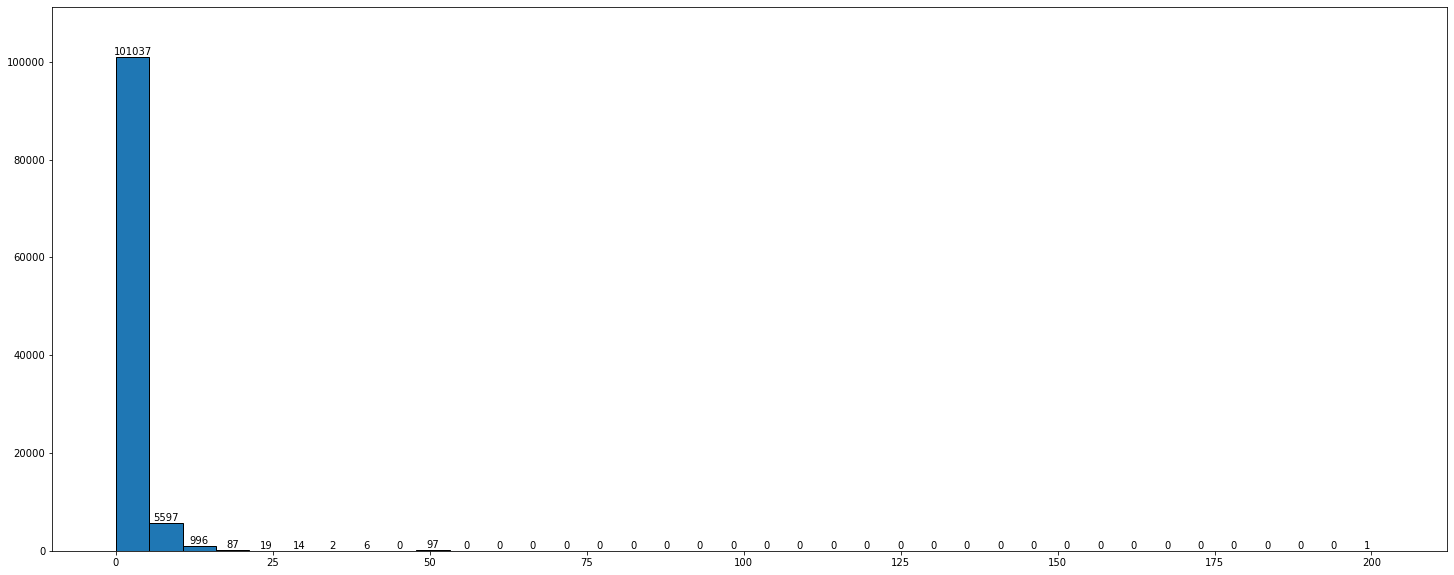

<Figure size 432x288 with 0 Axes>

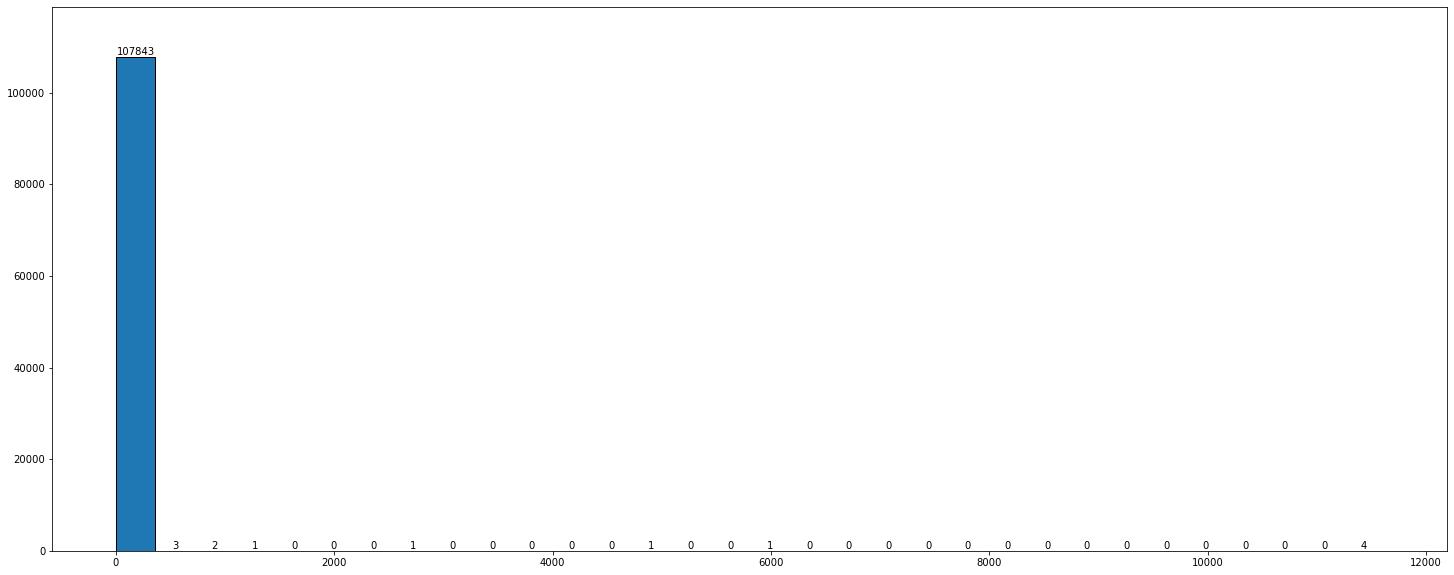

<Figure size 432x288 with 0 Axes>

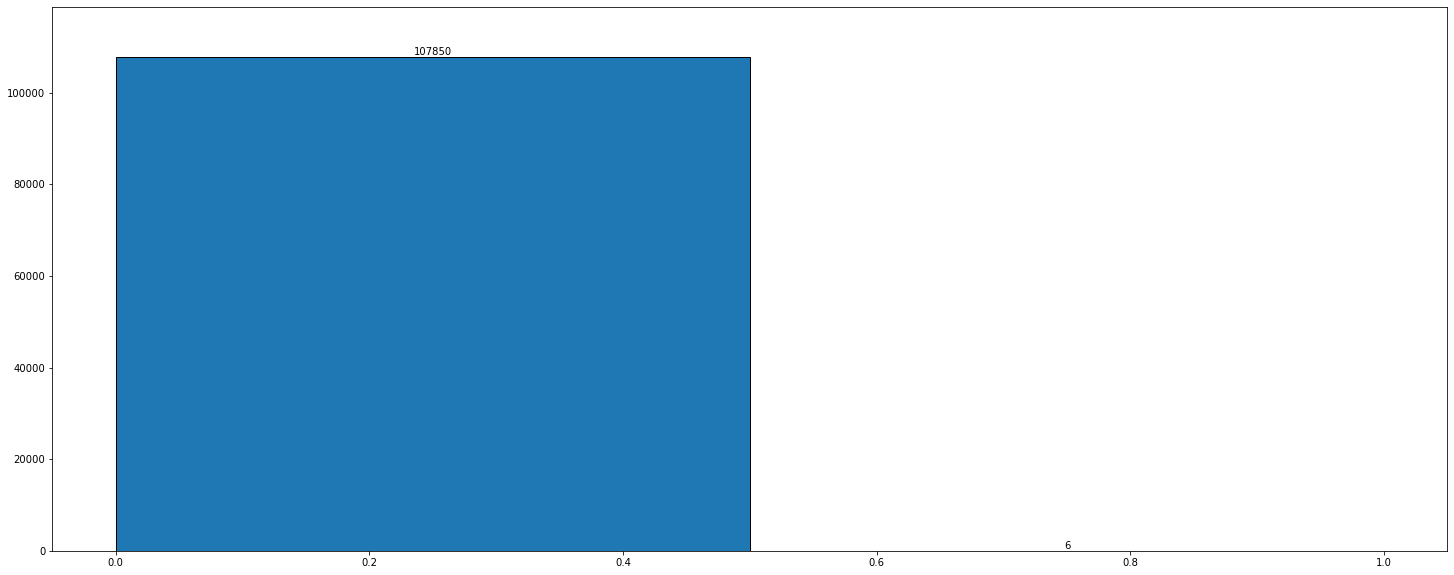

<Figure size 432x288 with 0 Axes>

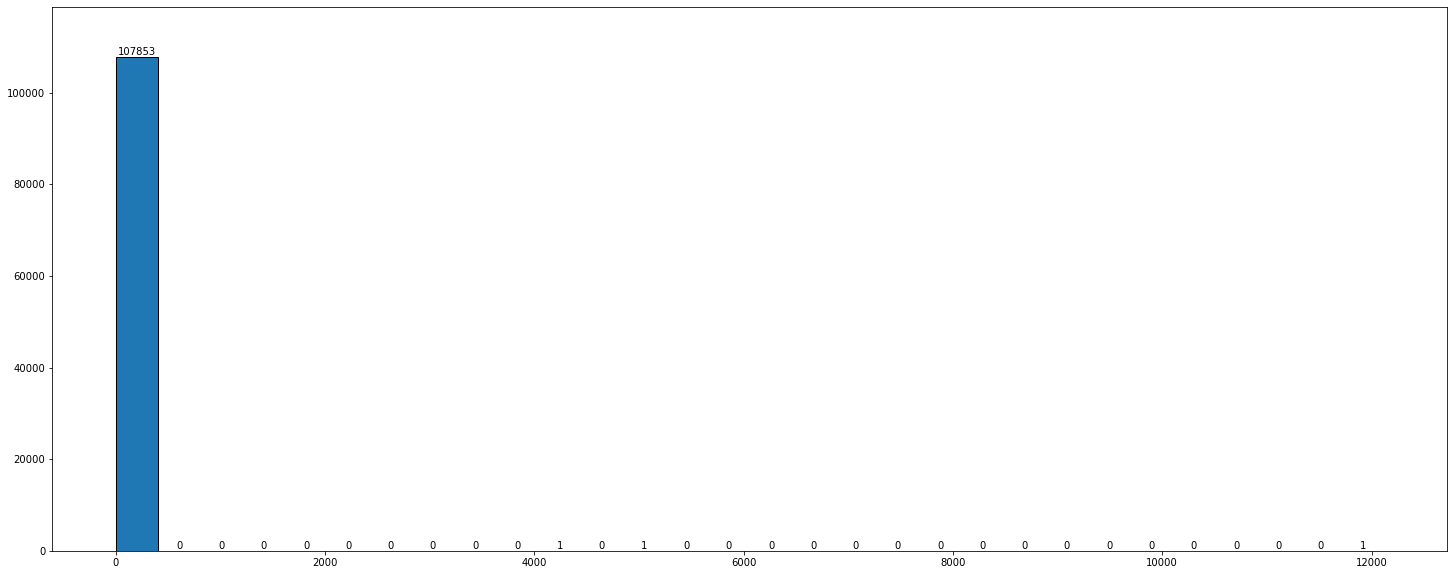

<Figure size 432x288 with 0 Axes>

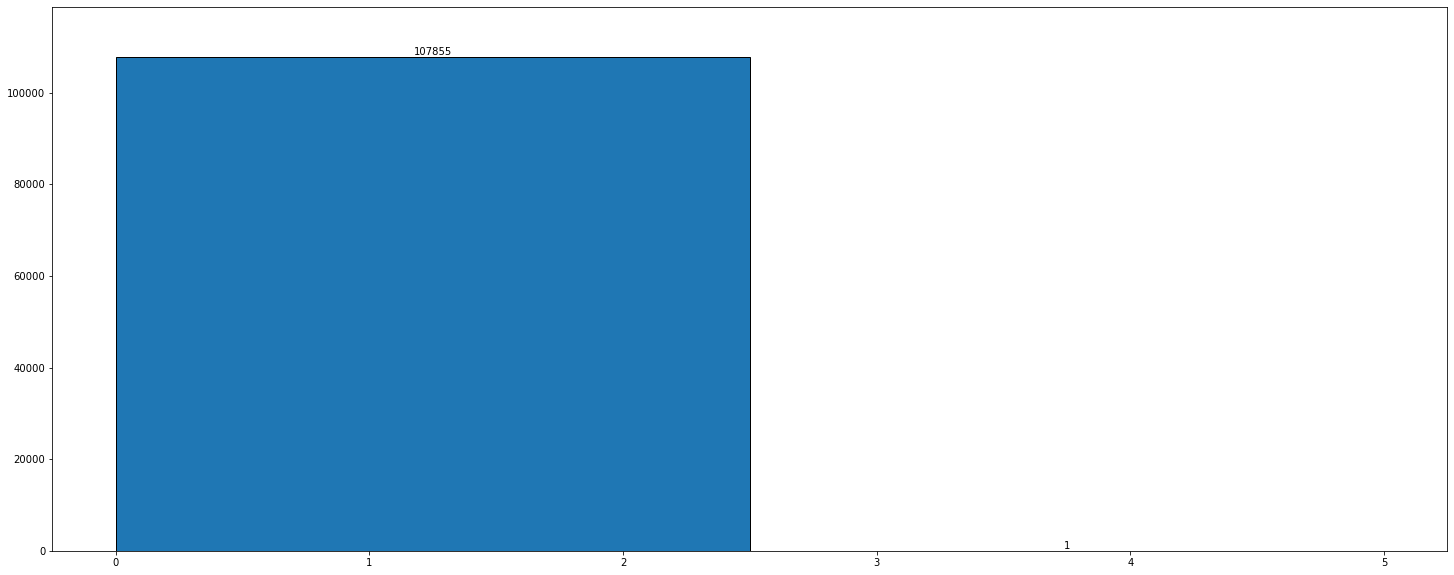

<Figure size 432x288 with 0 Axes>

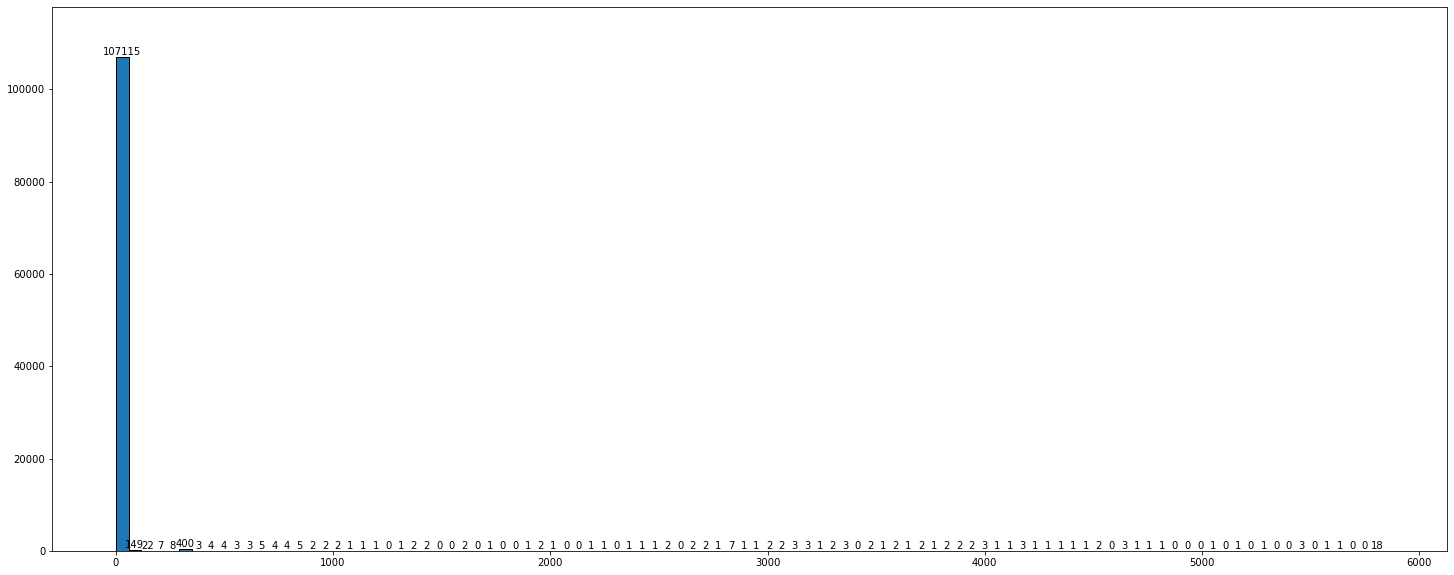

<Figure size 432x288 with 0 Axes>

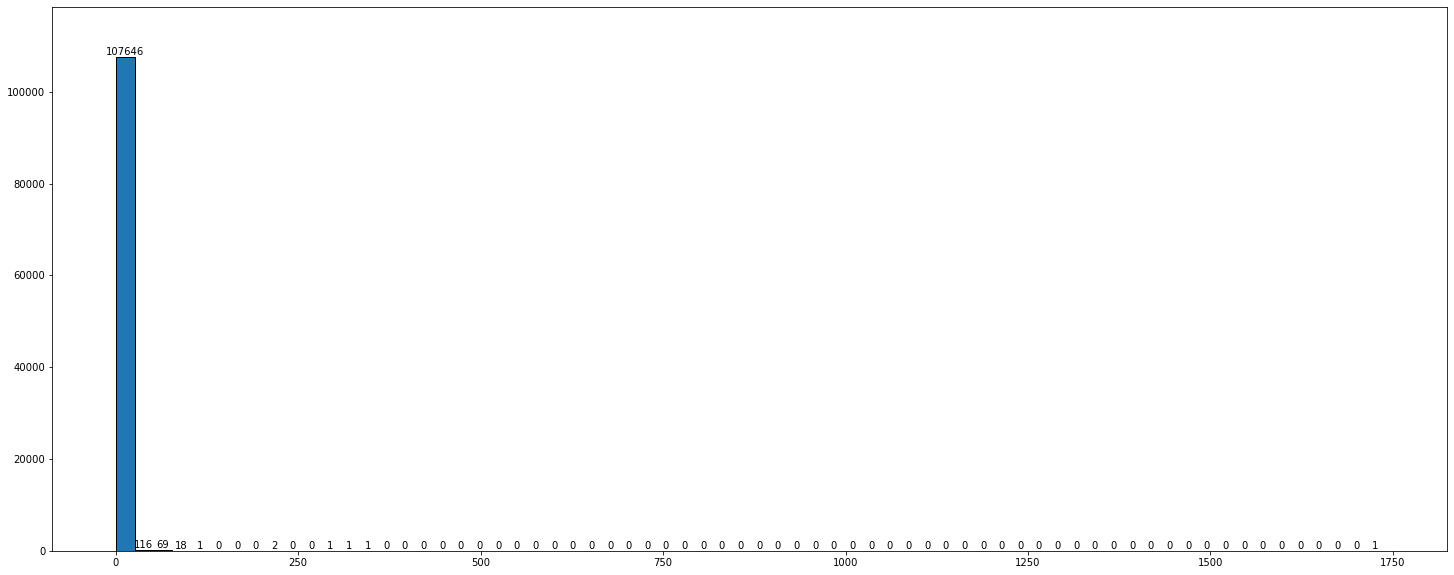

<Figure size 432x288 with 0 Axes>

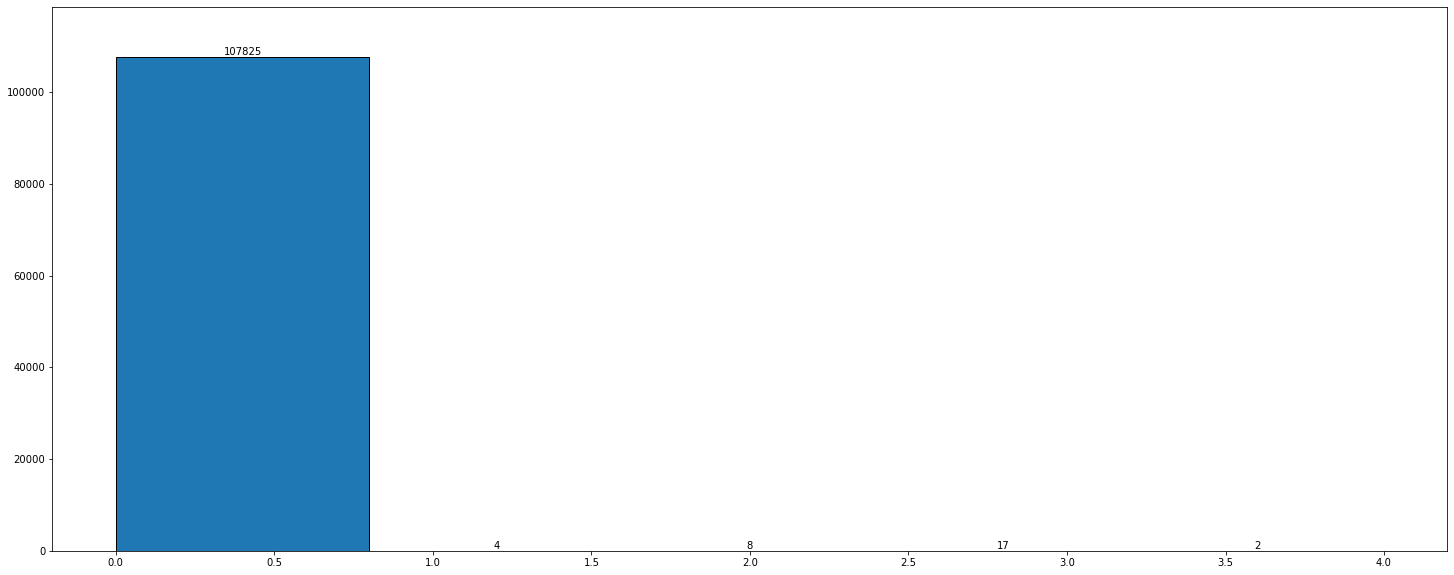

<Figure size 432x288 with 0 Axes>

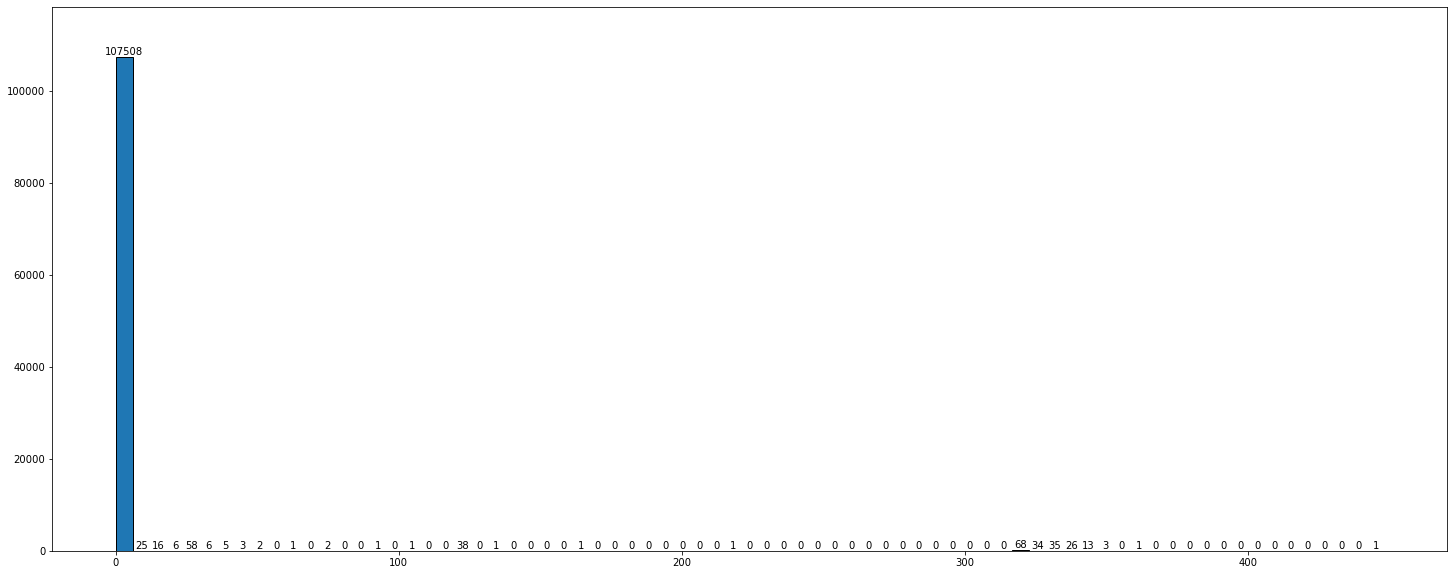

<Figure size 432x288 with 0 Axes>

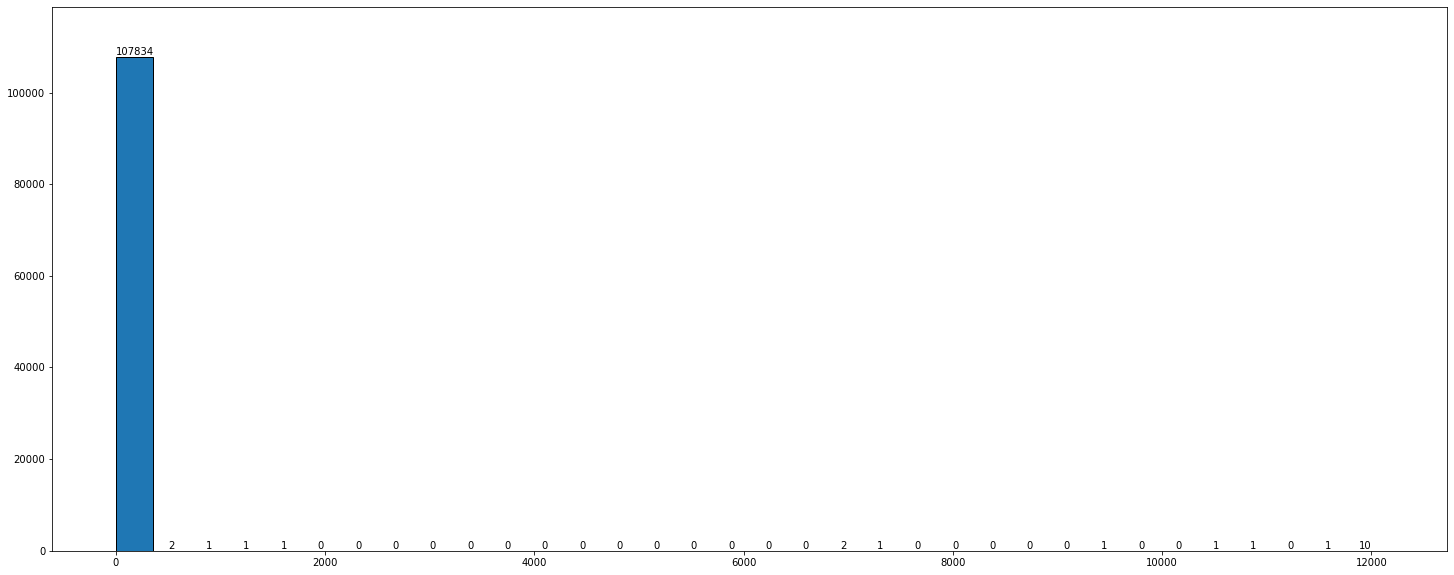

<Figure size 432x288 with 0 Axes>

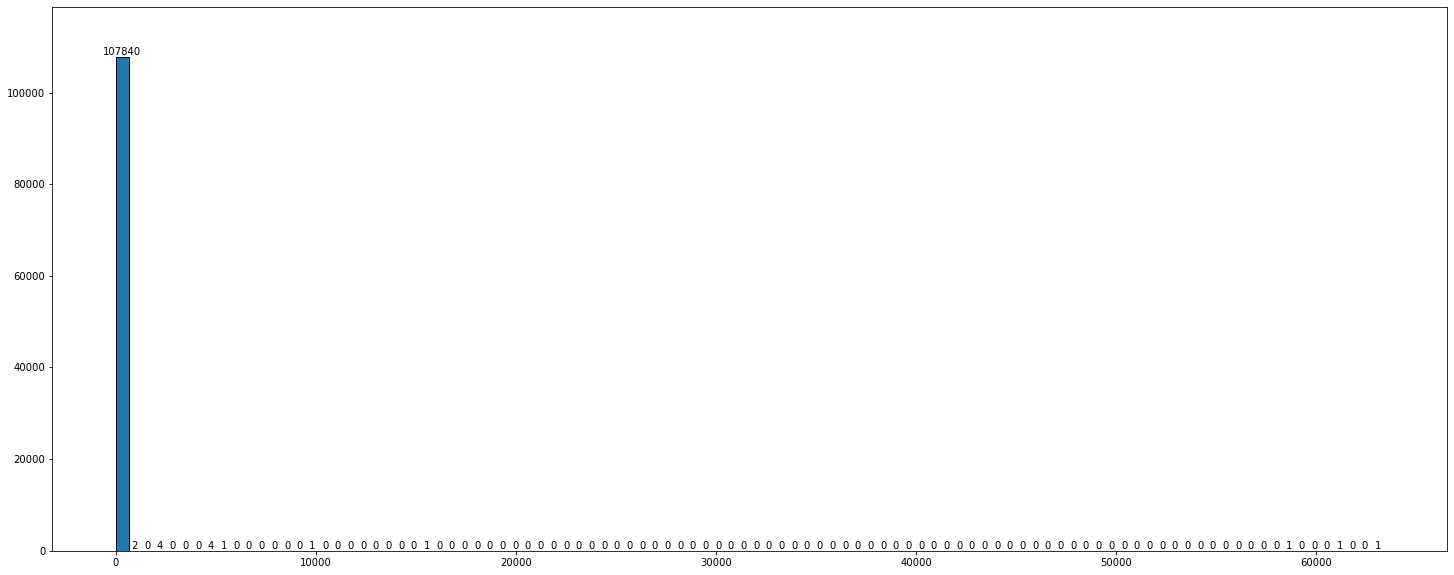

<Figure size 432x288 with 0 Axes>

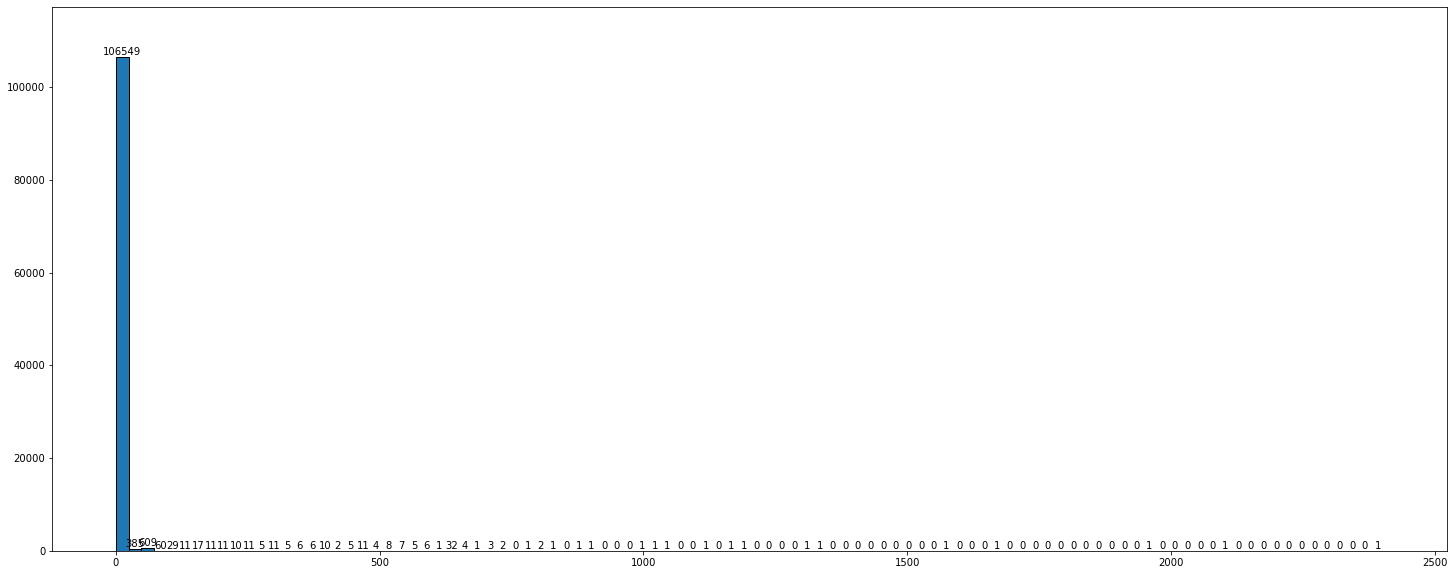

<Figure size 432x288 with 0 Axes>

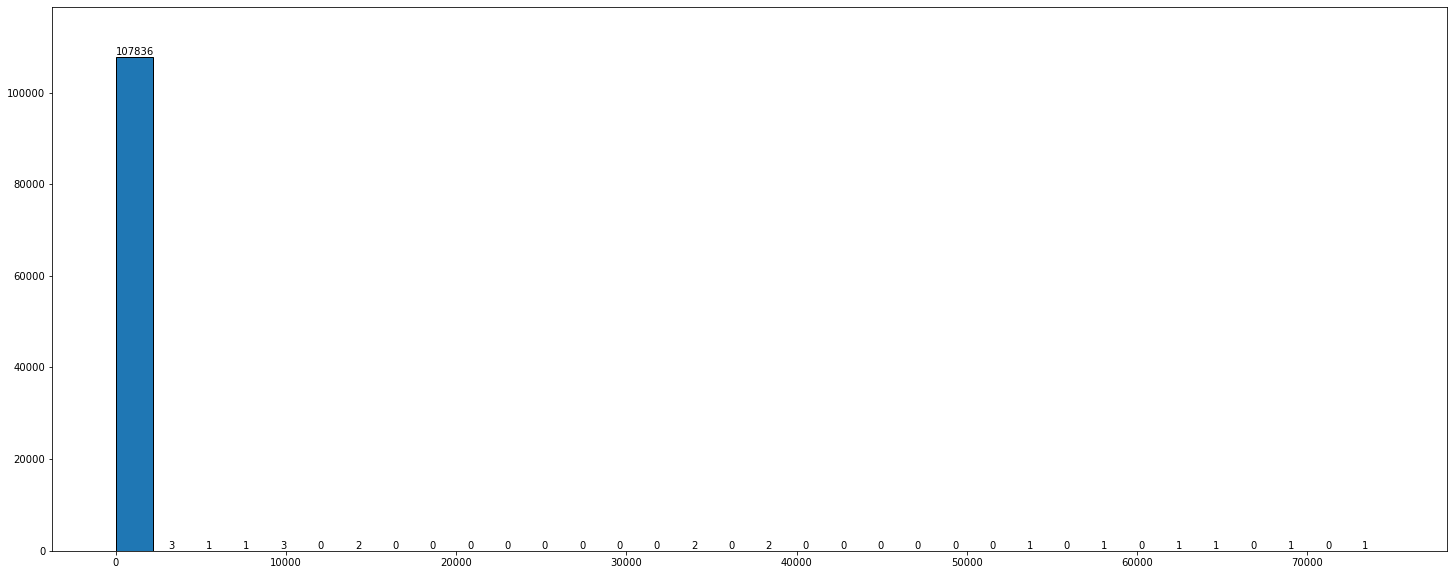

<Figure size 432x288 with 0 Axes>

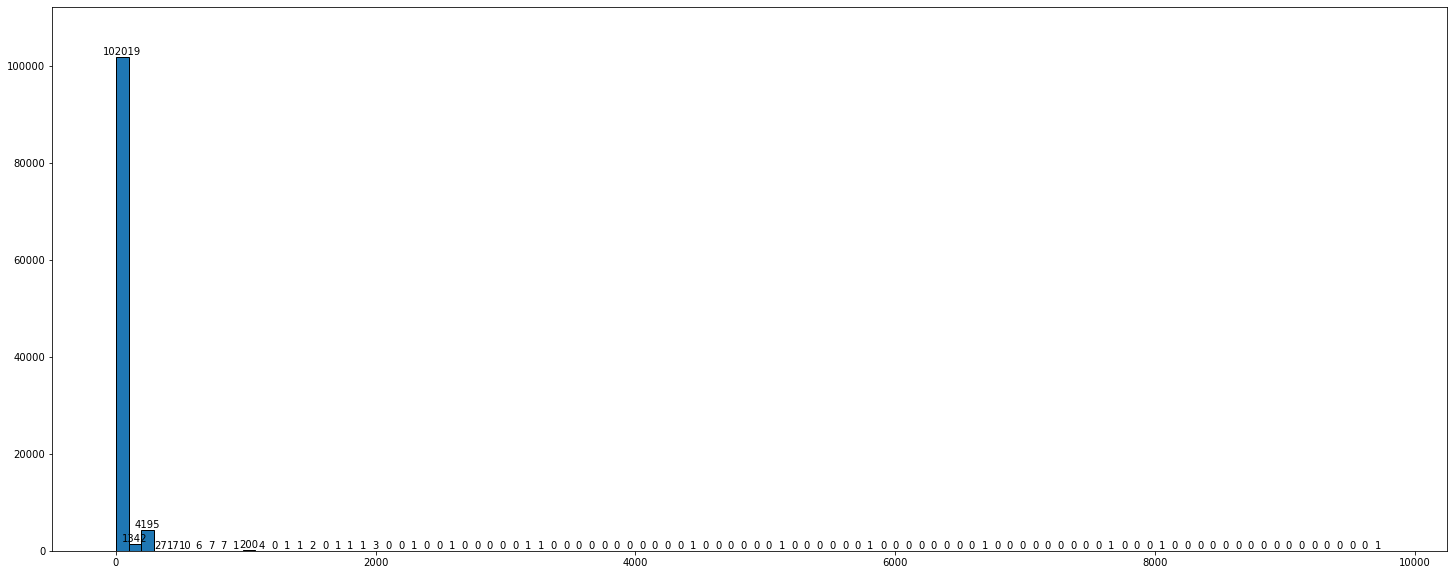

<Figure size 432x288 with 0 Axes>

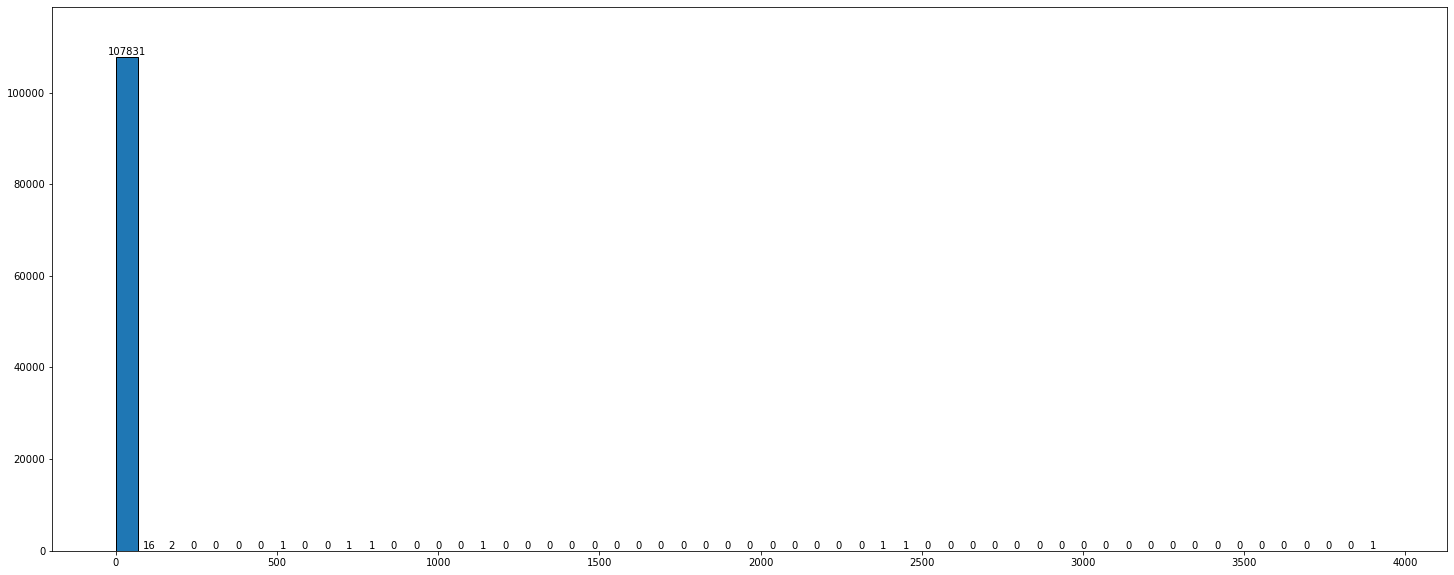

<Figure size 432x288 with 0 Axes>

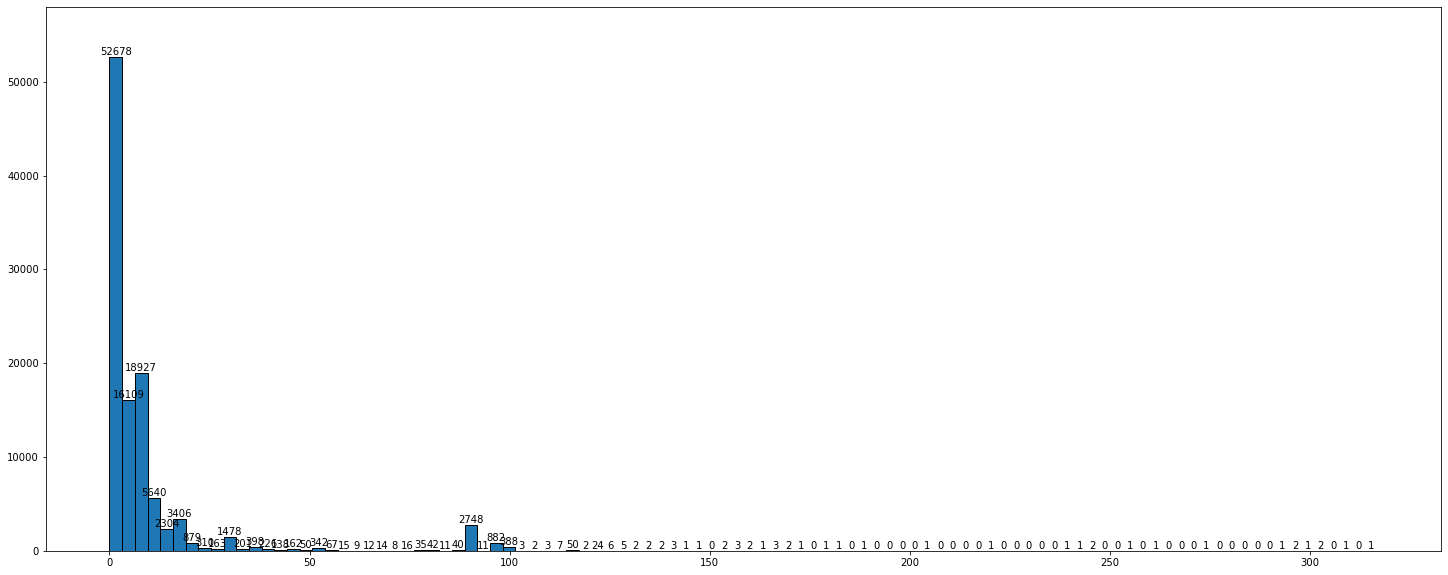

<Figure size 432x288 with 0 Axes>

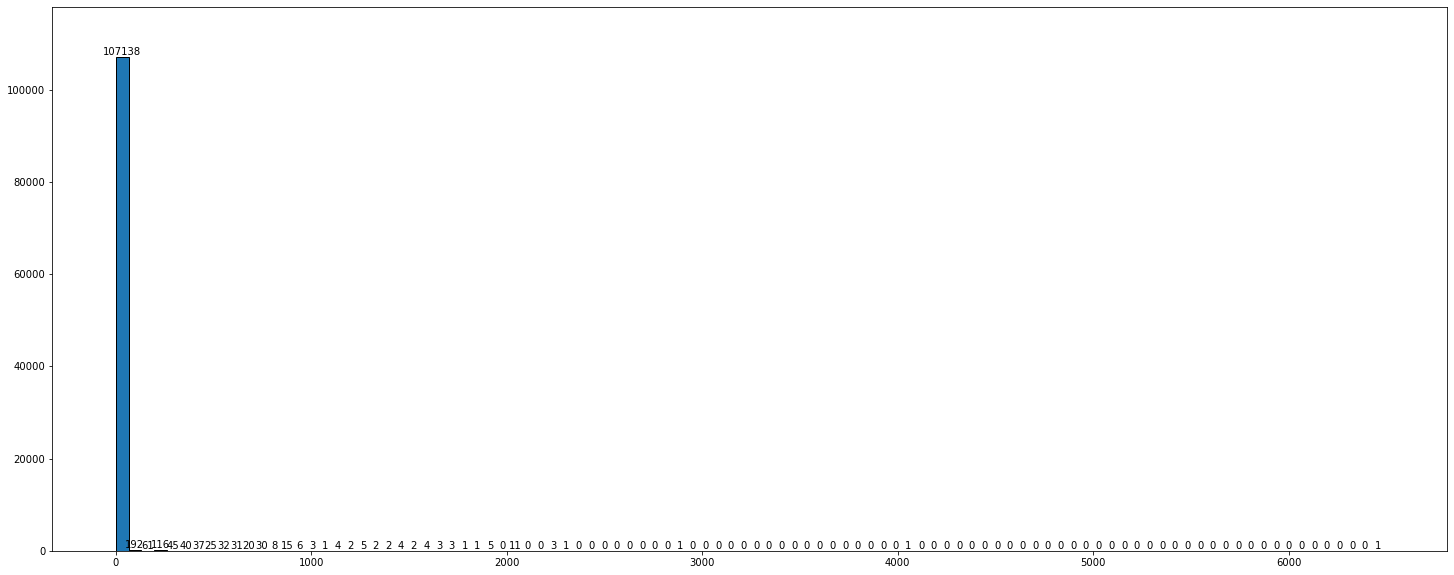

<Figure size 432x288 with 0 Axes>

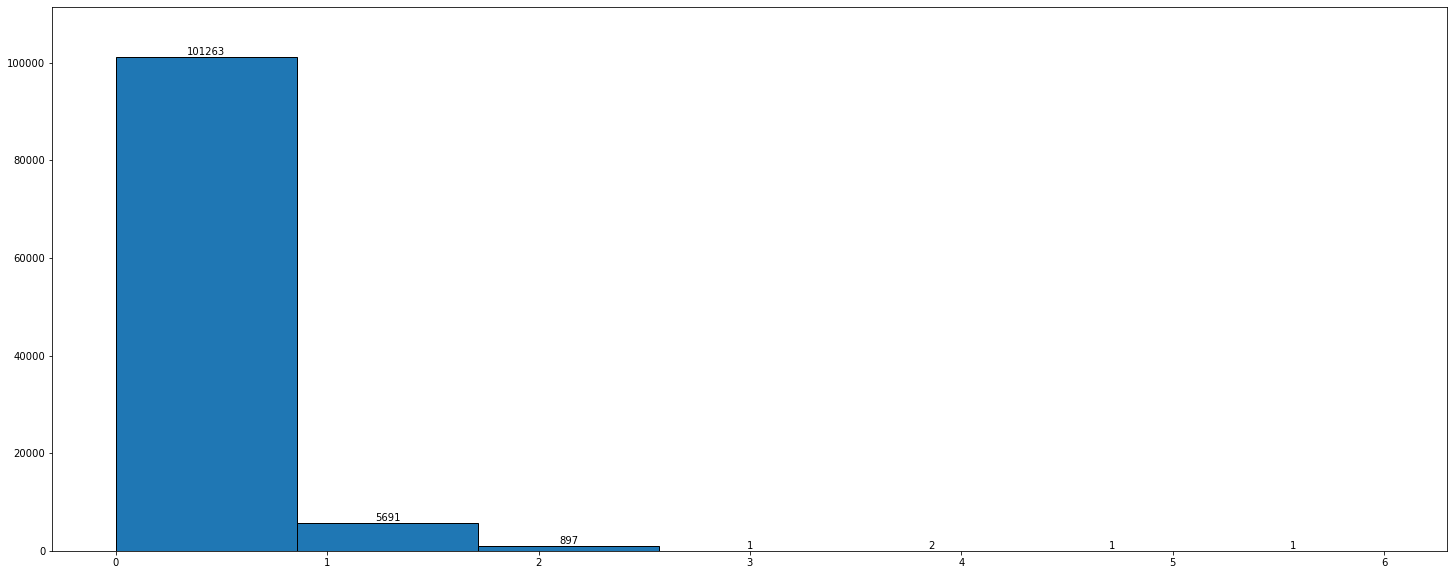

<Figure size 432x288 with 0 Axes>

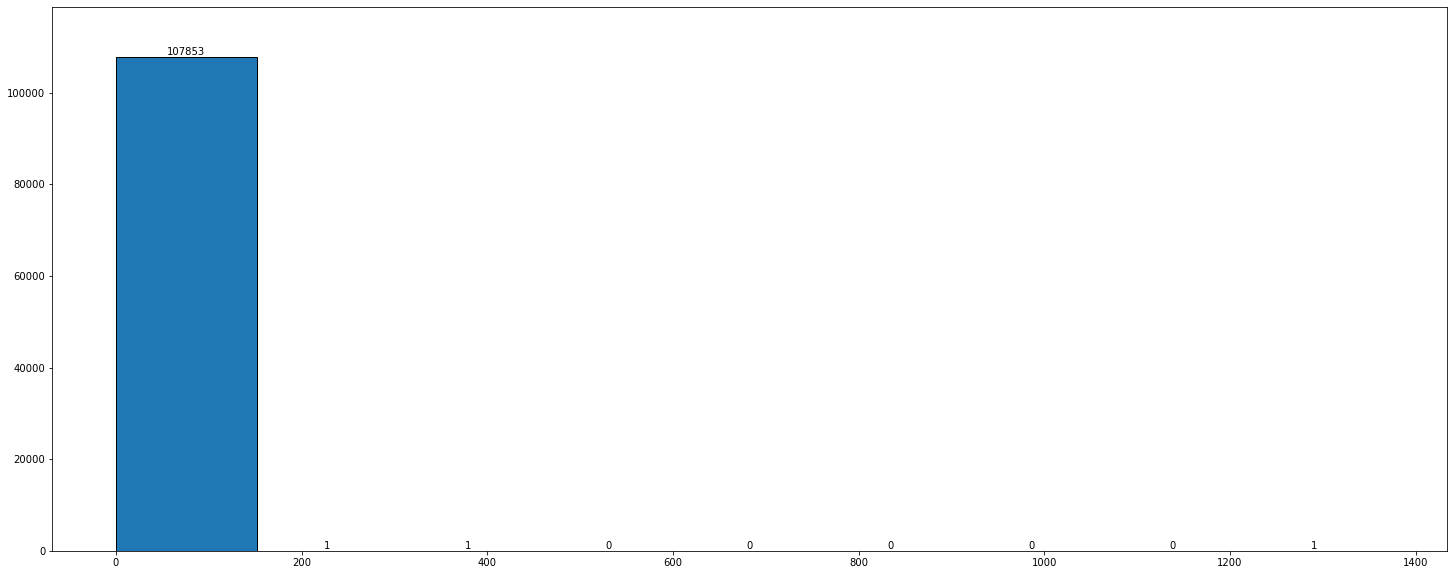

<Figure size 432x288 with 0 Axes>

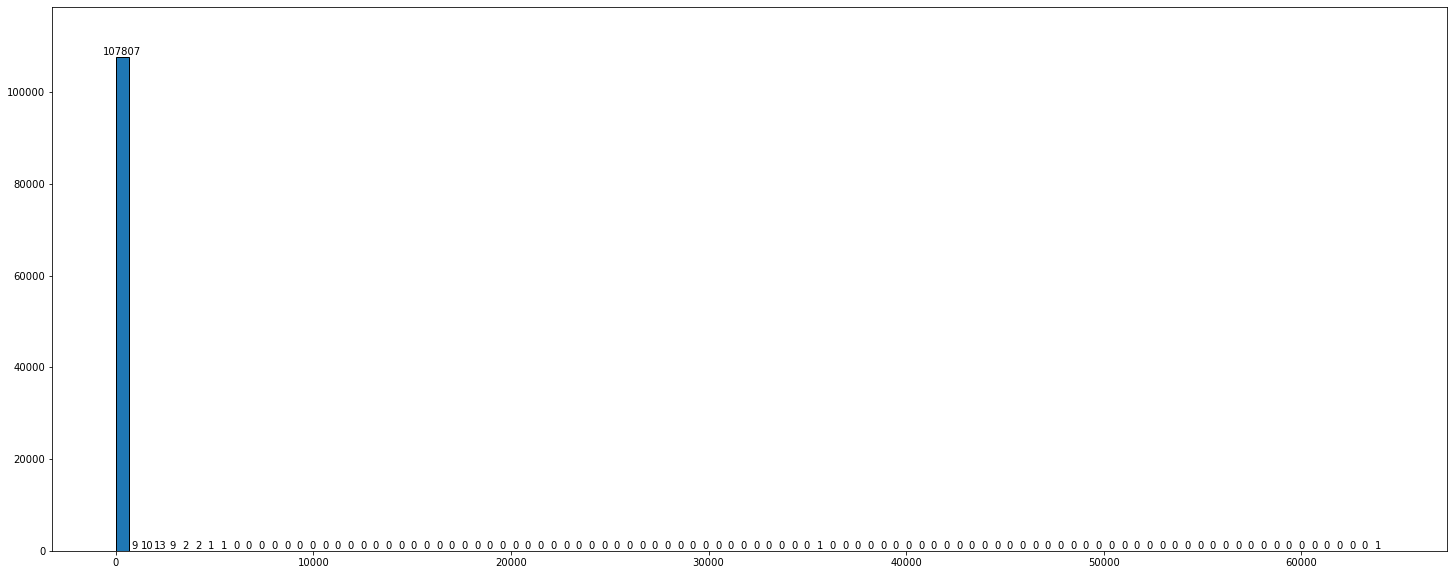

<Figure size 432x288 with 0 Axes>

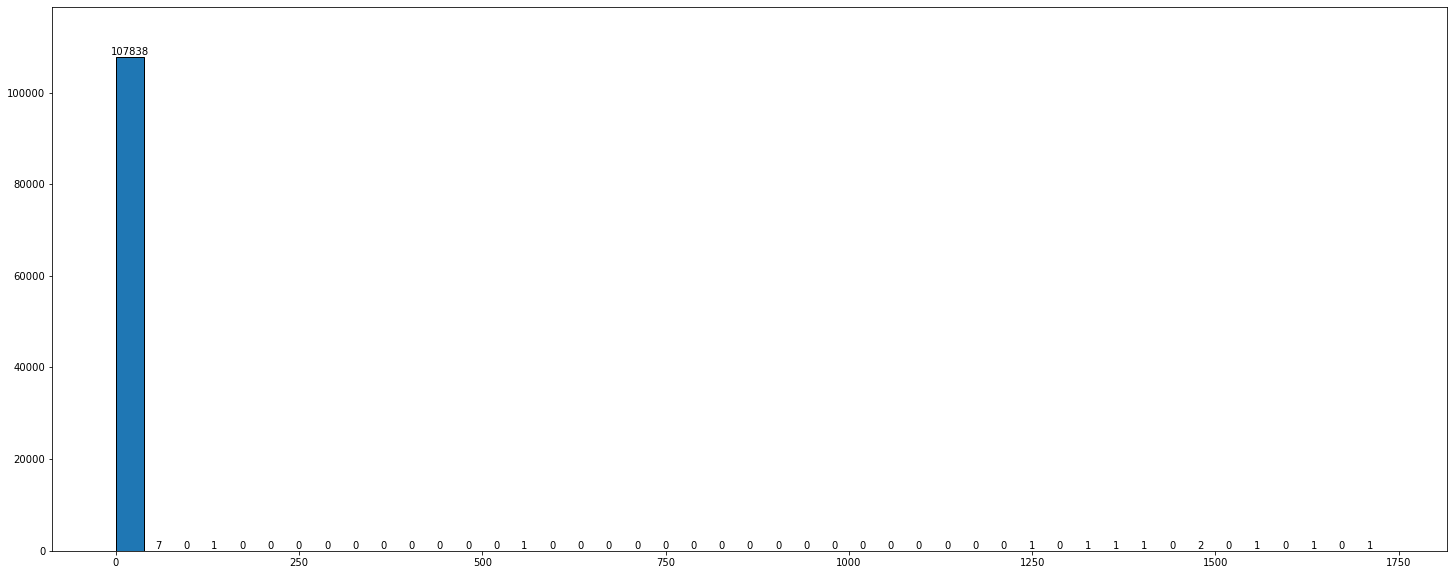

<Figure size 432x288 with 0 Axes>

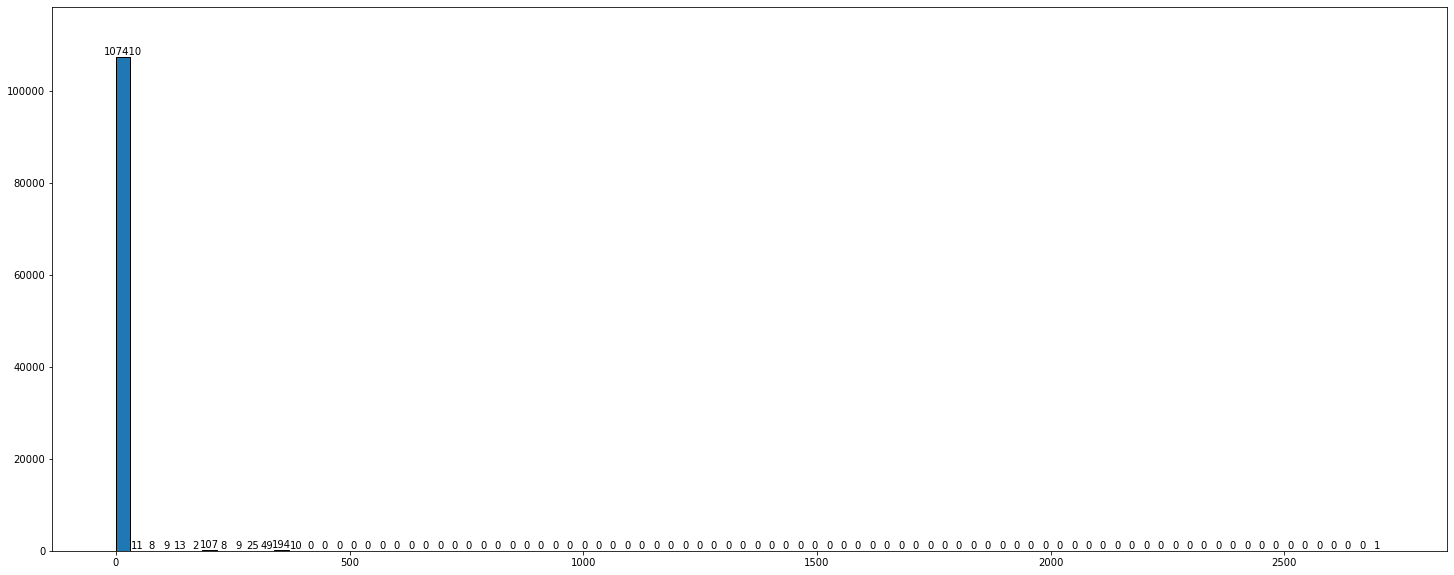

<Figure size 432x288 with 0 Axes>

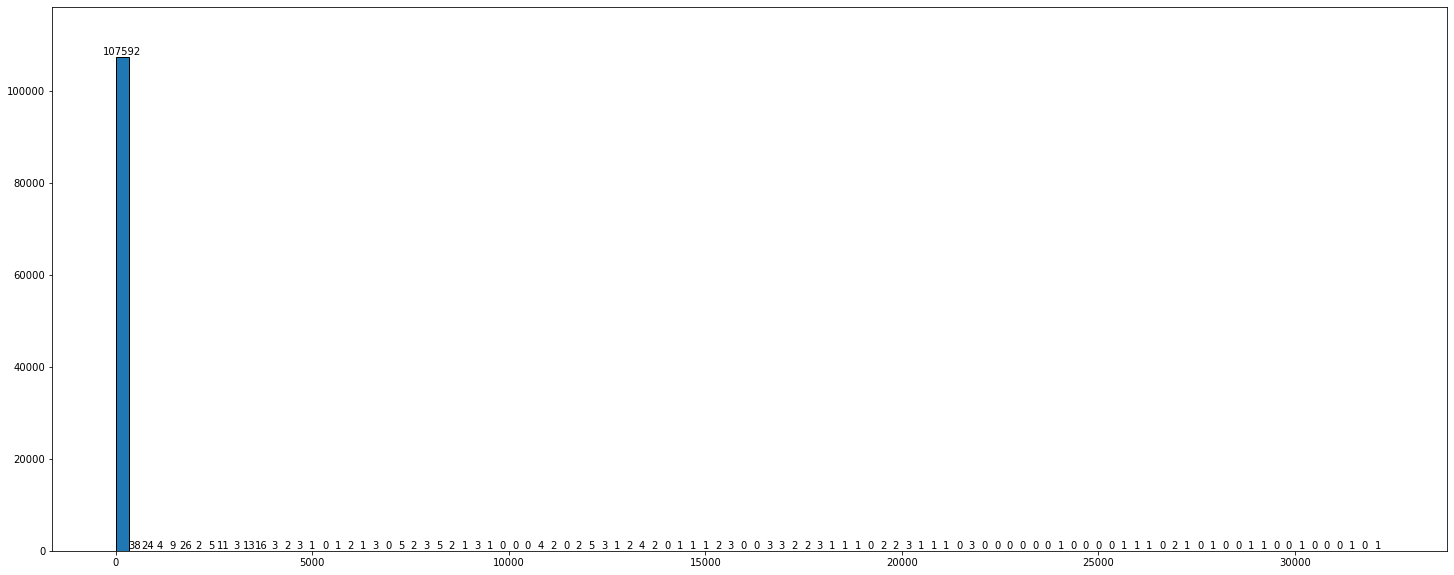

<Figure size 432x288 with 0 Axes>

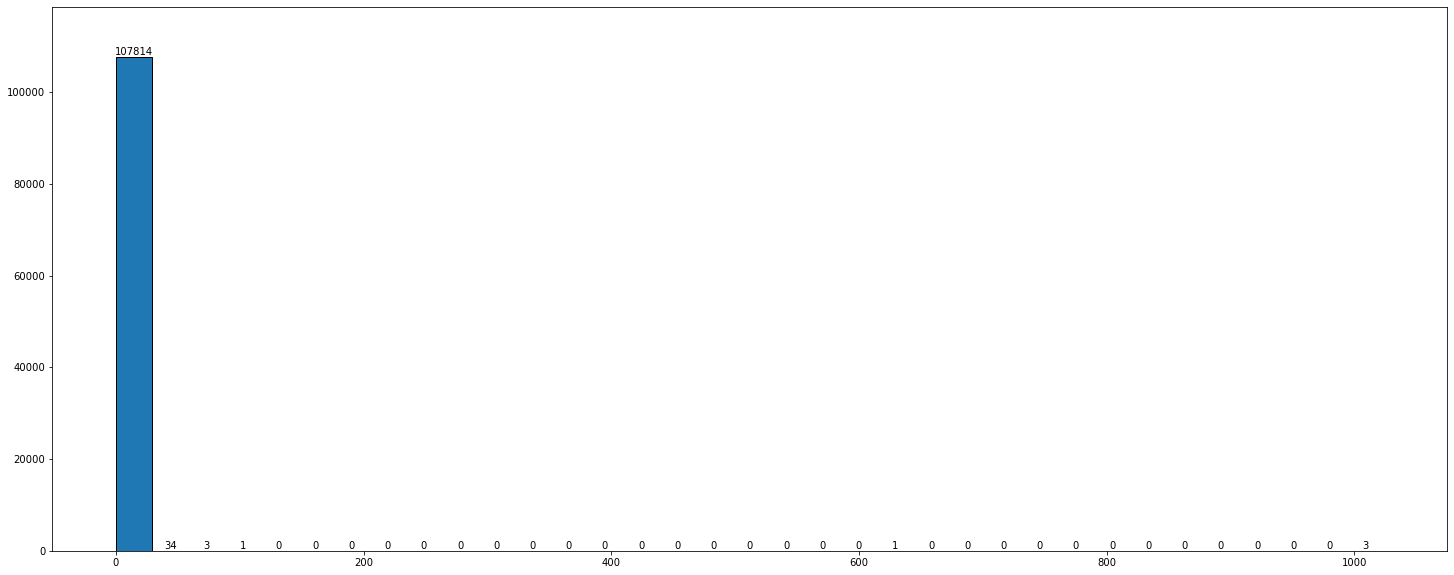

<Figure size 432x288 with 0 Axes>

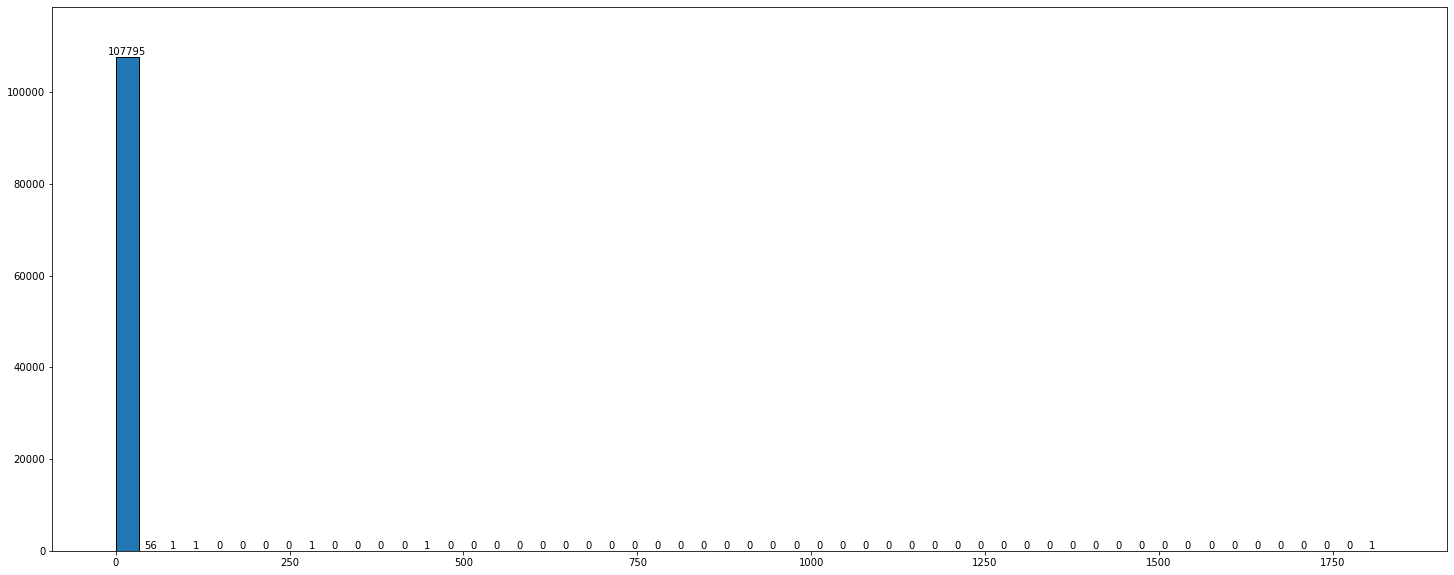

<Figure size 432x288 with 0 Axes>

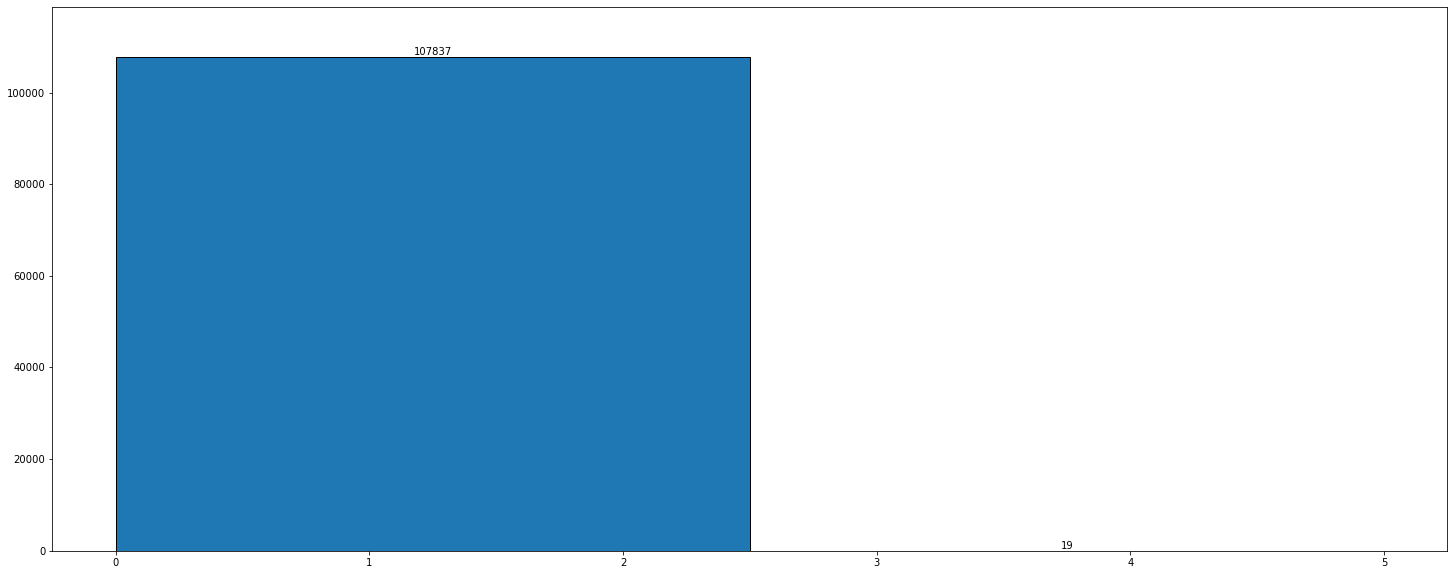

<Figure size 432x288 with 0 Axes>

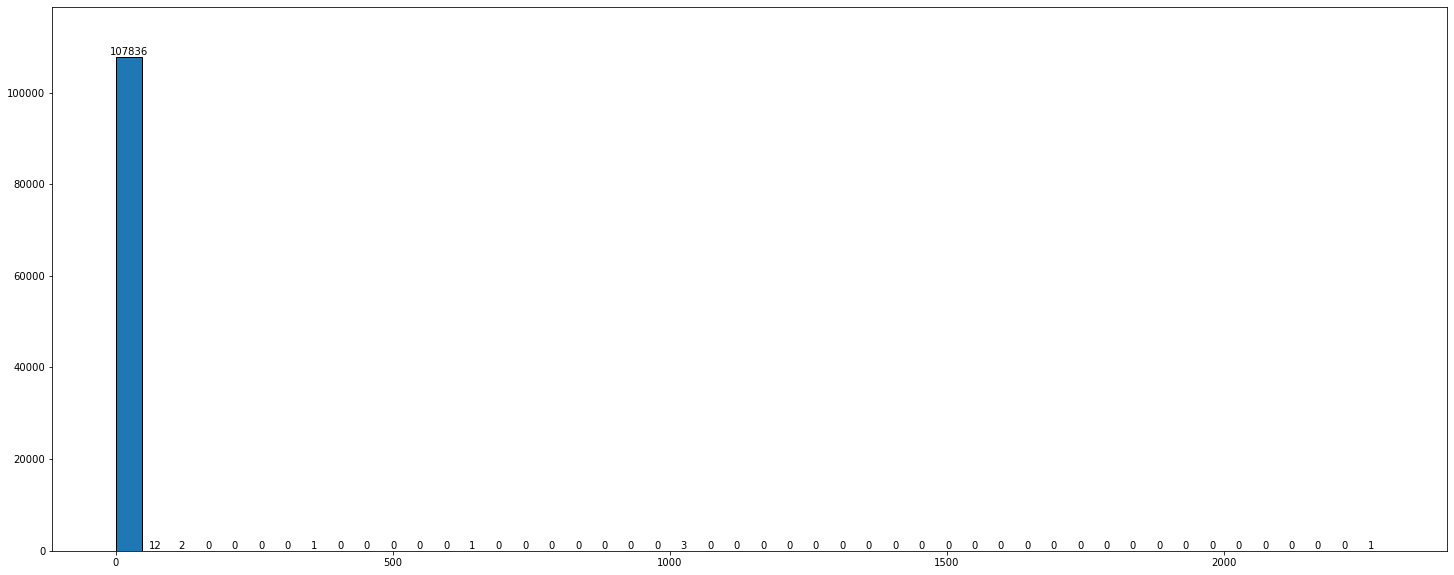

<Figure size 432x288 with 0 Axes>

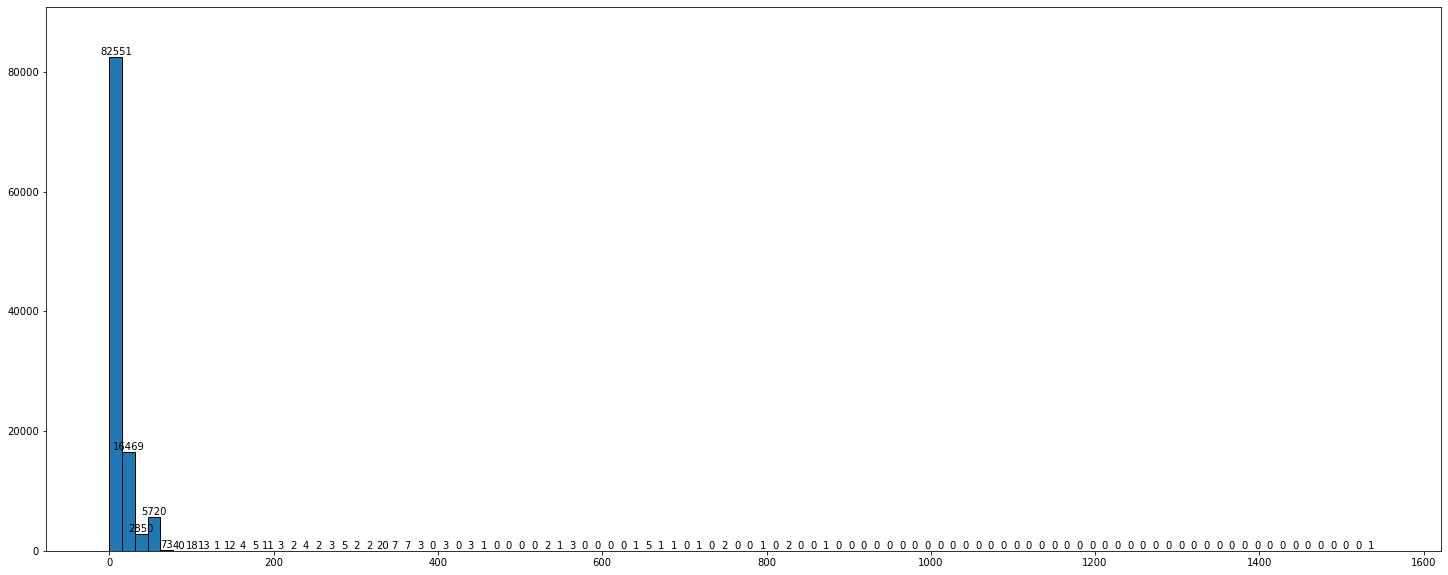

<Figure size 432x288 with 0 Axes>

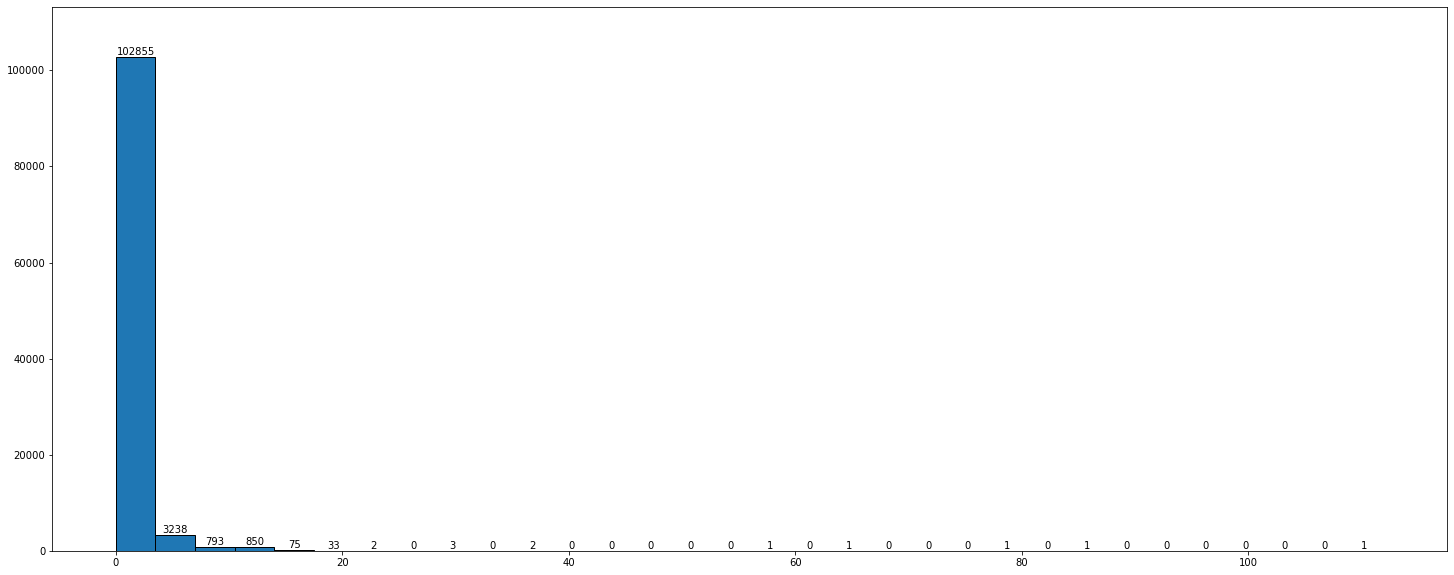

<Figure size 432x288 with 0 Axes>

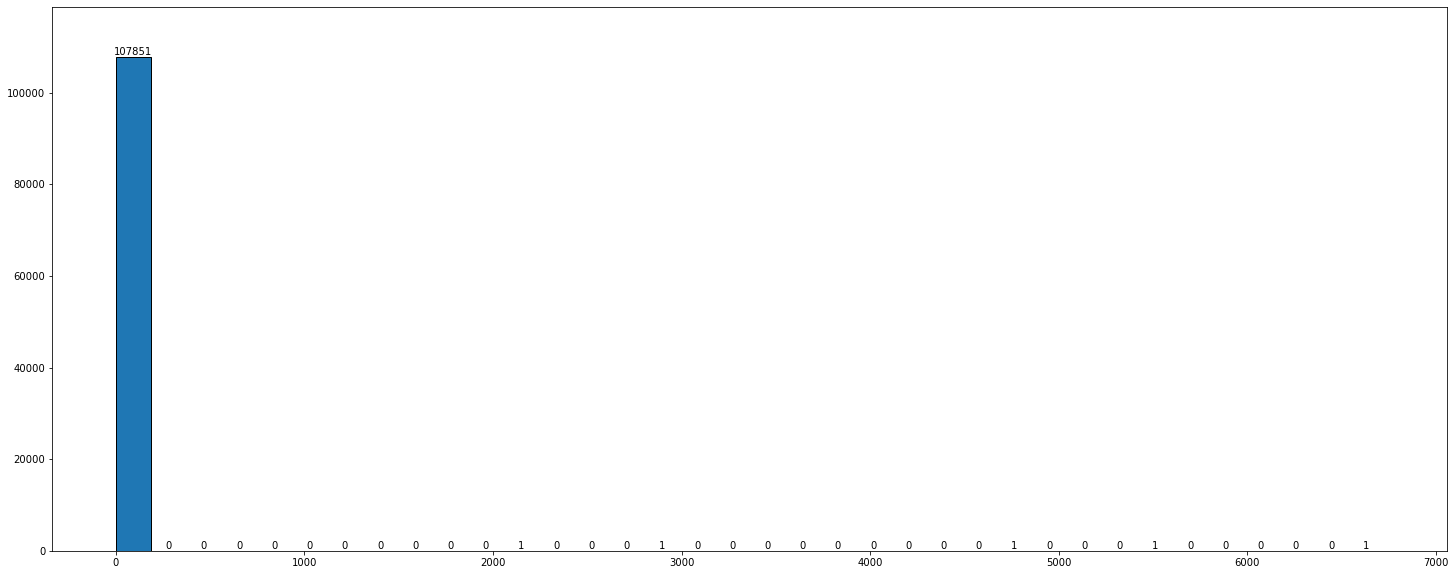

<Figure size 432x288 with 0 Axes>

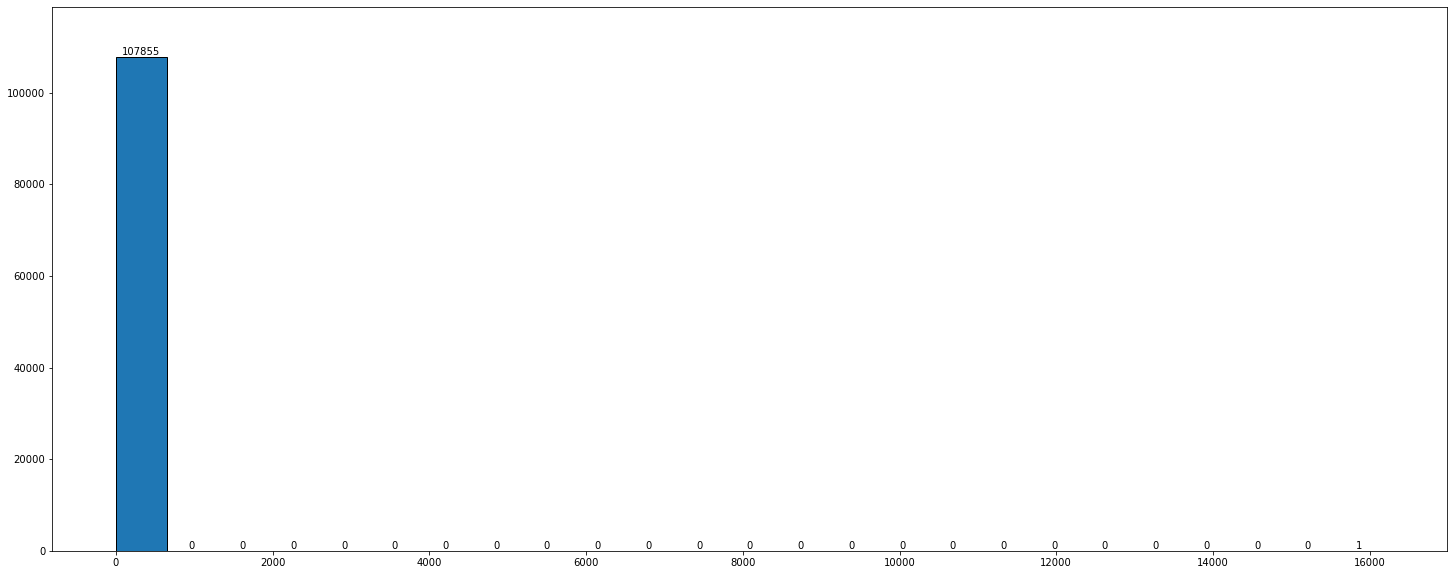

<Figure size 432x288 with 0 Axes>

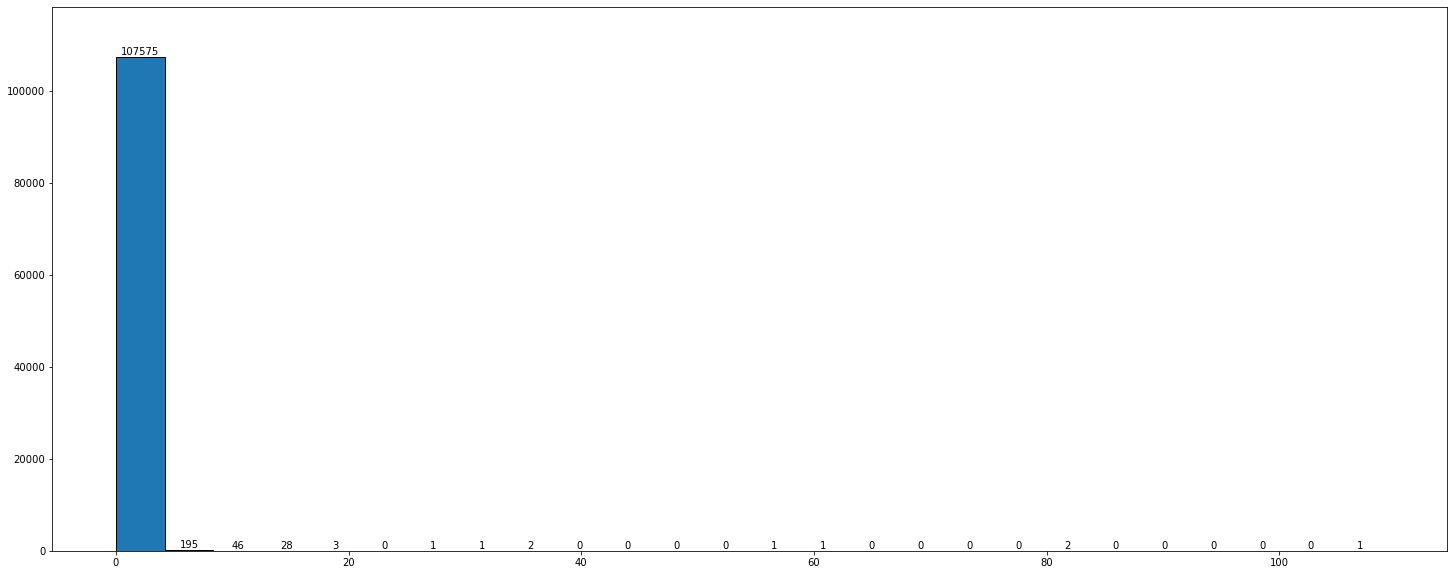

<Figure size 432x288 with 0 Axes>

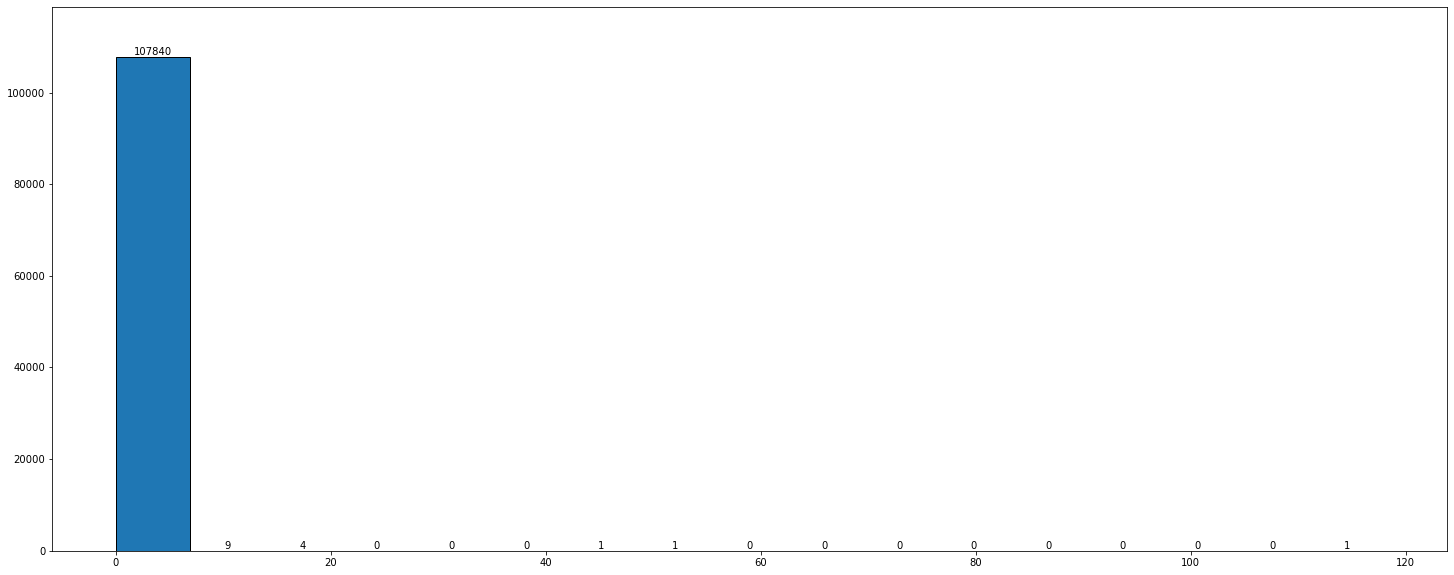

<Figure size 432x288 with 0 Axes>

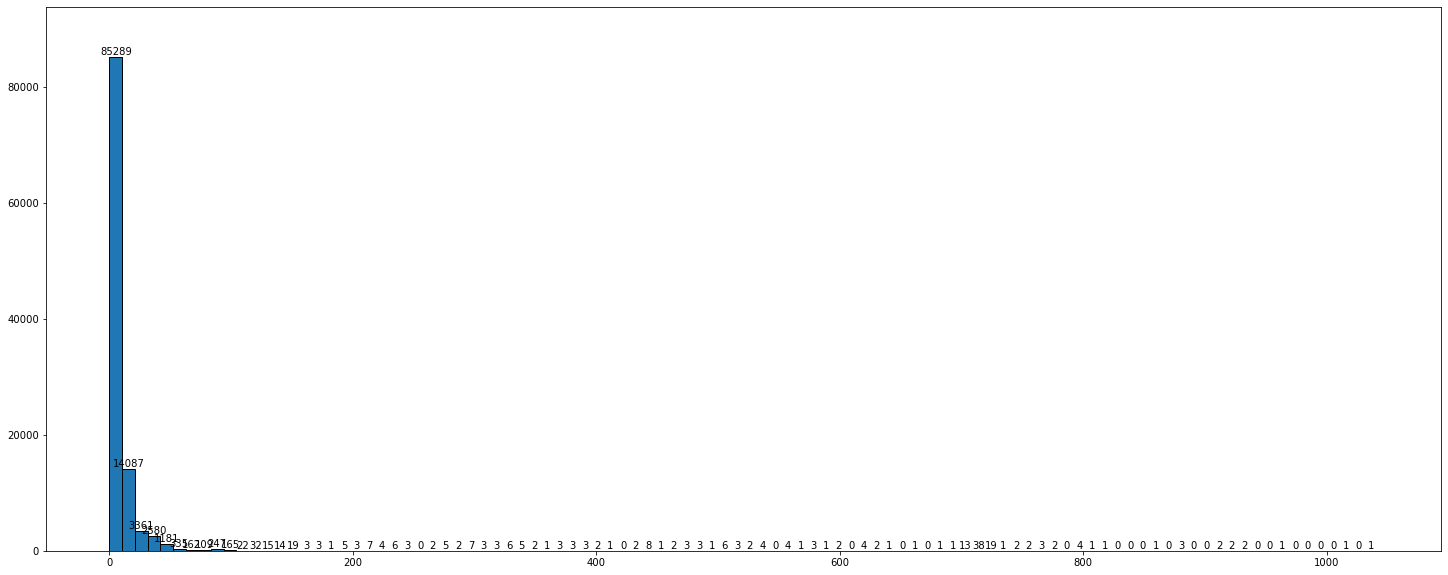

<Figure size 432x288 with 0 Axes>

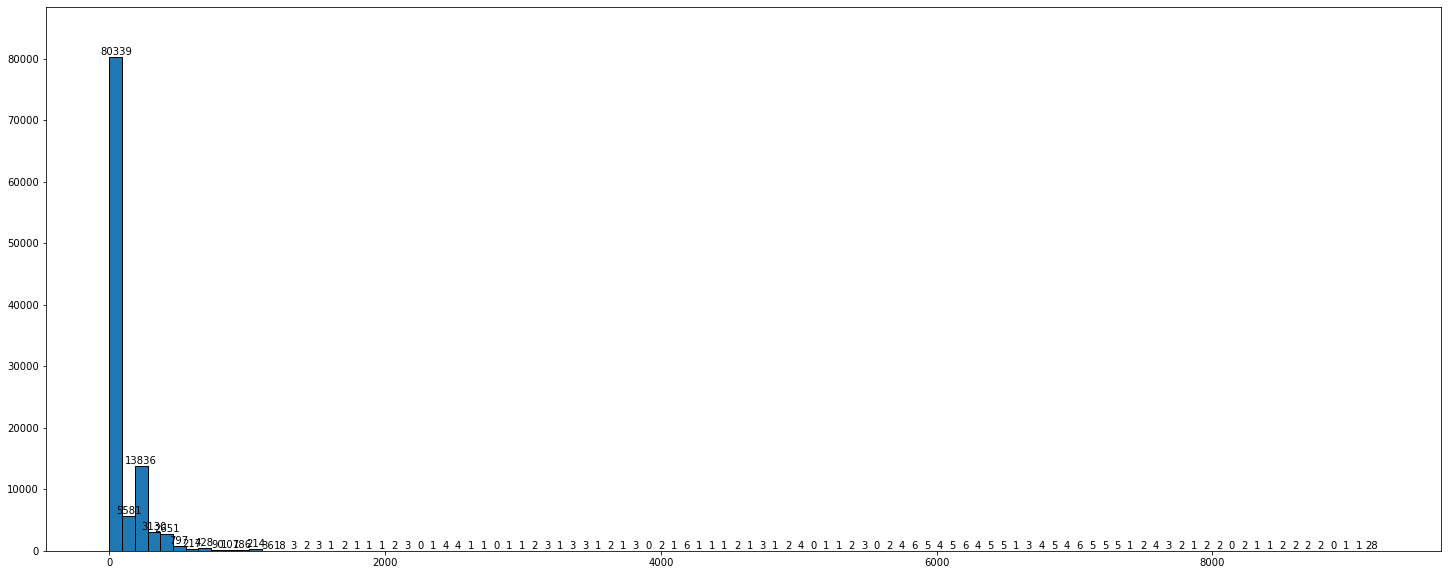

<Figure size 432x288 with 0 Axes>

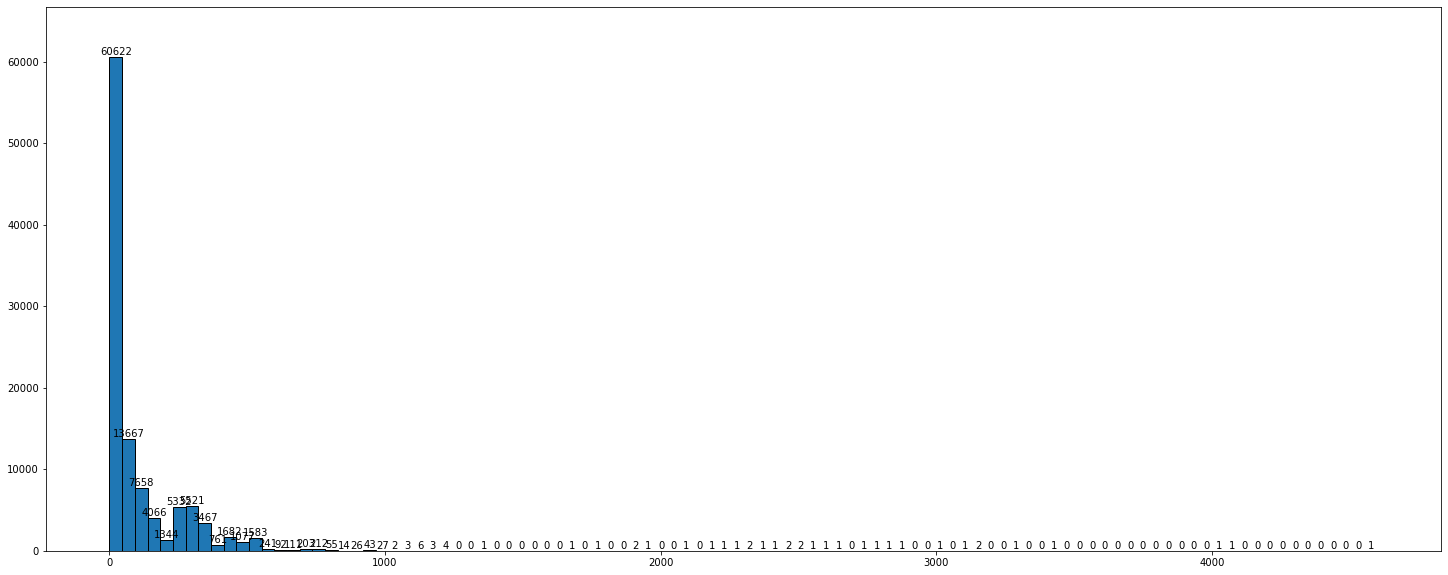

<Figure size 432x288 with 0 Axes>

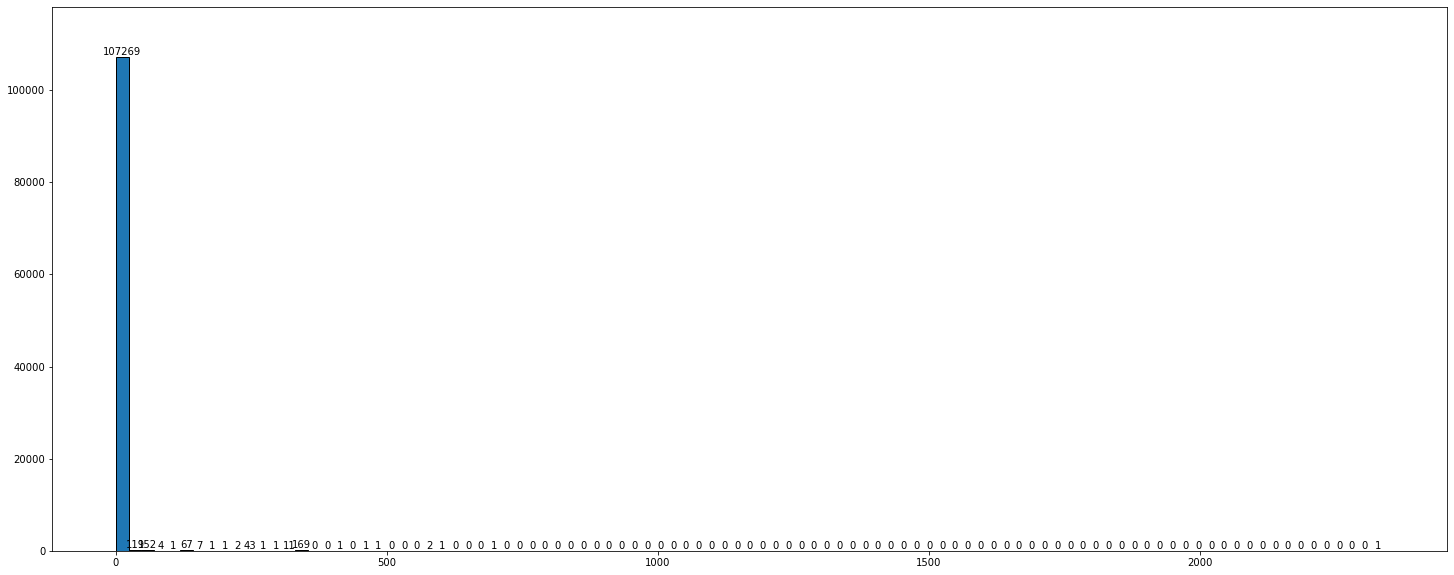

<Figure size 432x288 with 0 Axes>

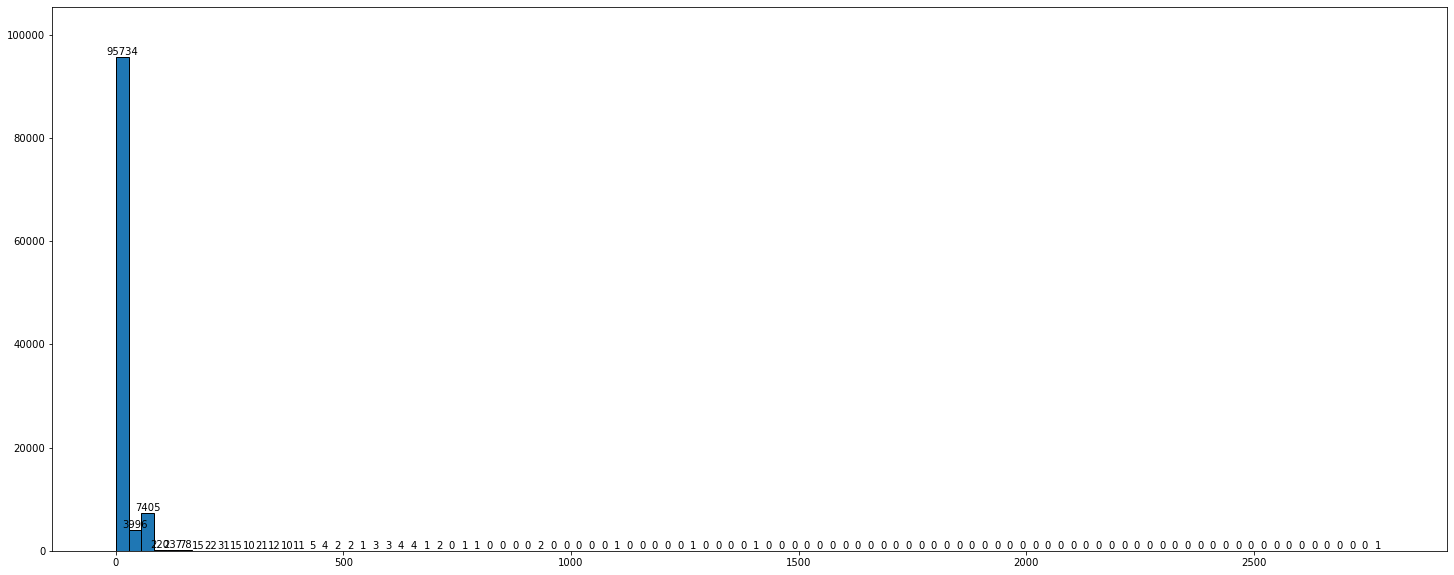

<Figure size 432x288 with 0 Axes>

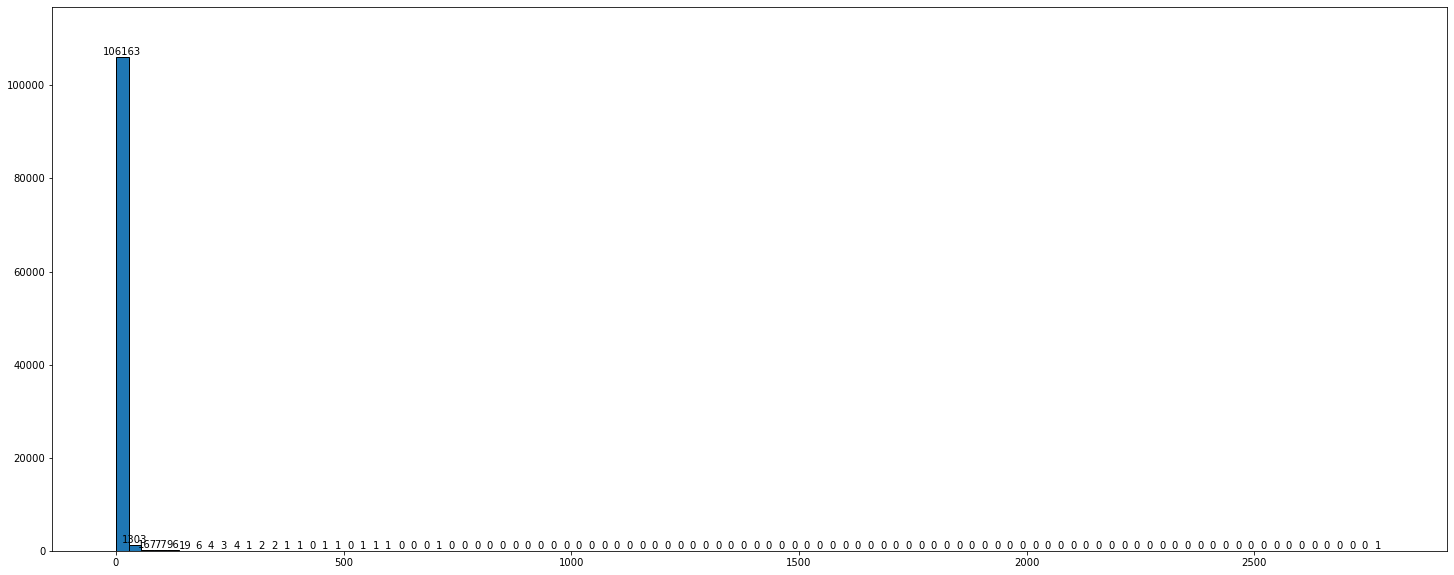

<Figure size 432x288 with 0 Axes>

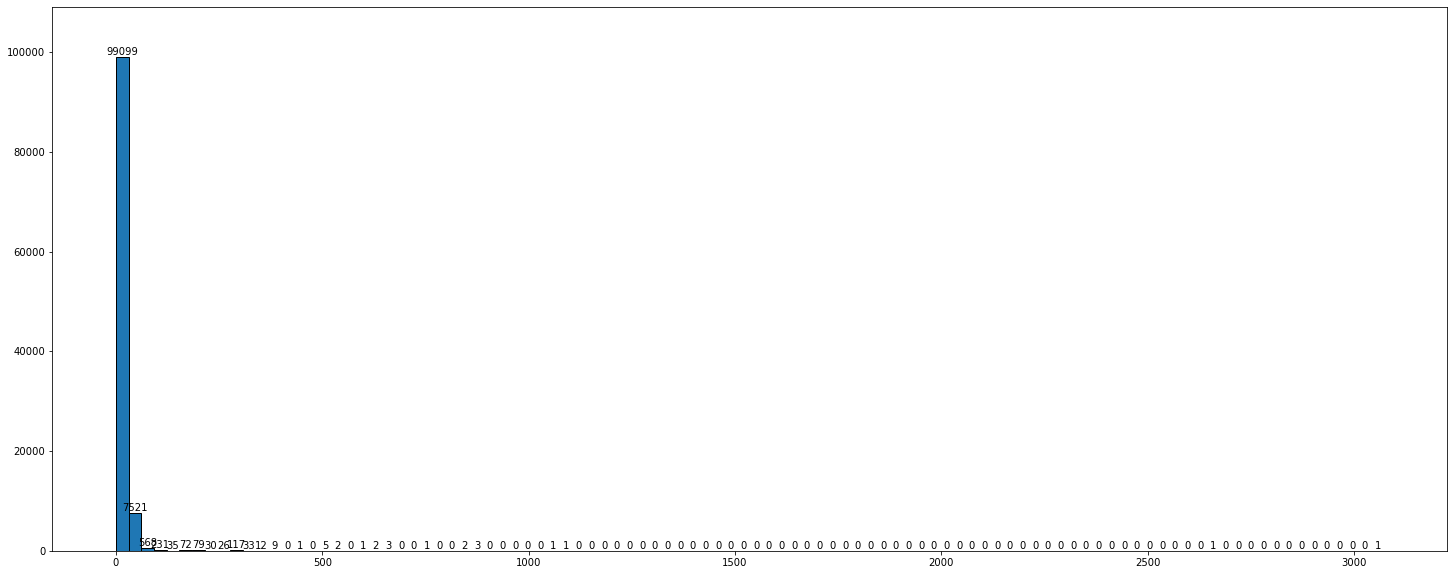

<Figure size 432x288 with 0 Axes>

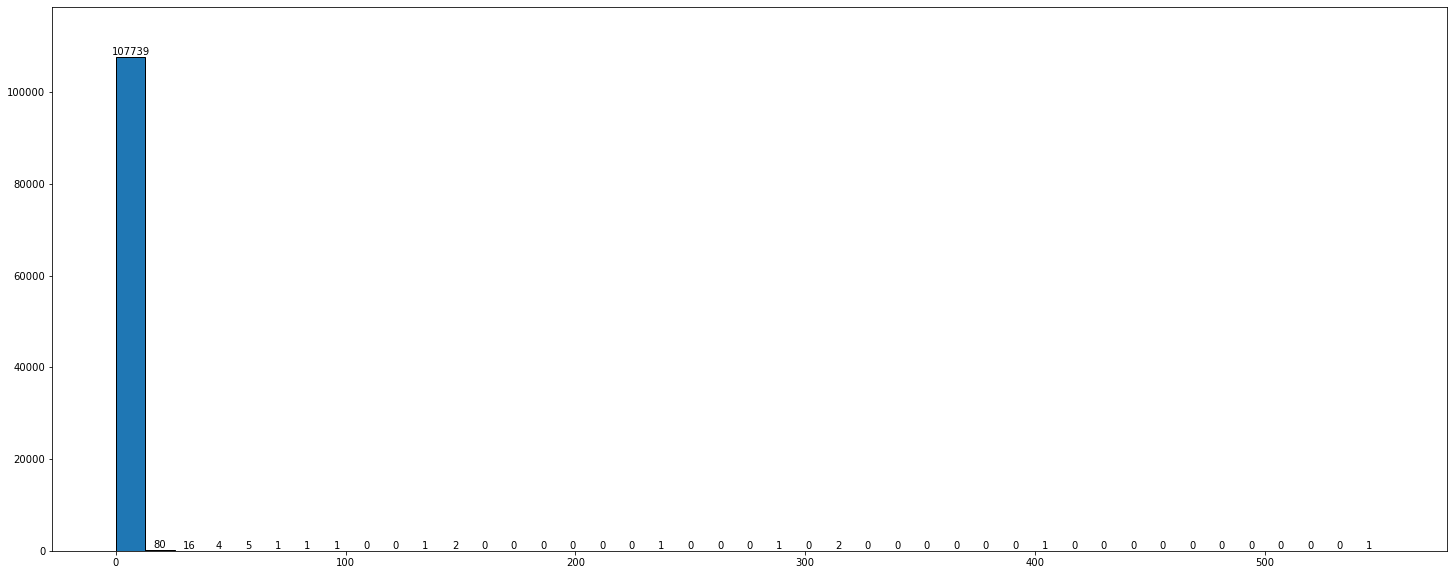

<Figure size 432x288 with 0 Axes>

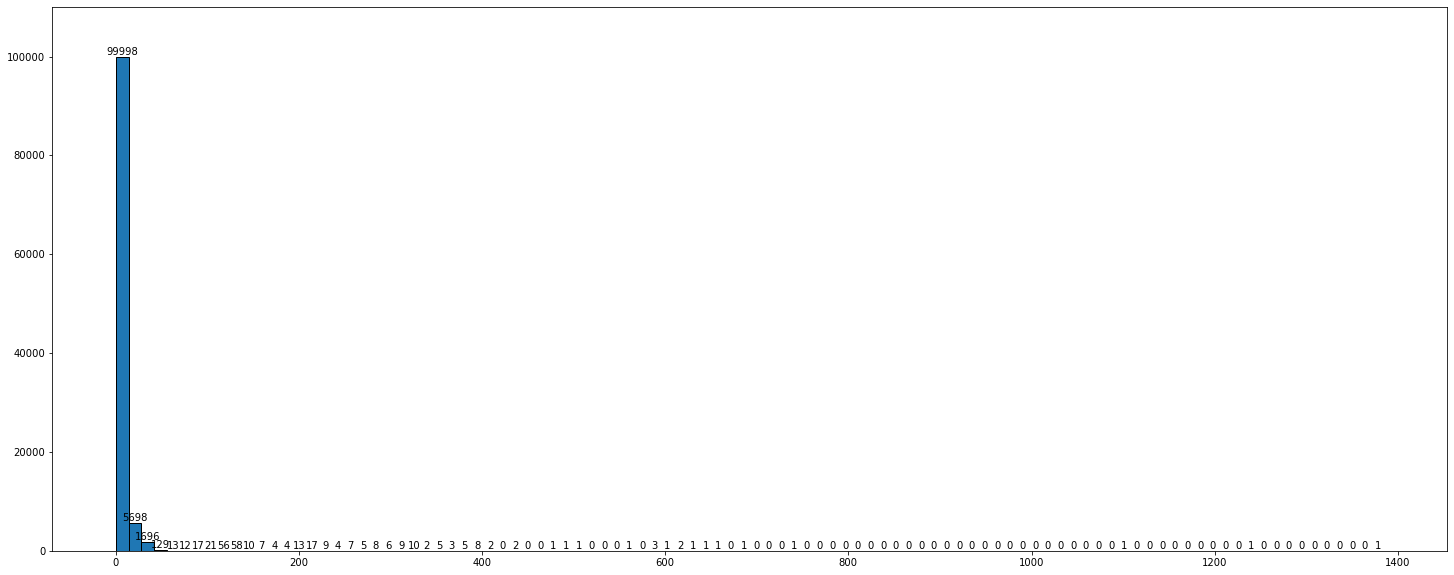

<Figure size 432x288 with 0 Axes>

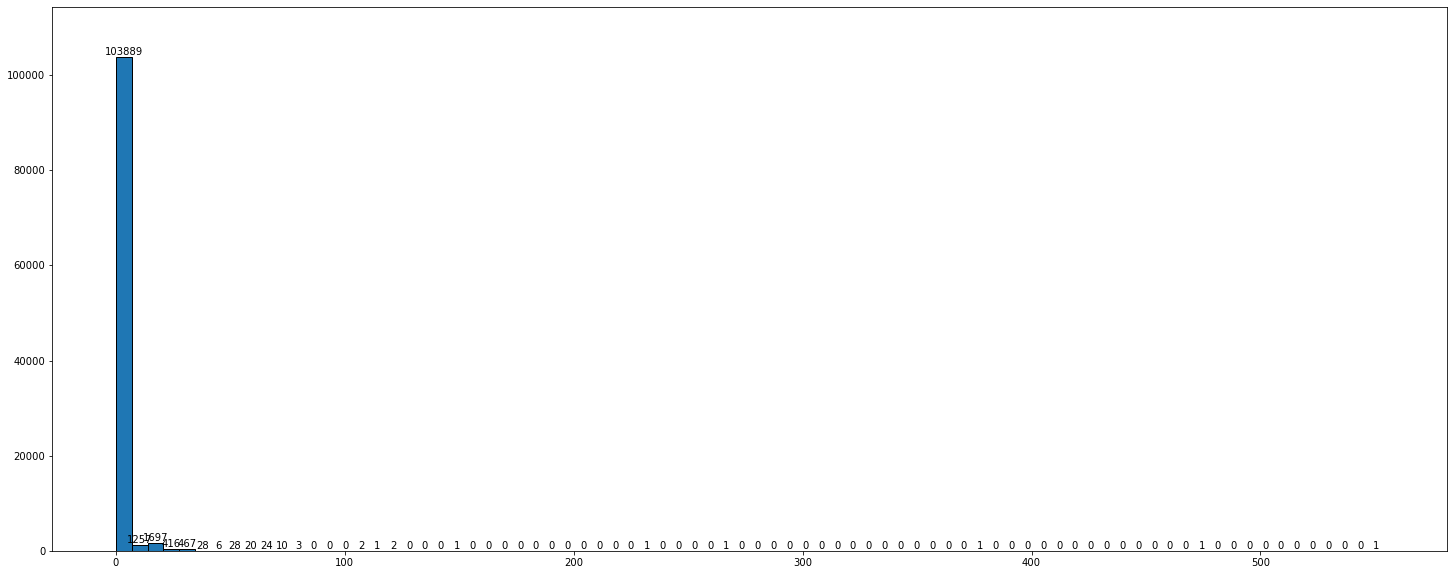

<Figure size 432x288 with 0 Axes>

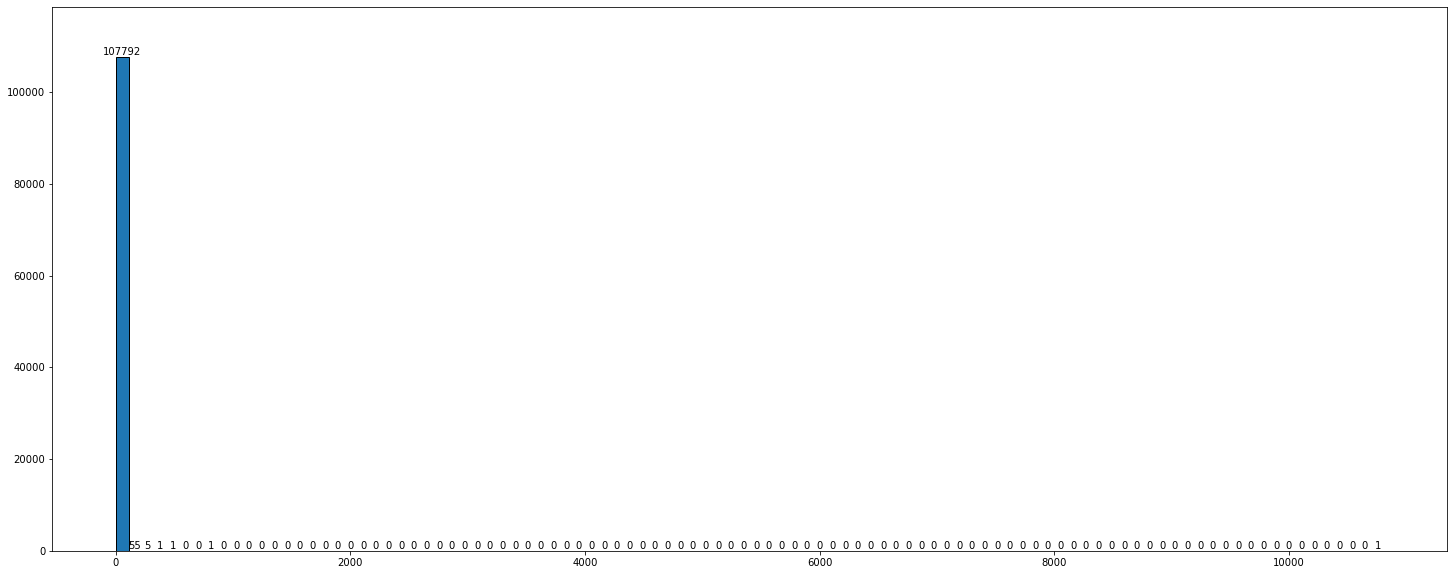

<Figure size 432x288 with 0 Axes>

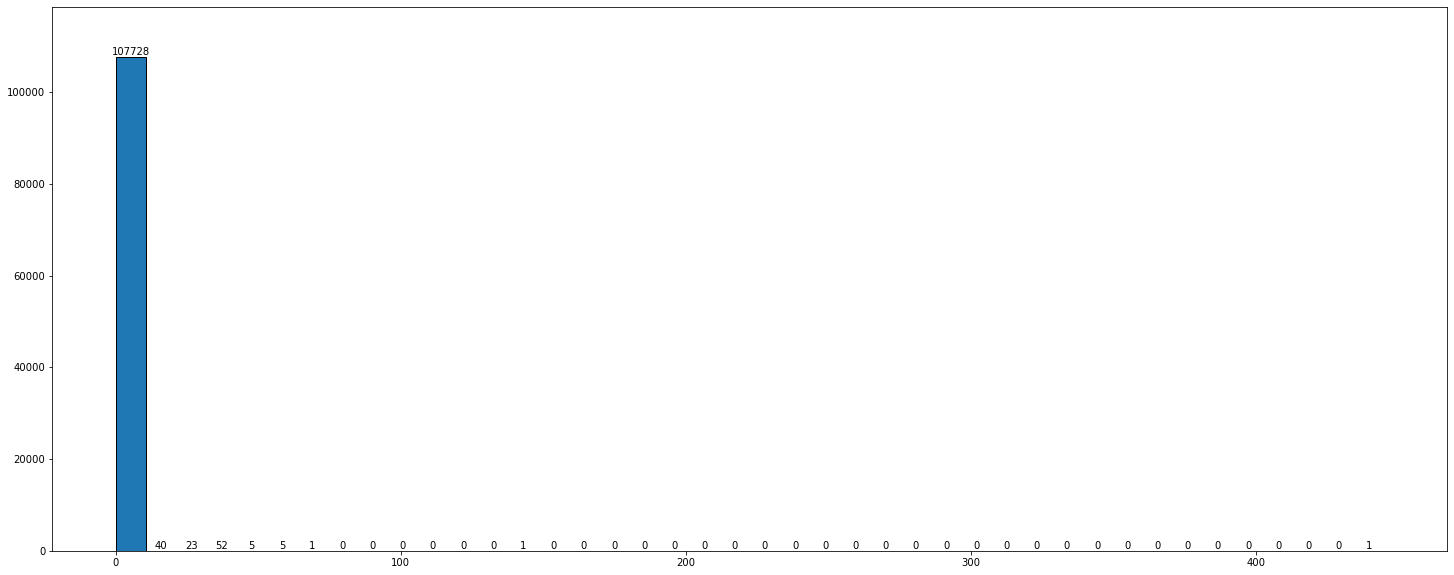

<Figure size 432x288 with 0 Axes>

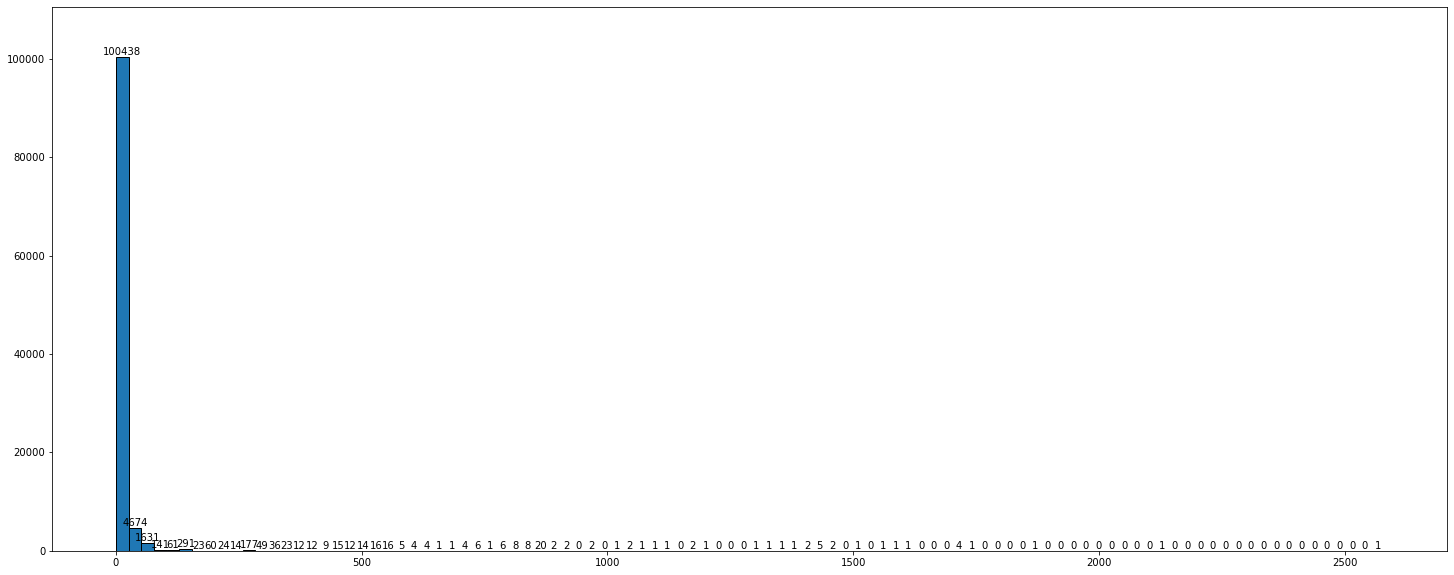

<Figure size 432x288 with 0 Axes>

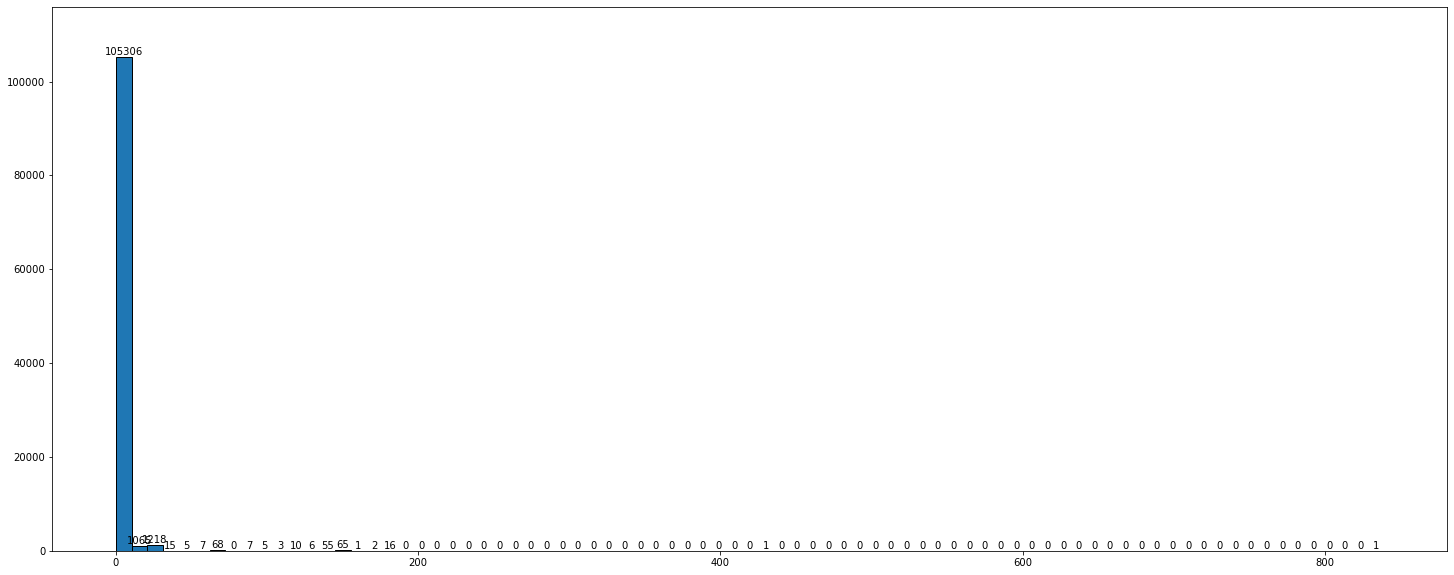

<Figure size 432x288 with 0 Axes>

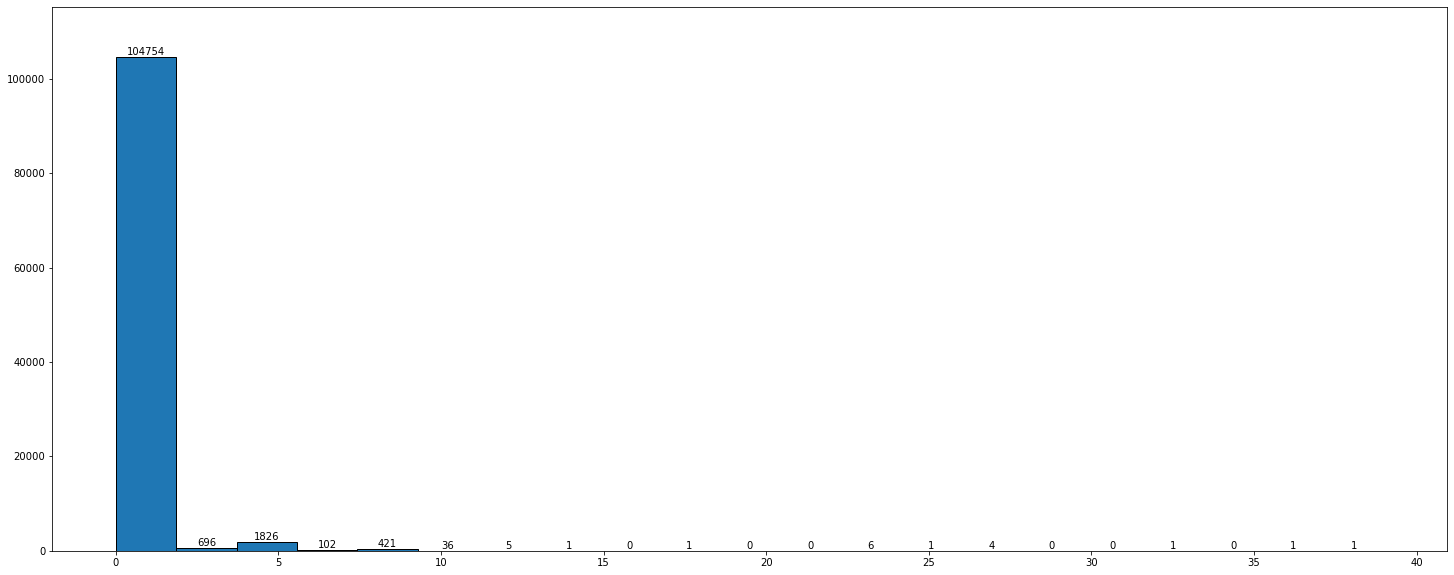

<Figure size 432x288 with 0 Axes>

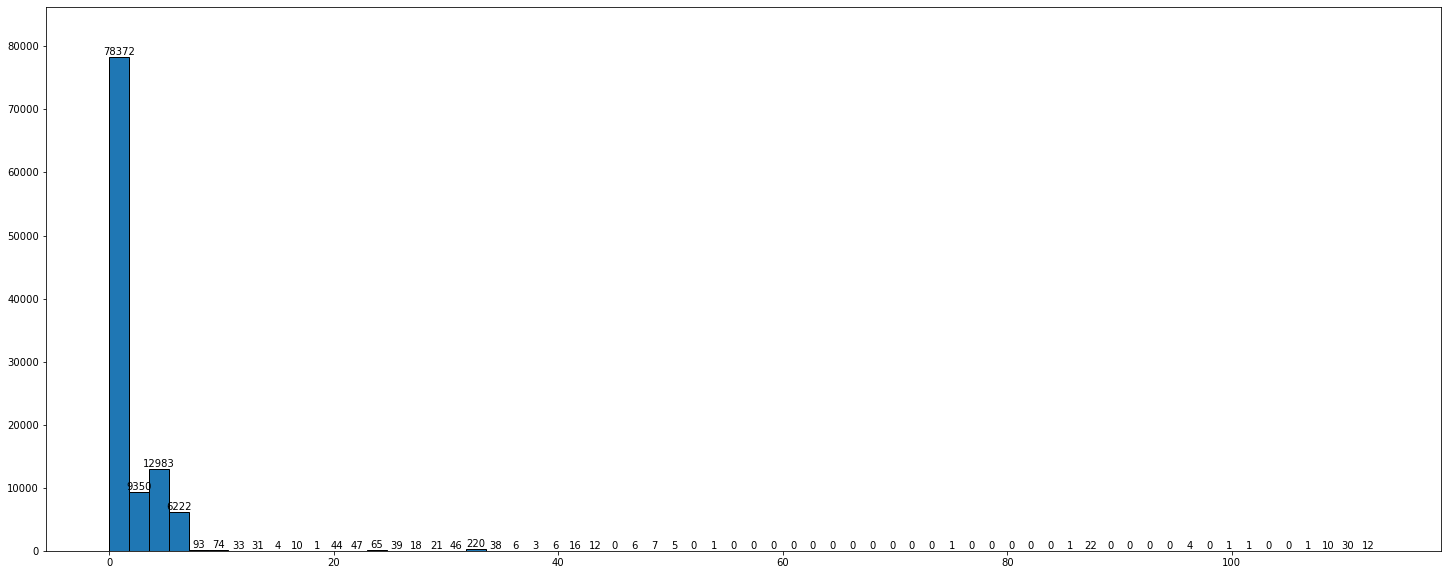

<Figure size 432x288 with 0 Axes>

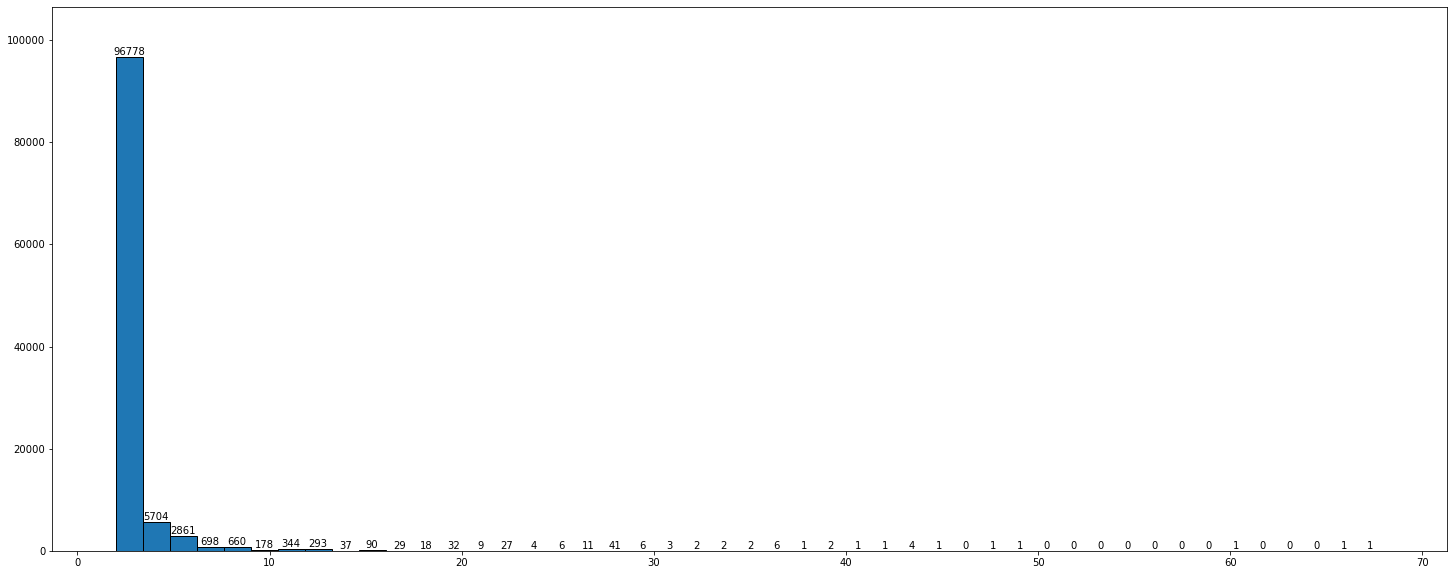

<Figure size 432x288 with 0 Axes>

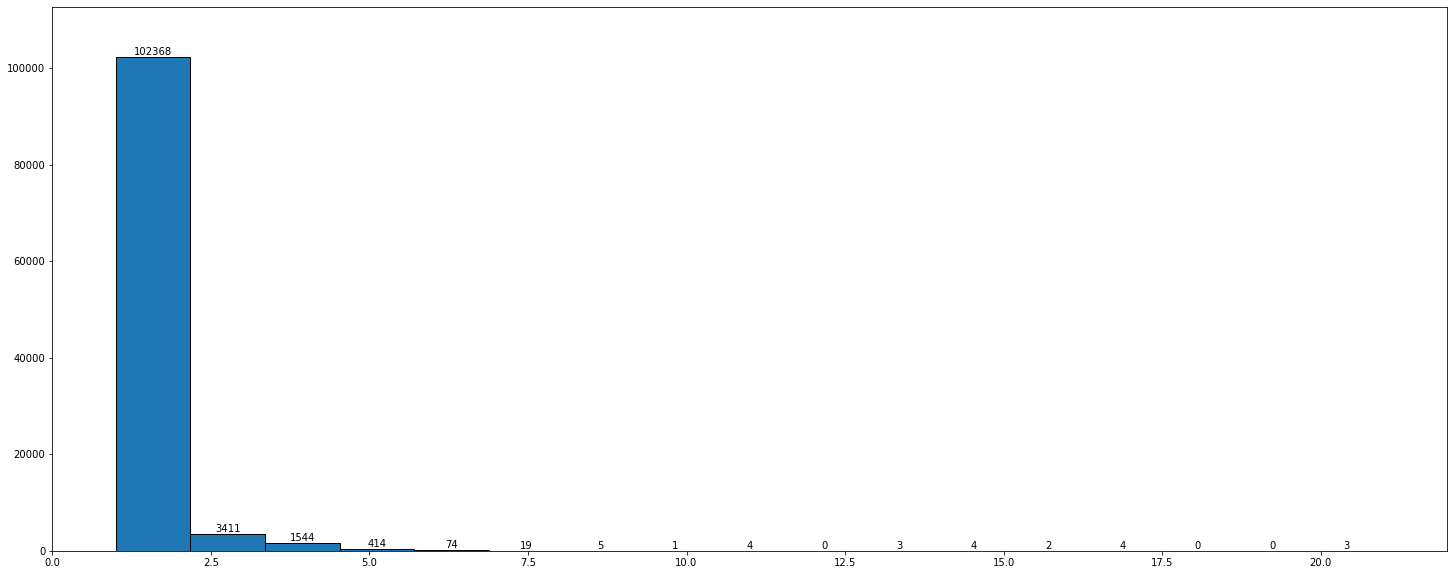

<Figure size 432x288 with 0 Axes>

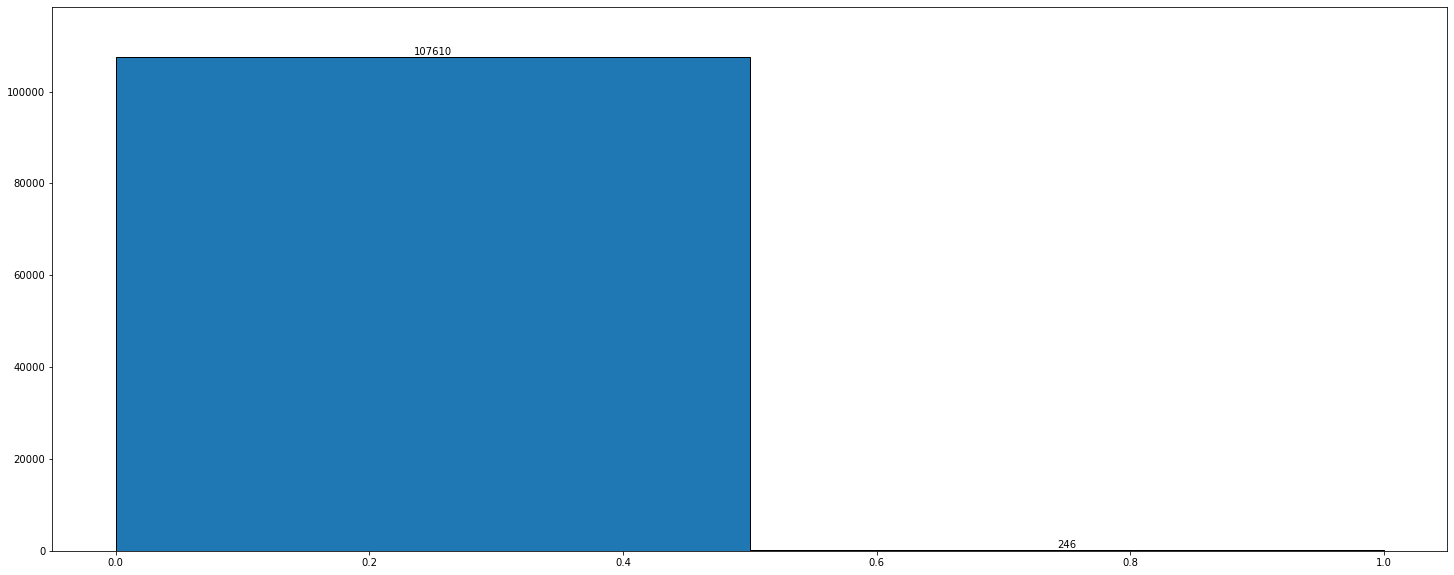

<Figure size 432x288 with 0 Axes>

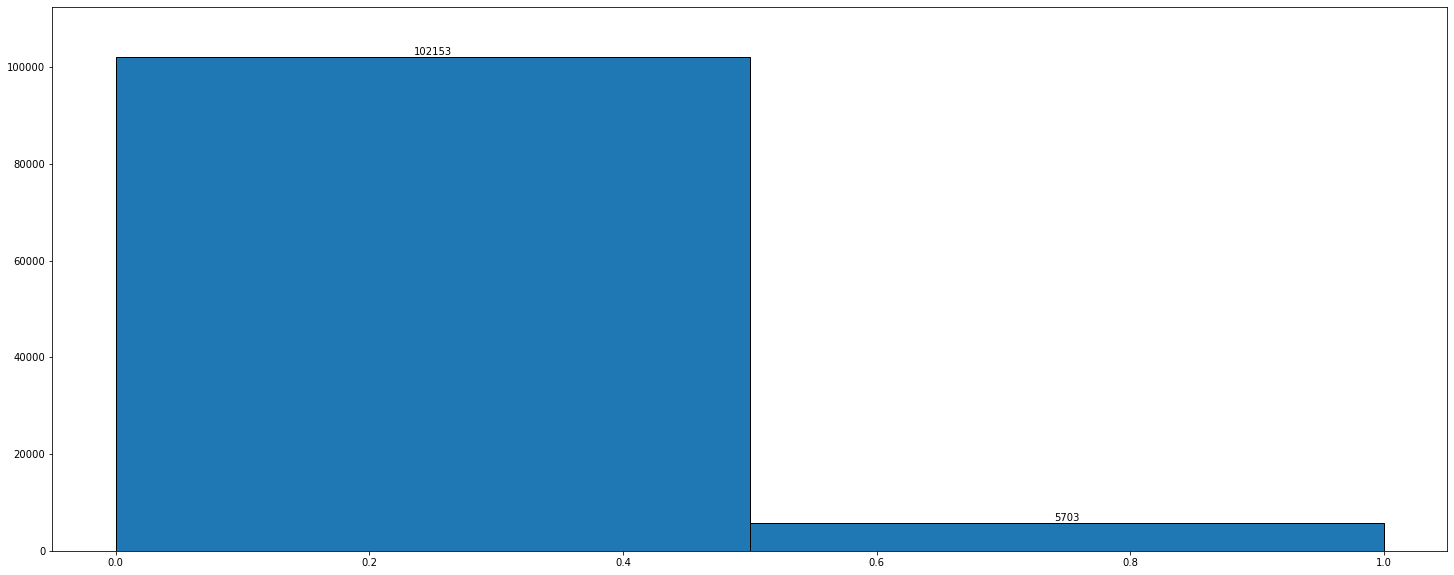

<Figure size 432x288 with 0 Axes>

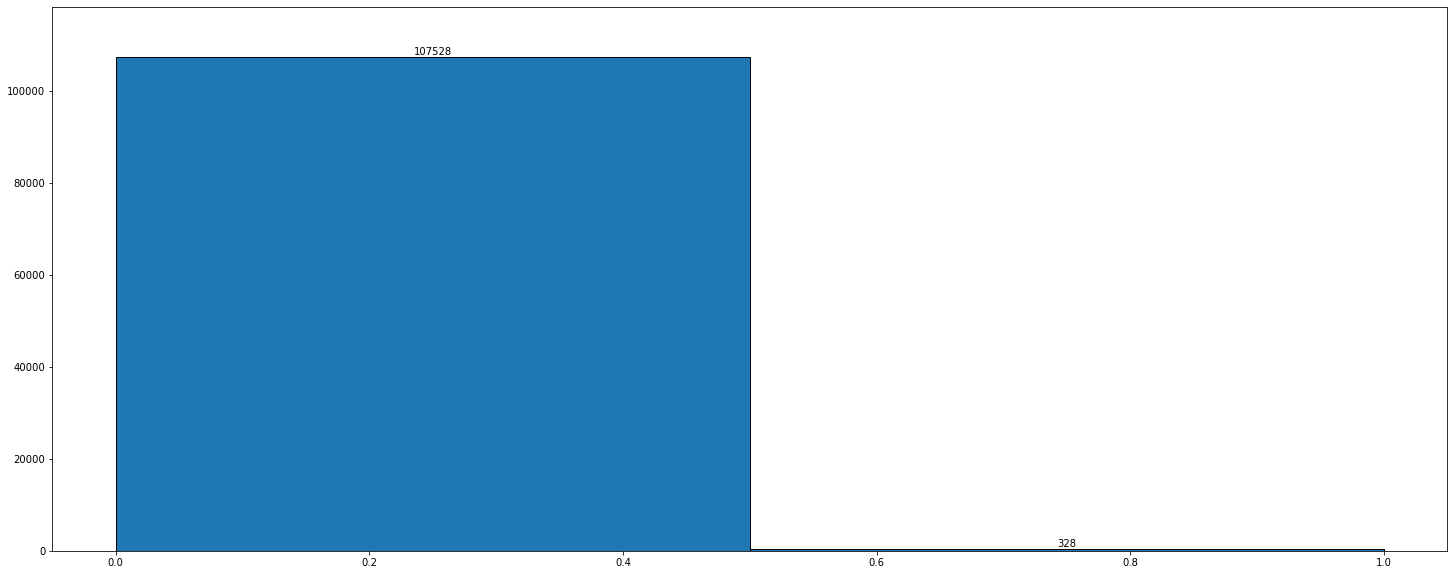

<Figure size 432x288 with 0 Axes>

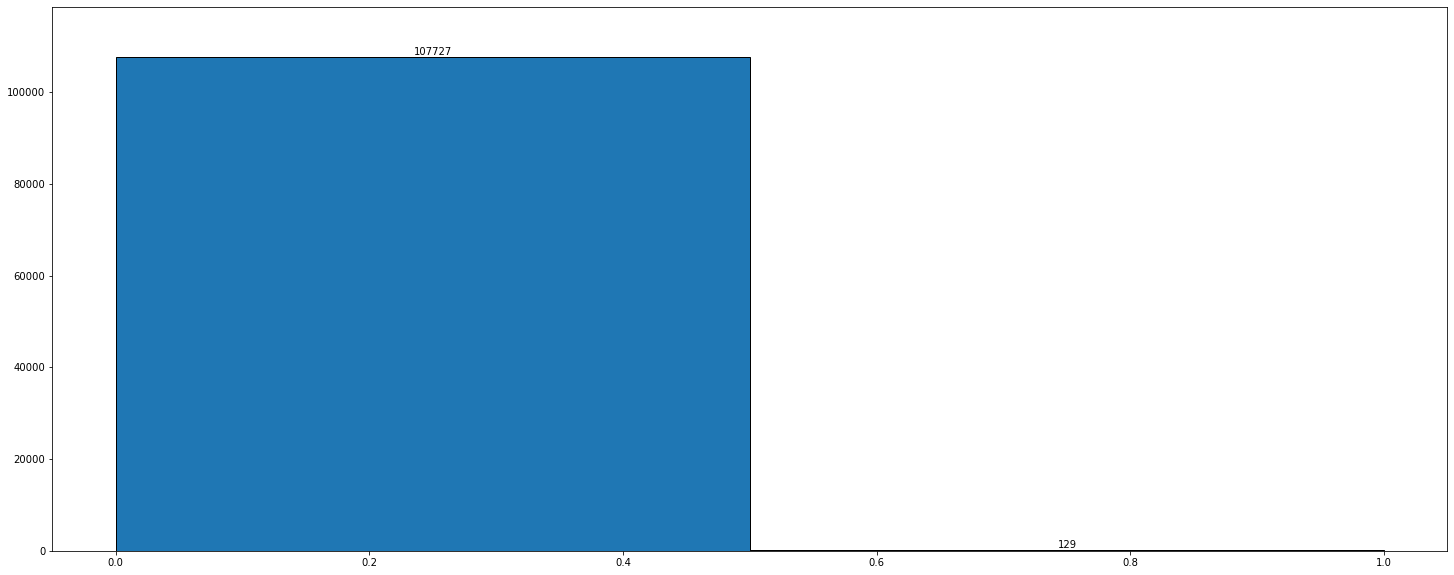

<Figure size 432x288 with 0 Axes>

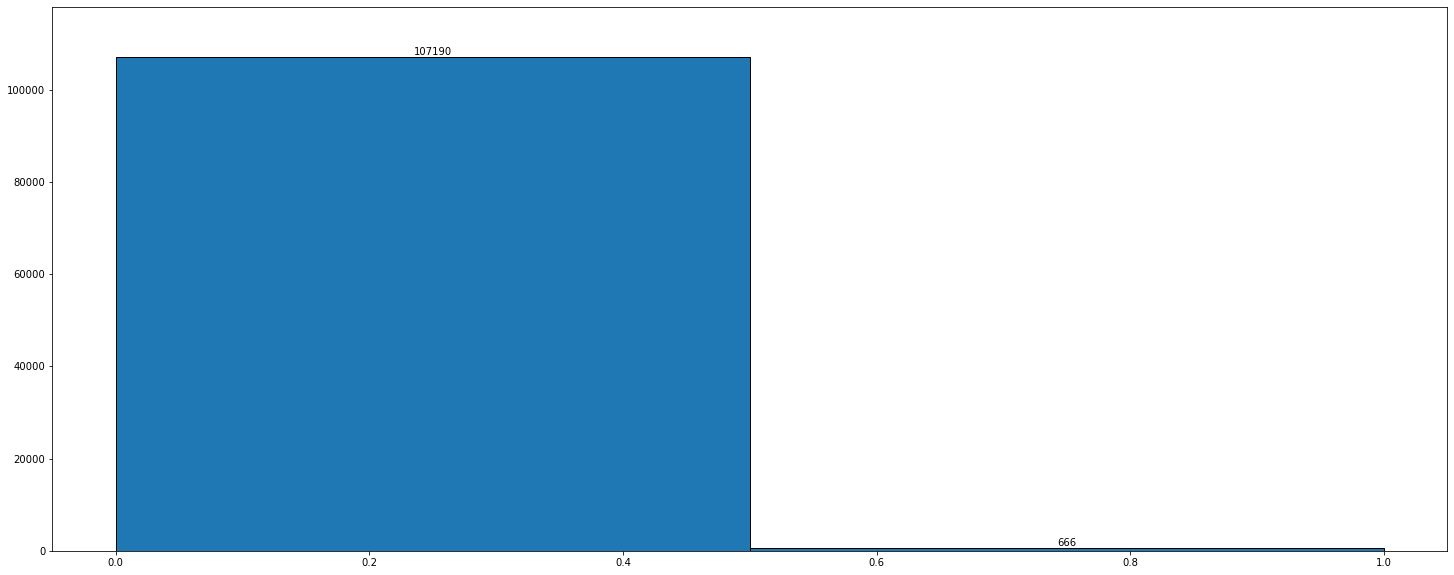

<Figure size 432x288 with 0 Axes>

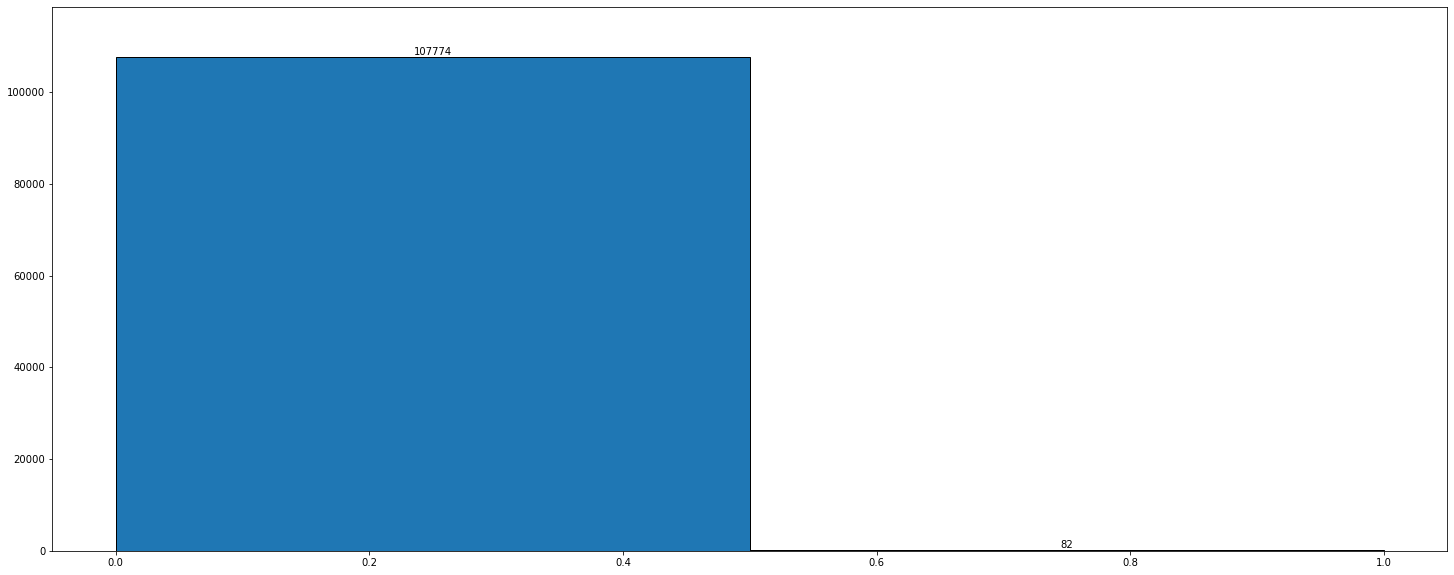

<Figure size 432x288 with 0 Axes>

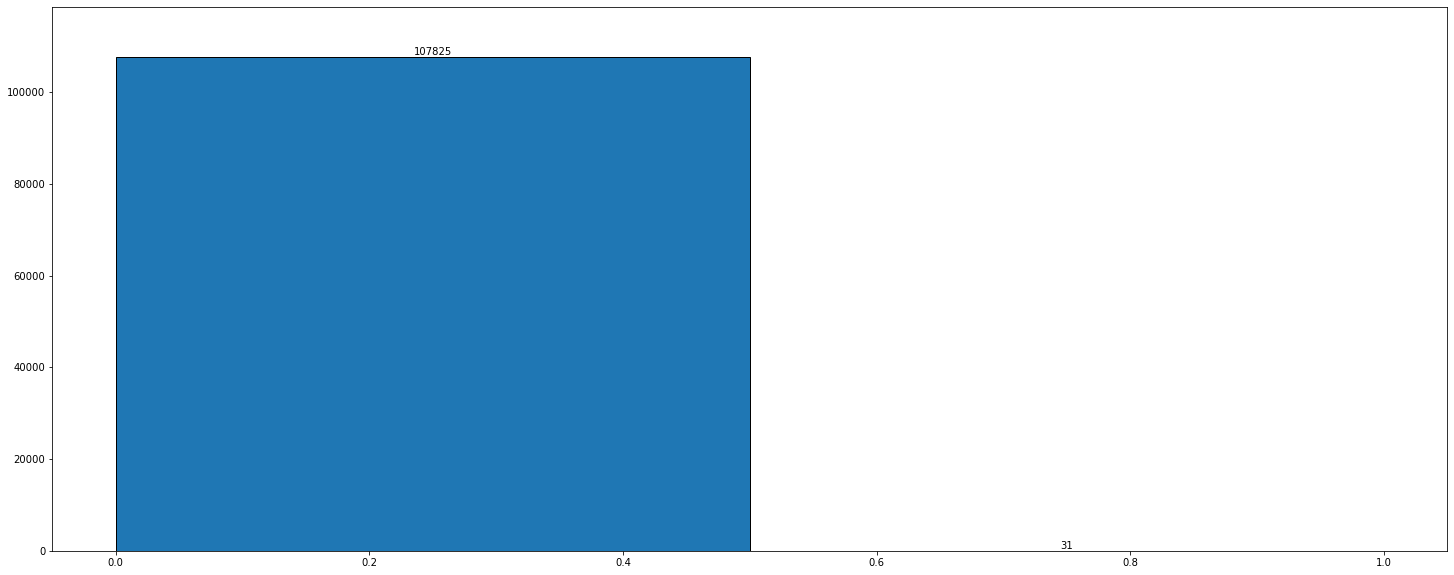

<Figure size 432x288 with 0 Axes>

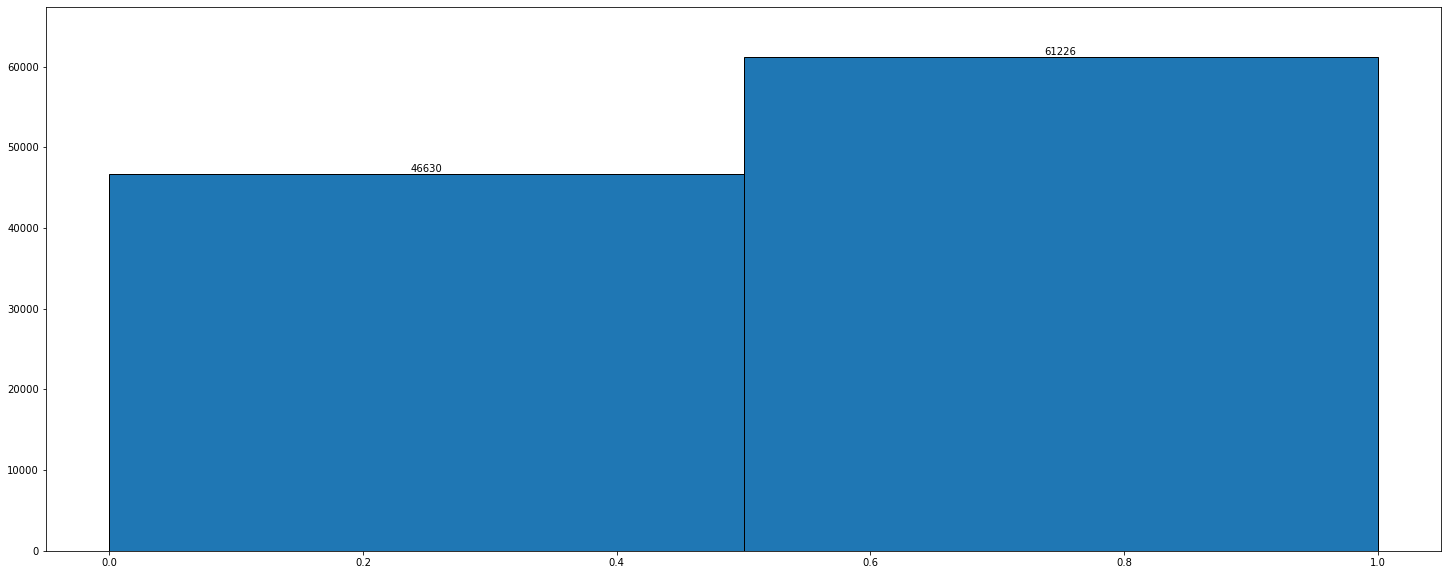

<Figure size 432x288 with 0 Axes>

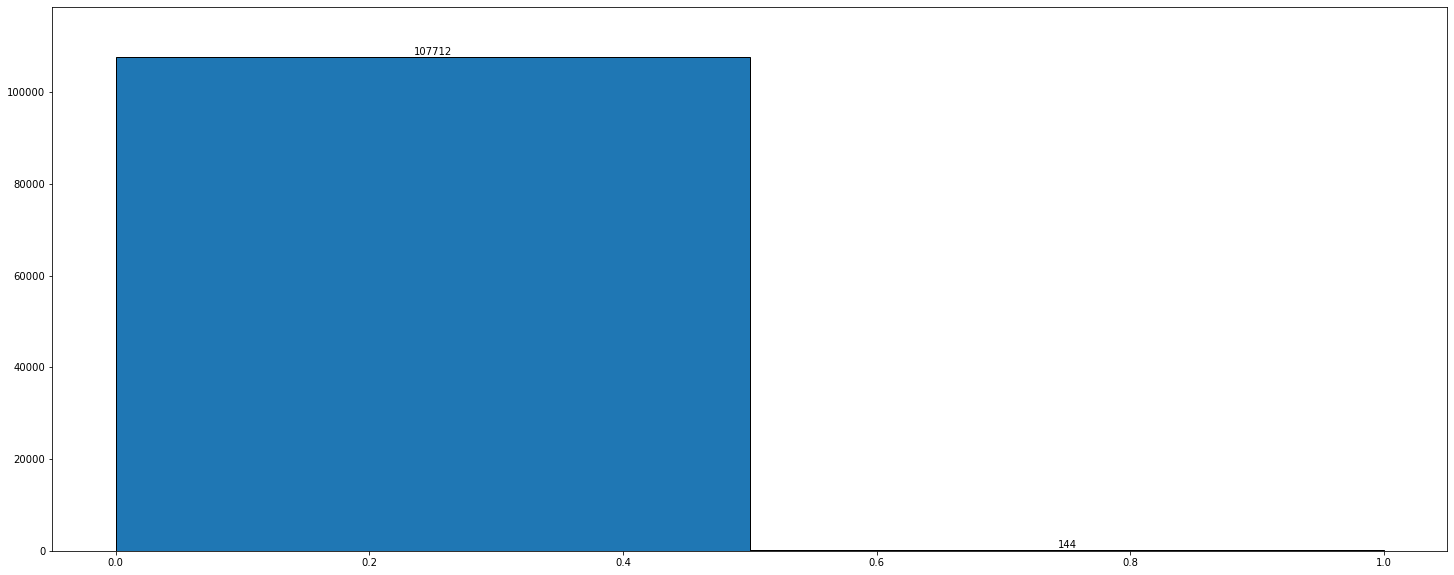

<Figure size 432x288 with 0 Axes>

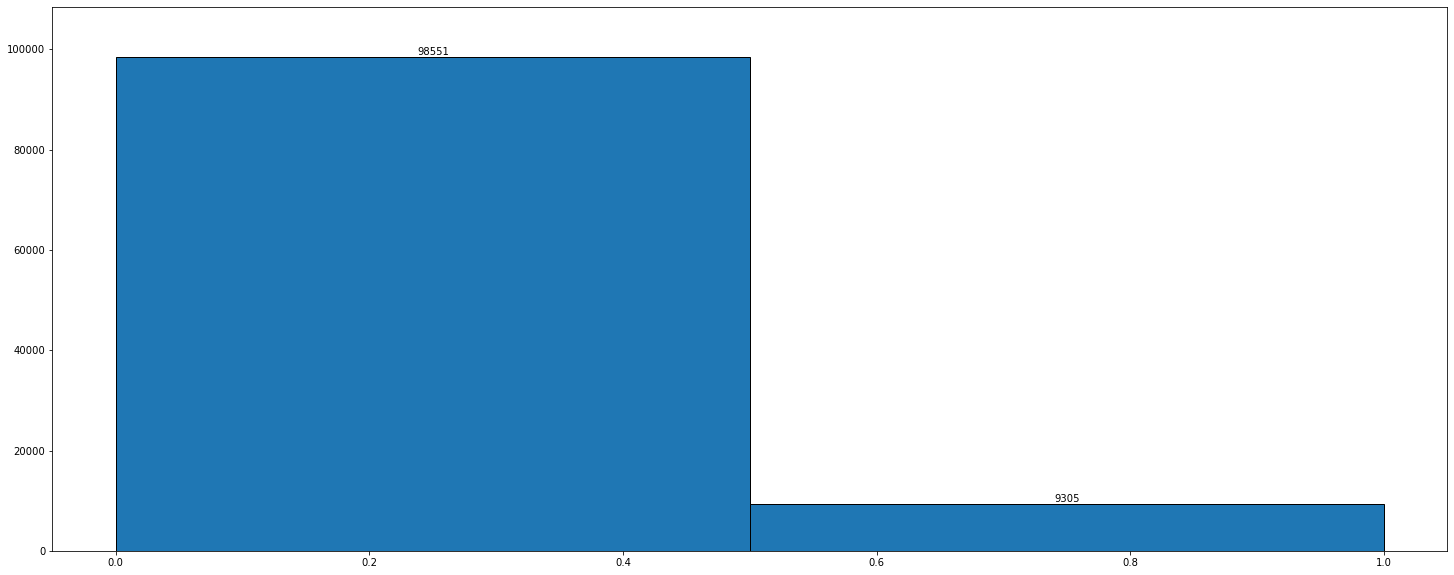

<Figure size 432x288 with 0 Axes>

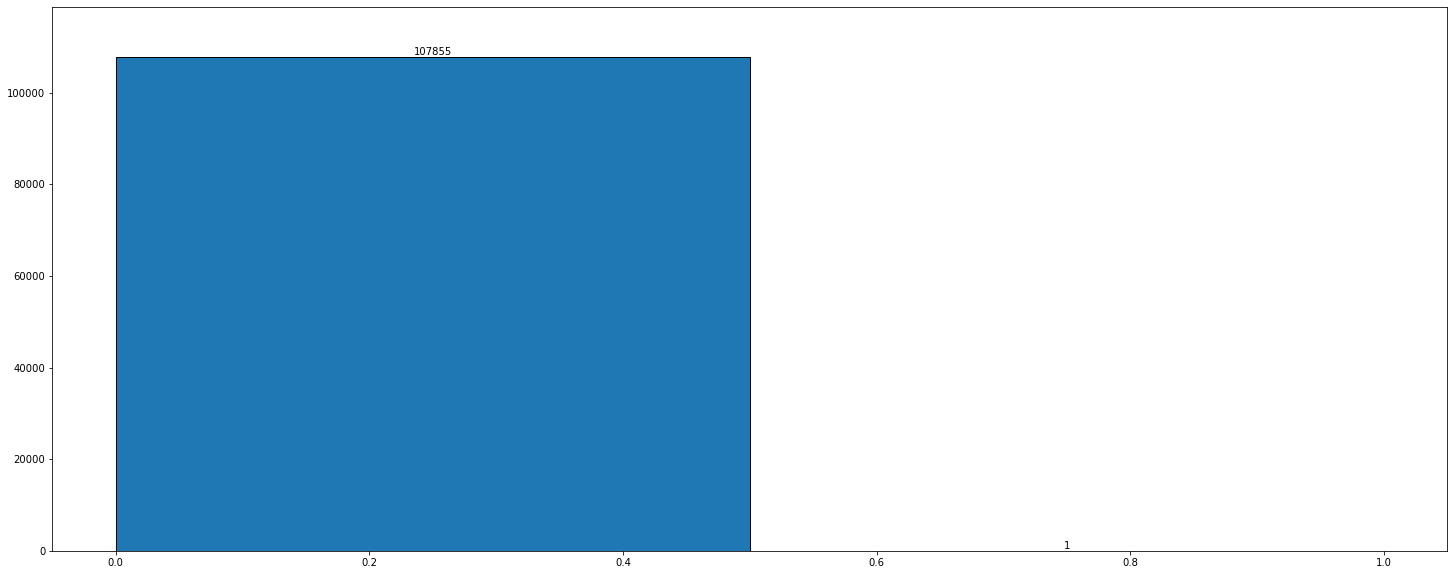

<Figure size 432x288 with 0 Axes>

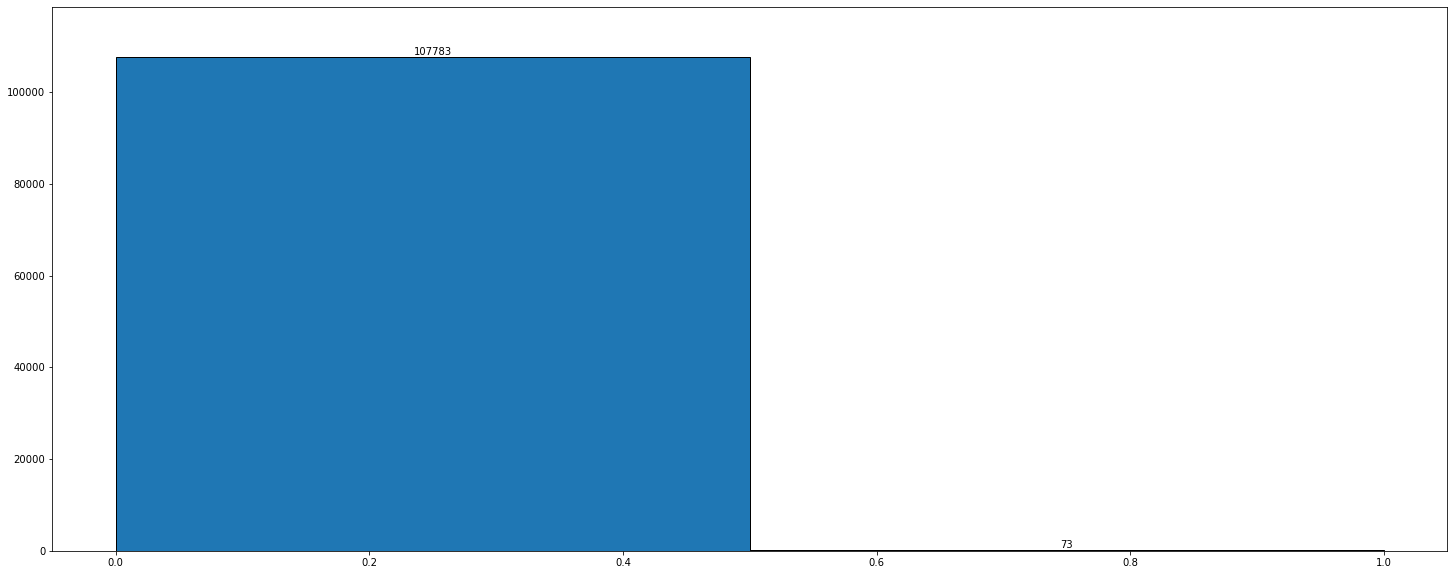

<Figure size 432x288 with 0 Axes>

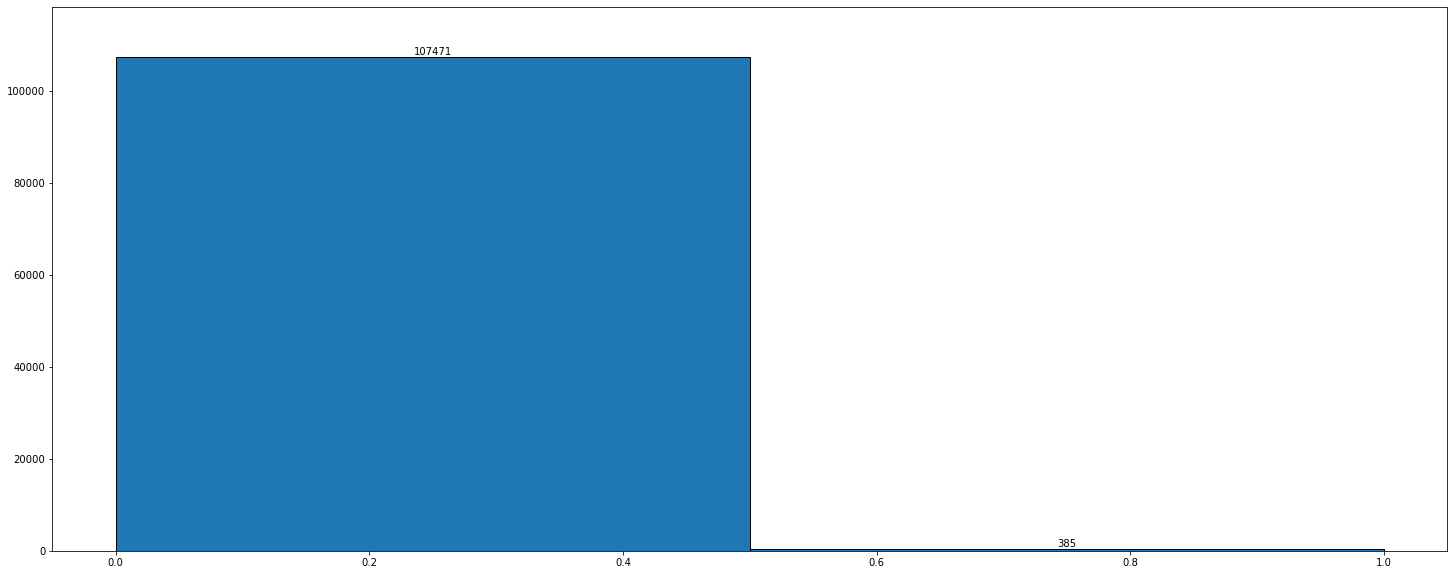

<Figure size 432x288 with 0 Axes>

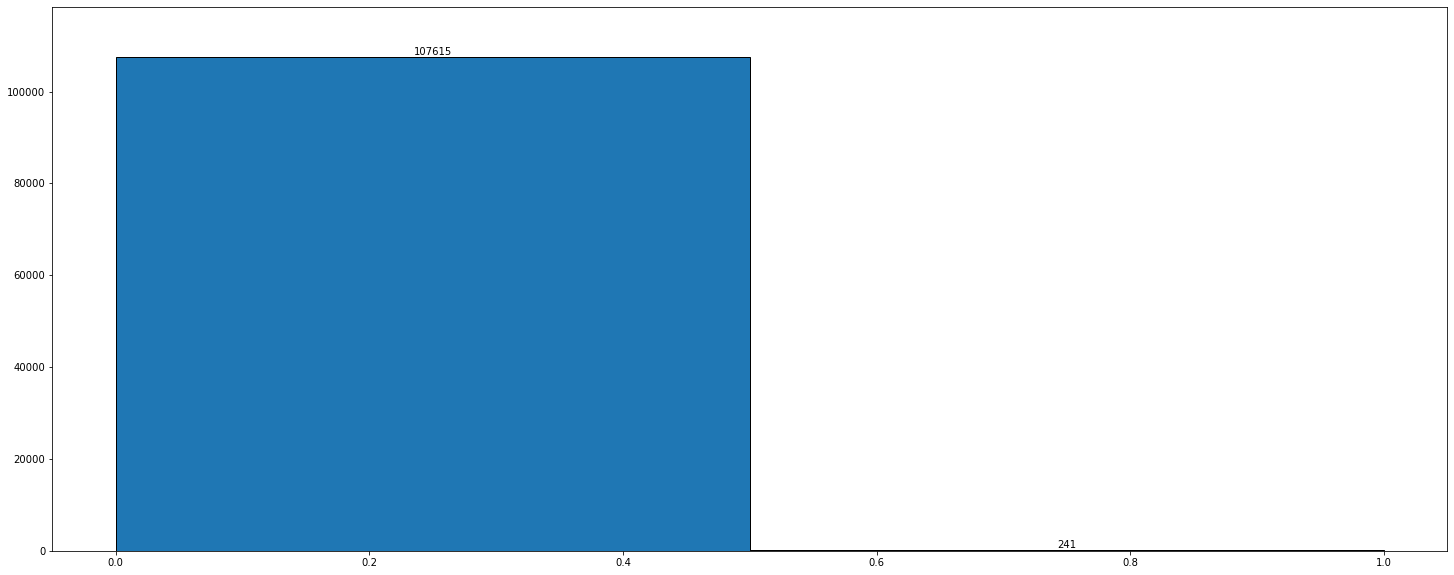

<Figure size 432x288 with 0 Axes>

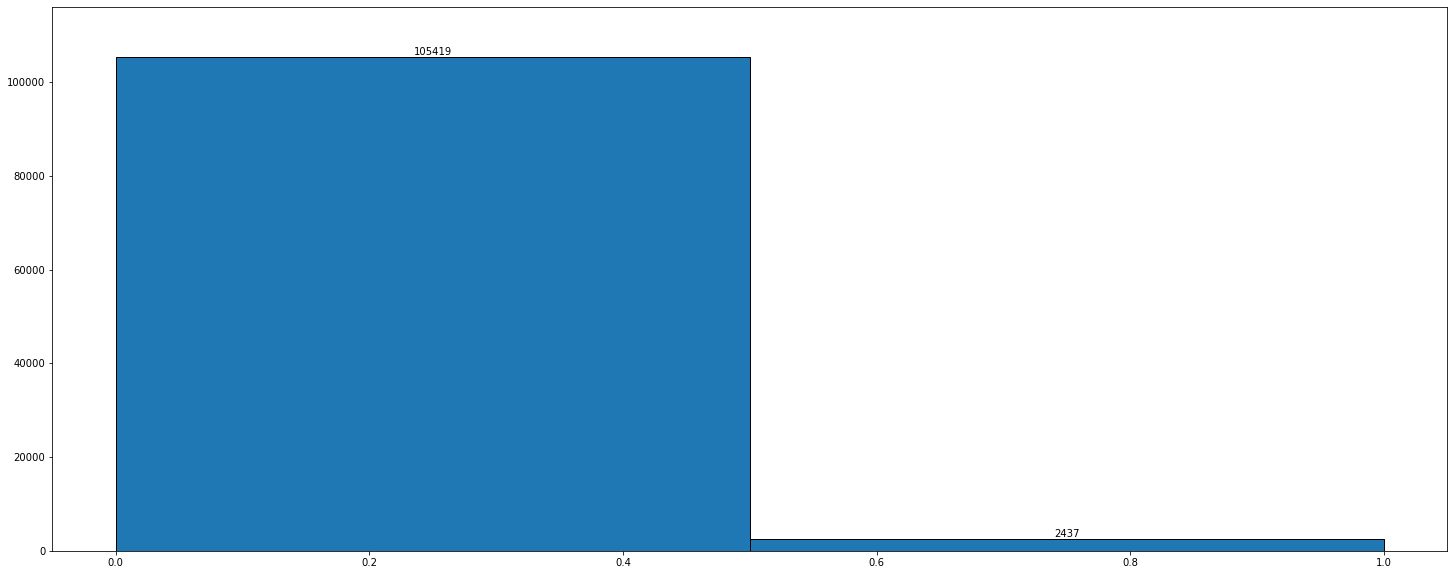

<Figure size 432x288 with 0 Axes>

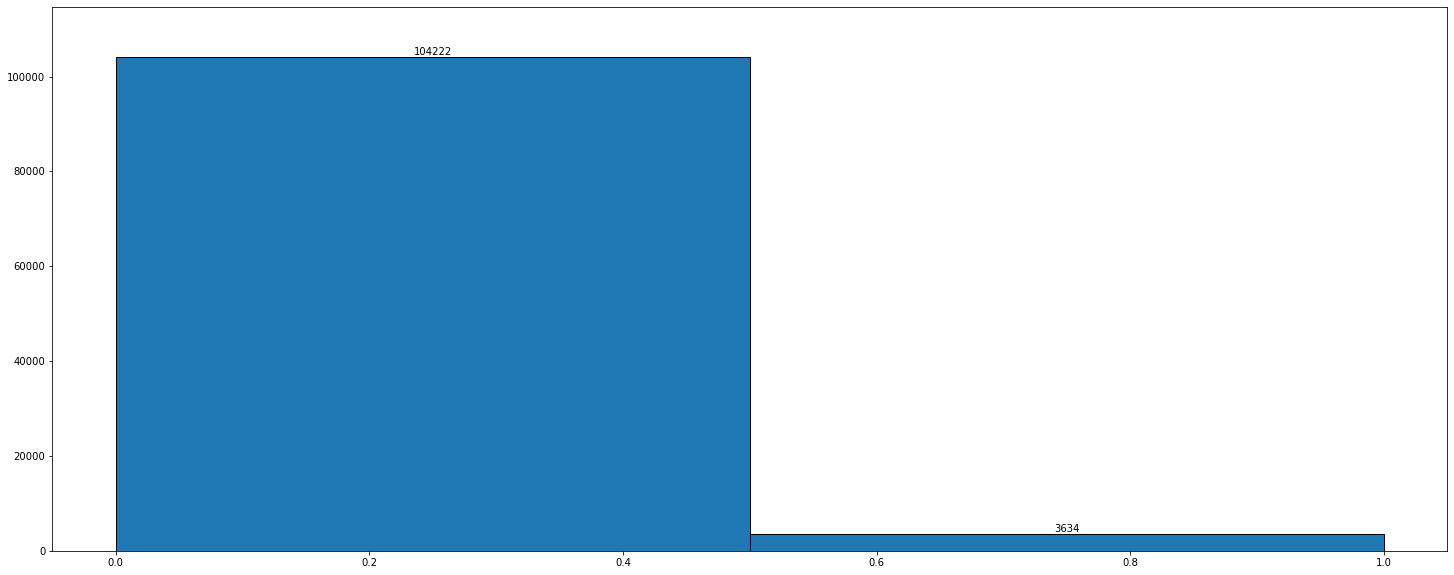

<Figure size 432x288 with 0 Axes>

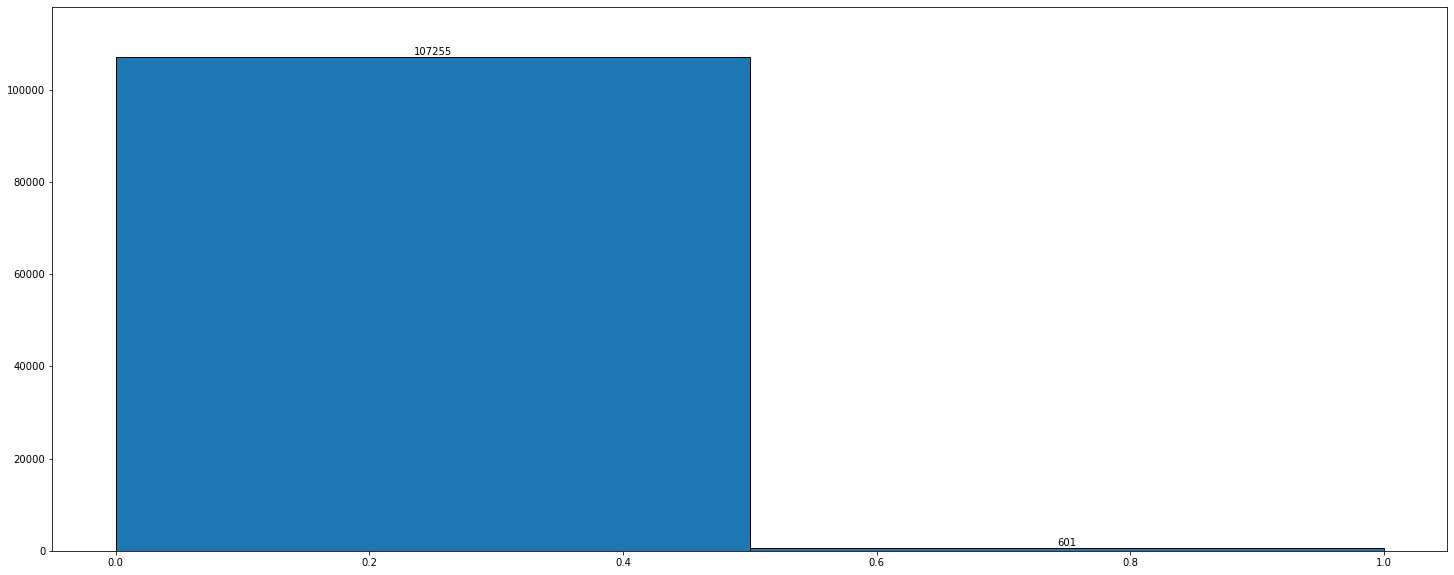

<Figure size 432x288 with 0 Axes>

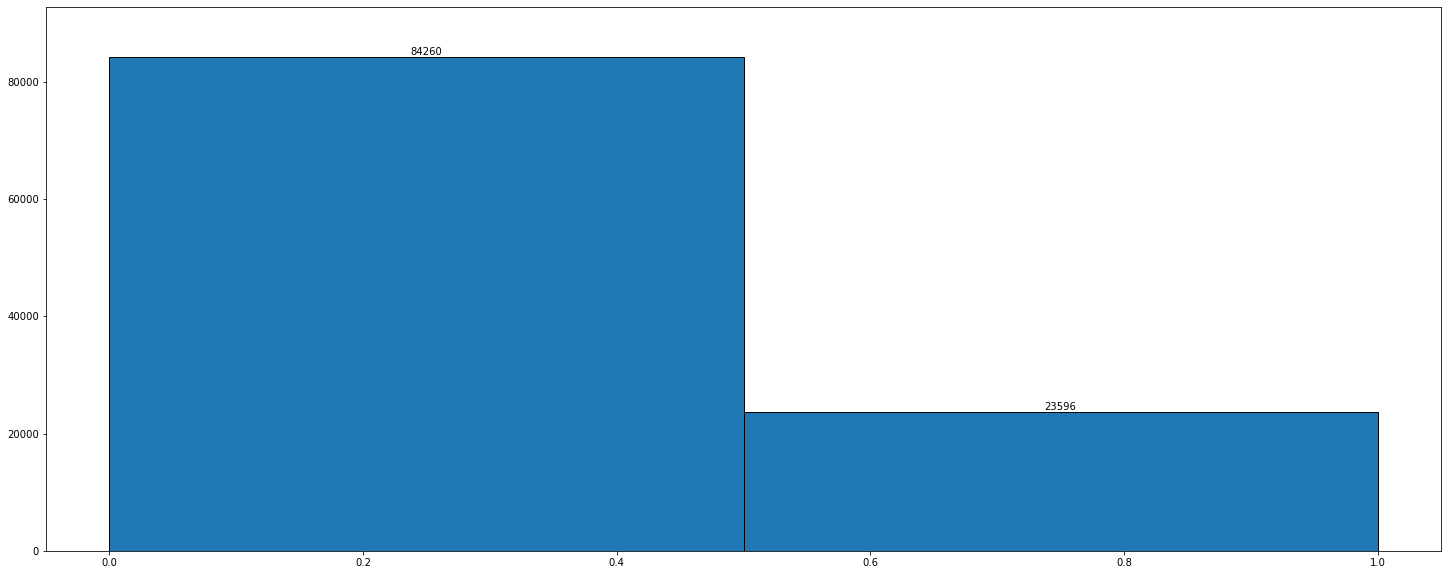

<Figure size 432x288 with 0 Axes>

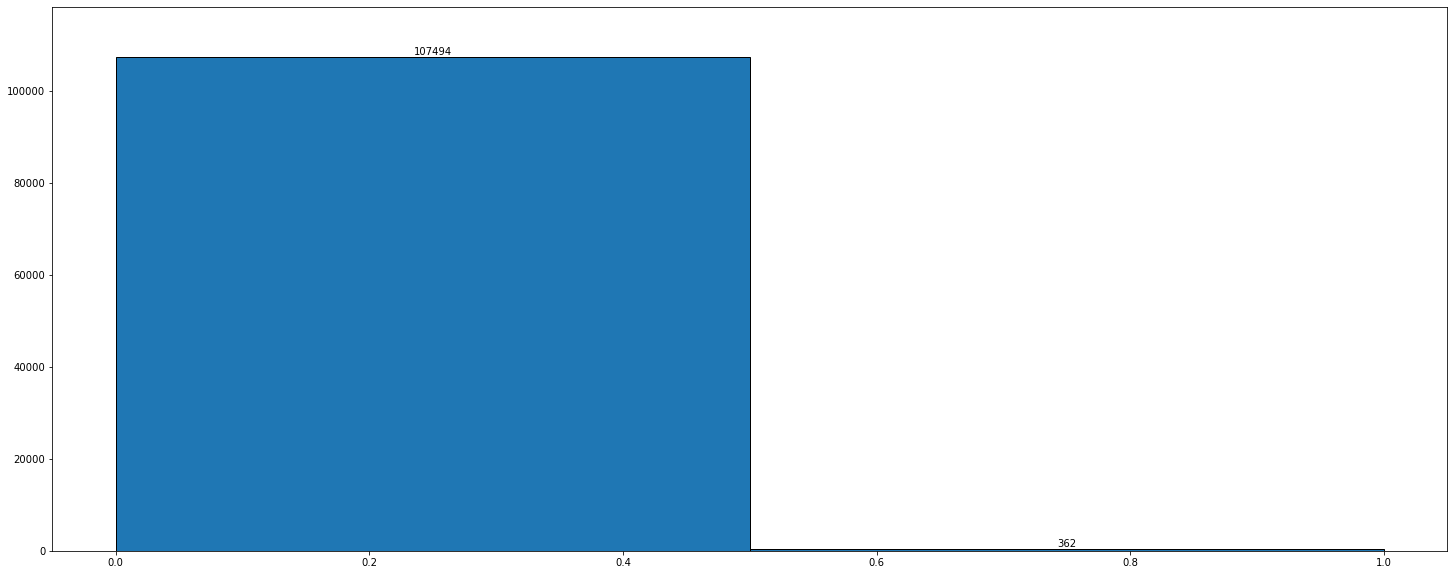

<Figure size 432x288 with 0 Axes>

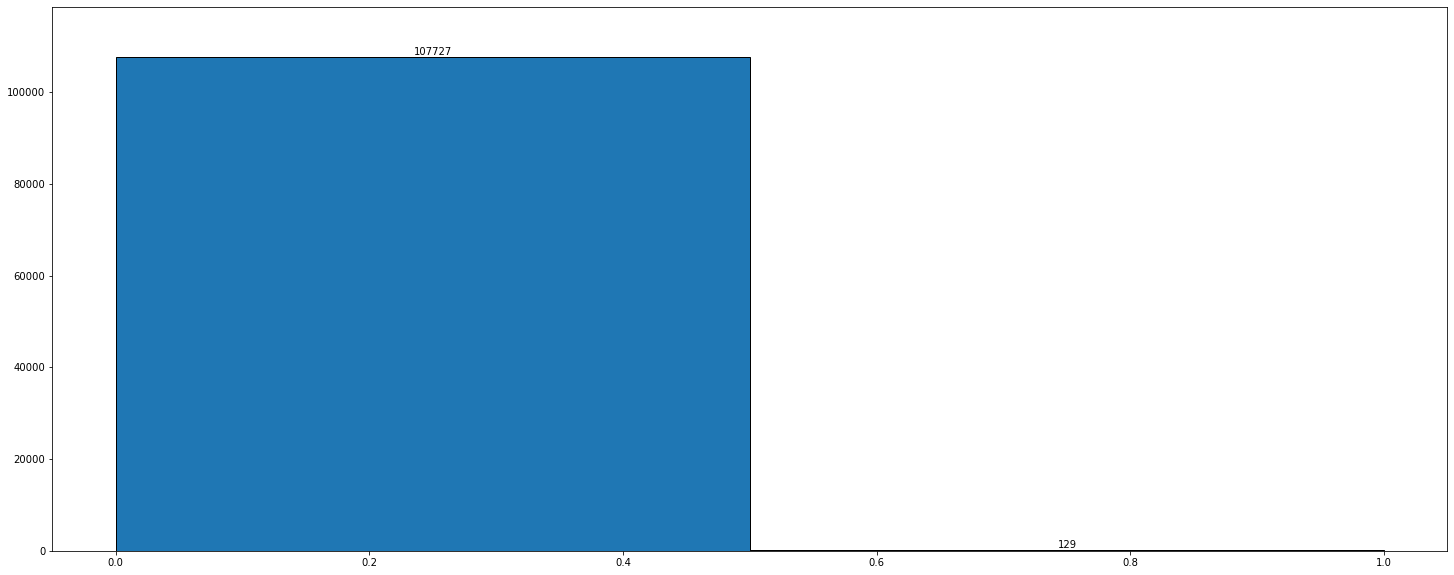

<Figure size 432x288 with 0 Axes>

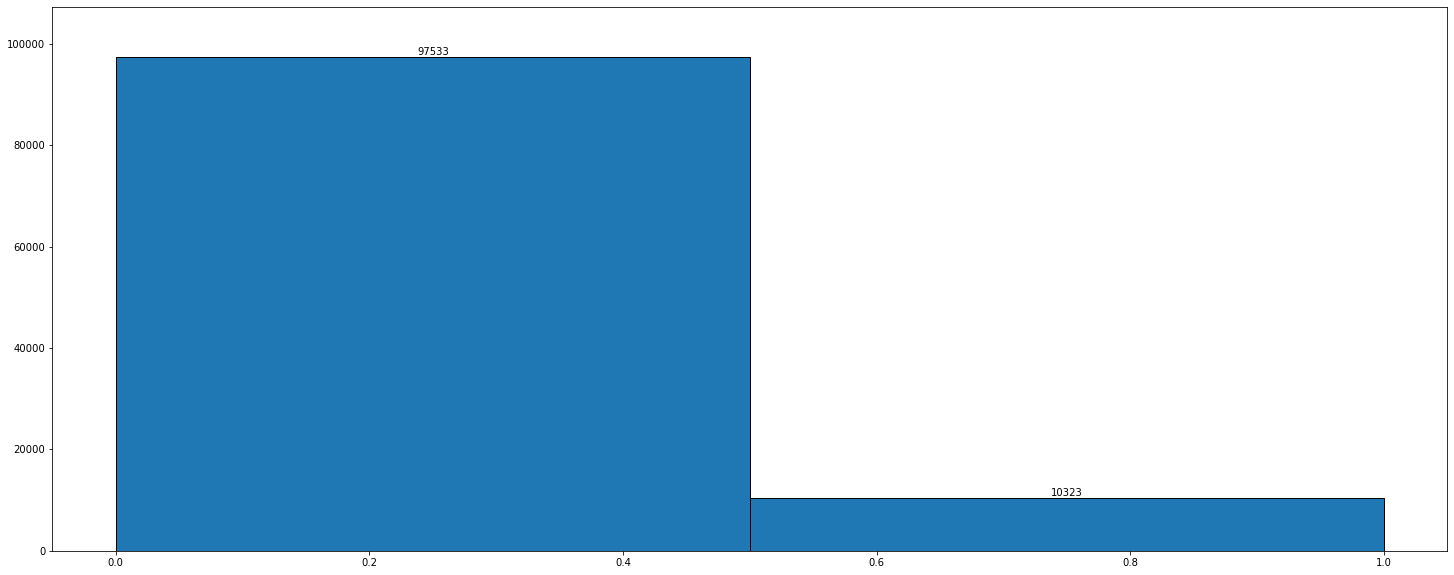

<Figure size 432x288 with 0 Axes>

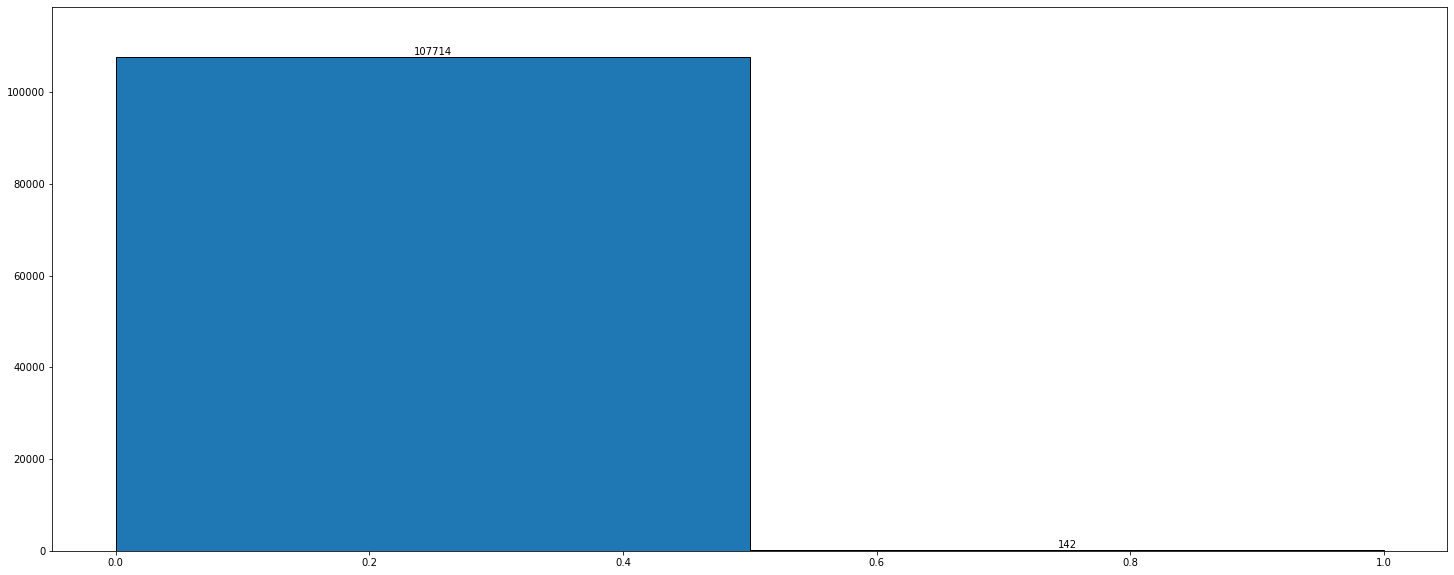

<Figure size 432x288 with 0 Axes>

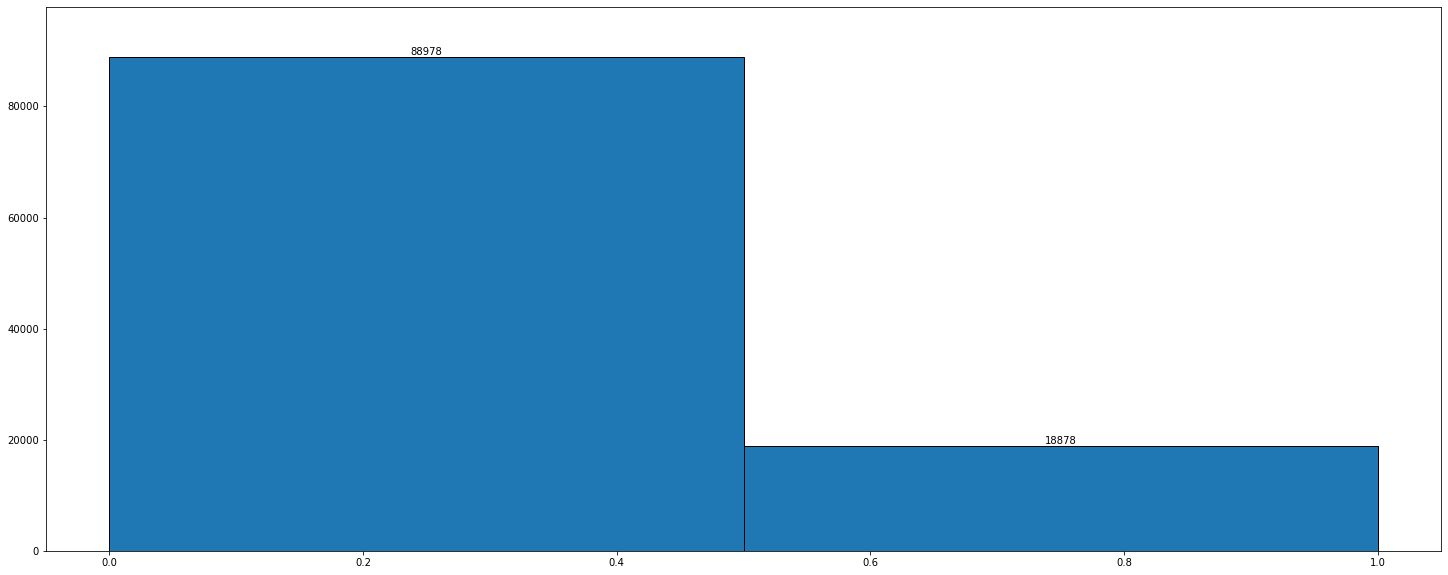

<Figure size 432x288 with 0 Axes>

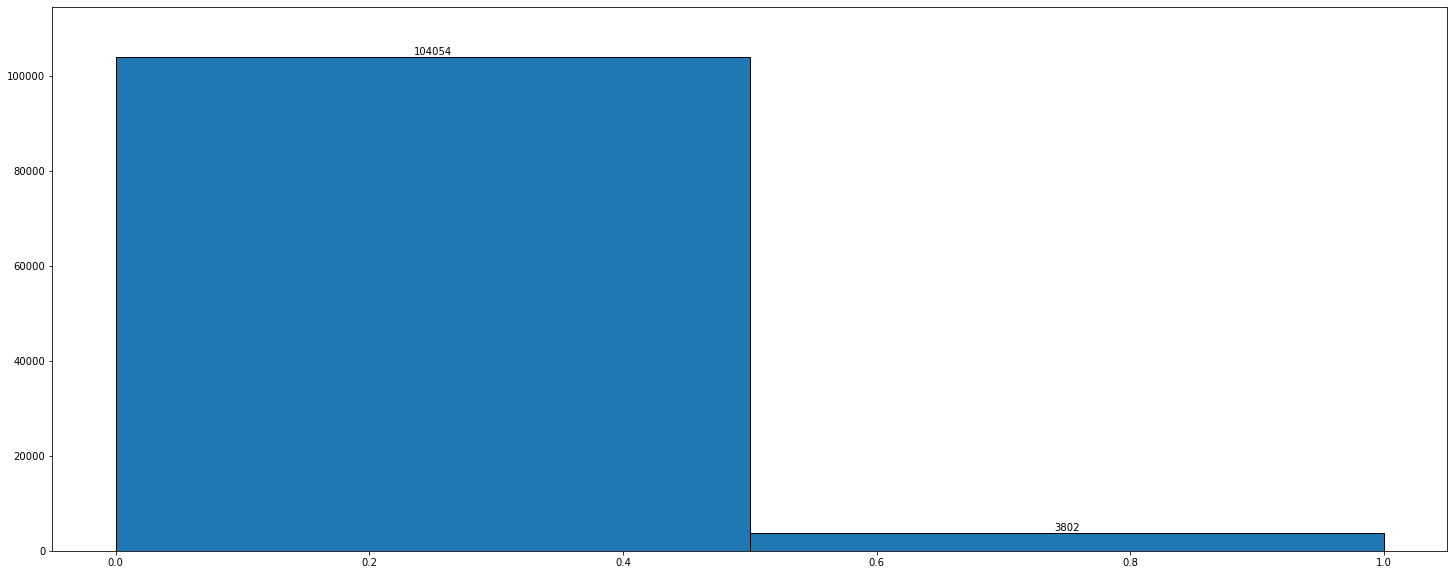

<Figure size 432x288 with 0 Axes>

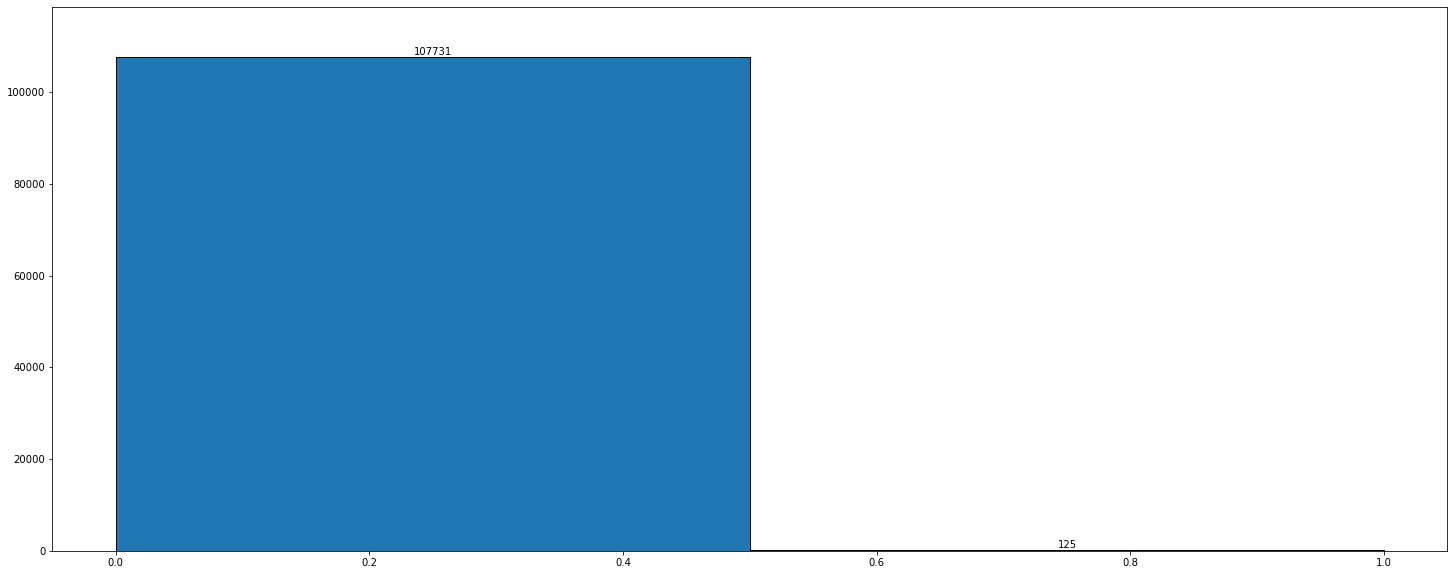

<Figure size 432x288 with 0 Axes>

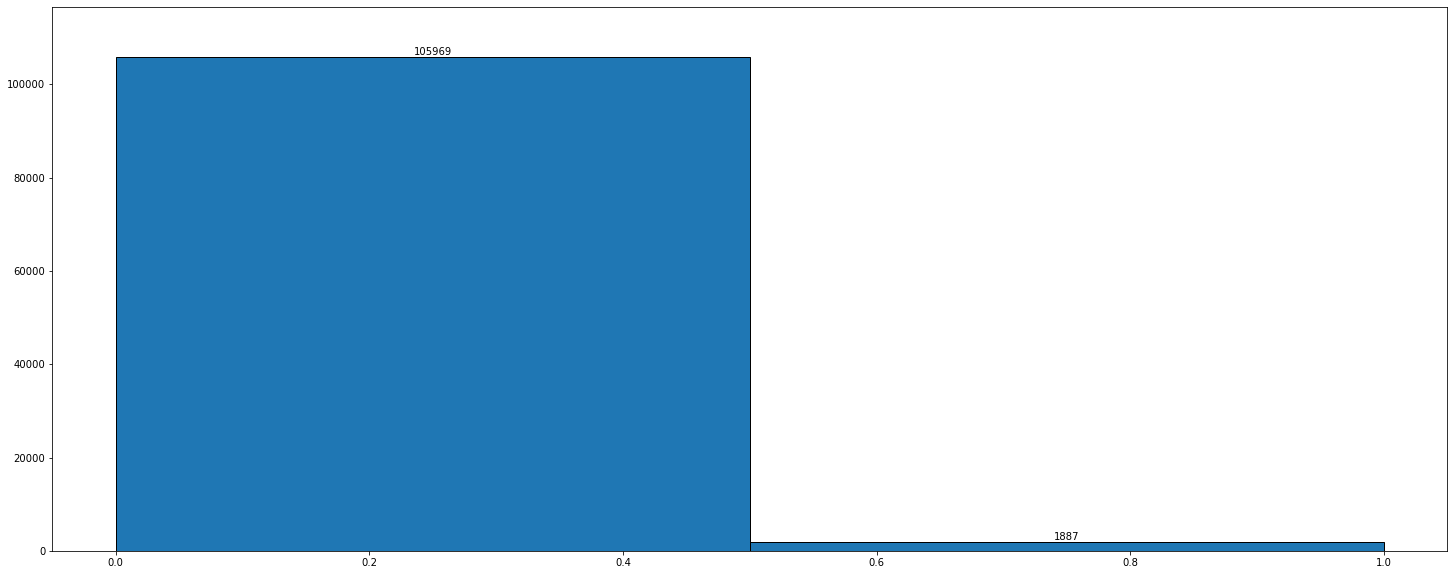

<Figure size 432x288 with 0 Axes>

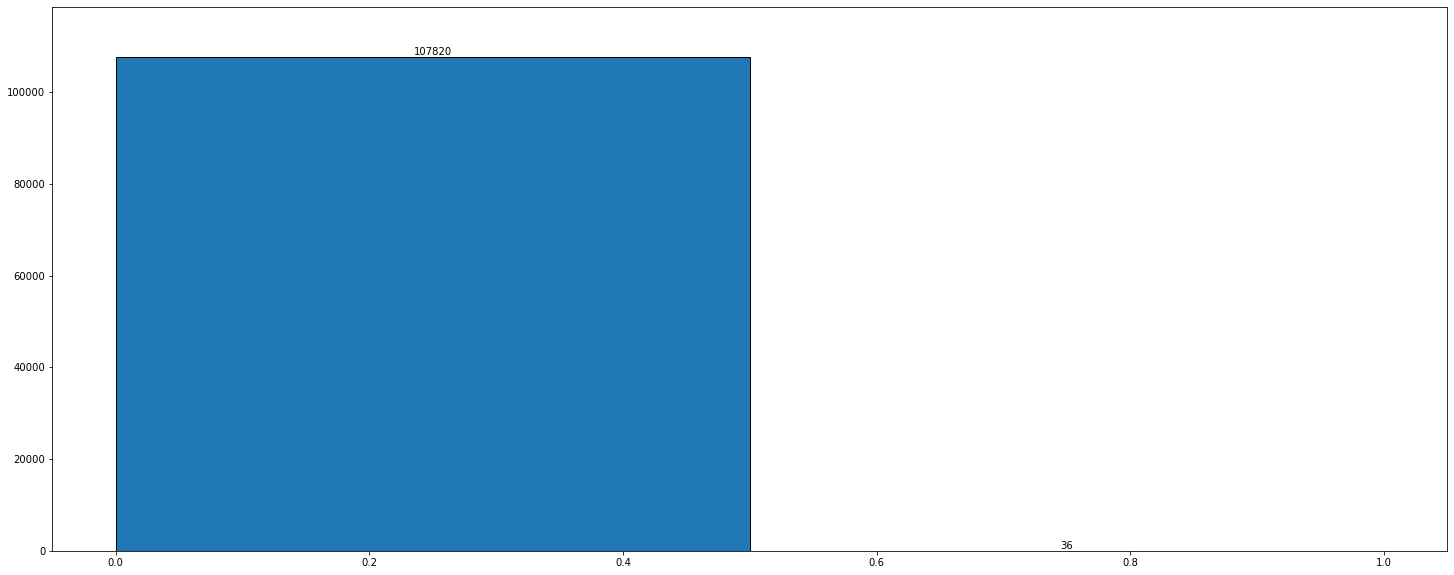

<Figure size 432x288 with 0 Axes>

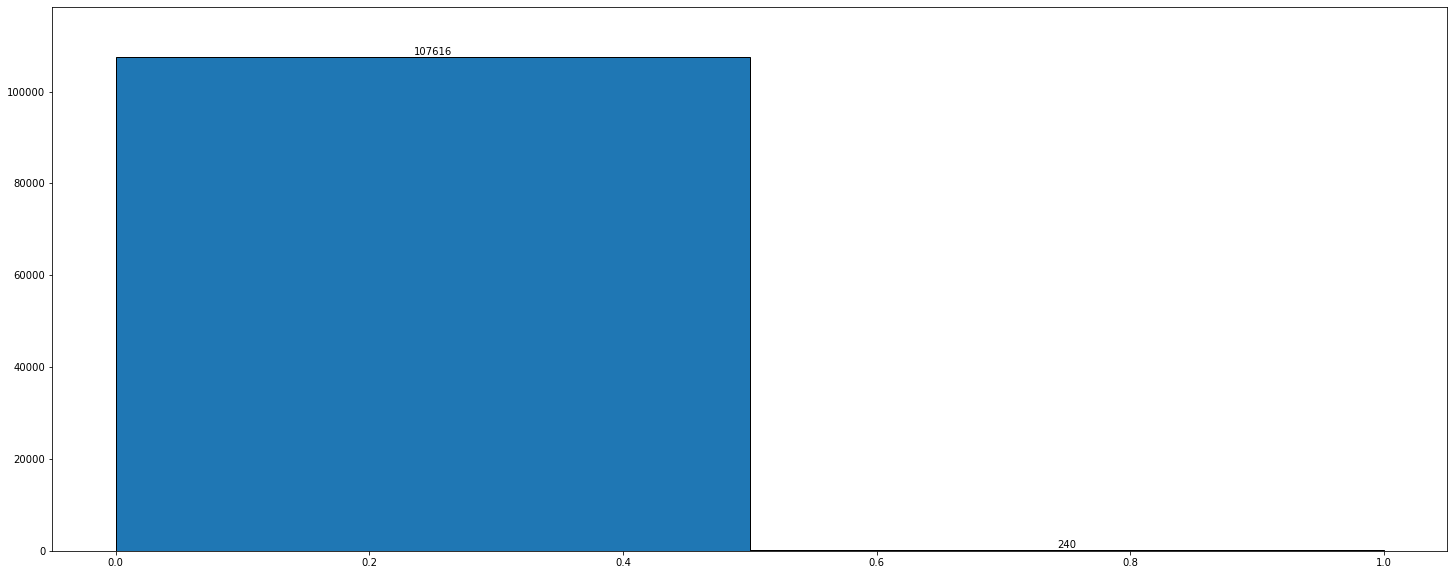

<Figure size 432x288 with 0 Axes>

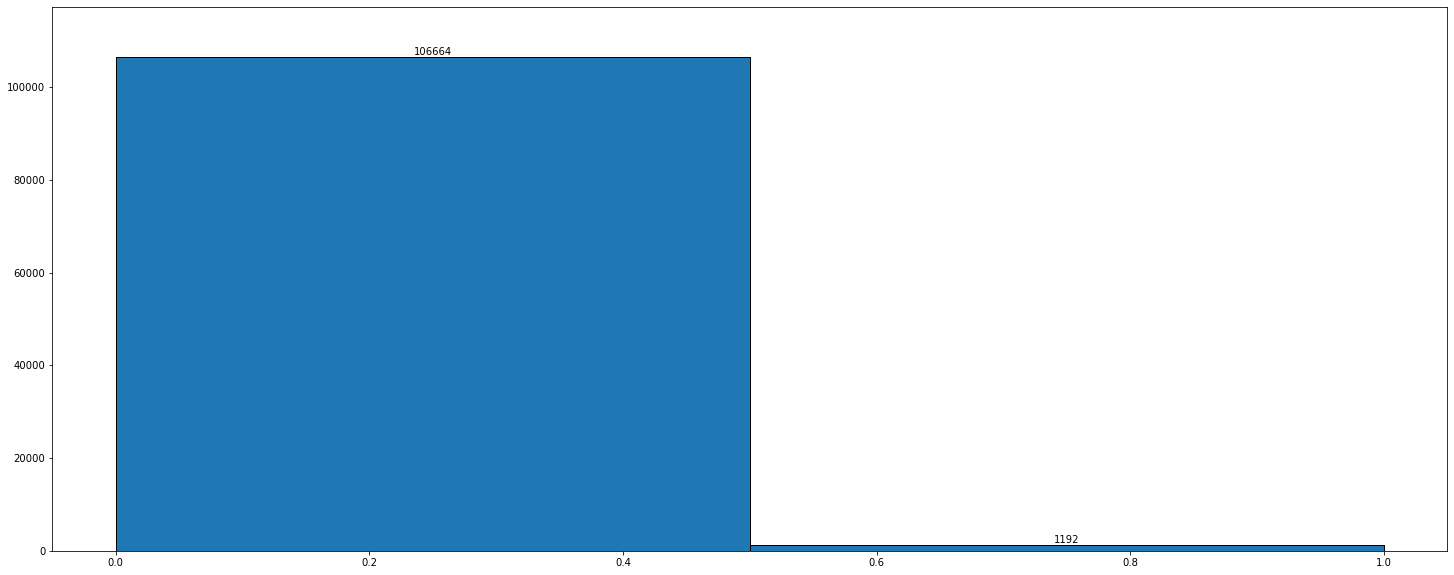

<Figure size 432x288 with 0 Axes>

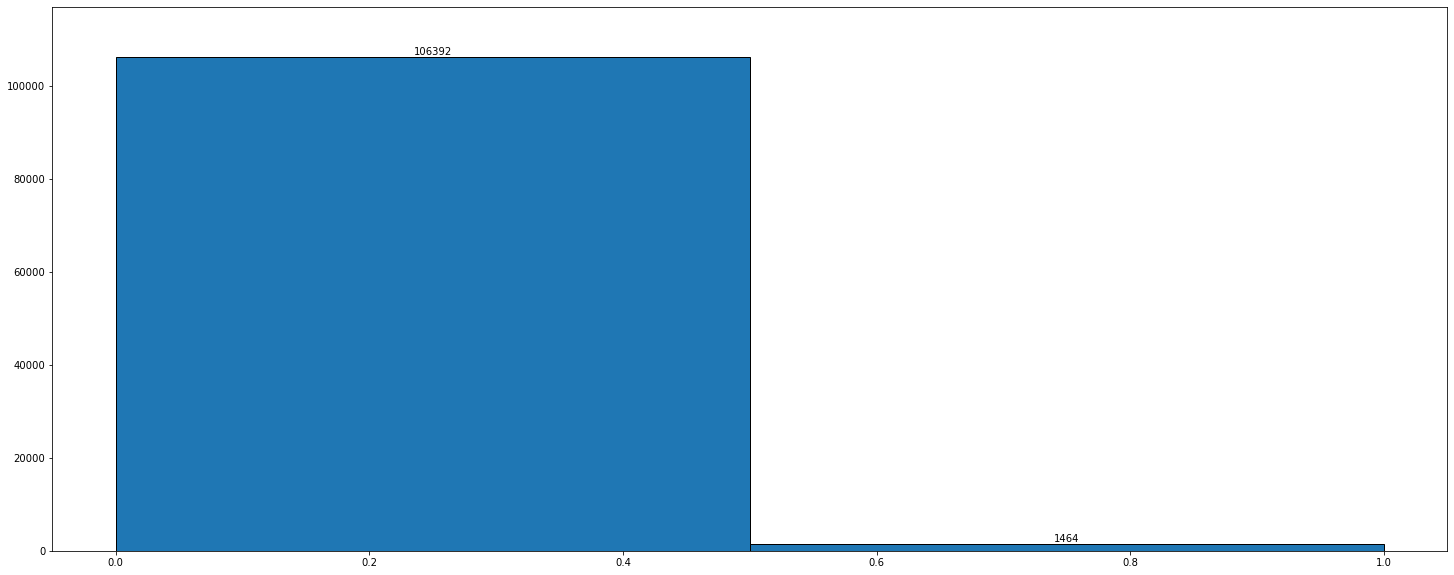

<Figure size 432x288 with 0 Axes>

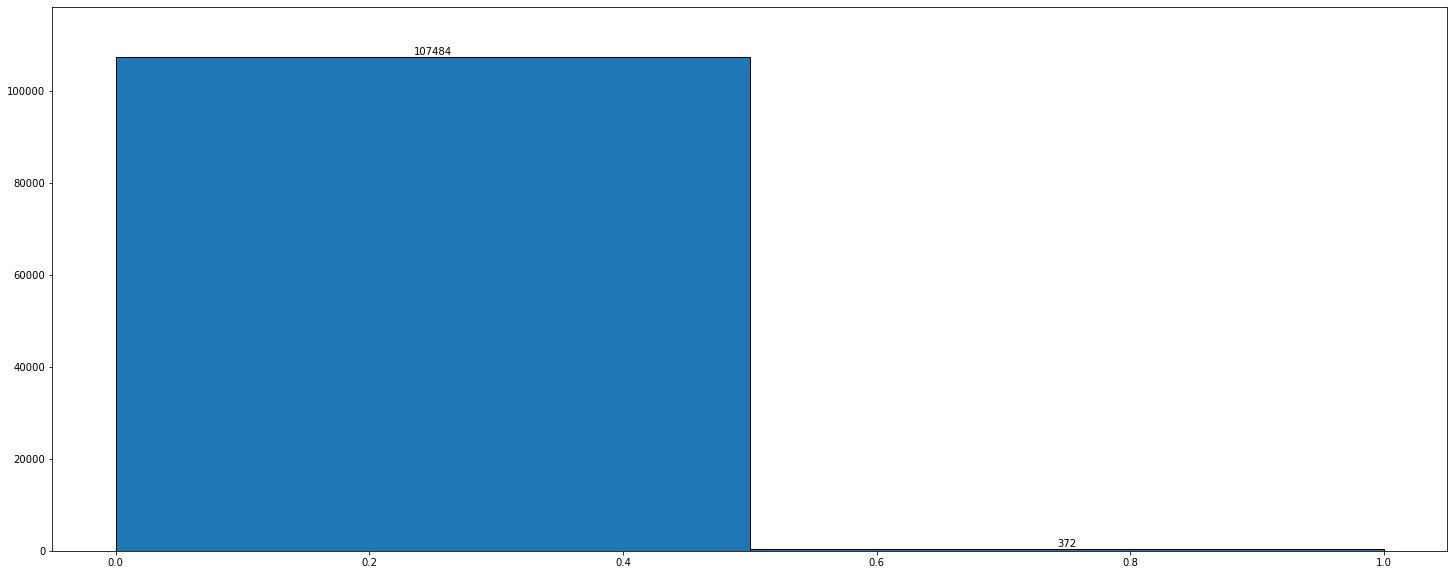

<Figure size 432x288 with 0 Axes>

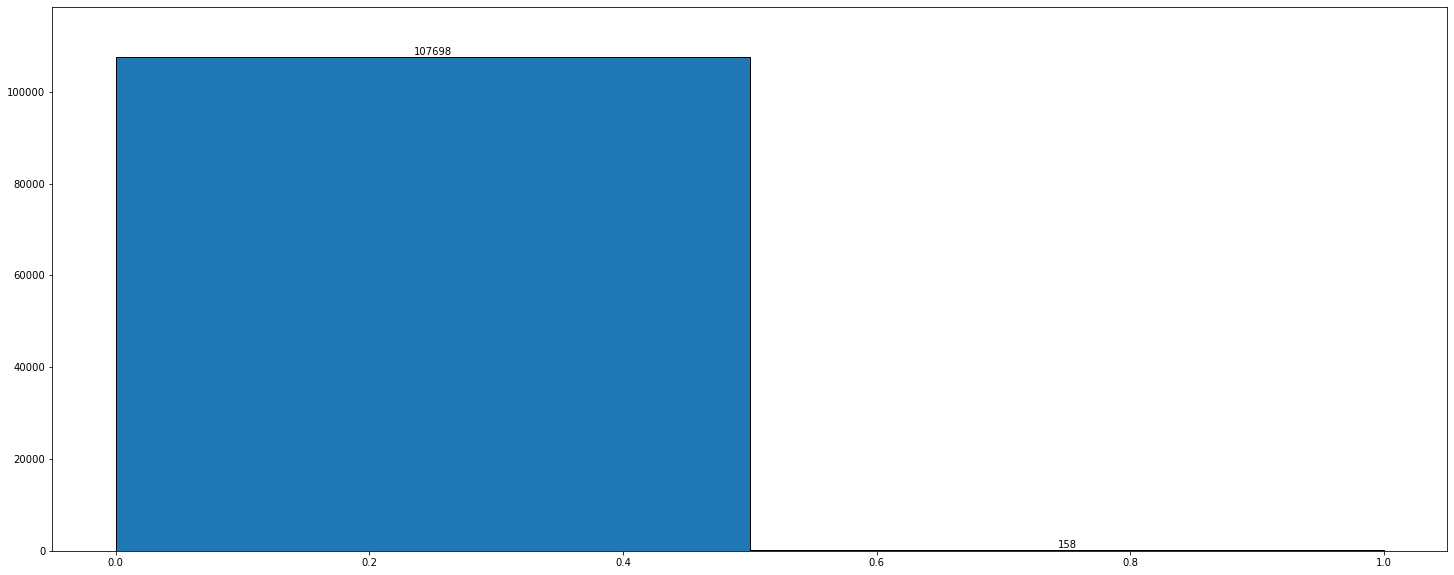

<Figure size 432x288 with 0 Axes>

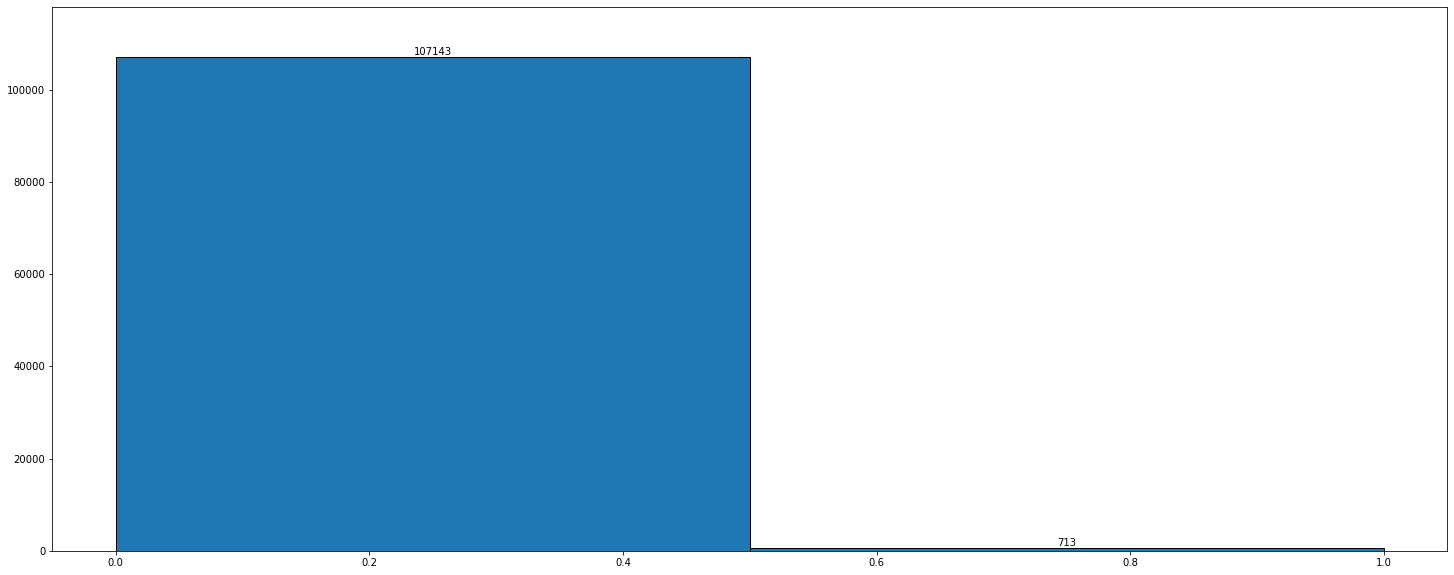

<Figure size 432x288 with 0 Axes>

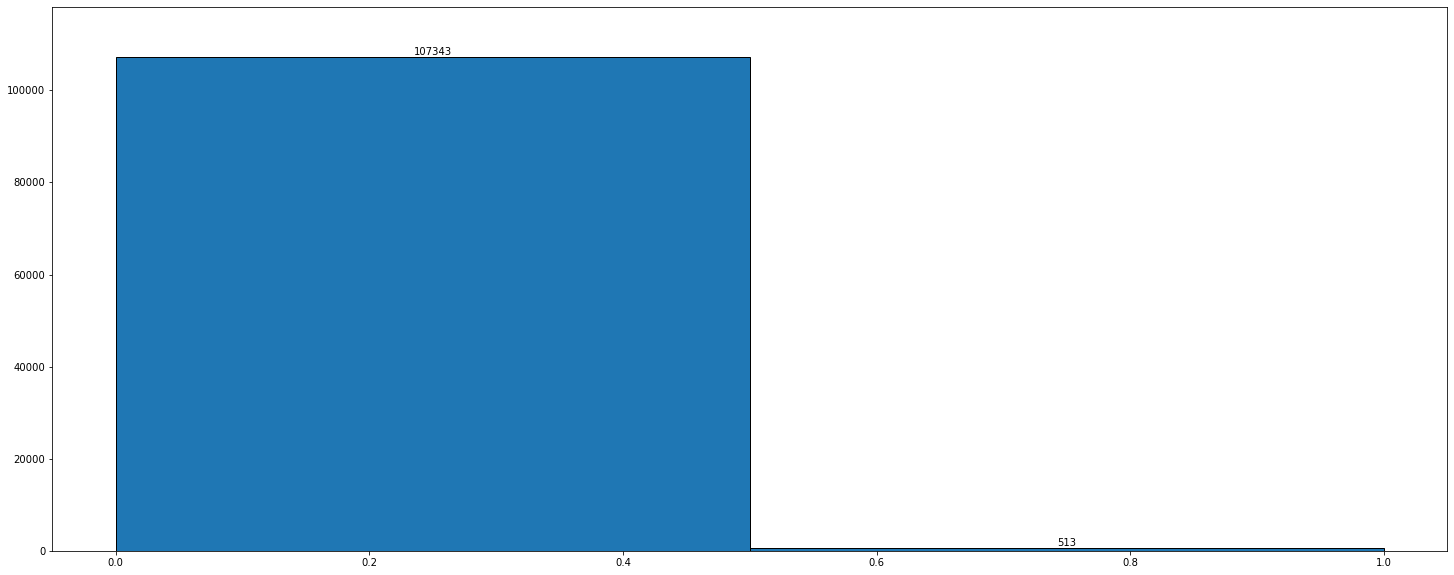

<Figure size 432x288 with 0 Axes>

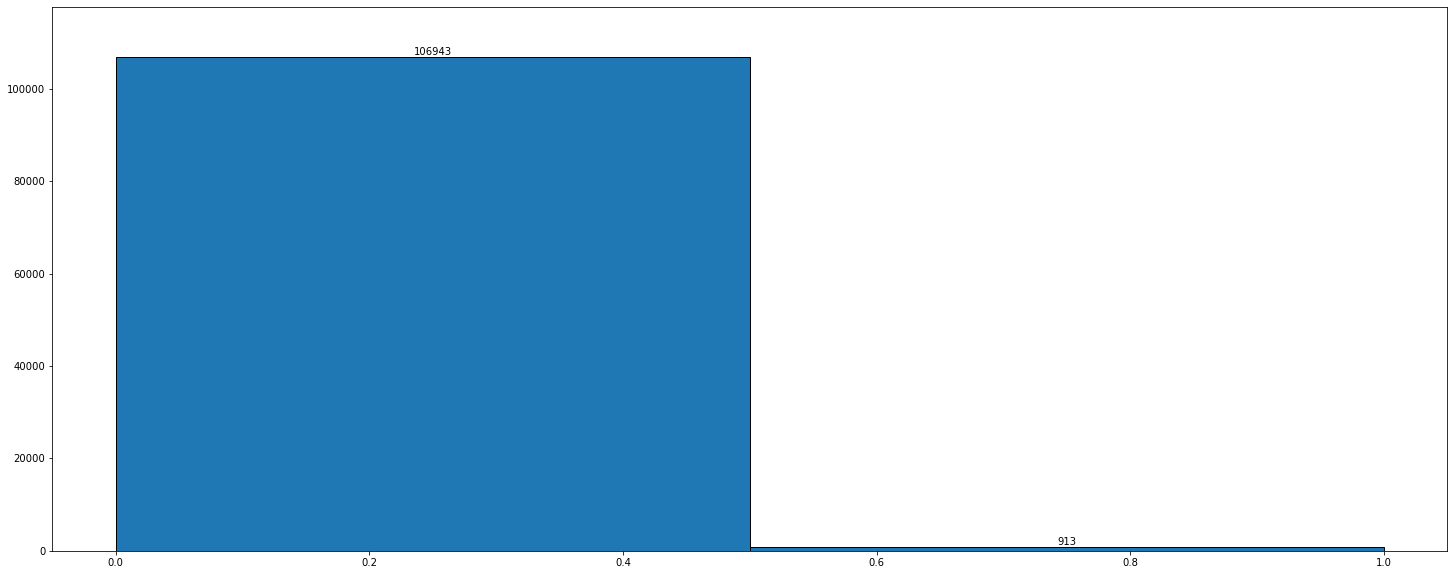

<Figure size 432x288 with 0 Axes>

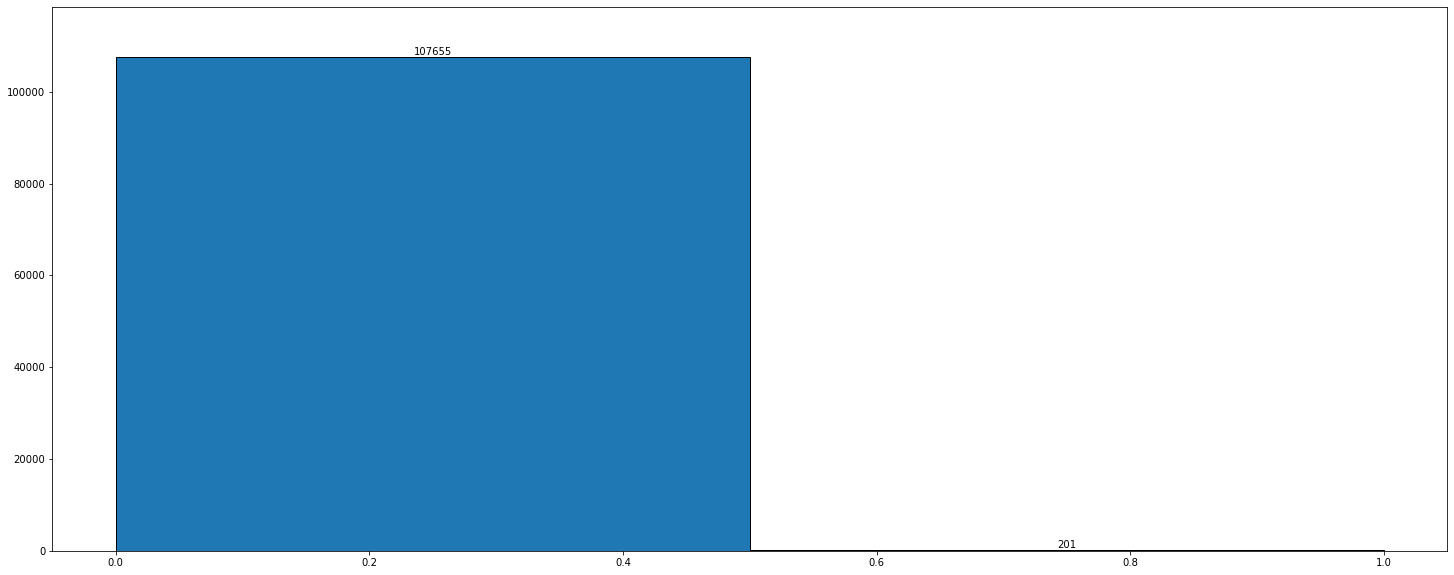

<Figure size 432x288 with 0 Axes>

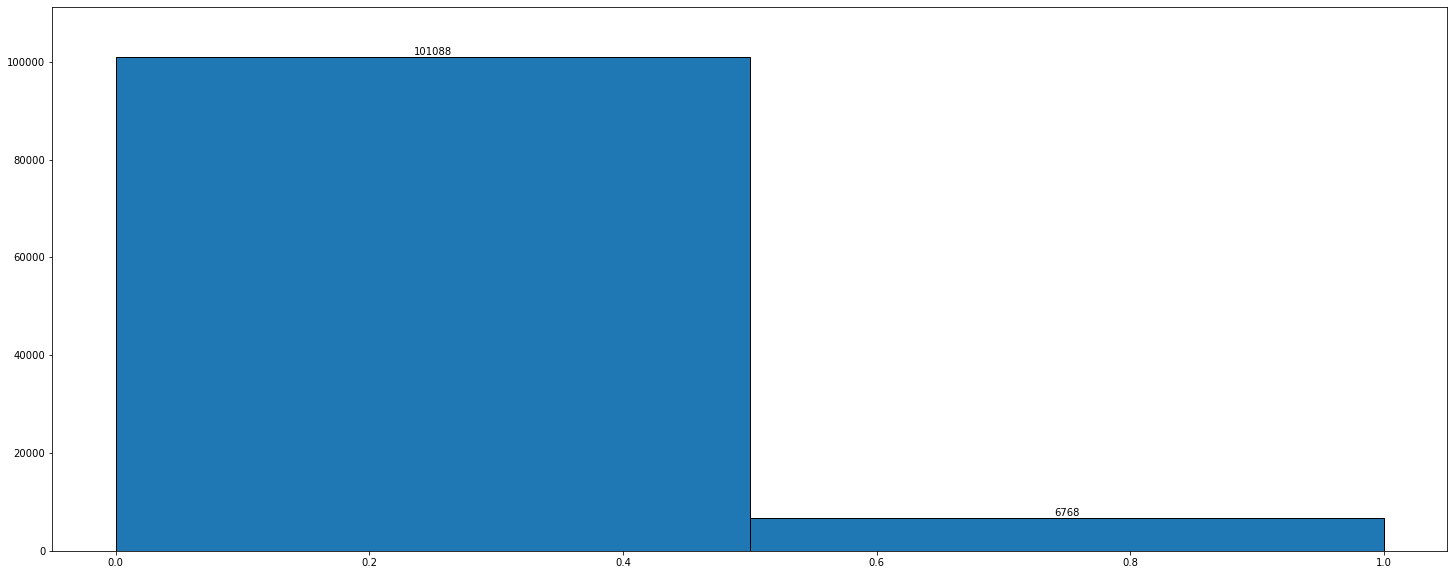

<Figure size 432x288 with 0 Axes>

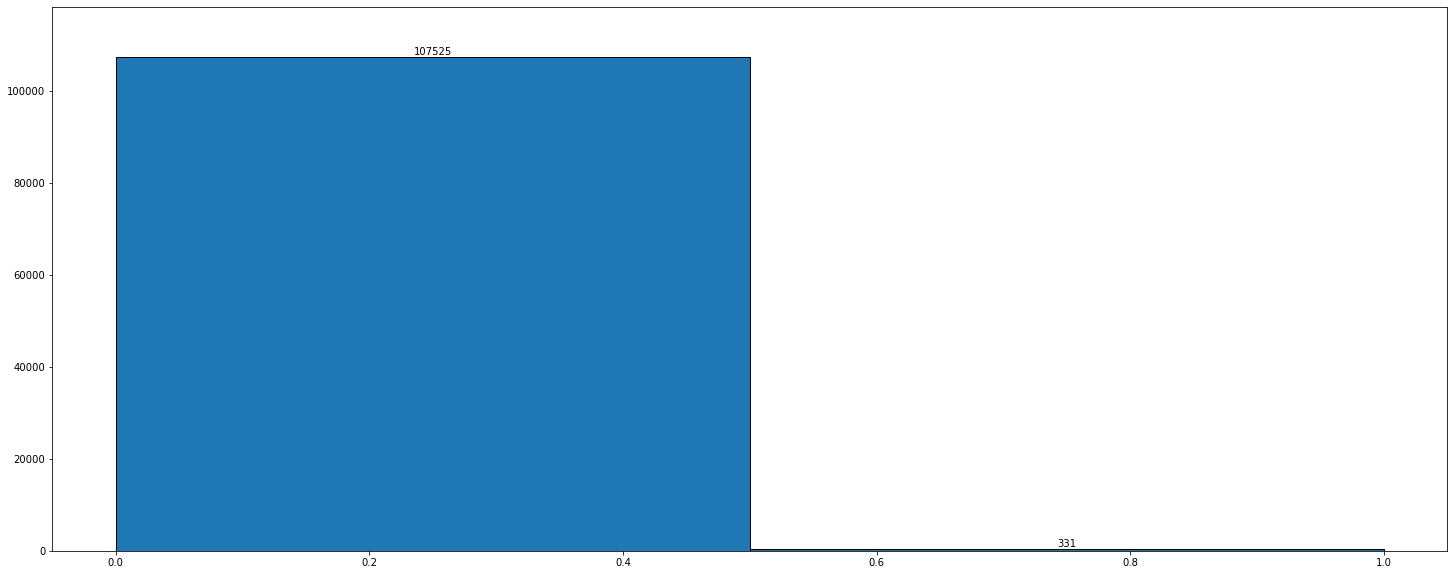

<Figure size 432x288 with 0 Axes>

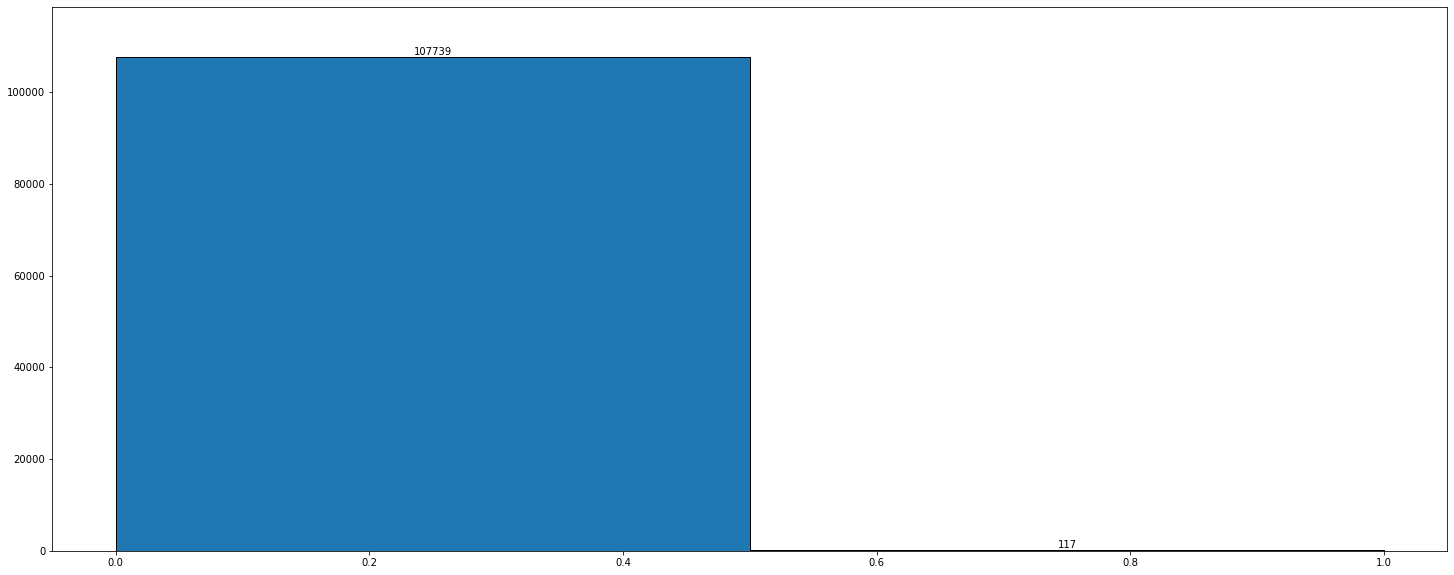

<Figure size 432x288 with 0 Axes>

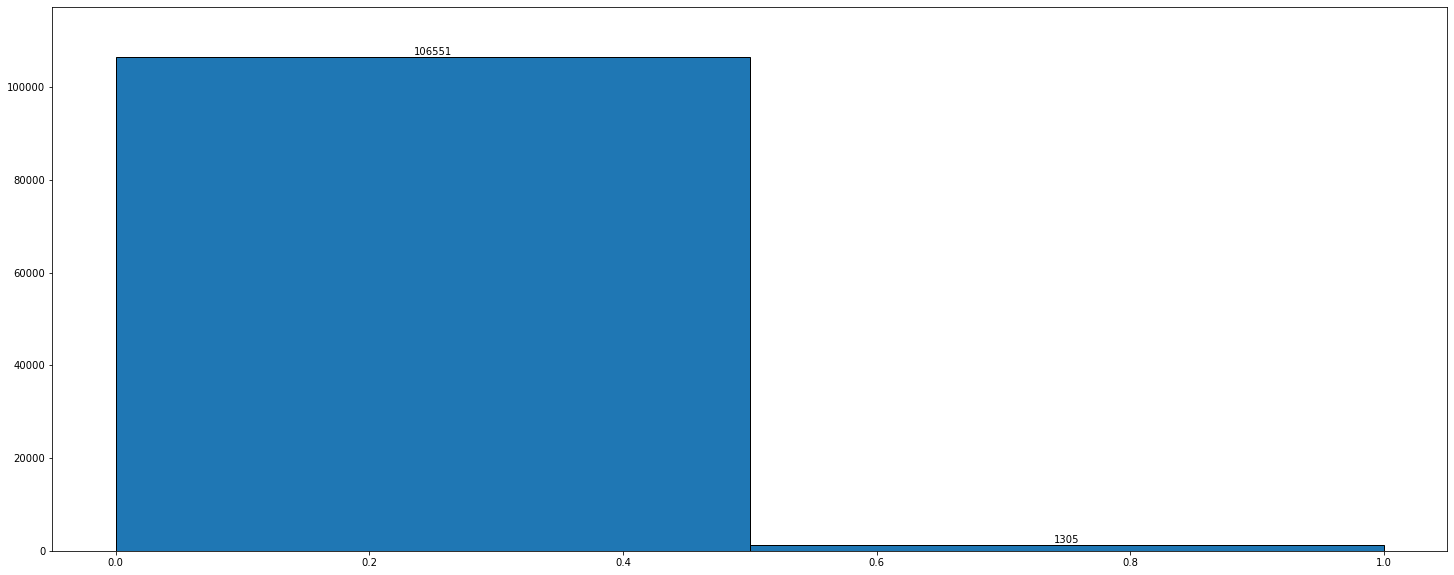

<Figure size 432x288 with 0 Axes>

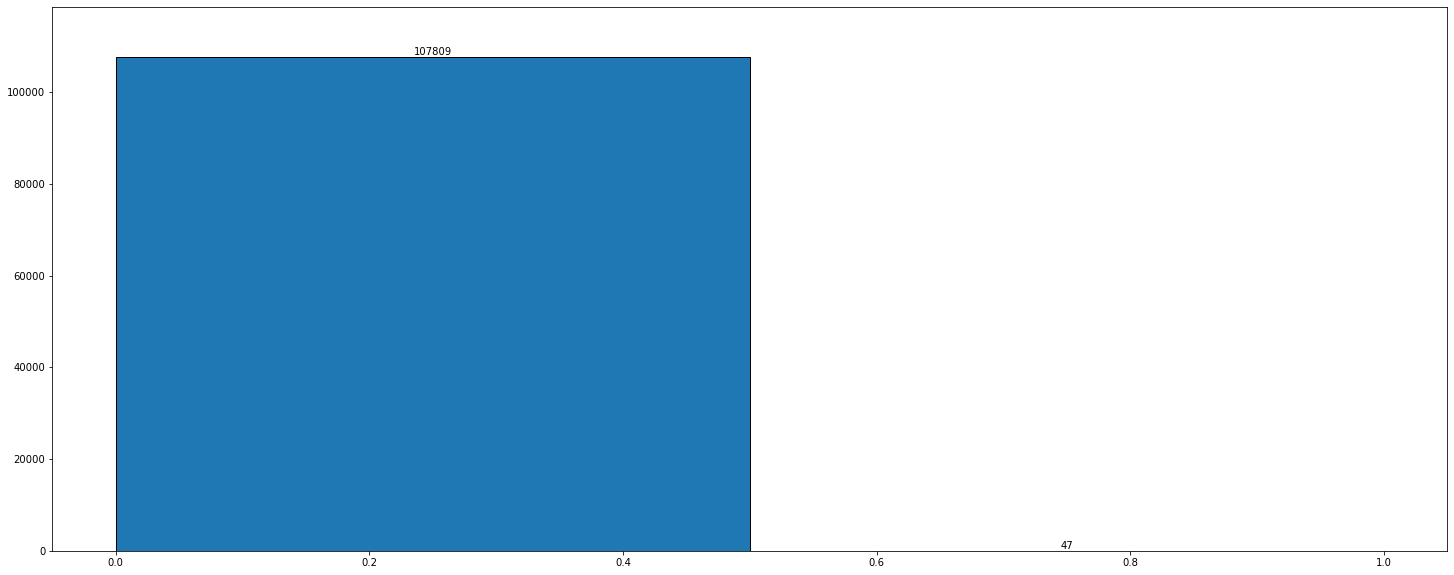

<Figure size 432x288 with 0 Axes>

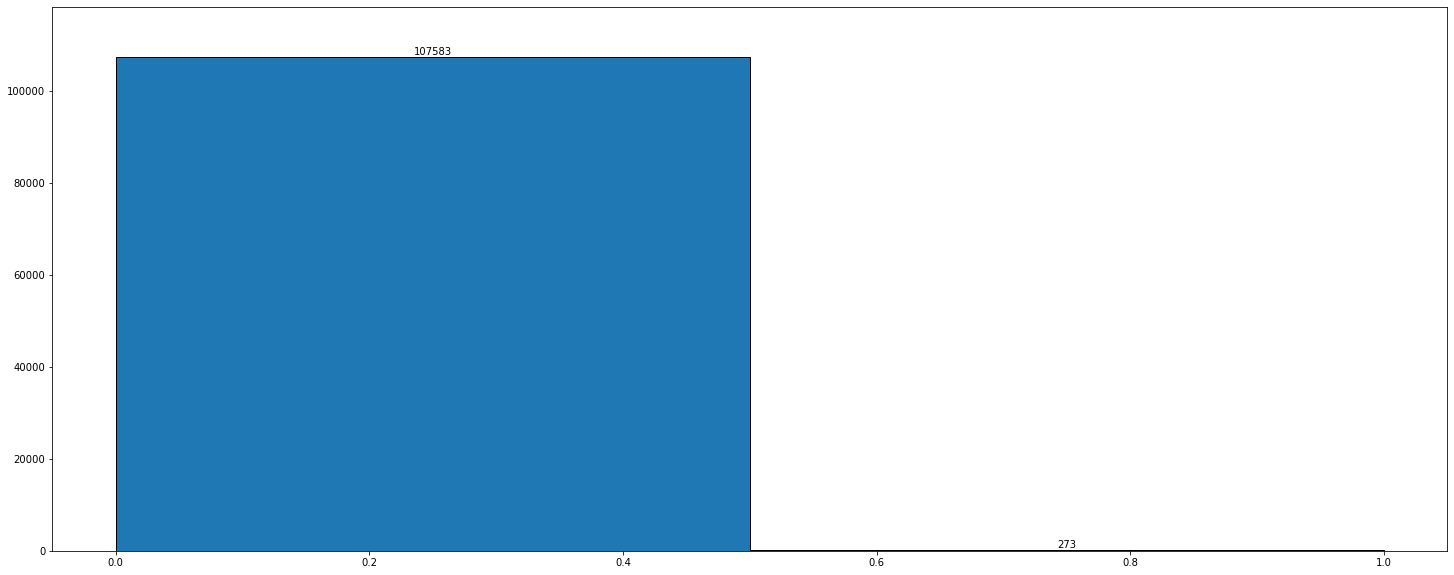

<Figure size 432x288 with 0 Axes>

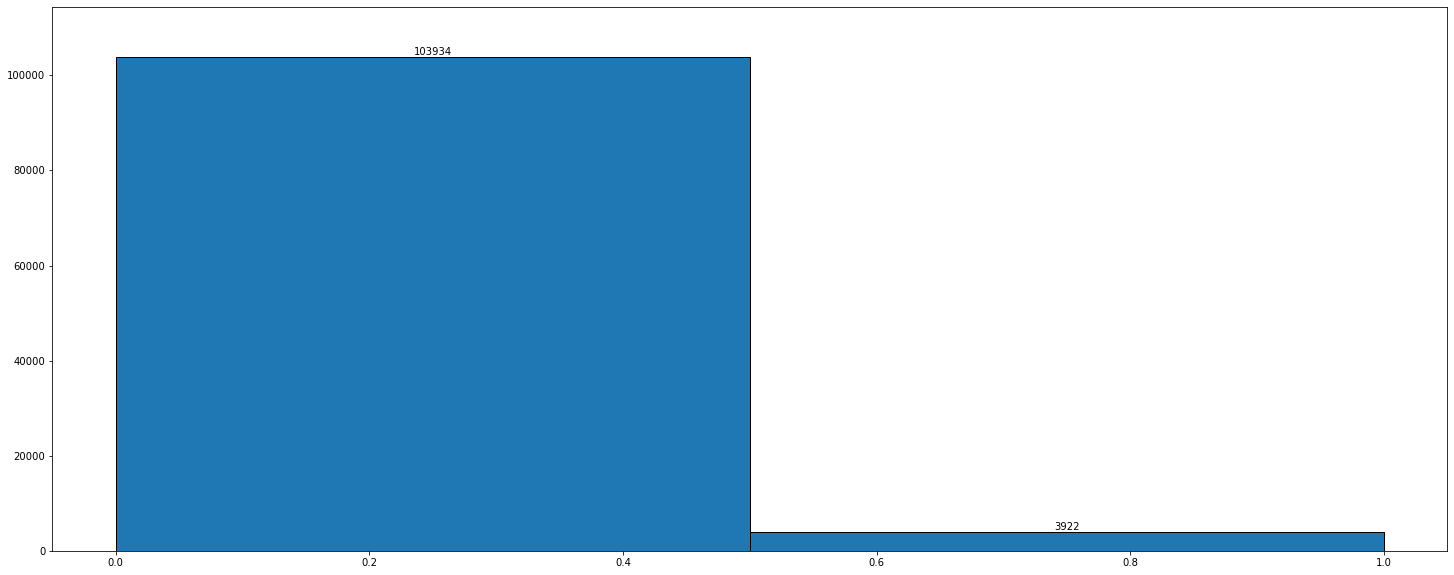

<Figure size 432x288 with 0 Axes>

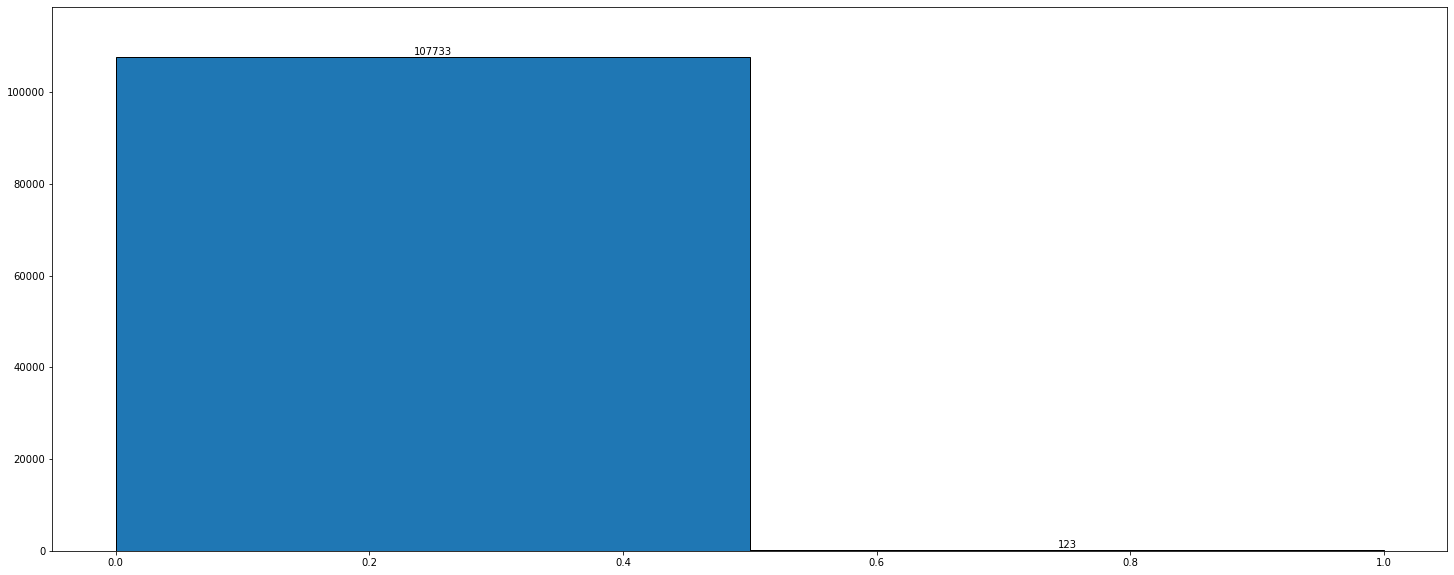

<Figure size 432x288 with 0 Axes>

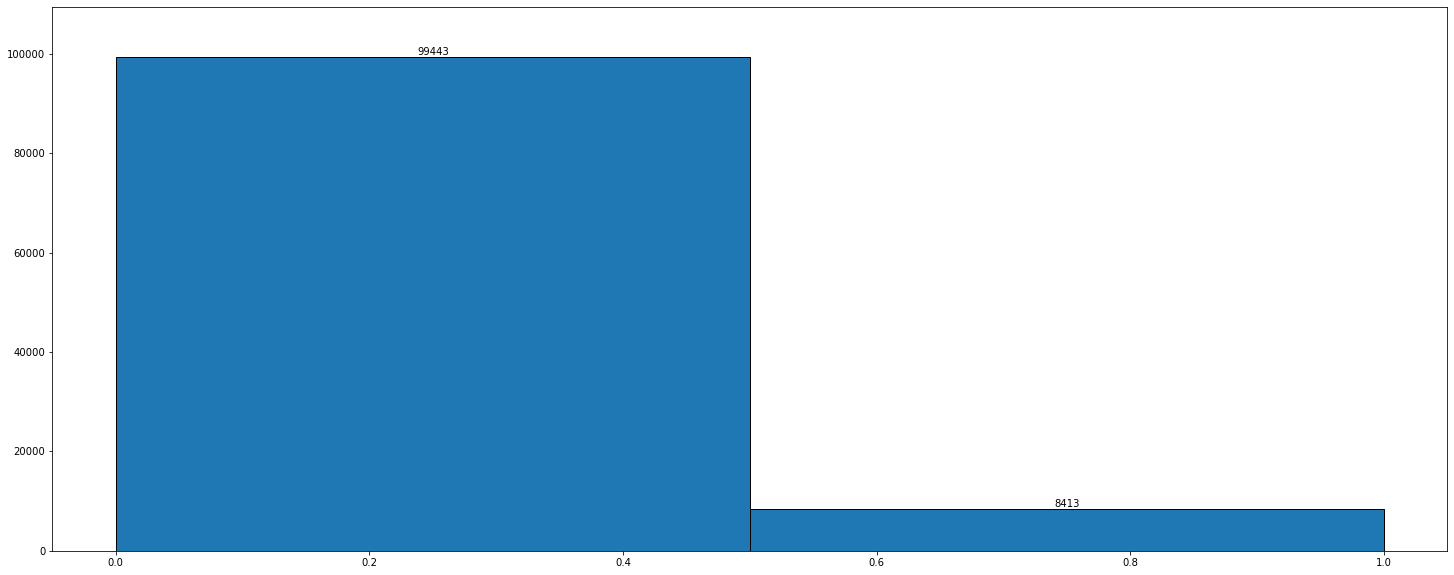

<Figure size 432x288 with 0 Axes>

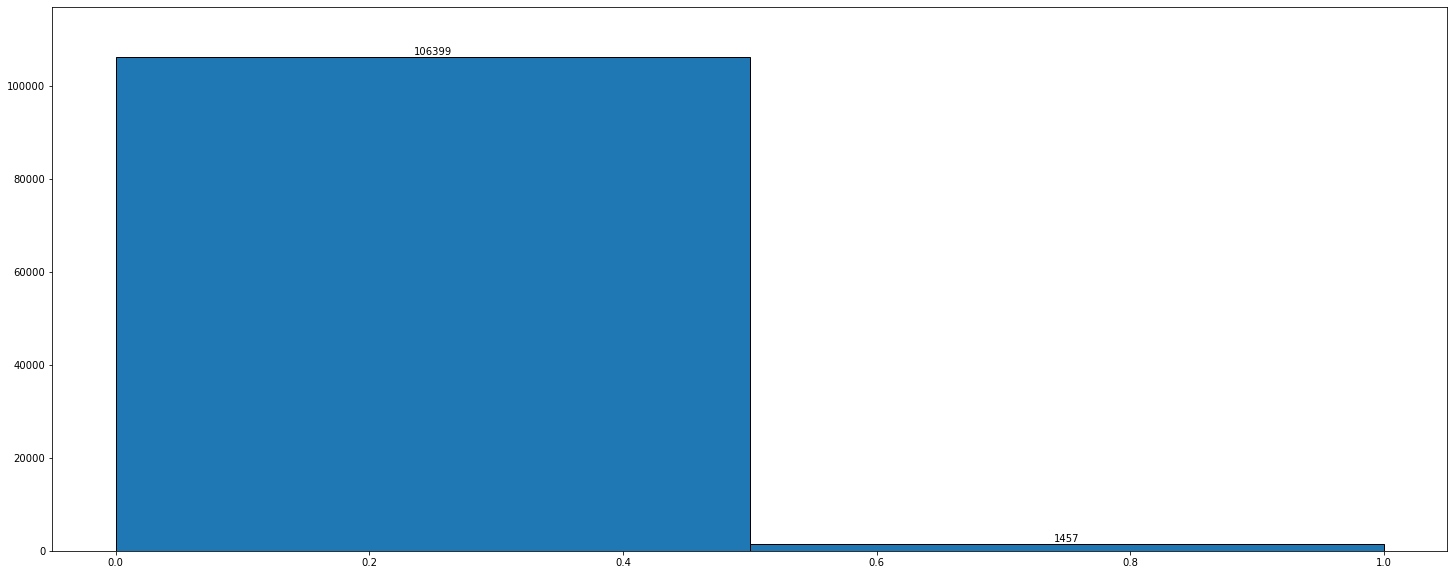

<Figure size 432x288 with 0 Axes>

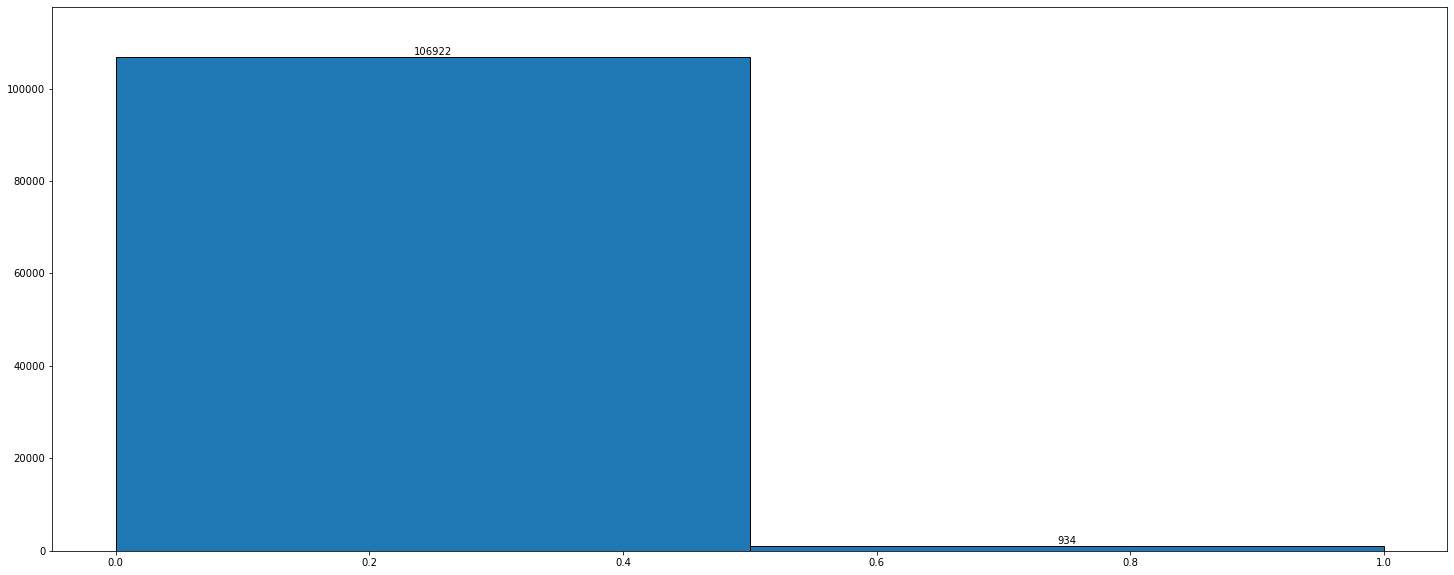

<Figure size 432x288 with 0 Axes>

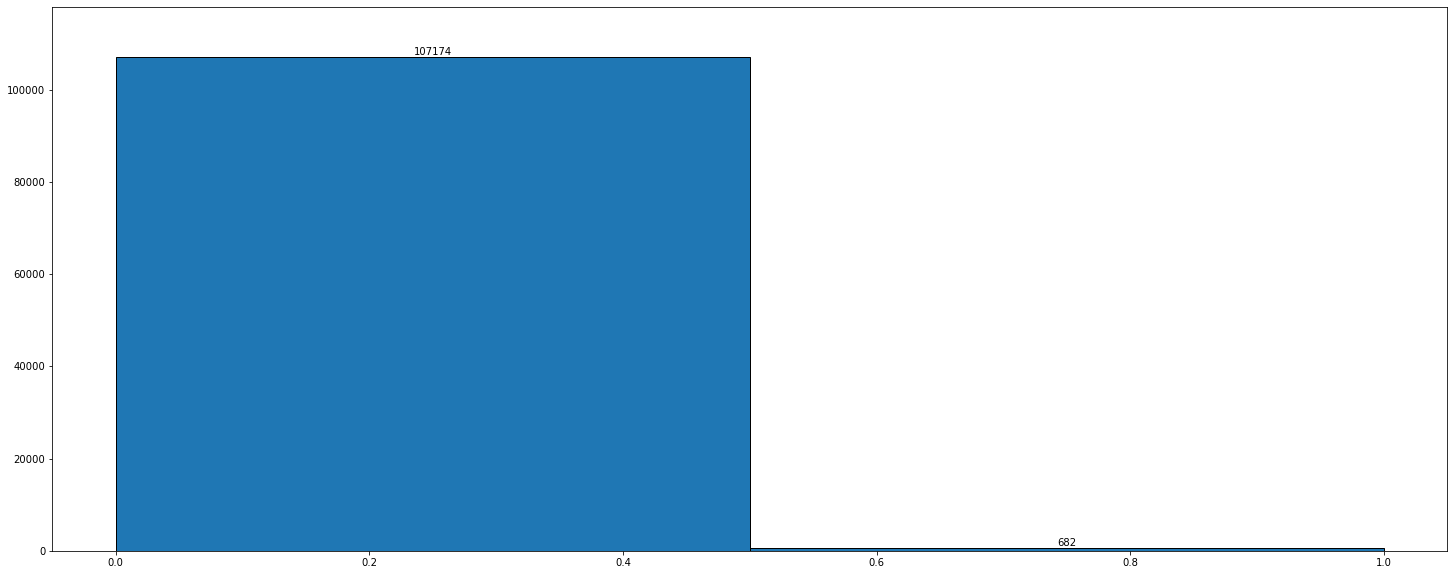

<Figure size 432x288 with 0 Axes>

In [36]:
for column in all_data_df:
    number_of_bins = len(all_data_df[column].value_counts())
    if number_of_bins > 100:
        number_of_bins = 100   # in order to render the hists as much readable as possible
    plt.figure(figsize=(25,10))
    counts, edges, bars = plt.hist(all_data_df[column], bins=number_of_bins, edgecolor="black")
    plt.ylim(0, (max(counts)+(max(counts)*0.1)))
    plt.bar_label(bars)
    plt.show()
    plt.clf()
    

Substantially the data concentrate his values among zeros, but has high values too. It doesn't follow a distribution that we know

In [71]:
all_data_df.describe()

0              1              2             3    \
count  107856.000000  107856.000000  107856.000000  107856.00000   
mean        1.477952      59.556038       0.001261       0.01770   
std        17.874502    2214.352783       0.035471       1.32542   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       0.000000       0.000000       0.00000   
50%         0.000000       0.000000       0.000000       0.00000   
75%         2.000000       0.000000       0.000000       0.00000   
max      5727.000000  254212.000000       1.000000     419.00000   

                 4              5              6              7    \
count  107856.000000  107856.000000  107856.000000  107856.000000   
mean        7.401025       0.282265       1.160102       0.038857   
std        98.194389      35.261810      32.950294       0.727027   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       0.000000       1.000000       0.000000   
max      5299.000000    5516.000000    6725.000000      91.000000   

                 8              9    ...            255            256  \
count  107856.000000  107856.000000  ...  107856.000000  107856.000000   
mean        0.000195       0.828188  ...       0.001085       0.012099   
std         0.063943       3.542536  ...       0.032905       0.109257   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max        21.000000     345.000000  ...       1.000000       1.000000   

                 257            258            259            260  \
count  107856.000000  107856.000000  107856.000000  107856.000000   
mean        0.000436       0.002531       0.036363       0.001140   
std         0.020866       0.050221       0.187042       0.033735   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 261            262           263            264  
count  107856.000000  107856.000000  107856.00000  107856.000000  
mean        0.078002       0.013509       0.00866       0.006323  
std         0.267918       0.115297       0.09259       0.079331  
min         0.000000       0.000000       0.00000       0.000000  
25%         0.000000       0.000000       0.00000       0.000000  
50%         0.000000       0.000000       0.00000       0.000000  
75%         0.000000       0.000000       0.00000       0.000000  
max         1.000000       1.000000       1.00000       1.000000  

[8 rows x 265 columns]

In [75]:
column_ordered_by_std = all_data_df.std().sort_values(ascending=False).index
for element in column_ordered_by_std:
    print("column " + str(element) + ": " + str(all_data_df[int(element)].std()))

column 59: 8075.8720703125
column 158: 6547.36474609375
column 1: 2214.352783203125
column 81: 1802.356201171875
column 116: 1448.821533203125
column 14: 1334.9071044921875
column 109: 1122.9825439453125
column 95: 939.8987426757812
column 25: 781.9253540039062
column 89: 725.9234619140625
column 20: 723.3980712890625
column 115: 665.214111328125
column 96: 661.9627685546875
column 58: 640.4222412109375
column 165: 614.1340942382812
column 141: 570.9531860351562
column 164: 565.6266479492188
column 153: 559.2191162109375
column 22: 553.8233642578125
column 16: 546.811279296875
column 62: 546.2389526367188
column 178: 533.7786865234375
column 188: 516.2568969726562
column 161: 486.6214904785156
column 70: 446.2021484375
column 32: 400.1777038574219
column 13: 389.88873291015625
column 118: 386.238525390625
column 162: 376.6709289550781
column 94: 374.5953369140625
column 39: 366.4177551269531
column 57: 335.83782958984375
column 176: 329.8314208984375
column 200: 317.4330139160156
colum

In [74]:
counter_for_std = 0
for element in column_ordered_by_std:
    if element >= 100:
        counter_for_std += 1
counter_for_std

165

In general dataset has high spread (165 over 264 data has std over 100, which is a very high value), the column 59 and 158 in particular distanciate all other feature respect to theri std 

In [49]:
column_label_0_50 = [x for x in range(0,51)]
column_label_50_100 = [x for x in range(51,101)]
column_label_100_150 = [x for x in range(101,151)]
column_label_150_200 = [x for x in range(151,201)]
column_label_200_250 = [x for x in range(201,251)]
column_label_250_264 = [x for x in range(251,265)]

<AxesSubplot:>

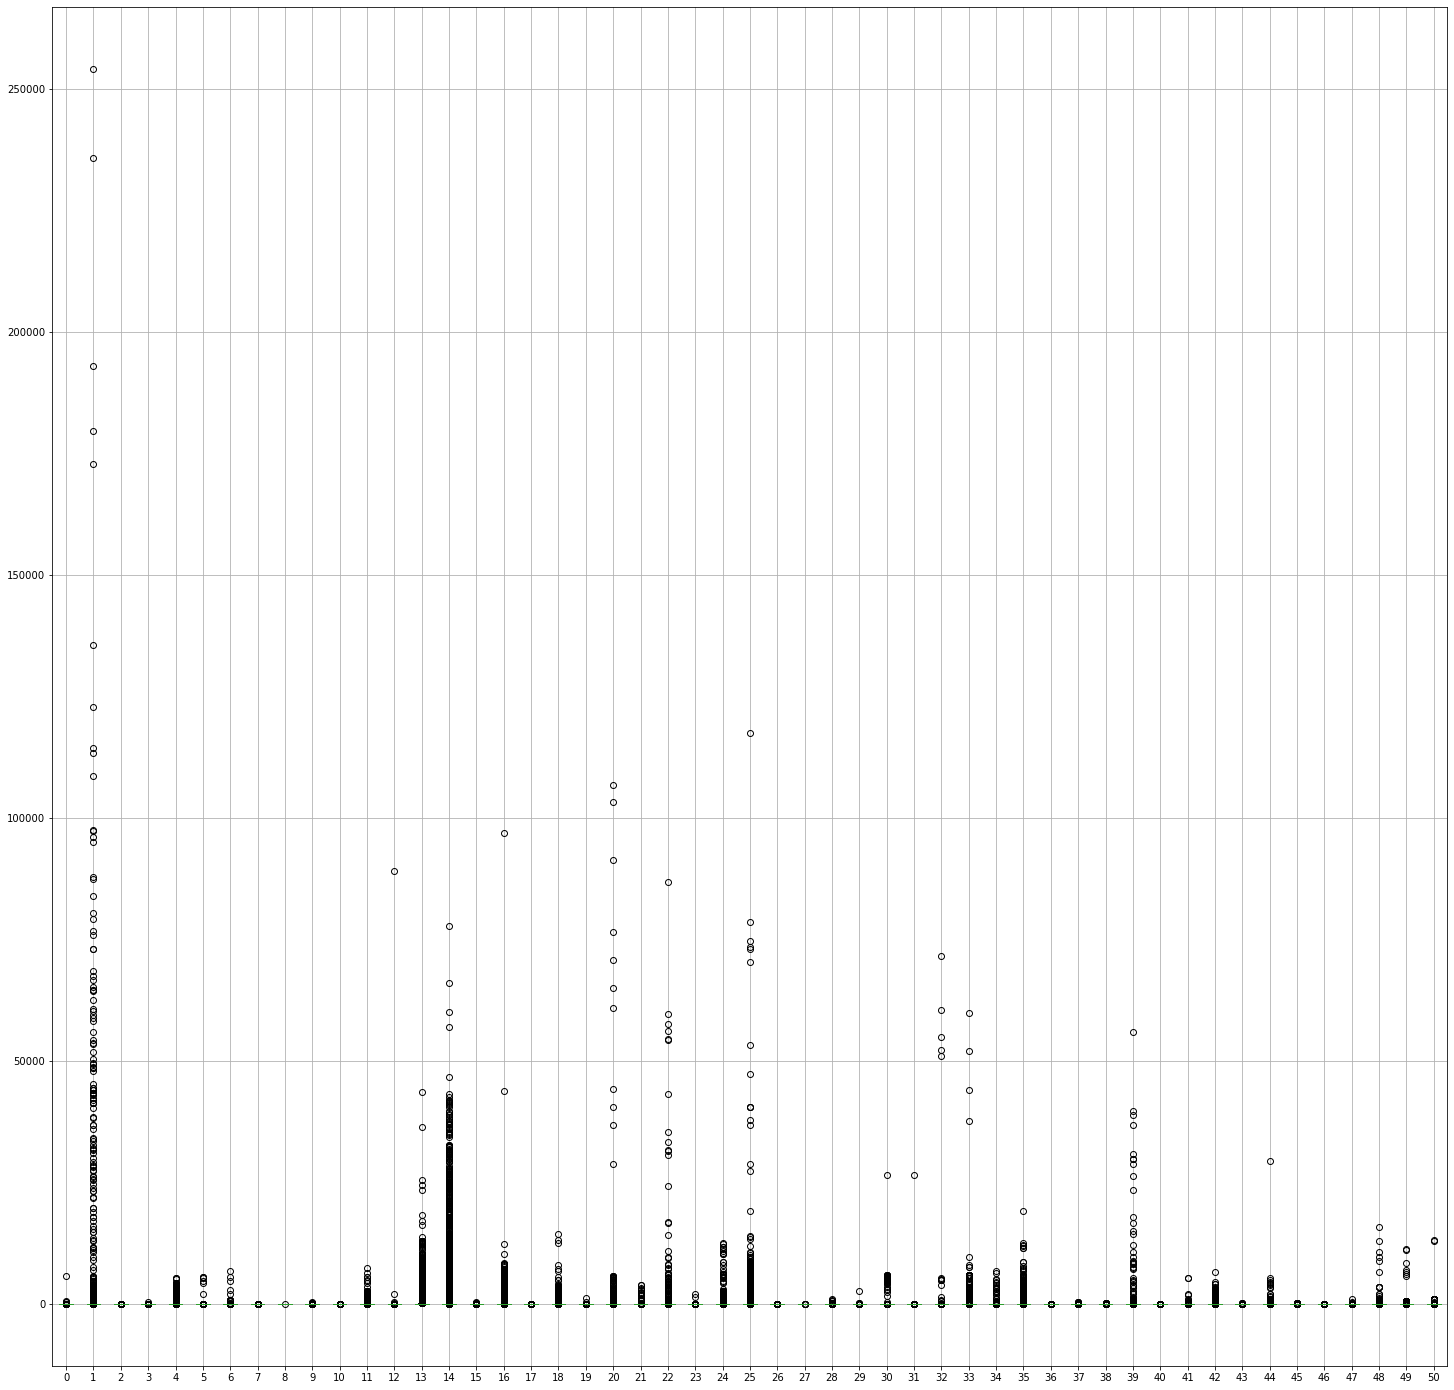

In [50]:
all_data_df.boxplot(column=column_label_0_50, figsize=(25, 25))

<AxesSubplot:>

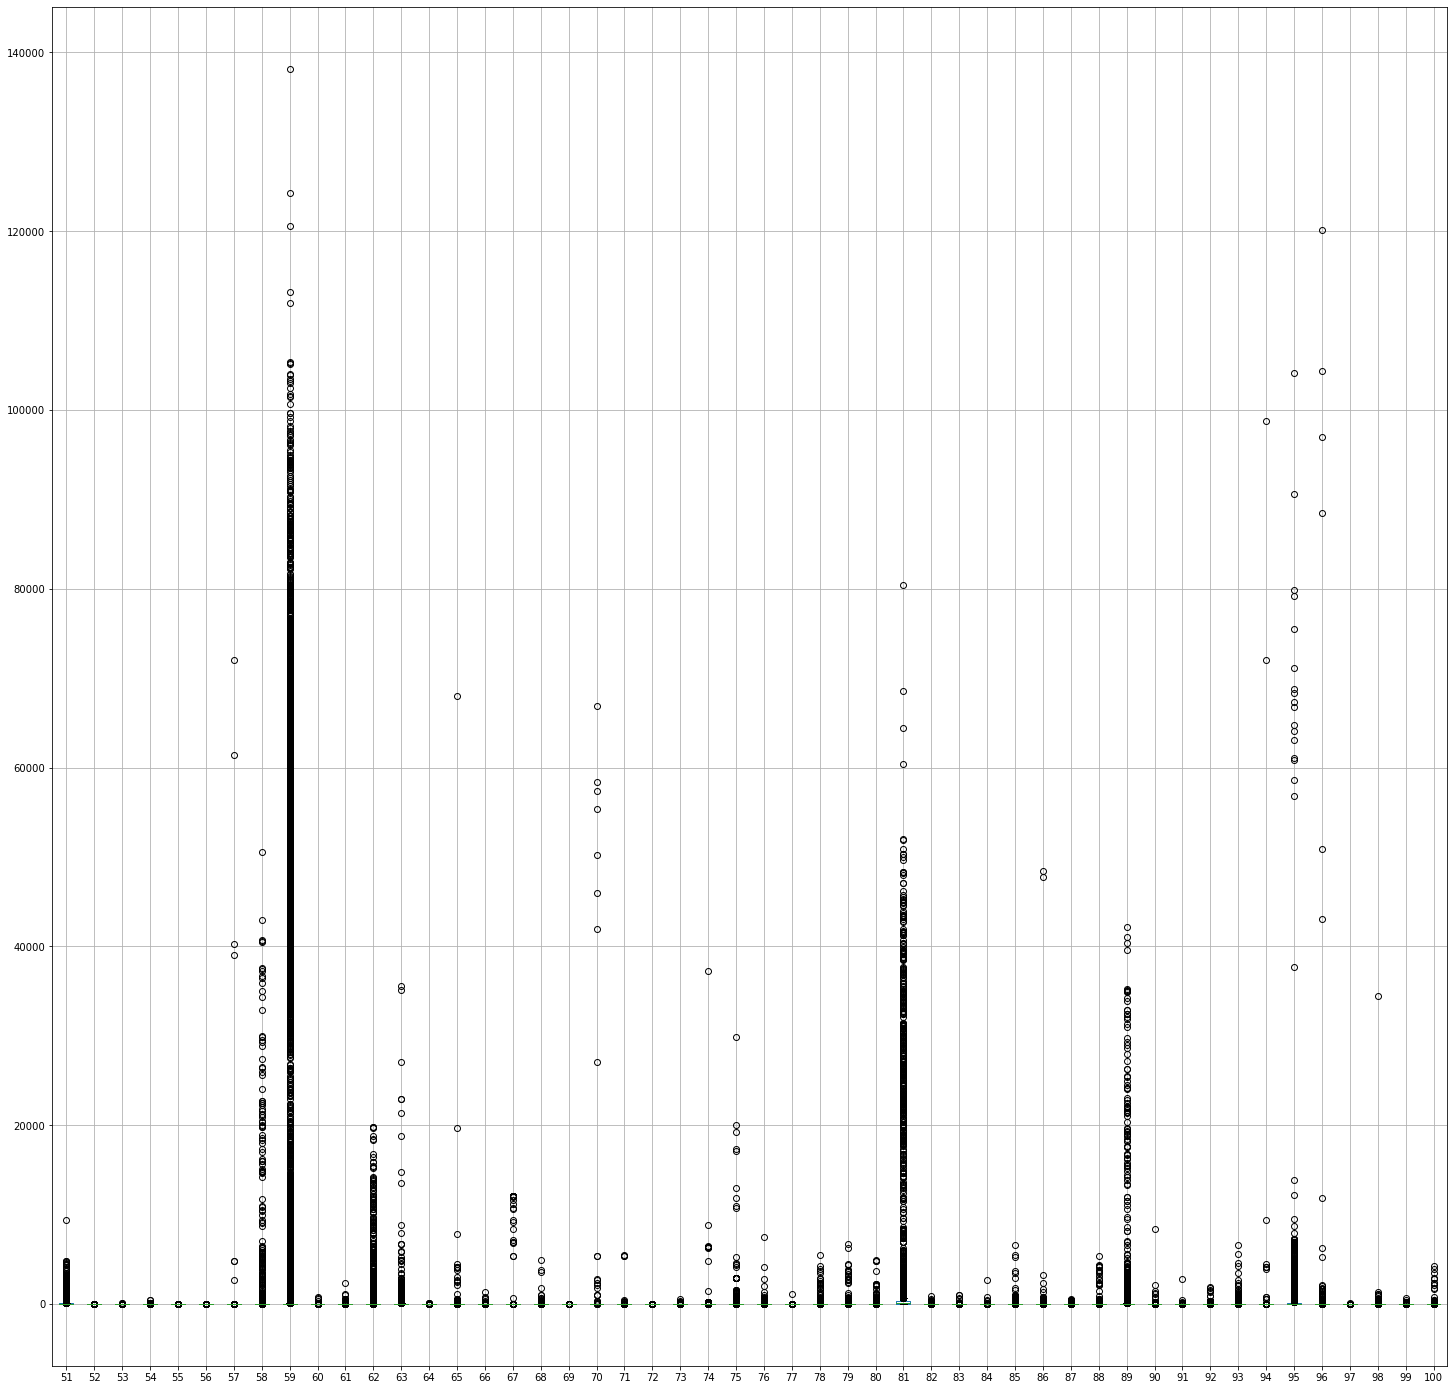

In [51]:
all_data_df.boxplot(column=column_label_50_100, figsize=(25, 25))

<AxesSubplot:>

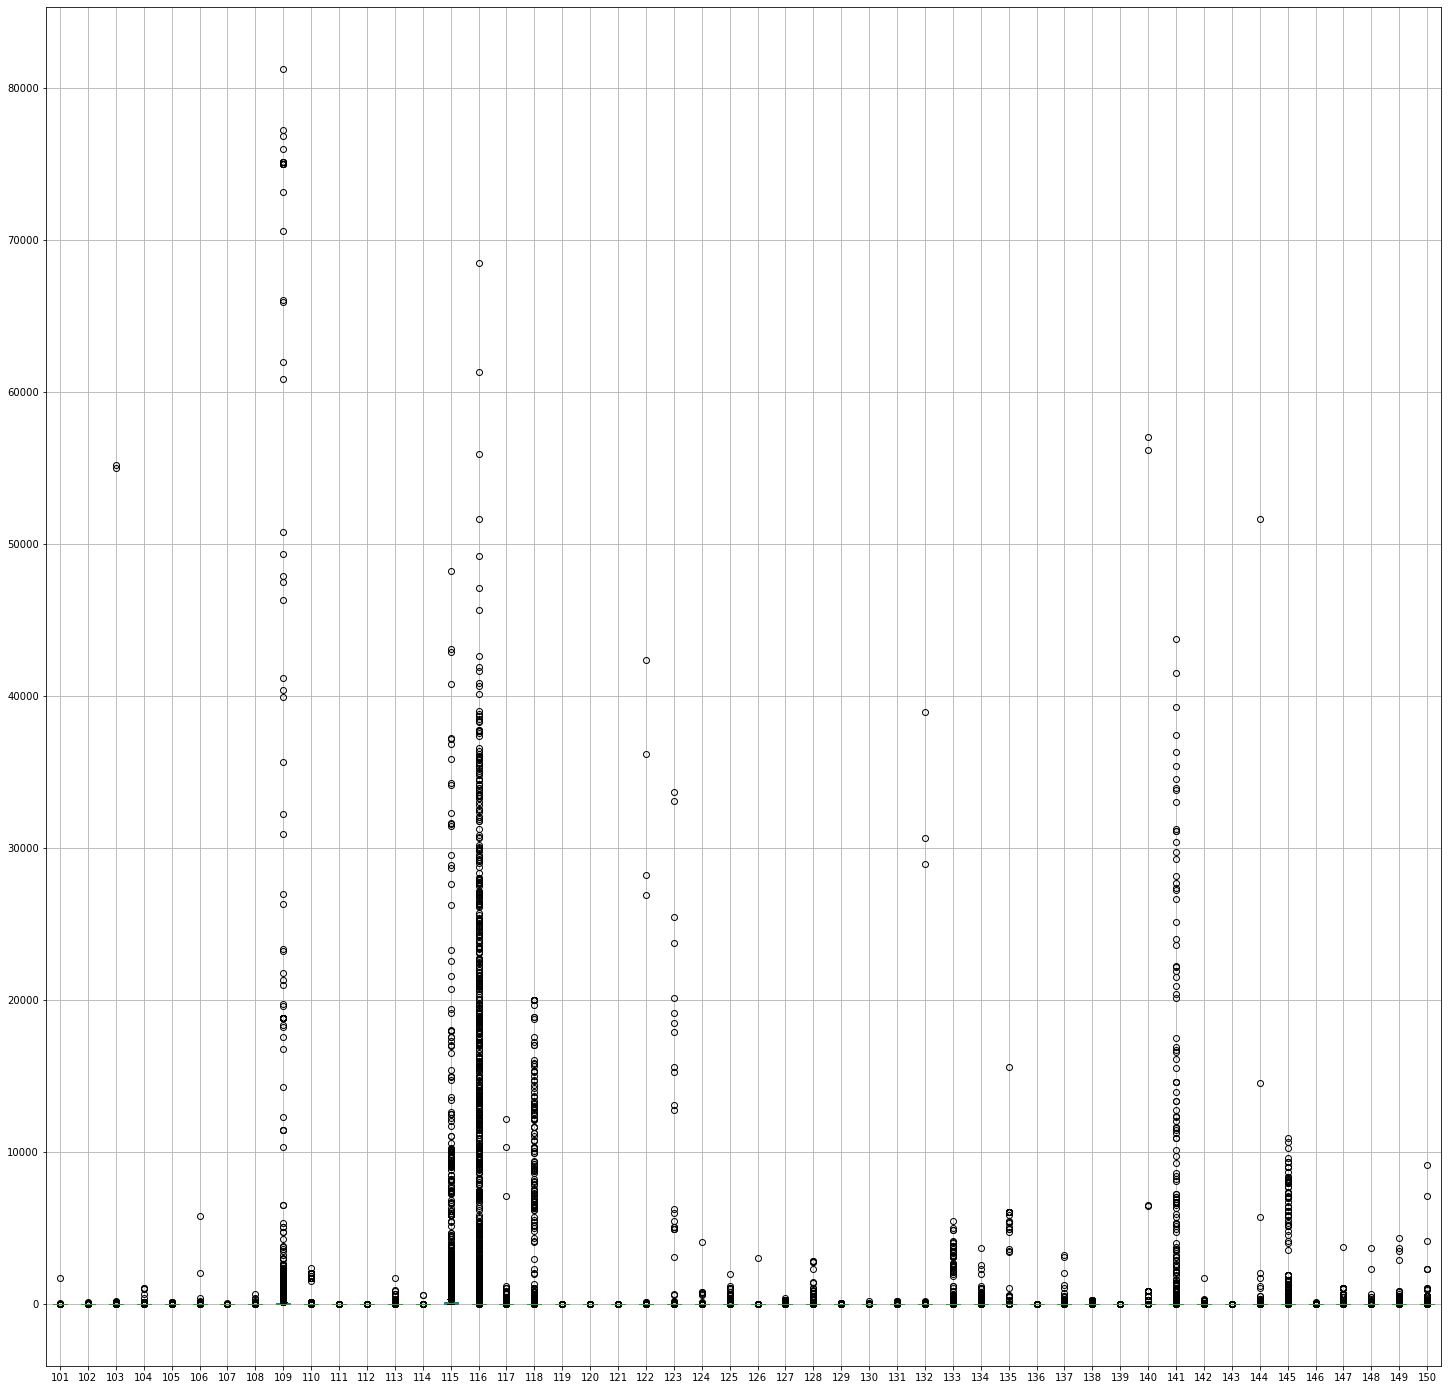

In [52]:
all_data_df.boxplot(column=column_label_100_150, figsize=(25, 25))

<AxesSubplot:>

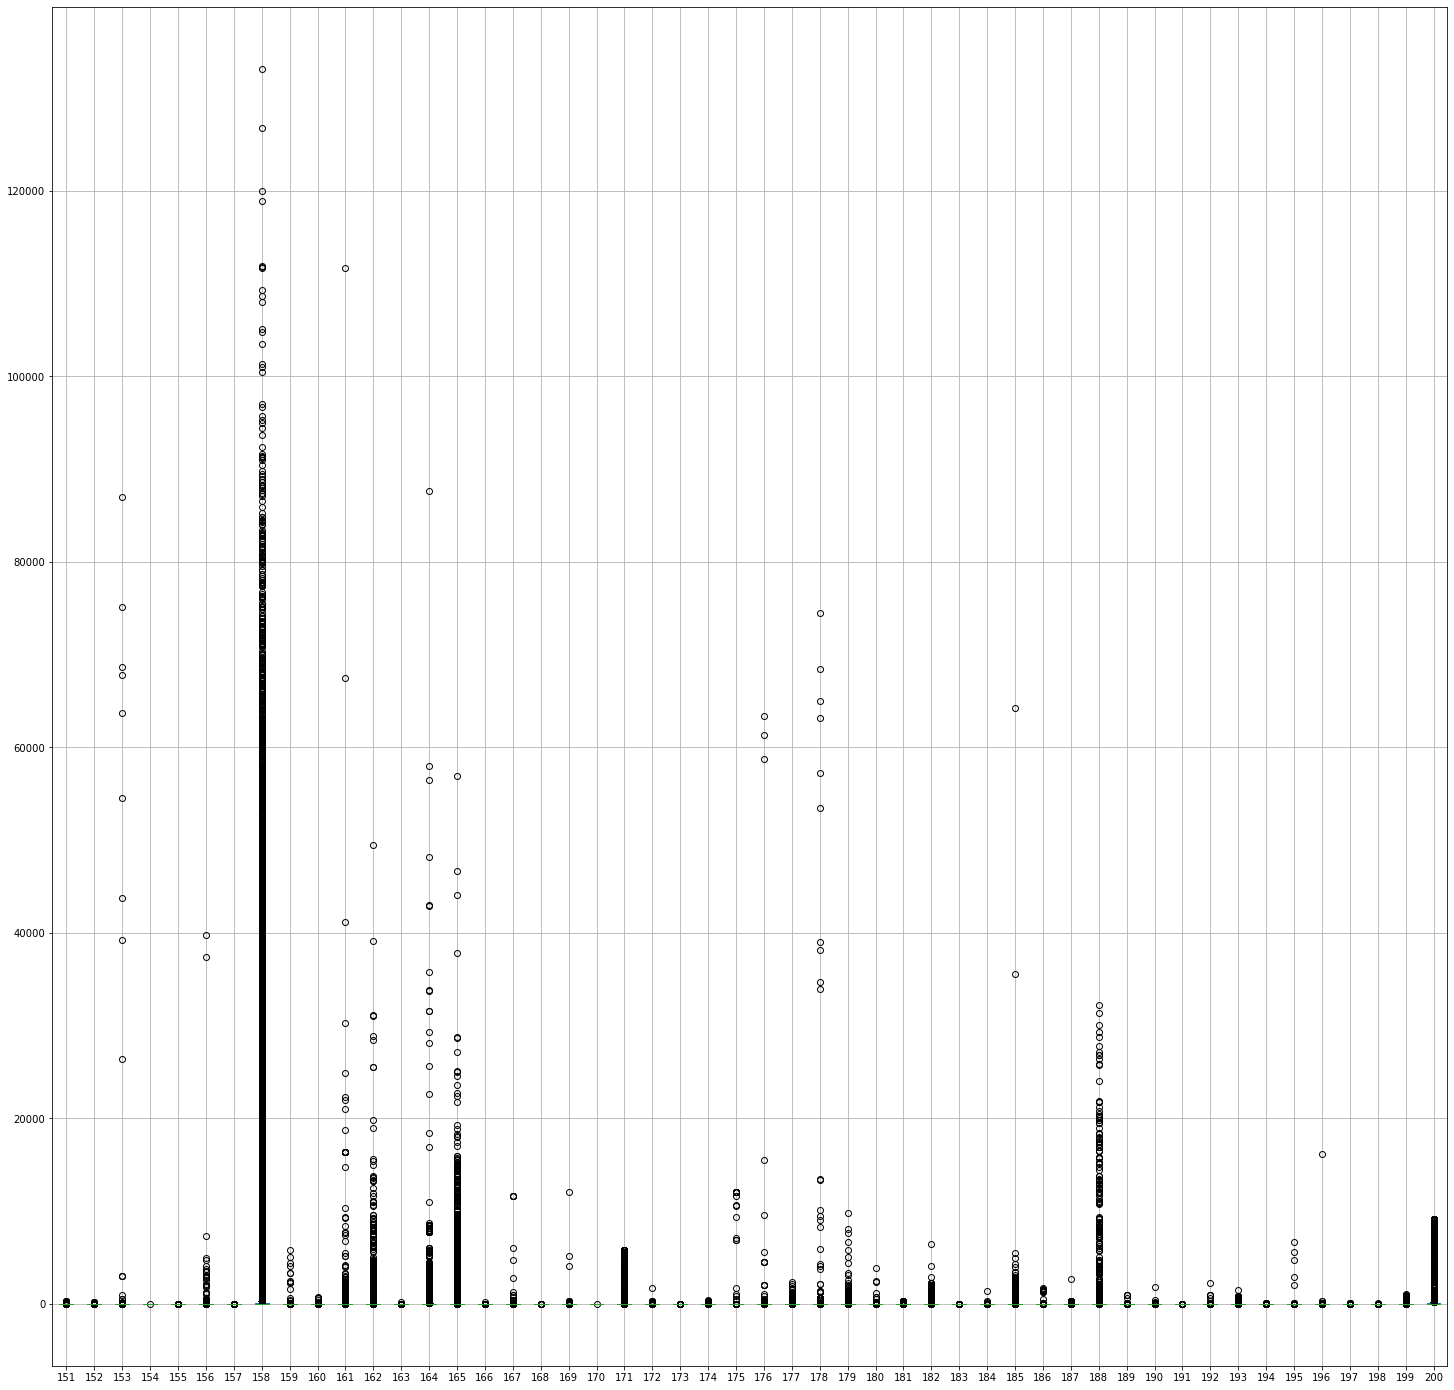

In [53]:
all_data_df.boxplot(column=column_label_150_200, figsize=(25, 25))

<AxesSubplot:>

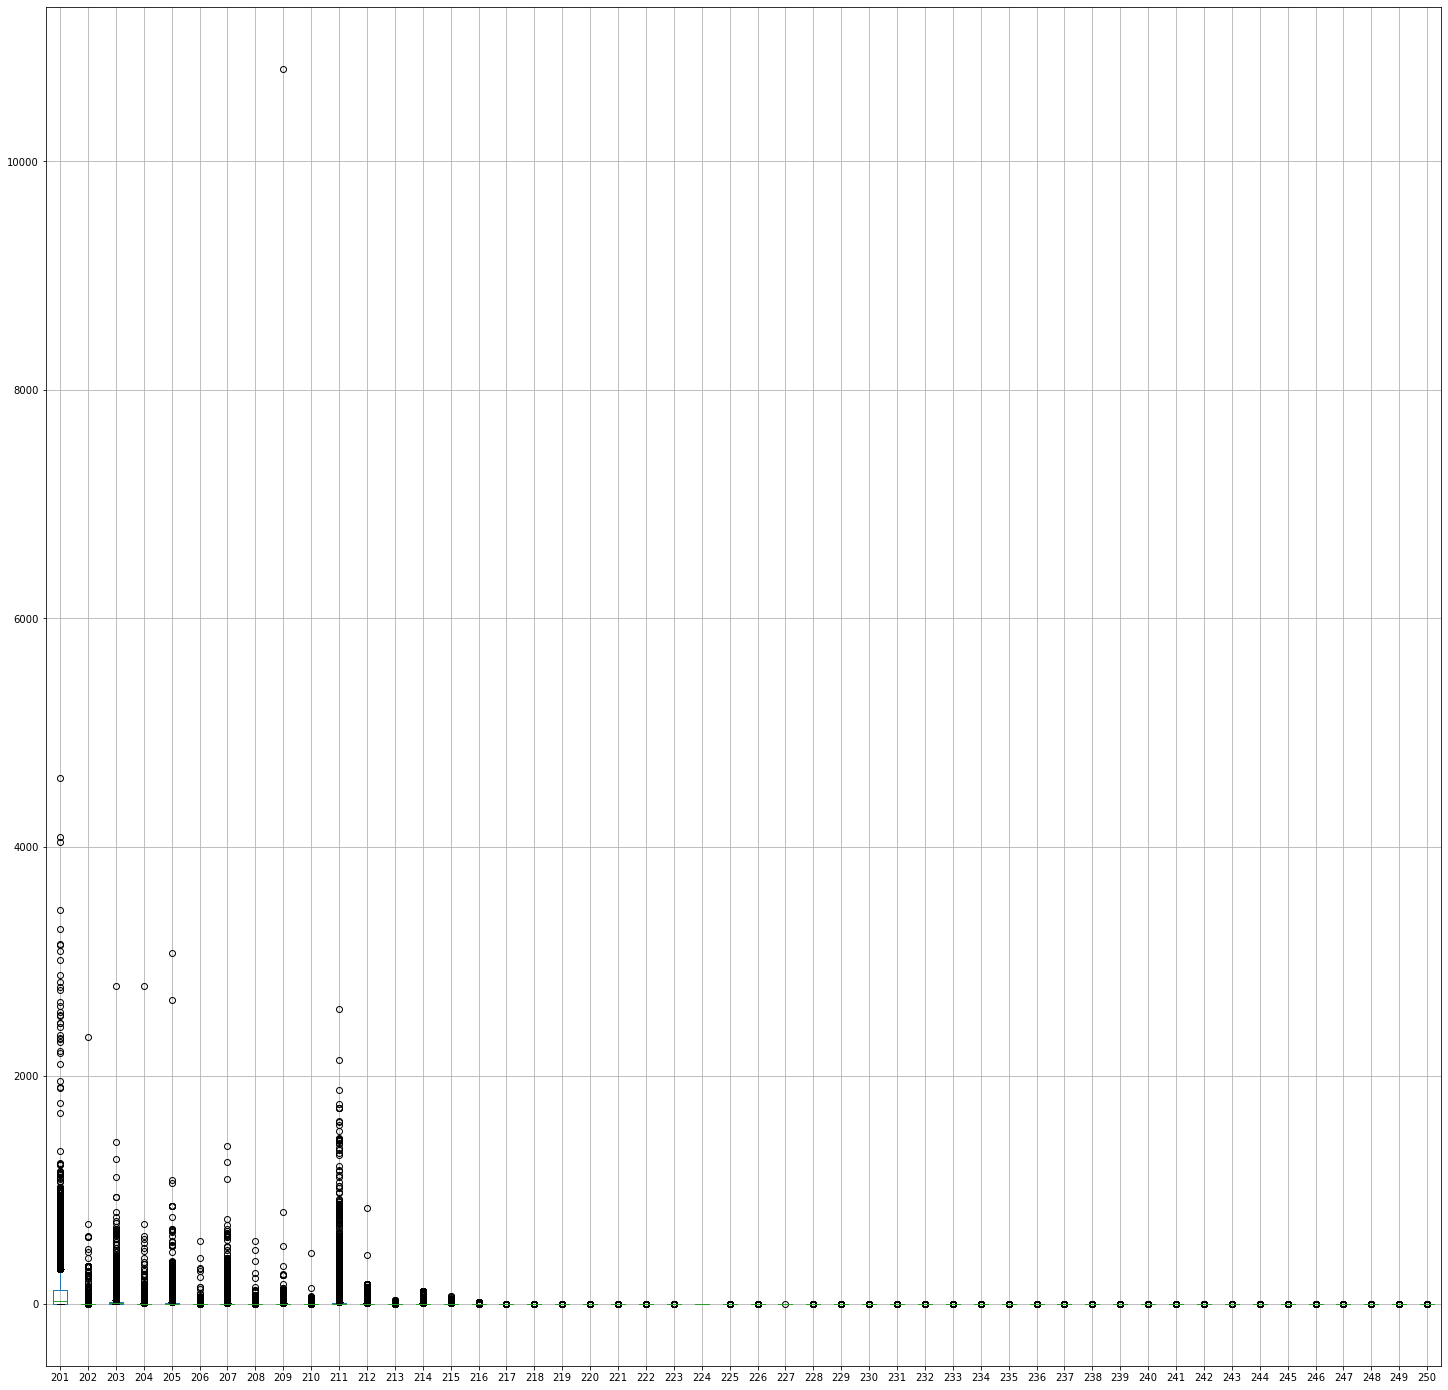

In [54]:
all_data_df.boxplot(column=column_label_200_250, figsize=(25, 25))

<AxesSubplot:>

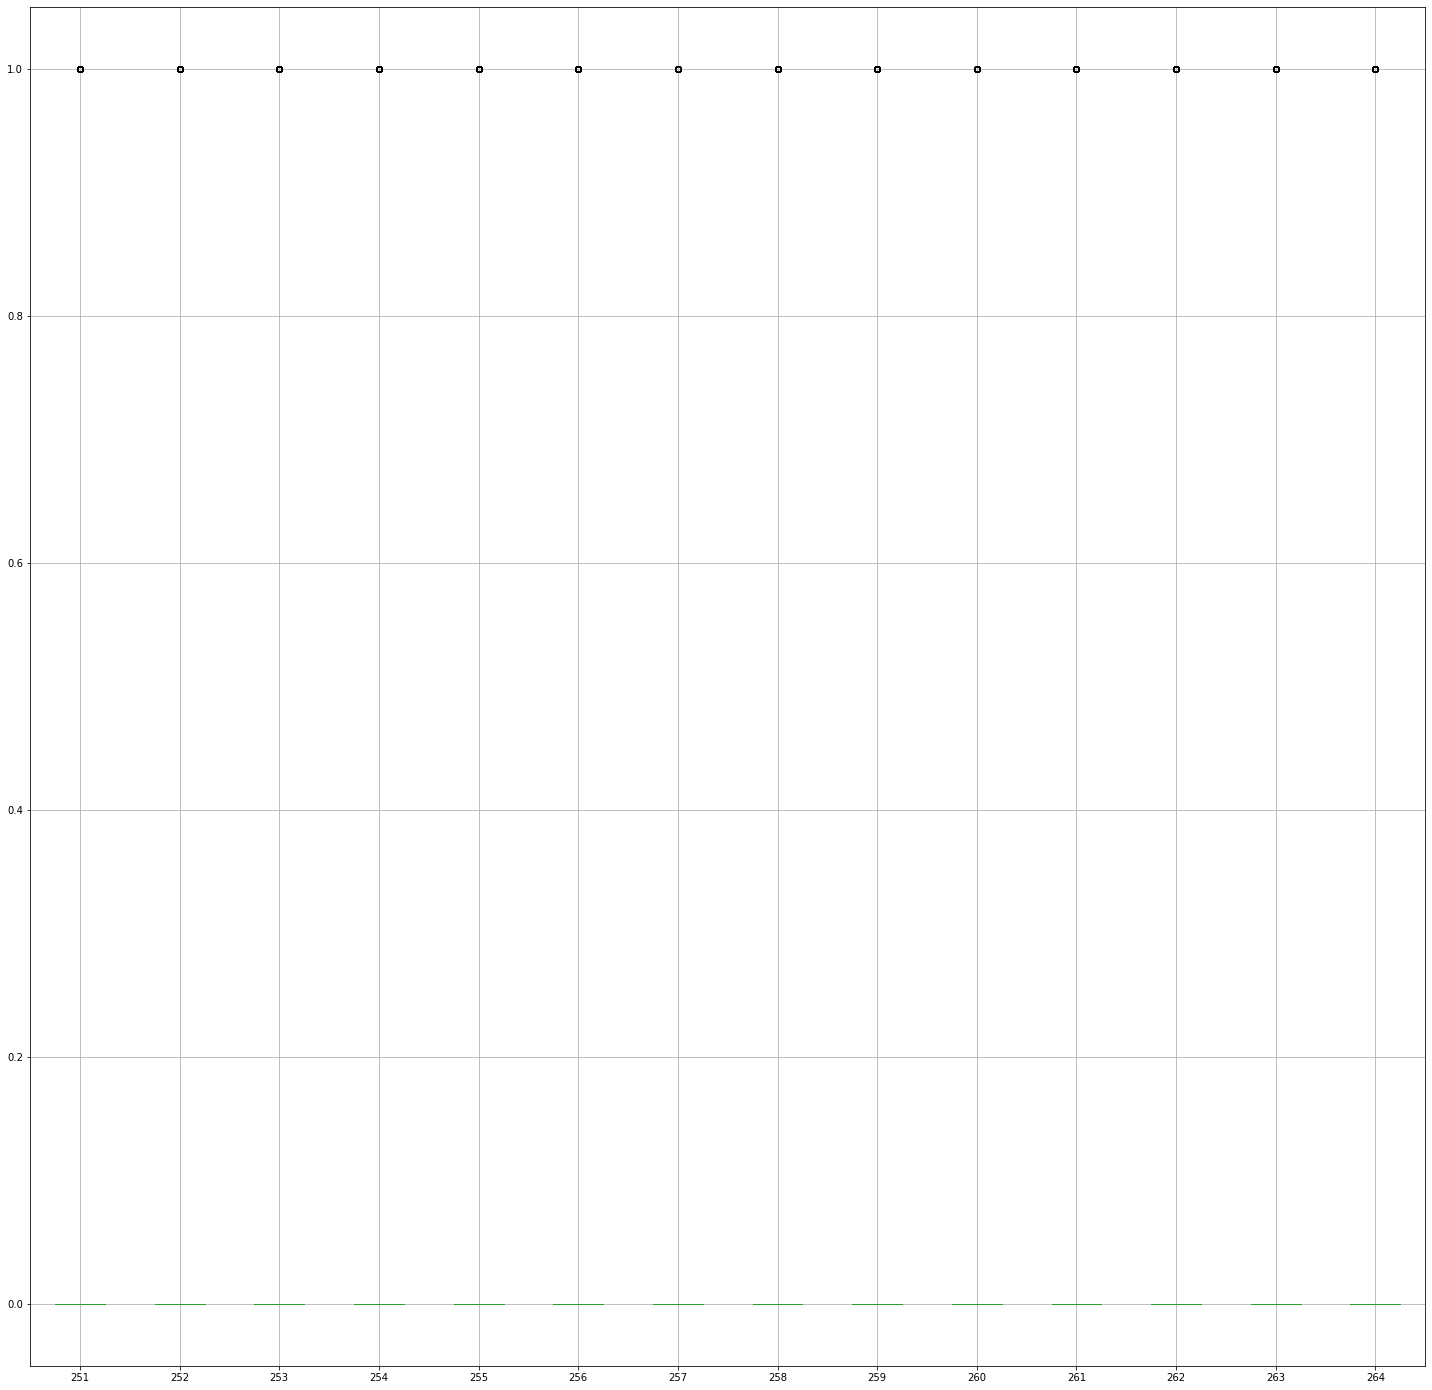

In [55]:
all_data_df.boxplot(column=column_label_250_264, figsize=(25, 25))

The dataset, substantially, has only outliers...

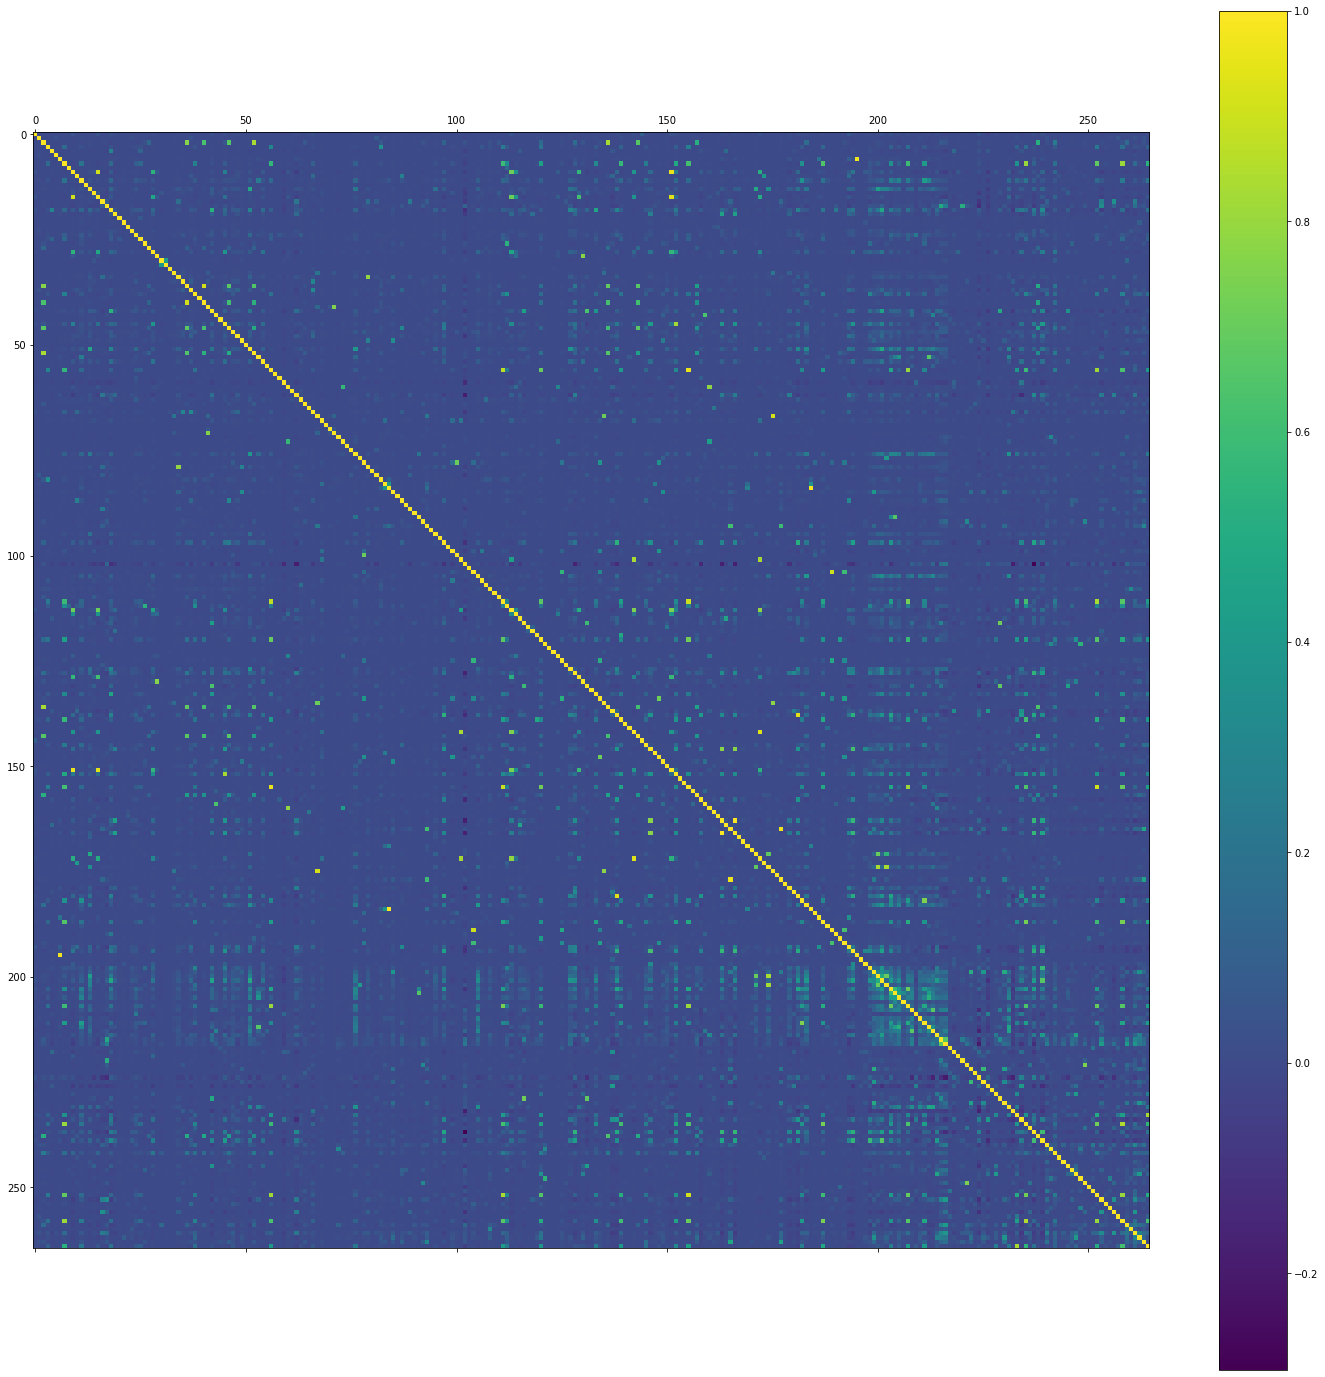

<Figure size 432x288 with 0 Axes>

In [79]:
fig, ax = plt.subplots(figsize=(25,25))
cax = ax.matshow(all_data_df.corr())
fig.colorbar(cax)
plt.show()
plt.clf()

In general there isn't correlation, exept for data among feature from 200 and 215 (with eye, check more properly) in which there is a bit of correlation

summary: this dataset it's terrible

PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaler = StandardScaler()
scaler.fit(all_data)
all_data_scaled = scaler.transform(all_data)

pca = PCA()
pca.fit(all_data_scaled)
pca_data = pca.transform(all_data_scaled)

# Here someone can make some statistical studies over data after pca (i've tried something, but i don't get too much for now. For the moment I leave this message, then we'll see)

In order to reduce dimensionality we'll consider the firs n PCA which explained variance sum amount at least to 80% variance of the dataset

In [16]:
amount_of_var = 0
for i, PC_var in enumerate(pca.explained_variance_ratio_):
    amount_of_var += PC_var * 100
    if amount_of_var >= 80:
        print("the first " + str(i) + " components explain " + str(np.round(amount_of_var, decimals=1)) + "% variance of the dataset")
        break

the first 134 components explain 80.2% variance of the dataset


reduce dimensionality in order to make experiments

In [ ]:
pca_2 = PCA(n_components=134)
pca_2.fit(all_data_scaled)
final_pca_data = pca_2.transform(all_data_scaled)

Make kmeans clustering experiments

overall clustering silhouette 0.8044993281364441


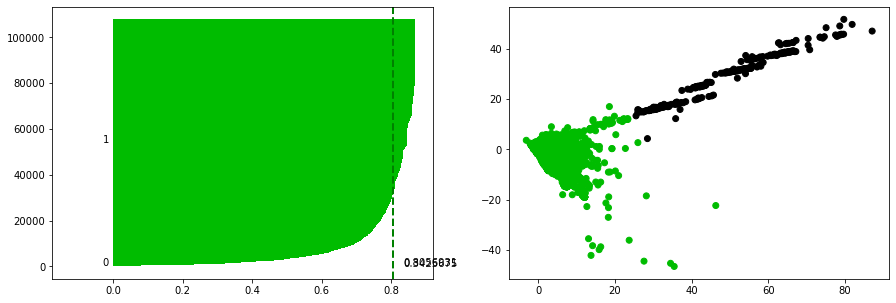

<Figure size 432x288 with 0 Axes>

In [22]:
K=2   # for the moment just 2 because has high execution time and I just want to see if code works before commit
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [23]:
counter_zero = 0
counter_one = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    else:
        counter_one += 1
print(counter_zero)
print(counter_one)

107578
278


# seems that K=2 it's a good choice, but shilouette of second cluster it's too much small (some error? I've checked more times but I haven't found)

overall clustering silhouette 0.32468467950820923


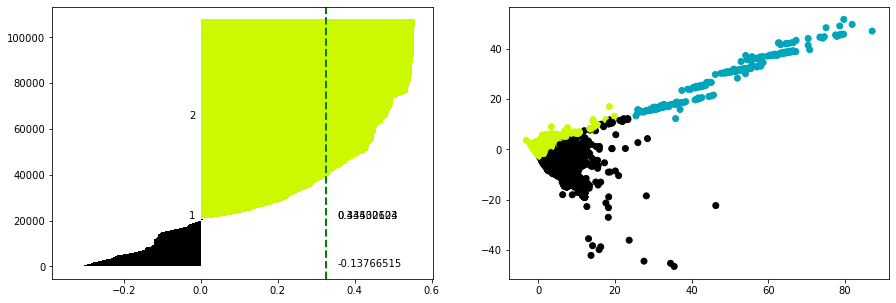

<Figure size 432x288 with 0 Axes>

In [18]:
K=3   # for the moment just 2 because has high execution time and I just want to see if code works before commit
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [24]:
counter_zero = 0
counter_one = 0
counter_two = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    else:
        counter_two += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)

86956
20623
277


overall clustering silhouette 0.30623742938041687


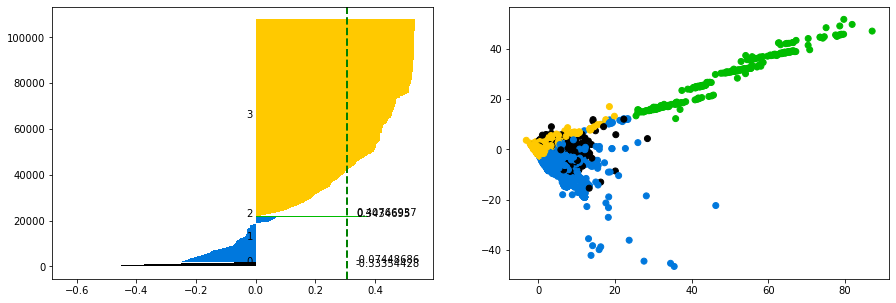

<Figure size 432x288 with 0 Axes>

In [25]:
K=4   # for the moment just 2 because has high execution time and I just want to see if code works before commit
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [26]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    else:
        counter_three += 1
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)

1809
19872
277
85898


overall clustering silhouette 0.3275983929634094


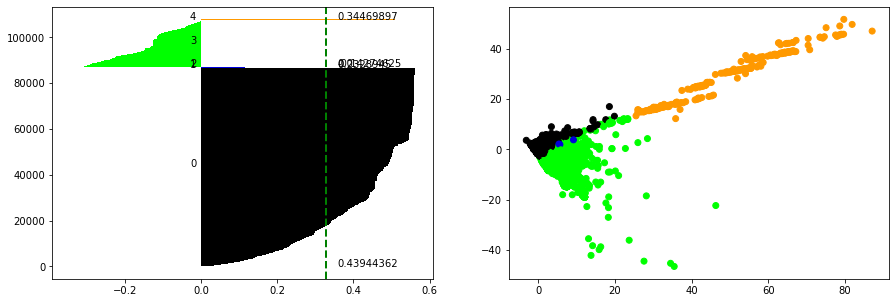

<Figure size 432x288 with 0 Axes>

In [27]:
K=5   # for the moment just 2 because has high execution time and I just want to see if code works before commit
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(all_data_scaled)
kmeans_label = kmeans_model.labels_
pca_model = PCA(n_components=134)
pca_coordinates = pca_model.fit_transform(all_data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
silhouette_avg = silhouette_score(all_data_scaled, kmeans_label)
sample_silhouette_values = silhouette_samples(all_data_scaled, kmeans_label)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(kmeans_label)):
    cluster_silhouette_vals = sample_silhouette_values[kmeans_label == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(kmeans_label.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)
plt.show()
plt.clf()

In [28]:
counter_zero = 0
counter_one = 0
counter_two = 0
counter_three = 0
counter_four = 0
for element in kmeans_label:
    if element == 0:
        counter_zero += 1
    elif element == 1:
        counter_one += 1
    elif element == 2:
        counter_two += 1
    elif element == 3:
        counter_three += 1
    else:
        counter_four += 0
        
print(counter_zero)
print(counter_one)
print(counter_two)
print(counter_three)
print(counter_four)

86828
117
1
20633
0


# at this point I think it's clear that k=2 it's the best decision, even if the first cluster has just 200 member aginst the 100000 of the second